## Required Imports

In [1]:
import math as m
from copy import copy
import xlrd
import csv 
import math
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import normaltest

import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neural_network import MLPClassifier as NeuralNetwork
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score

from statsmodels.tools.tools import add_constant
from statsmodels.stats.stattools import durbin_watson
from statsmodels.regression.linear_model import OLS
from statsmodels.graphics.gofplots import qqplot
import statsmodels.stats.api as sms
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

## Data Analysis

### Data pre processing

In [2]:
original_data = pd.read_csv("OnlineNewsPopularity.csv")
original_data.head()

url   timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...       731.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2  http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3  http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4   http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   

    n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0             12.0              219.0          0.663594                1.0   
1              9.0              255.0          0.604743                1.0   
2              9.0              211.0          0.575130                1.0   
3              9.0              531.0          0.503788                1.0   
4             13.0             1072.0          0.415646                1.0   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  ...  \
0                   0.815385         4.0              2.0        1.0  ...   
1                   0.791946         3.0              1.0        1.0  ...   
2                   0.663866         3.0              1.0        1.0  ...   
3                   0.665635         9.0              0.0        1.0  ...   
4                   0.540890        19.0             19.0       20.0  ...   

    min_positive_polarity   max_positive_polarity   avg_negative_polarity  \
0                0.100000                     0.7               -0.350000   
1                0.033333                     0.7               -0.118750   
2                0.100000                     1.0               -0.466667   
3                0.136364                     0.8               -0.369697   
4                0.033333                     1.0               -0.220192   

    min_negative_polarity   max_negative_polarity   title_subjectivity  \
0                  -0.600               -0.200000             0.500000   
1                  -0.125               -0.100000             0.000000   
2                  -0.800               -0.133333             0.000000   
3                  -0.600               -0.166667             0.000000   
4                  -0.500               -0.050000             0.454545   

    title_sentiment_polarity   abs_title_subjectivity  \
0                  -0.187500                 0.000000   
1                   0.000000                 0.500000   
2                   0.000000                 0.500000   
3                   0.000000                 0.500000   
4                   0.136364                 0.045455   

    abs_title_sentiment_polarity   shares  
0                       0.187500      593  
1                       0.000000      711  
2                       0.000000     1500  
3                       0.000000     1200  
4                       0.136364      505  

[5 rows x 61 columns]

In [91]:
data = copy(original_data)
data.columns = data.columns.str.strip()
data = data.drop(["url","timedelta"],axis = 1)
data_copy = data
data.head()

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0            12.0             219.0         0.663594               1.0   
1             9.0             255.0         0.604743               1.0   
2             9.0             211.0         0.575130               1.0   
3             9.0             531.0         0.503788               1.0   
4            13.0            1072.0         0.415646               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  \
0                  0.815385        4.0             2.0       1.0         0.0   
1                  0.791946        3.0             1.0       1.0         0.0   
2                  0.663866        3.0             1.0       1.0         0.0   
3                  0.665635        9.0             0.0       1.0         0.0   
4                  0.540890       19.0            19.0      20.0         0.0   

   average_token_length  ...  min_positive_polarity  max_positive_polarity  \
0              4.680365  ...               0.100000                    0.7   
1              4.913725  ...               0.033333                    0.7   
2              4.393365  ...               0.100000                    1.0   
3              4.404896  ...               0.136364                    0.8   
4              4.682836  ...               0.033333                    1.0   

   avg_negative_polarity  min_negative_polarity  max_negative_polarity  \
0              -0.350000                 -0.600              -0.200000   
1              -0.118750                 -0.125              -0.100000   
2              -0.466667                 -0.800              -0.133333   
3              -0.369697                 -0.600              -0.166667   
4              -0.220192                 -0.500              -0.050000   

   title_subjectivity  title_sentiment_polarity  abs_title_subjectivity  \
0            0.500000                 -0.187500                0.000000   
1            0.000000                  0.000000                0.500000   
2            0.000000                  0.000000                0.500000   
3            0.000000                  0.000000                0.500000   
4            0.454545                  0.136364                0.045455   

   abs_title_sentiment_polarity  shares  
0                      0.187500     593  
1                      0.000000     711  
2                      0.000000    1500  
3                      0.000000    1200  
4                      0.136364     505  

[5 rows x 59 columns]

### Summary Statistics

In [4]:
data.shape

(39644, 59)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 59 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   n_tokens_title                 39644 non-null  float64
 1   n_tokens_content               39644 non-null  float64
 2   n_unique_tokens                39644 non-null  float64
 3   n_non_stop_words               39644 non-null  float64
 4   n_non_stop_unique_tokens       39644 non-null  float64
 5   num_hrefs                      39644 non-null  float64
 6   num_self_hrefs                 39644 non-null  float64
 7   num_imgs                       39644 non-null  float64
 8   num_videos                     39644 non-null  float64
 9   average_token_length           39644 non-null  float64
 10  num_keywords                   39644 non-null  float64
 11  data_channel_is_lifestyle      39644 non-null  float64
 12  data_channel_is_entertainment  39644 non-null 

In [6]:
data.describe()

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
count    39644.000000      39644.000000     39644.000000      39644.000000   
mean        10.398749        546.514731         0.548216          0.996469   
std          2.114037        471.107508         3.520708          5.231231   
min          2.000000          0.000000         0.000000          0.000000   
25%          9.000000        246.000000         0.470870          1.000000   
50%         10.000000        409.000000         0.539226          1.000000   
75%         12.000000        716.000000         0.608696          1.000000   
max         23.000000       8474.000000       701.000000       1042.000000   

       n_non_stop_unique_tokens     num_hrefs  num_self_hrefs      num_imgs  \
count              39644.000000  39644.000000    39644.000000  39644.000000   
mean                   0.689175     10.883690        3.293638      4.544143   
std                    3.264816     11.332017        3.855141      8.309434   
min                    0.000000      0.000000        0.000000      0.000000   
25%                    0.625739      4.000000        1.000000      1.000000   
50%                    0.690476      8.000000        3.000000      1.000000   
75%                    0.754630     14.000000        4.000000      4.000000   
max                  650.000000    304.000000      116.000000    128.000000   

         num_videos  average_token_length  ...  min_positive_polarity  \
count  39644.000000          39644.000000  ...           39644.000000   
mean       1.249874              4.548239  ...               0.095446   
std        4.107855              0.844406  ...               0.071315   
min        0.000000              0.000000  ...               0.000000   
25%        0.000000              4.478404  ...               0.050000   
50%        0.000000              4.664082  ...               0.100000   
75%        1.000000              4.854839  ...               0.100000   
max       91.000000              8.041534  ...               1.000000   

       max_positive_polarity  avg_negative_polarity  min_negative_polarity  \
count           39644.000000           39644.000000           39644.000000   
mean                0.756728              -0.259524              -0.521944   
std                 0.247786               0.127726               0.290290   
min                 0.000000              -1.000000              -1.000000   
25%                 0.600000              -0.328383              -0.700000   
50%                 0.800000              -0.253333              -0.500000   
75%                 1.000000              -0.186905              -0.300000   
max                 1.000000               0.000000               0.000000   

       max_negative_polarity  title_subjectivity  title_sentiment_polarity  \
count           39644.000000        39644.000000              39644.000000   
mean               -0.107500            0.282353                  0.071425   
std                 0.095373            0.324247                  0.265450   
min                -1.000000            0.000000                 -1.000000   
25%                -0.125000            0.000000                  0.000000   
50%                -0.100000            0.150000                  0.000000   
75%                -0.050000            0.500000                  0.150000   
max                 0.000000            1.000000                  1.000000   

       abs_title_subjectivity  abs_title_sentiment_polarity         shares  
count            39644.000000                  39644.000000   39644.000000  
mean                 0.341843                      0.156064    3395.380184  
std                  0.188791                      0.226294   11626.950749  
min                  0.000000                      0.000000       1.000000  
25%                  0.166667                      0.000000     946.000000  
50%                  0.500000                      0.000000    140

In [7]:
data.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negat

In [8]:
data.shares.unique()

array([  593,   711,  1500, ..., 34500, 25600, 45000])

In [9]:
data.shares.mean()

3395.3801836343455

In [10]:
data.shares.min()

1

In [11]:
data.shares.max()

843300

In [12]:
data.shares.argmax()

9365

In [13]:
data.shares.argmin()

17266

In [14]:
data.shares.value_counts()

1100      2308
1200      2018
1300      1740
1400      1592
1500      1323
          ... 
197600       1
310800       1
92           1
57800        1
82200        1
Name: shares, Length: 1454, dtype: int64

<AxesSubplot:>

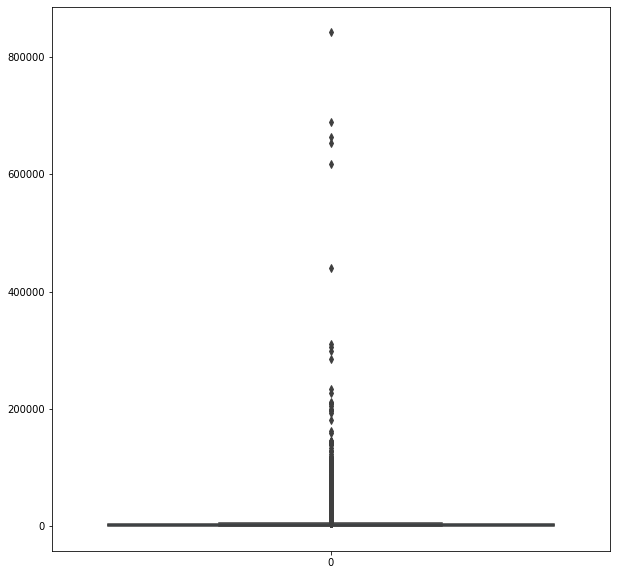

In [15]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=data.shares,ax=ax)

### Descriptive Statistical Analysis

#### Mean Vector

In [16]:
meanVector = data.mean()
meanVector

n_tokens_title                       10.398749
n_tokens_content                    546.514731
n_unique_tokens                       0.548216
n_non_stop_words                      0.996469
n_non_stop_unique_tokens              0.689175
num_hrefs                            10.883690
num_self_hrefs                        3.293638
num_imgs                              4.544143
num_videos                            1.249874
average_token_length                  4.548239
num_keywords                          7.223767
data_channel_is_lifestyle             0.052946
data_channel_is_entertainment         0.178009
data_channel_is_bus                   0.157855
data_channel_is_socmed                0.058597
data_channel_is_tech                  0.185299
data_channel_is_world                 0.212567
kw_min_min                           26.106801
kw_max_min                         1153.951682
kw_avg_min                          312.366967
kw_min_max                        13612.354102
kw_max_max   

#### Covariance Matrix

In [17]:
covarianceMatrix = data.cov()
covarianceMatrix

n_tokens_title  n_tokens_content  \
n_tokens_title                       4.469152      1.808589e+01   
n_tokens_content                    18.085895      2.219423e+05   
n_unique_tokens                     -0.039583     -7.856418e+00   
n_non_stop_words                    -0.052574      4.315723e+01   
n_non_stop_unique_tokens            -0.037407      5.740901e-01   
num_hrefs                           -1.281572      2.258575e+03   
num_self_hrefs                      -0.121076      5.533594e+02   
num_imgs                            -0.155609      1.341156e+03   
num_videos                           0.446888      2.006818e+02   
average_token_length                -0.127461      6.674751e+01   
num_keywords                        -0.024526      6.551701e+01   
data_channel_is_lifestyle           -0.033524      3.961143e+00   
data_channel_is_entertainment        0.107384      1.084864e+01   
data_channel_is_bus                 -0.018424     -1.048714e+00   
data_channel_is_socmed              -0.044883      3.698314e+00   
data_channel_is_tech                -0.038373      4.650929e+00   
data_channel_is_world                0.042574      1.079157e+01   
kw_min_min                         -16.291762     -1.782787e+03   
kw_max_min                         -48.036305      1.205429e+02   
kw_avg_min                         -41.208257     -1.036784e+03   
kw_min_max                        1584.485820     -6.224622e+05   
kw_max_max                       54797.097942      5.947976e+06   
kw_avg_max                       33058.300280     -6.139478e+06   
kw_min_avg                          -5.700111     -1.194220e+04   
kw_max_avg                          89.190183     -8.762313e+04   
kw_avg_avg                          11.971920     -4.944548e+04   
self_reference_min_shares         -190.419313     -2.853480e+05   
self_reference_max_shares           11.108288      4.959170e+05   
self_reference_avg_sharess          33.808394     -1.575101e+05   
weekday_is_monday                    0.003378     -4.374700e-01   
weekday_is_tuesday                   0.007675     -7.388407e-01   
weekday_is_wednesday                 0.007373     -3.106148e+00   
weekday_is_thursday                 -0.012656     -1.348020e+00   
weekday_is_friday                   -0.001495     -2.636594e+00   
weekday_is_saturday                 -0.007647      3.920298e+00   
weekday_is_sunday                    0.003371      4.346774e+00   
is_weekend                          -0.004276      8.267072e+00   
LDA_00                              -0.038937      3.248165e+00   
LDA_01                               0.029526     -1.006449e+00   
LDA_02                               0.022883      1.159952e+01   
LDA_03                               0.026339     -1.948891e+01   
LDA_04                              -0.039776      5.621859e+00   
global_subjectivity                 -0.014012      7.029660e+00   
global_sentiment_polarity           -0.014800      1.001726e+00   
global_rate_positive_words          -0.002393      1.100073e+00   
global_rate_negative_words           0.000355      6.376995e-01   
rate_positive_words                 -0.026776      8.867528e+00   
rate_negative_words                  0.011285      7.434051e+00   
avg_positive_polarity               -0.010966      6.654867e+00   
min_positive_polarity               -0.003779     -8.785370e+00   
max_positive_polarity               -0.011347      4.852685e+01   
avg_negative_polarity               -0.004616     -7.844984e+00   
min_negative_polarity               -0.017886     -6.162330e+01   
max_negative_polarity                0.002303      1.014857e+01   
title_subjectivity                   0.052949      6.849254e-01   
title_sentiment_polarity             0.000134      2.921014e+00   
abs_title_subjectivity              -0.058651      6.346787e-01   
abs_title_sentiment_polarity         0.019399      1.432751e+00   
shares                             215.887321      1.346919e+04   

          

#### Correlation Matrix

In [18]:
correlationMatrix = data.corr()
correlationMatrix

n_tokens_title  n_tokens_content  \
n_tokens_title                       1.000000          0.018160   
n_tokens_content                     0.018160          1.000000   
n_unique_tokens                     -0.005318         -0.004737   
n_non_stop_words                    -0.004754          0.017512   
n_non_stop_unique_tokens            -0.005420          0.000373   
num_hrefs                           -0.053496          0.423065   
num_self_hrefs                      -0.014856          0.304682   
num_imgs                            -0.008858          0.342600   
num_videos                           0.051460          0.103699   
average_token_length                -0.071403          0.167789   
num_keywords                        -0.006077          0.072845   
data_channel_is_lifestyle           -0.070815          0.037548   
data_channel_is_entertainment        0.132791          0.060200   
data_channel_is_bus                 -0.023902         -0.006105   
data_channel_is_socmed              -0.090394          0.033424   
data_channel_is_tech                -0.046716          0.025408   
data_channel_is_world                0.049223          0.055989   
kw_min_min                          -0.110672         -0.054345   
kw_max_min                          -0.005890          0.000066   
kw_avg_min                          -0.031400         -0.003545   
kw_min_max                           0.012926         -0.022786   
kw_max_max                           0.120841          0.058860   
kw_avg_max                           0.115746         -0.096460   
kw_min_avg                          -0.002370         -0.022286   
kw_max_avg                           0.006918         -0.030496   
kw_avg_avg                           0.004296         -0.079624   
self_reference_min_shares           -0.004563         -0.030686   
self_reference_max_shares            0.000128          0.025657   
self_reference_avg_sharess           0.000661         -0.013809   
weekday_is_monday                    0.004274         -0.002484   
weekday_is_tuesday                   0.009322         -0.004027   
weekday_is_wednesday                 0.008935         -0.016891   
weekday_is_thursday                 -0.015472         -0.007395   
weekday_is_friday                   -0.002015         -0.015949   
weekday_is_saturday                 -0.015013          0.034538   
weekday_is_sunday                    0.006289          0.036394   
is_weekend                          -0.005996          0.052024   
LDA_00                              -0.070038          0.026218   
LDA_01                               0.063568         -0.009724   
LDA_02                               0.038365          0.087266   
LDA_03                               0.042208         -0.140141   
LDA_04                              -0.065063          0.041265   
global_subjectivity                 -0.056804          0.127879   
global_sentiment_polarity           -0.072226          0.021937   
global_rate_positive_words          -0.064951          0.133979   
global_rate_negative_words           0.015530          0.125013   
rate_positive_words                 -0.066589          0.098960   
rate_negative_words                  0.034186          0.101053   
avg_positive_polarity               -0.049619          0.135123   
min_positive_polarity               -0.025069         -0.261493   
max_positive_polarity               -0.021662          0.415706   
avg_negative_polarity               -0.017096         -0.130375   
min_negative_polarity               -0.029146         -0.450603   
max_negative_polarity                0.011425          0.225870   
title_subjectivity                   0.077245          0.004484   
title_sentiment_polarity             0.000240          0.023358   
abs_title_subjectivity              -0.146954          0.007136   
abs_title_sentiment_polarity         0.040550          0.013439   
shares                               0.008783          0.002459   

          

<AxesSubplot:>

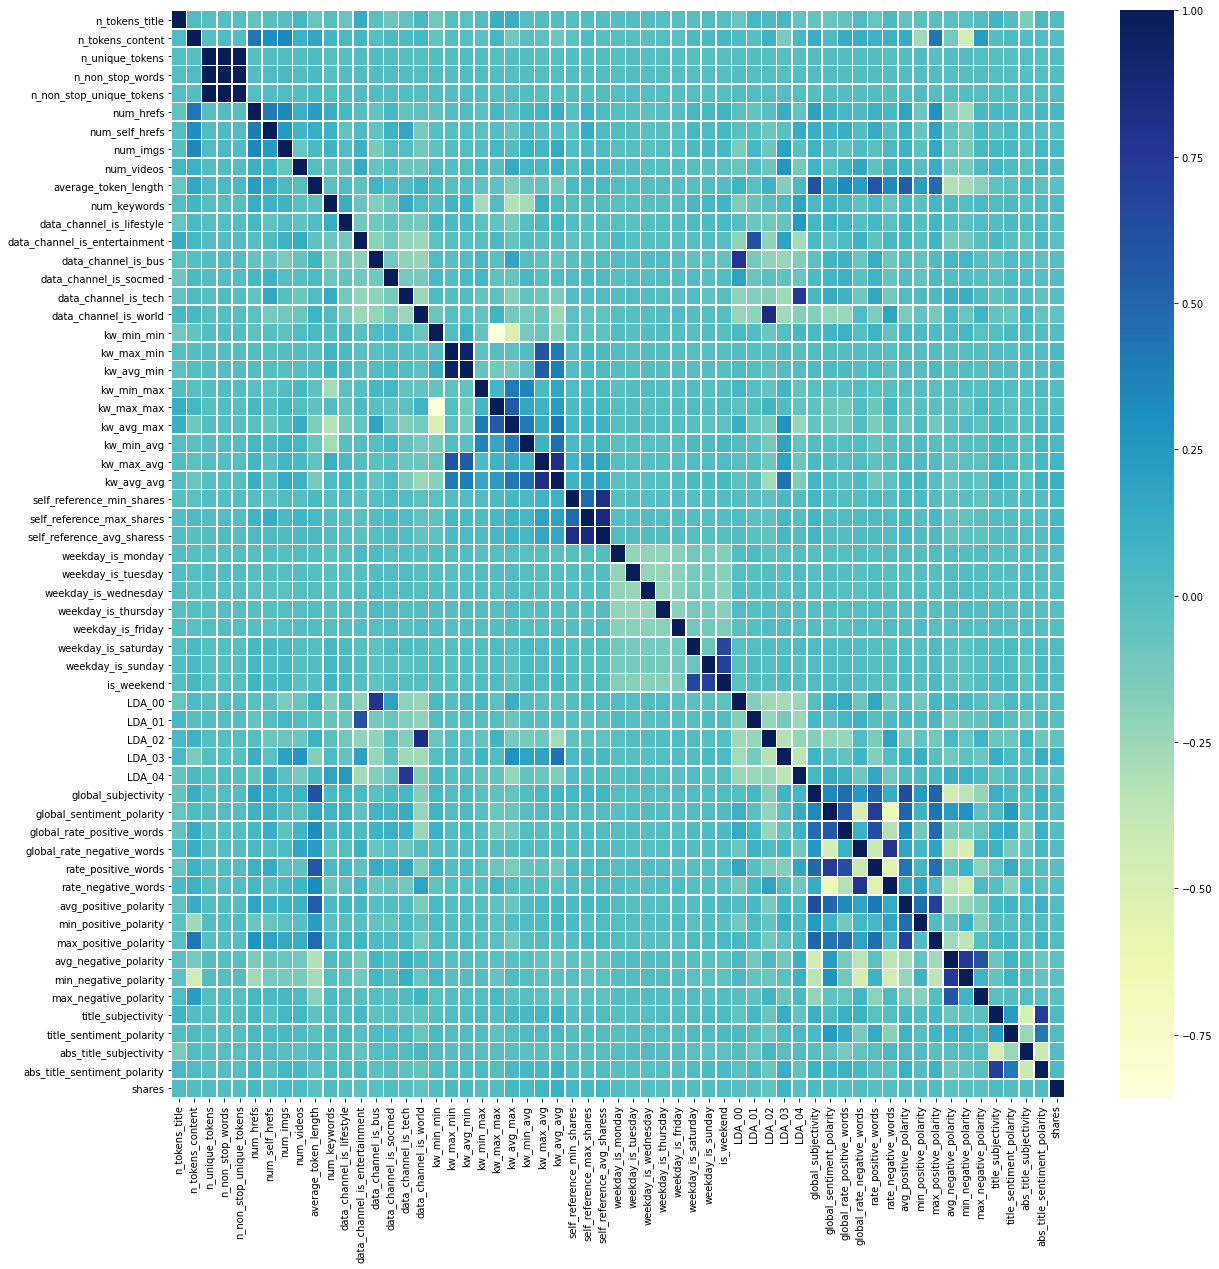

In [19]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlationMatrix,linewidth=0.5,ax=ax,cmap="YlGnBu")

#### Insights

From the above heatmap of correlation matrix of data, we can observe the last column where correlation between shares and all other features is found to be very less and nearly zero. That can depict that a linear relationship between the features and shares is not very apt.

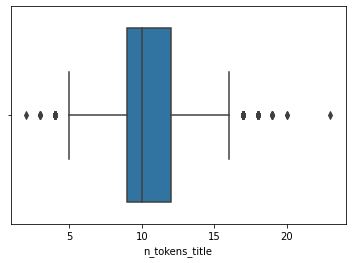

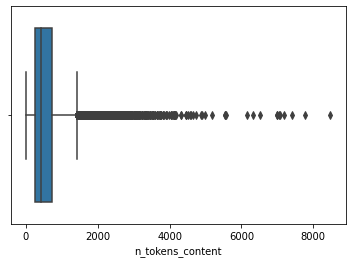

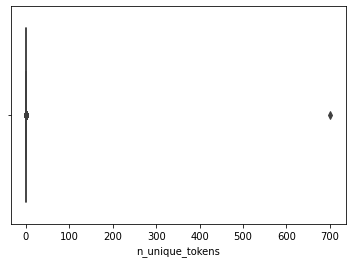

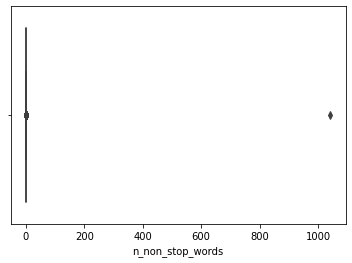

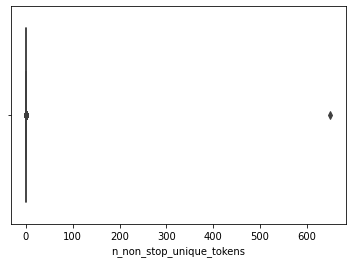

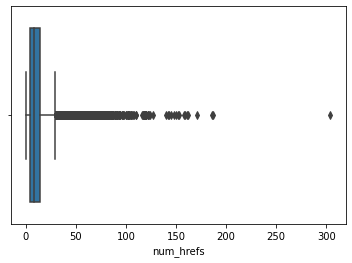

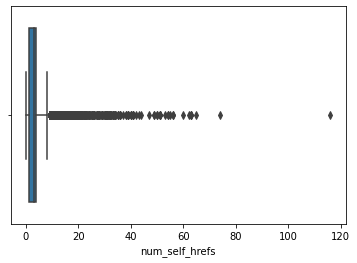

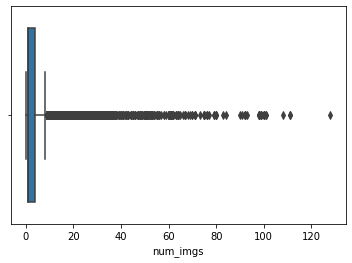

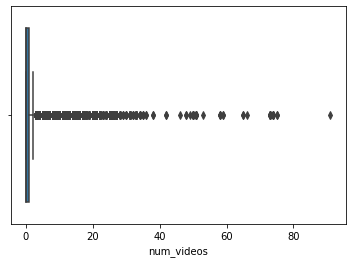

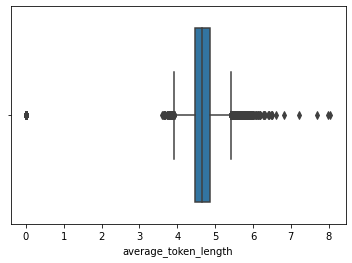

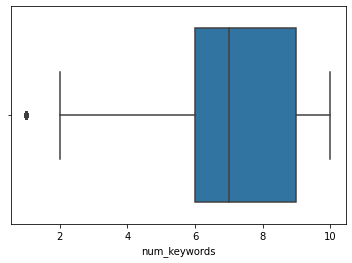

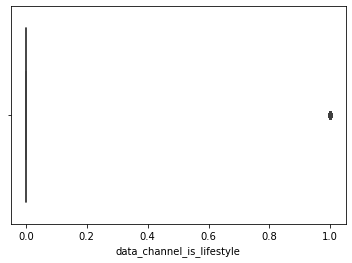

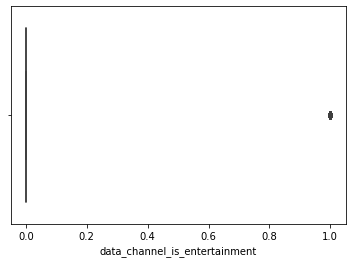

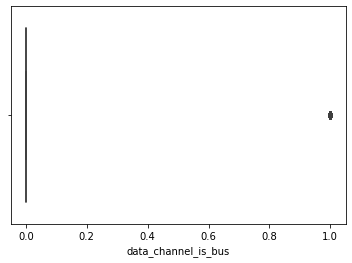

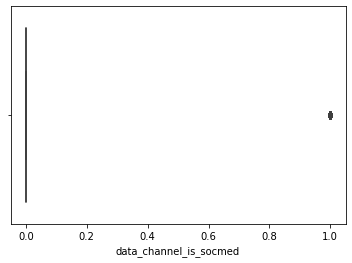

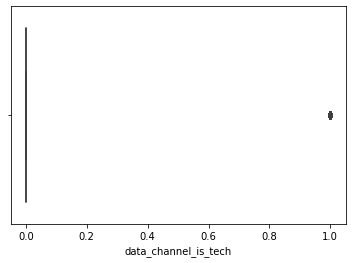

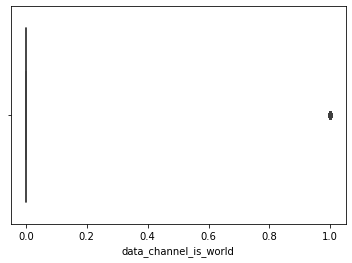

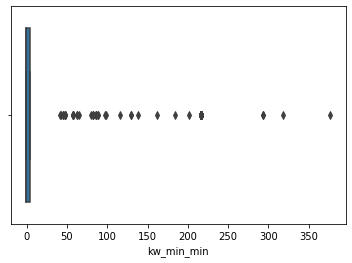

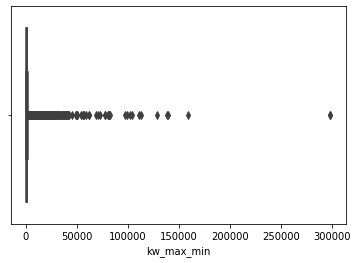

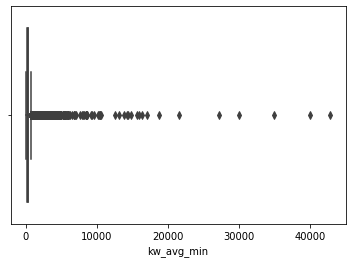

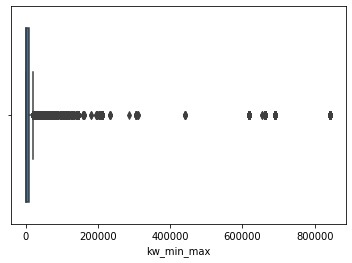

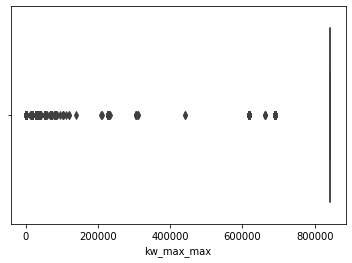

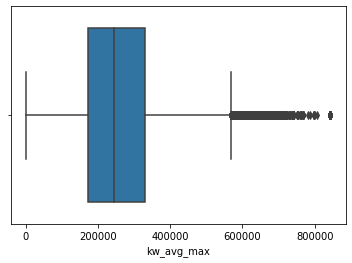

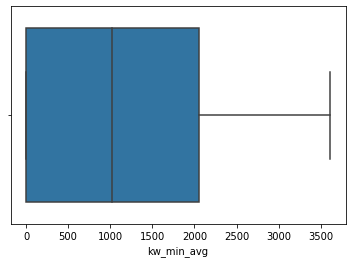

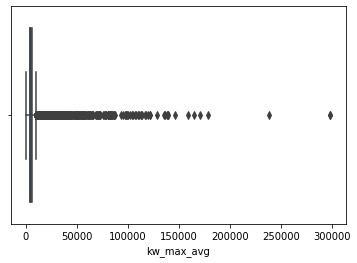

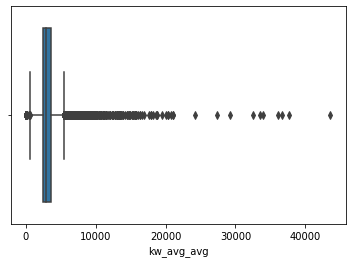

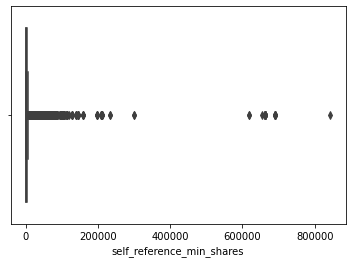

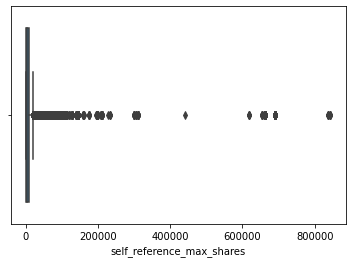

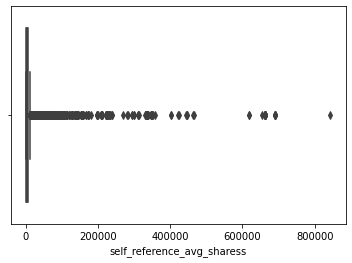

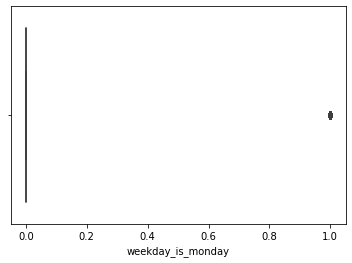

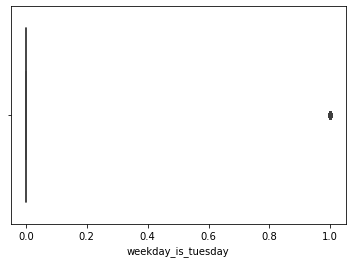

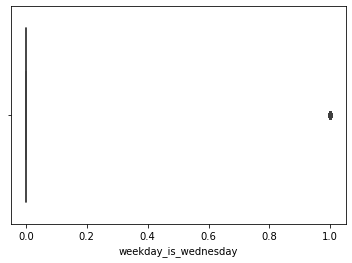

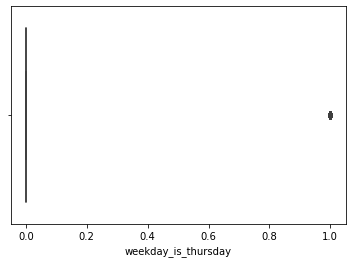

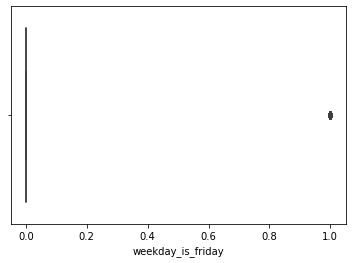

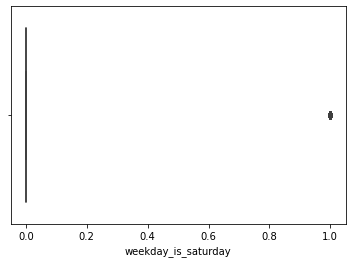

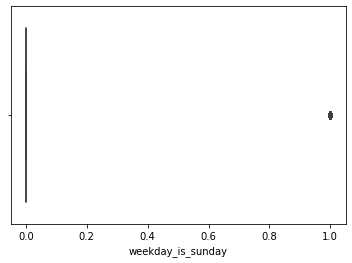

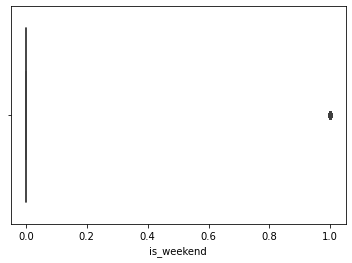

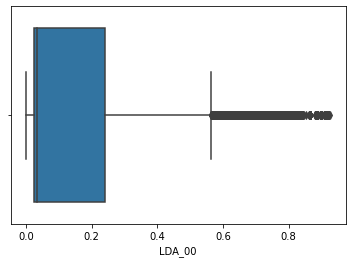

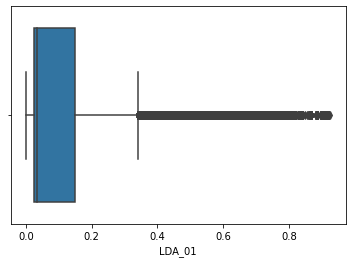

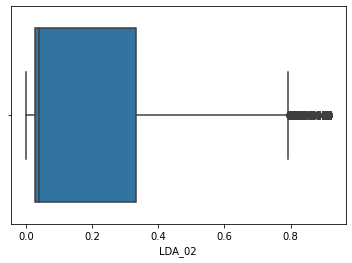

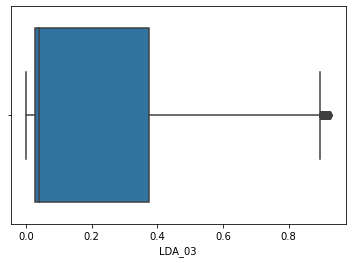

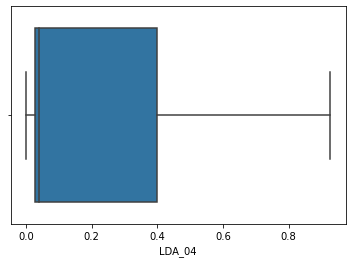

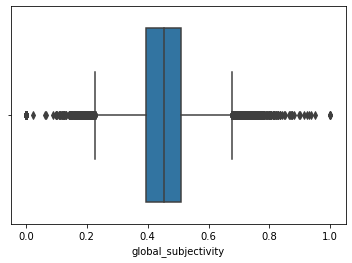

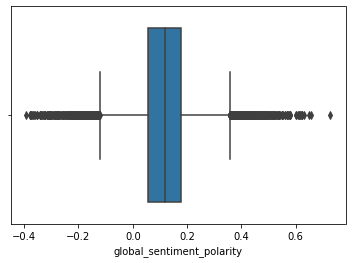

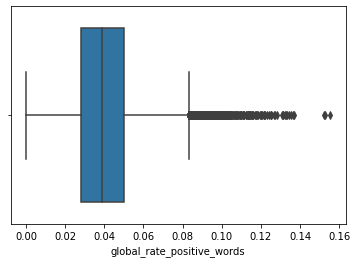

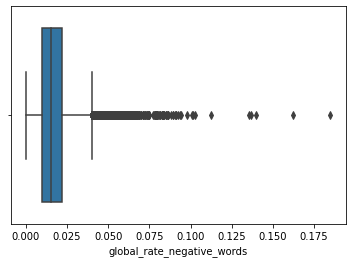

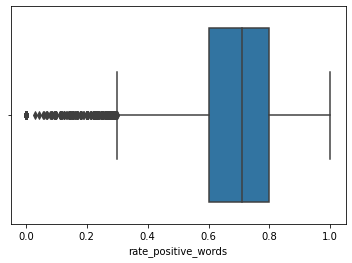

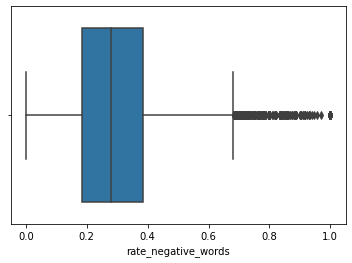

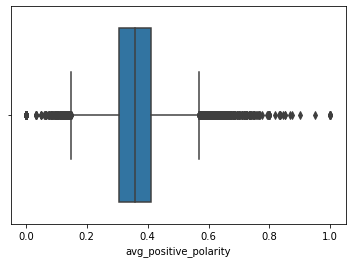

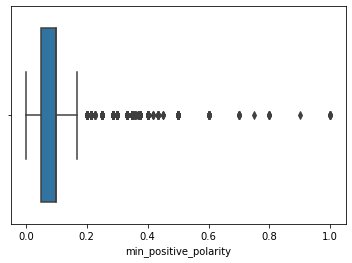

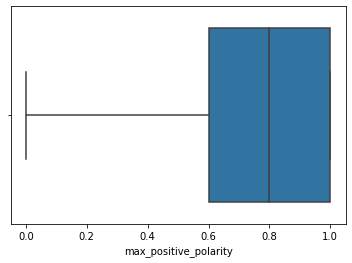

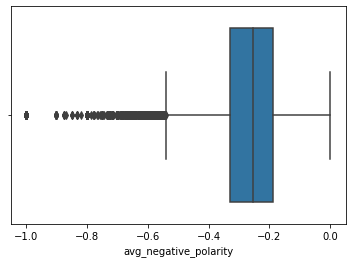

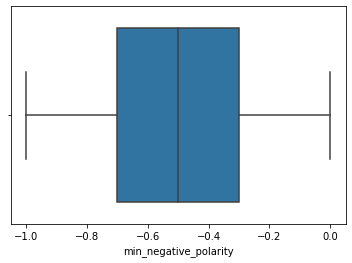

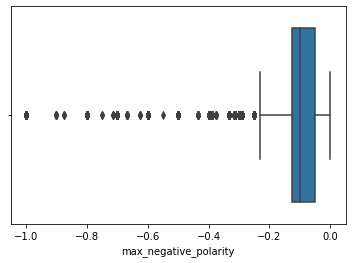

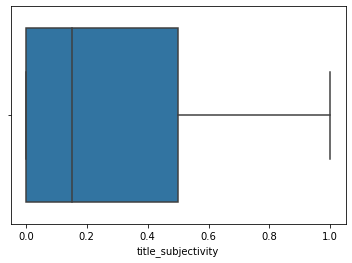

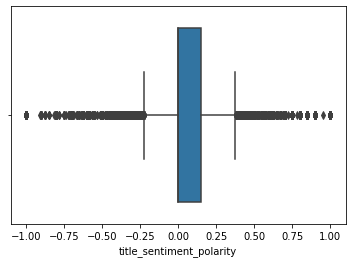

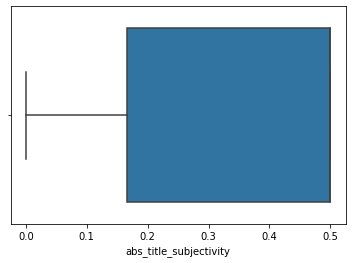

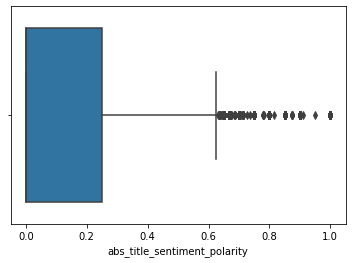

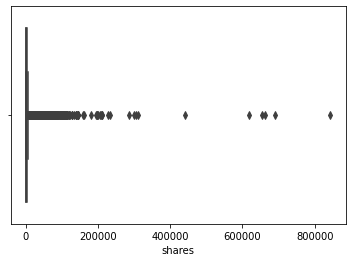

In [20]:
for i in data.columns:
    if i != "url":
        sns.boxplot(x=data[i])
        plt.show()

### Normality Checks

#### Visual Checks

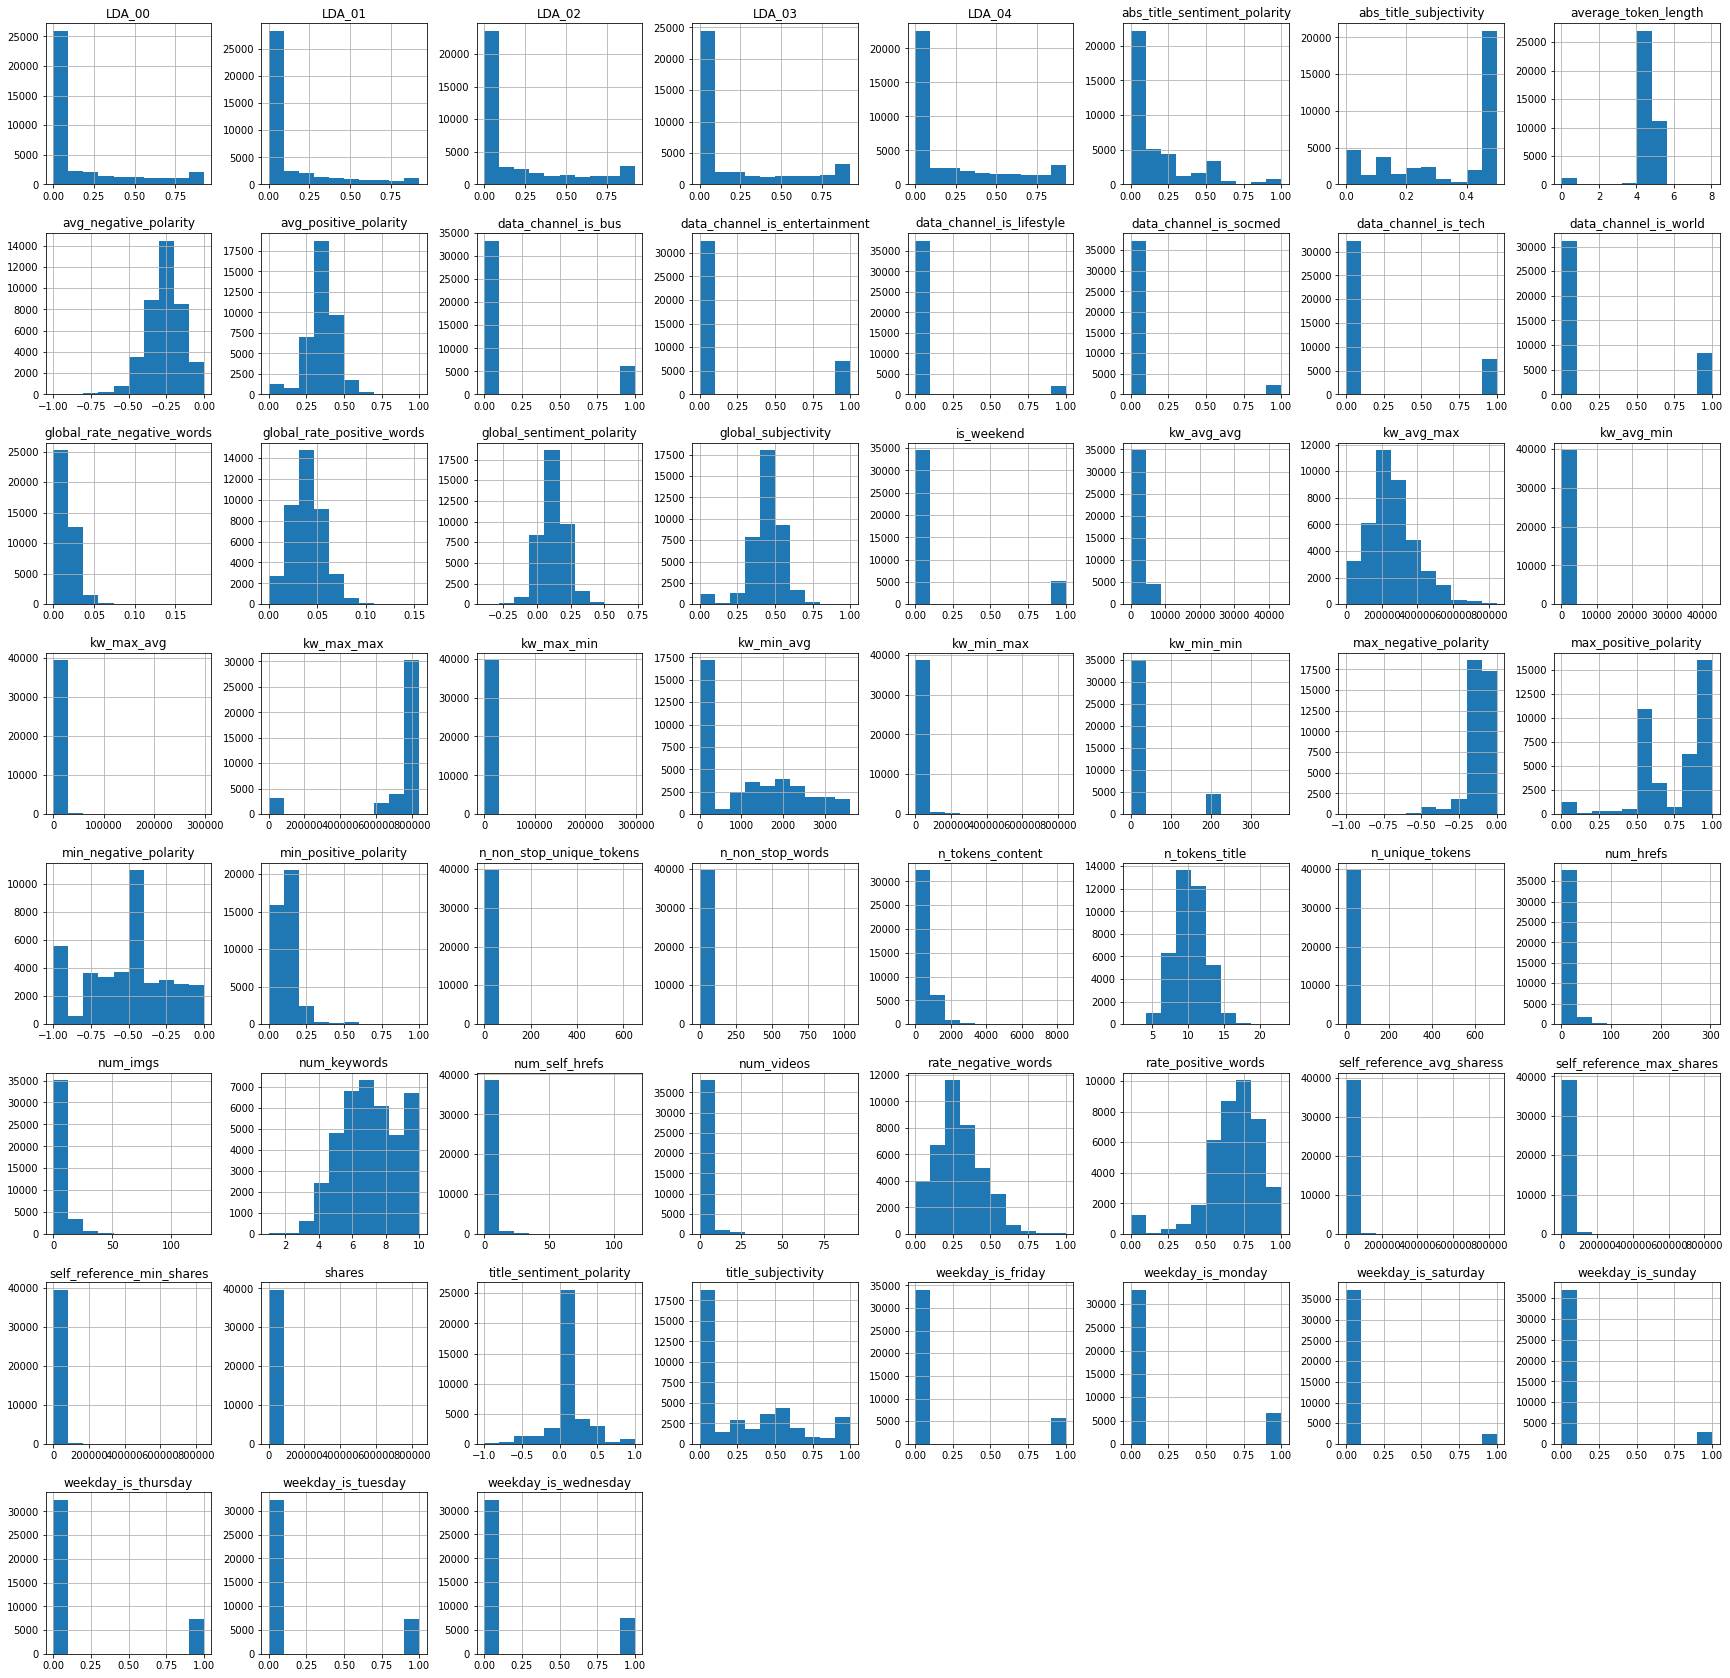

In [21]:
ax = data.hist(figsize=(30,30))

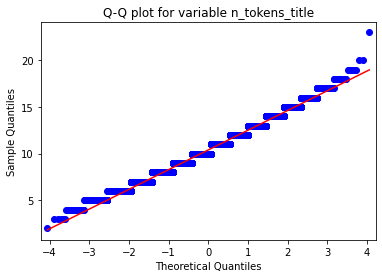

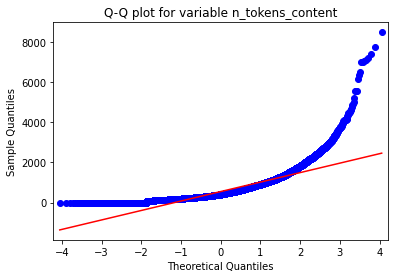

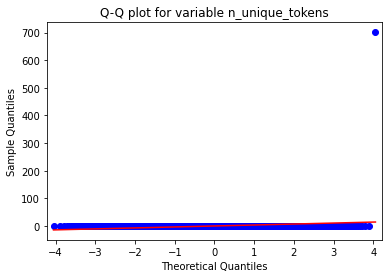

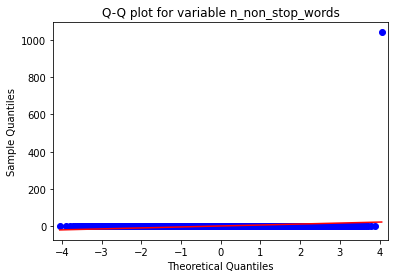

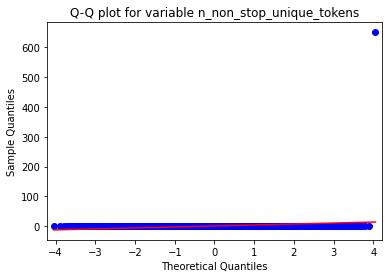

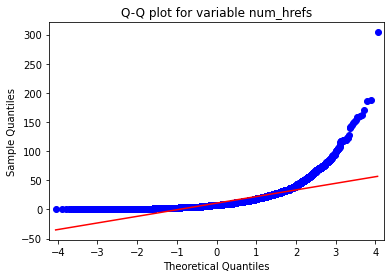

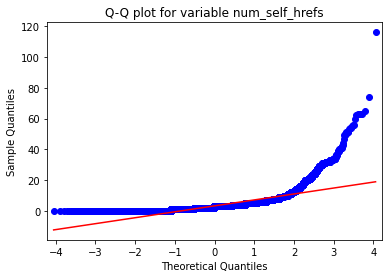

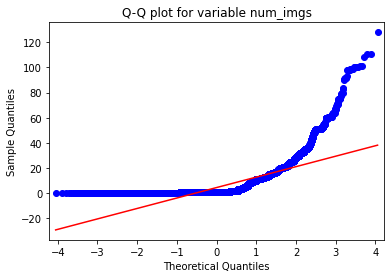

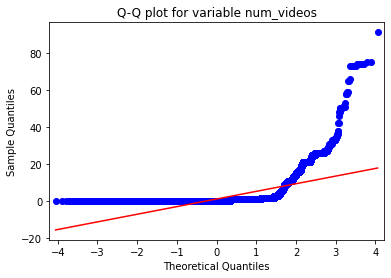

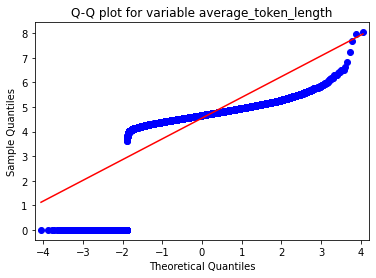

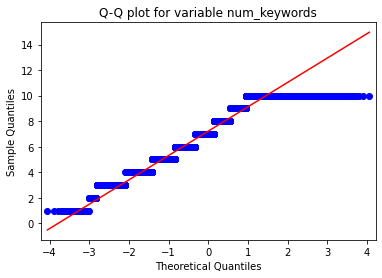

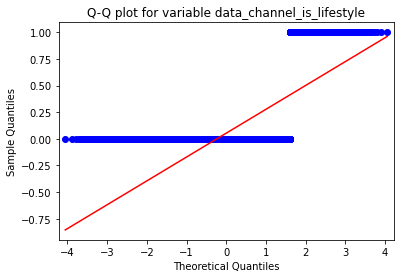

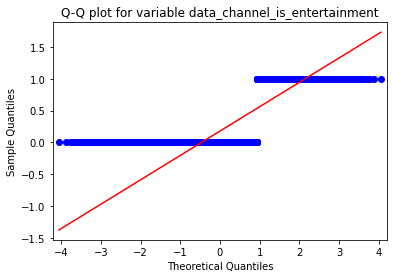

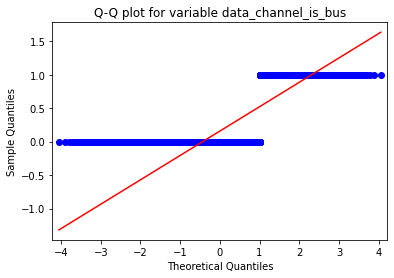

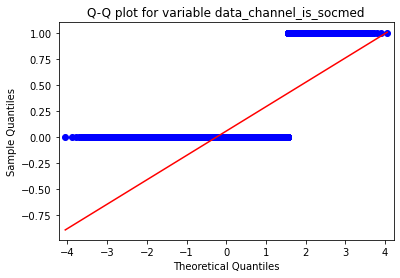

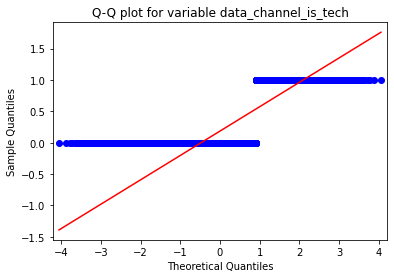

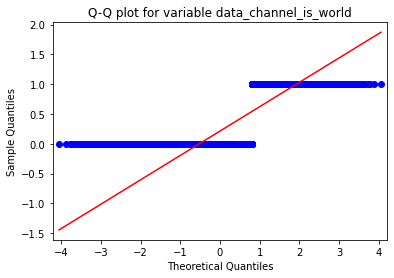

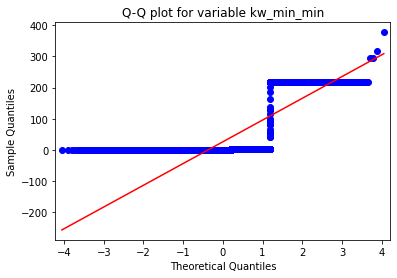

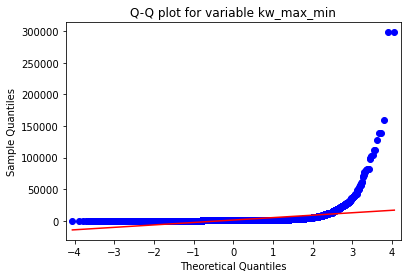

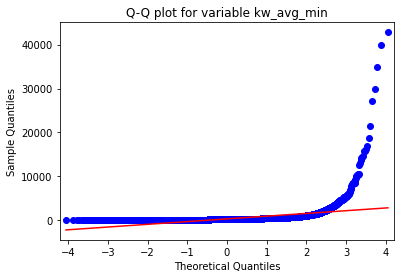

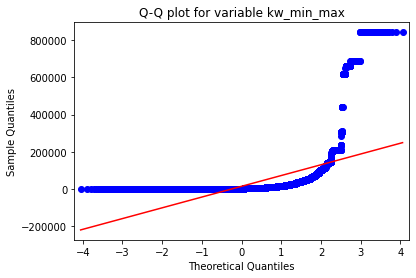

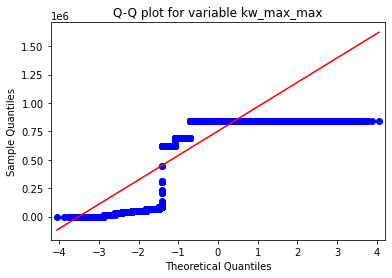

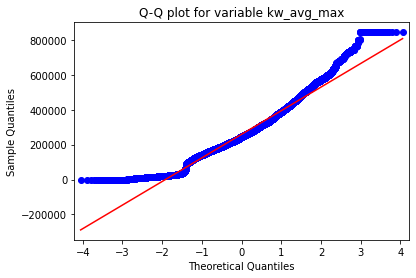

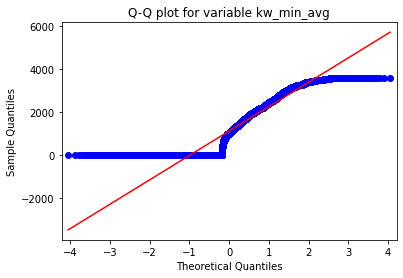

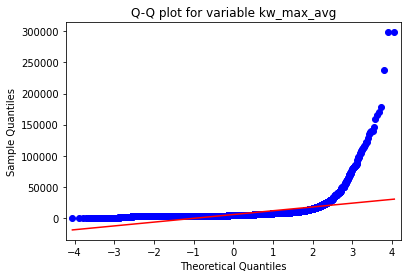

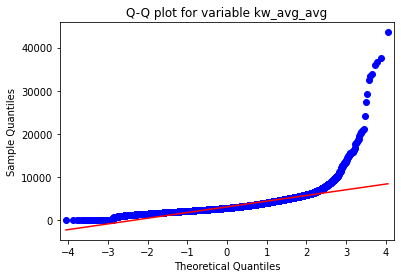

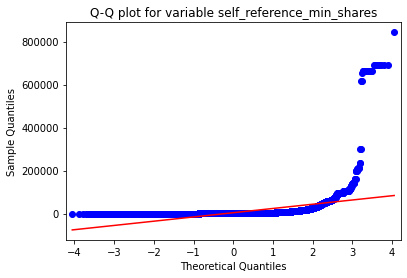

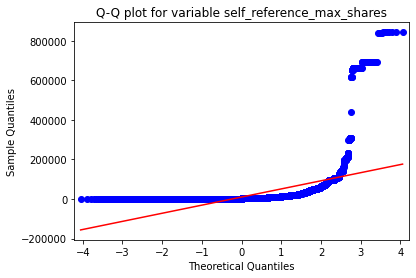

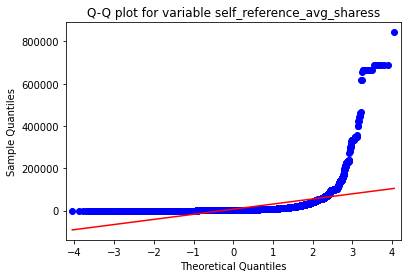

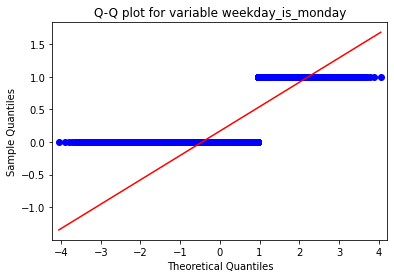

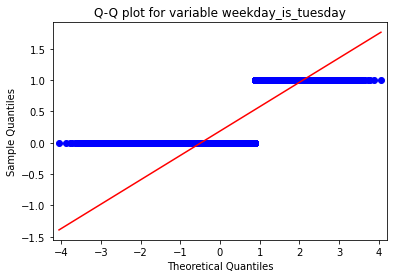

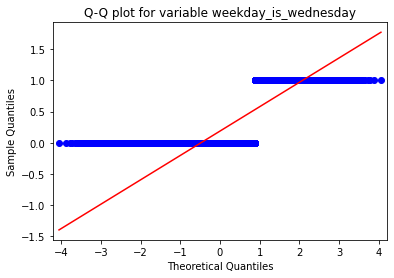

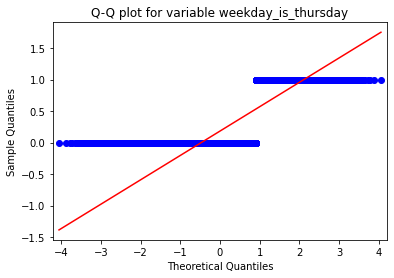

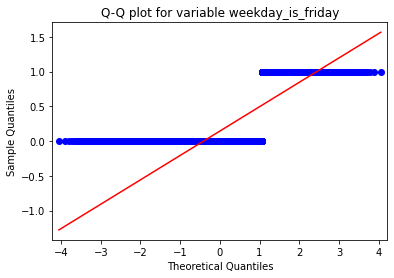

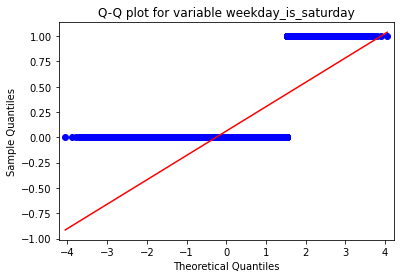

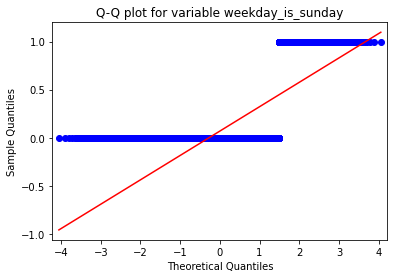

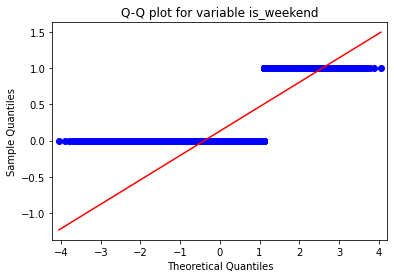

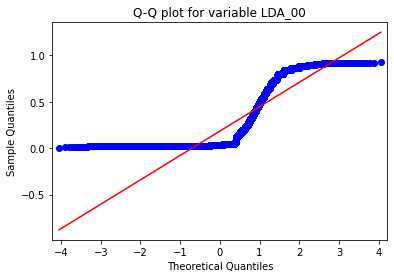

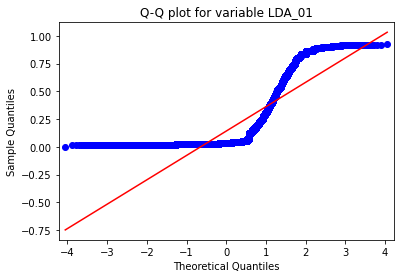

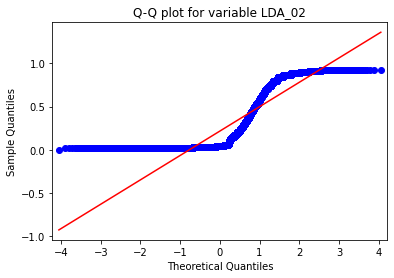

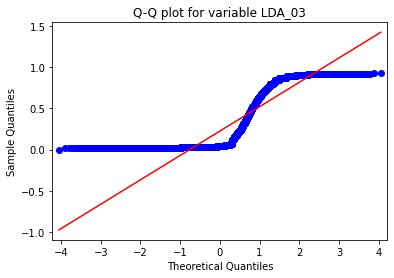

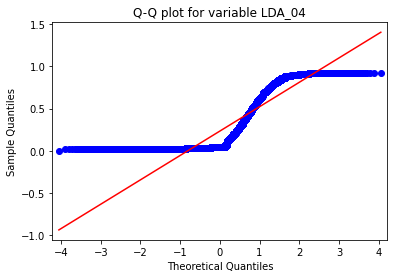

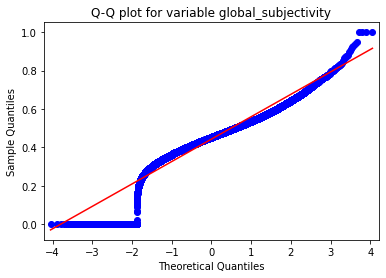

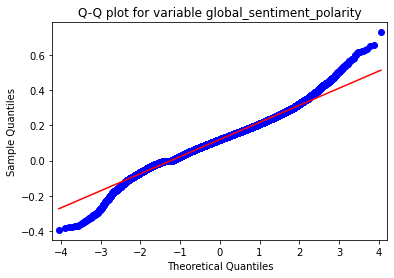

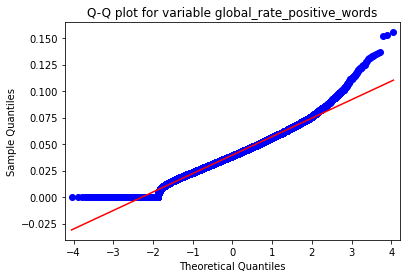

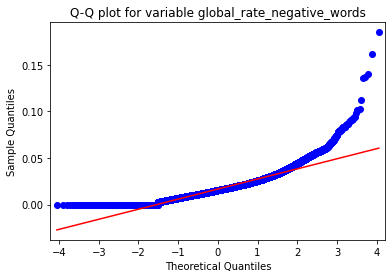

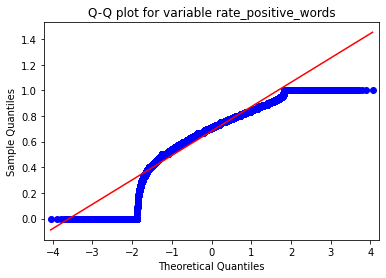

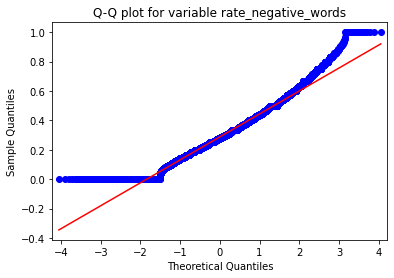

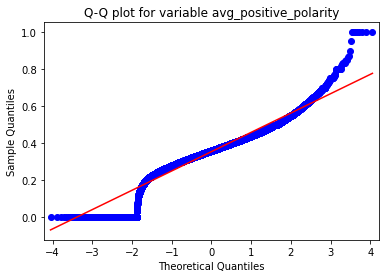

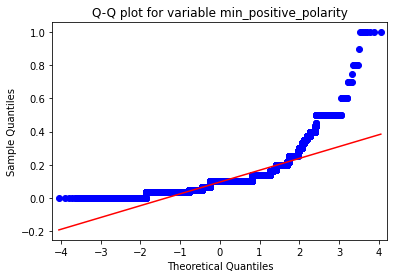

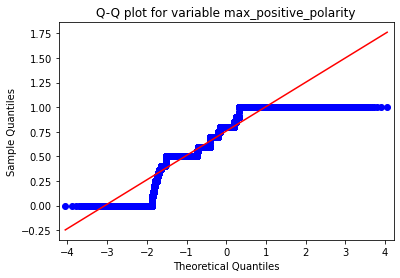

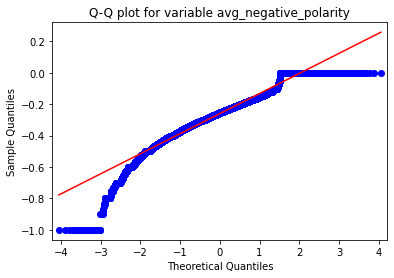

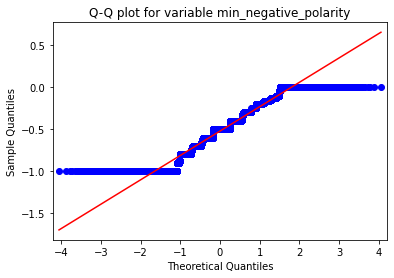

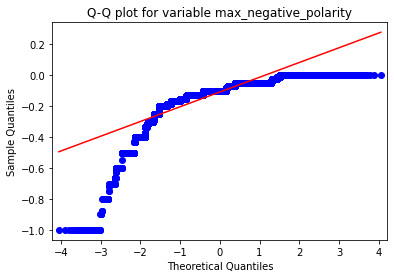

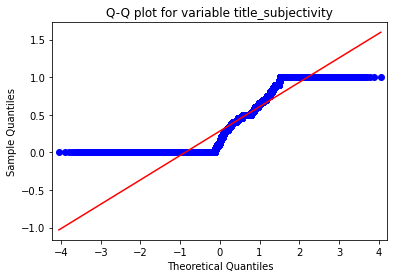

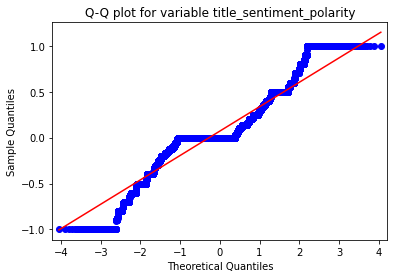

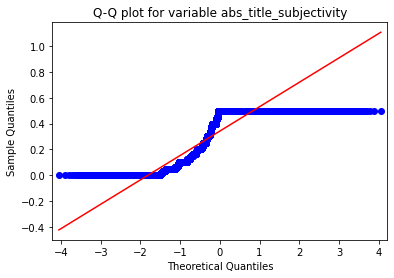

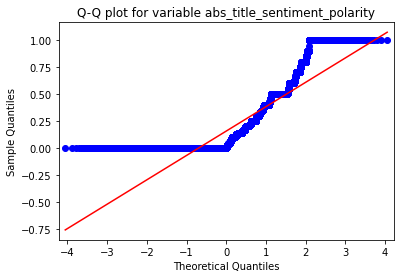

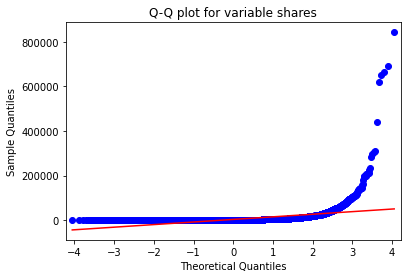

In [22]:
for i in data.columns:
    ax = qqplot(data[i],line='s')
    fig = ax.get_figure()
    plt.title("Q-Q plot for variable "+i)

#### Statistical Checks

##### Shapiro Wilk Test

In [23]:
statistic, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (statistic, p))

alpha = 0.05
if p > alpha:
    print('Sample may be from Gaussian distribution (fail to reject H0)')
else:
    print('Sample may not be from Gaussian distribution (reject H0)')

Statistics=0.156, p=0.000
Sample may not be from Gaussian distribution (reject H0)


In [24]:
for i in data.columns:
    statistic, p = shapiro(data[i])
    print(i+": ")
    print('Statistics=%.3f, p=%.3f' % (statistic, p))

    alpha = 0.05
    if p > alpha:
        print(i+' may be from Gaussian distribution (fail to reject H0)')
    else:
        print(i+' may not be from Gaussian distribution (reject H0)')

n_tokens_title: 
Statistics=0.980, p=0.000
n_tokens_title may not be from Gaussian distribution (reject H0)
n_tokens_content: 
Statistics=0.782, p=0.000
n_tokens_content may not be from Gaussian distribution (reject H0)
n_unique_tokens: 
Statistics=0.003, p=0.000
n_unique_tokens may not be from Gaussian distribution (reject H0)
n_non_stop_words: 
Statistics=0.001, p=0.000
n_non_stop_words may not be from Gaussian distribution (reject H0)
n_non_stop_unique_tokens: 
Statistics=0.004, p=0.000
n_non_stop_unique_tokens may not be from Gaussian distribution (reject H0)
num_hrefs: 
Statistics=0.695, p=0.000
num_hrefs may not be from Gaussian distribution (reject H0)
num_self_hrefs: 
Statistics=0.633, p=0.000
num_self_hrefs may not be from Gaussian distribution (reject H0)
num_imgs: 
Statistics=0.550, p=0.000
num_imgs may not be from Gaussian distribution (reject H0)
num_videos: 
Statistics=0.310, p=0.000
num_videos may not be from Gaussian distribution (reject H0)
average_token_length: 
Stati

#### Noise Removal

##### Encoding target variable as a categorical variable

In [25]:
data["shares"] = np.where(data["shares"]<1400,0,1)

##### Other processing

In [26]:
dayMerge=data[['weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday', 
                      'weekday_is_thursday', 'weekday_is_friday','weekday_is_saturday' ,'weekday_is_sunday' ]]
temp = []
rows = dayMerge.shape[0]
cols =  dayMerge.shape[1]
for i in range(rows):
    for j in range(cols):
        if ((j==0) and (dayMerge.iloc[i,j])==1):
            temp.append(1)
        elif ((j==1) and (dayMerge.iloc[i,j])==1):
            temp.append(2)
        elif ((j==2) and (dayMerge.iloc[i,j])==1):
            temp.append(3)
        elif ((j==3) and (dayMerge.iloc[i,j])==1):
            temp.append(4)
        elif ((j==4) and (dayMerge.iloc[i,j])==1):
            temp.append(5)
        elif ((j==5) and (dayMerge.iloc[i,j])==1):
            temp.append(6) 
        elif ((j==6) and (dayMerge.iloc[i,j])==1):
            temp.append(7)
            
# Merging the data channels as one single column
dataChannelMerge=data[['data_channel_is_lifestyle','data_channel_is_entertainment' ,'data_channel_is_bus',
                        'data_channel_is_socmed' ,'data_channel_is_tech','data_channel_is_world' ]]
#logic to merge data channel
dataChannel = []
rows = dataChannelMerge.shape[0]
cols = dataChannelMerge.shape[1]
for i in range(rows):
    if (((dataChannelMerge.iloc[i,0])==0) and ((dataChannelMerge.iloc[i,1])==0) and ((dataChannelMerge.iloc[i,2])==0) and ((dataChannelMerge.iloc[i,3])==0) and ((dataChannelMerge.iloc[i,4])==0) and ((dataChannelMerge.iloc[i,5])==0)):
        dataChannel.append(0)
    else:
        for j in range(cols):
            if ((j==0) and (dataChannelMerge.iloc[i,j])==1):
                dataChannel.append(1)
            elif ((j==1) and (dataChannelMerge.iloc[i,j])==1):
                dataChannel.append(2)
            elif ((j==2) and (dataChannelMerge.iloc[i,j])==1):
                dataChannel.append(3)
            elif ((j==3) and (dataChannelMerge.iloc[i,j])==1):
                dataChannel.append(4)
            elif ((j==4) and (dataChannelMerge.iloc[i,j])==1):
                dataChannel.append(5)
            elif ((j==5) and (dataChannelMerge.iloc[i,j])==1):
                dataChannel.append(6)
print(len(dataChannel))
print(len(temp))

39644
39644


In [27]:
data.insert(loc=11, column='weekdays', value=temp)
data.insert(loc=12, column='data_channel', value=dataChannel)

# Now I drop the old data
data.drop(labels=['data_channel_is_lifestyle','data_channel_is_entertainment' ,'data_channel_is_bus',
                        'data_channel_is_socmed' ,'data_channel_is_tech','data_channel_is_world', 
                 'weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday', 
                      'weekday_is_thursday', 'weekday_is_friday','weekday_is_saturday' ,'weekday_is_sunday'], axis = 1, inplace=True)
print(data.shape)
data.head(n=4)


(39644, 48)


n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0            12.0             219.0         0.663594               1.0   
1             9.0             255.0         0.604743               1.0   
2             9.0             211.0         0.575130               1.0   
3             9.0             531.0         0.503788               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  \
0                  0.815385        4.0             2.0       1.0         0.0   
1                  0.791946        3.0             1.0       1.0         0.0   
2                  0.663866        3.0             1.0       1.0         0.0   
3                  0.665635        9.0             0.0       1.0         0.0   

   average_token_length  ...  min_positive_polarity  max_positive_polarity  \
0              4.680365  ...               0.100000                    0.7   
1              4.913725  ...               0.033333                    0.7   
2              4.393365  ...               0.100000                    1.0   
3              4.404896  ...               0.136364                    0.8   

   avg_negative_polarity  min_negative_polarity  max_negative_polarity  \
0              -0.350000                 -0.600              -0.200000   
1              -0.118750                 -0.125              -0.100000   
2              -0.466667                 -0.800              -0.133333   
3              -0.369697                 -0.600              -0.166667   

   title_subjectivity  title_sentiment_polarity  abs_title_subjectivity  \
0                 0.5                   -0.1875                     0.0   
1                 0.0                    0.0000                     0.5   
2                 0.0                    0.0000                     0.5   
3                 0.0                    0.0000                     0.5   

   abs_title_sentiment_polarity  shares  
0                        0.1875       0  
1                        0.0000       0  
2                        0.0000       1  
3                        0.0000       0  

[4 rows x 48 columns]

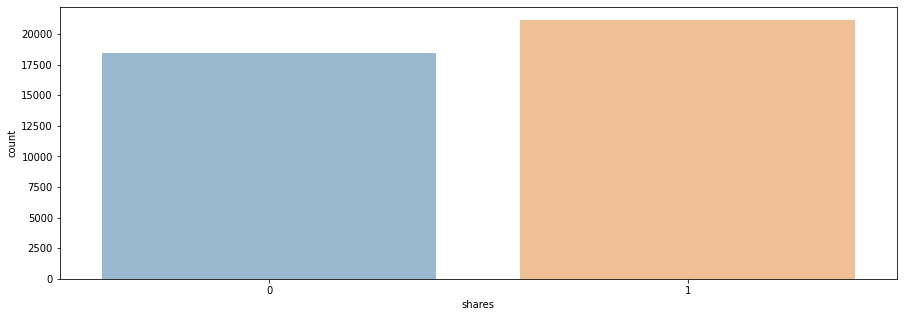

In [28]:
fig = plt.figure(figsize=(15,5))
ax = sns.countplot(x='shares',data=data,alpha=0.5)
plt.savefig("CountPlot.png")

In [29]:
class_counts = data.groupby('shares').size().reset_index()
class_counts.columns = ['Popularity','No of news items']
class_counts

Popularity  No of news items
0           0             18490
1           1             21154

In [31]:
data['n_non_stop_words'].describe()

count    39644.000000
mean         0.996469
std          5.231231
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max       1042.000000
Name: n_non_stop_words, dtype: float64

In [32]:
data.drop(['n_non_stop_words'], axis = 1, inplace=True)

In [34]:
data.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs',
       'num_videos', 'average_token_length', 'num_keywords', 'weekdays',
       'data_channel', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max',
       'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'is_weekend', 'LDA_00', 'LDA_01',
       'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_po

In [35]:
data['n_non_stop_unique_tokens'].describe()

count    39644.000000
mean         0.689175
std          3.264816
min          0.000000
25%          0.625739
50%          0.690476
75%          0.754630
max        650.000000
Name: n_non_stop_unique_tokens, dtype: float64

# Modelling

### Multivariate Linear Regression

In [36]:
def read_data(file):
    
    feature_vecs = []
    labels = []
    
    with open(file,"r") as csvfile:
        
        csvreader = csv.reader(csvfile)
        i = 0        
        for row in csvreader:
            if(i == 0):
                pass
            else:
            #print(row)
                feature_vecs.append(row[2:len(row)-1])
                labels.append(row[len(row)-1])
            i += 1
            
    return (feature_vecs,labels)


            
class LinearRegressionClassifier:
    
    def __init__(self,data_file):
        self.theta_vec = None
        self.train_features = None
        self.train_labels = None
        self.test_features = None
        self.test_labels = None
        self.Y_actual = None
        self.Y_pred = None
        self.Residuals = None
        self.initialize(data_file)
        self.learn_parameters_plain_grad_descent()
        
    def initialize(self,file):
        
        #reading training features and labels
        data = read_data(file)
        features_lst = data[0]
        labels_lst = data[1]
        
        for i in range(len(features_lst)): #augmenting feature vectors to account for the bias term
            features_lst[i] = [1] + features_lst[i]
        

        for i in range(len(labels_lst)):
        	lab = int(labels_lst[i])
        	labels_lst[i] = lab

        split = math.ceil(len(features_lst)*(0.8))

        train_features_lst = features_lst[0:split]
        train_labels_lst = labels_lst[0:split]
        
        #print("features:",train_features_lst[0:3])
        #print("labs:",train_labels_lst[0:3])
        test_features_lst = features_lst[split:]
        test_labels_lst = labels_lst[split:]

        train_features_mat = np.matrix(train_features_lst)
        self.train_features = train_features_mat.astype(np.float)
        
        self.train_labels = train_labels_lst
        
        
        test_features_mat = np.matrix(test_features_lst)
        self.test_features = test_features_mat.astype(np.float)
        
        self.test_labels = test_labels_lst
        
        
        mean_mat = self.train_features.mean(0)
        std_mat = self.train_features.std(0)
        for j in range(self.train_features.shape[1]):
            for i in range(self.train_features.shape[0]):
                if std_mat[0,j] == 0:
                    pass
                else:
                    self.train_features[i,j] = (self.train_features[i,j] - mean_mat[0,j])/std_mat[0,j]


        for j in range(self.test_features.shape[1]):
            for i in range(self.test_features.shape[0]):
                if std_mat[0,j] == 0:
                    pass
                else:
                    self.test_features[i,j] = (self.test_features[i,j] - mean_mat[0,j])/std_mat[0,j]                     
       

        #initialize theta vec with zeroes
        n = train_features_mat[0,:].shape[1] #length of the augemented feature vector
        self.theta_vec = np.zeros([n,1],dtype = float)
        
        

    
  
    def classify(self,X): #X is a column vector
        o_val = np.matmul(self.theta_vec.transpose(),X)
        return o_val

    
    def accuracy_test(self):
        correct = 0
        for i in range(self.test_features.shape[0]):
            output_label = self.classify(self.test_features[i,:].transpose())
            test_label = self.test_labels[i]
            print("Sno: ",i,"  output label:",output_label," test_label:",test_label)
            if(test_label >= 1400 and output_label >= 1400) or (test_label < 1400 and output_label < 1400):
                #print("CORRECT")
                correct += 1
            else:
                pass            	
               #print("WRONG")
        acc = 100*correct/self.test_features.shape[0]
        return acc
    
    def accuracy_train(self): 
        self.Y_actual = np.zeros([len(self.train_labels),1], dtype = float)
        self.Y_pred = np.zeros([len(self.train_labels),1],dtype = float)
        self.Residuals = np.zeros([len(self.train_labels),1],dtype = float)
        correct = 0
        for i in range(self.train_features.shape[0]):
            output_label = self.classify(self.train_features[i,:].transpose())
            train_label = self.train_labels[i]
            self.Y_actual[i] = train_label
            self.Y_pred[i] = output_label
            self.Residuals[i] = train_label - output_label
            print("Sno: ",i,"  output label:",output_label," test_label:",train_label)
            if (train_label >= 1400 and output_label >= 1400) or (train_label < 1400 and output_label < 1400):
                #print("CORRECT")
                correct += 1
            else:
                pass            	
               #print("WRONG")
        acc = 100*correct/self.train_features.shape[0]
        return acc
    
    def essentials(self):
        return (self.Y_actual,self.Y_pred,self.Residuals)
                  
    def Sum_of_Squared_Errors_Loss(self):
        cost = 0
        N = self.train_features.shape[0]

        for i in range(N):#for each training example
            Xi = self.train_features[i,:].transpose() #A column vector
            cst = (1/2)*((self.train_labels[i] - self.classify(Xi))**2)
            cost = cost + cst
        return cost        
    
    
        
        
    def learn_parameters_plain_grad_descent(self,batchsize = 1, eta = 0.001,epochs_limit = 1):
        cost_lst = []
        cost = self.Sum_of_Squared_Errors_Loss()
        print("Starting Loss fn value:",cost)
        cost_lst.append(cost)
        n = self.train_features[0,:].shape[1] #length of the augemented feature vector
        self.theta_vec.fill(0)  
        
        bs = batchsize
        num_minibatches = math.ceil(self.train_features.shape[0]/bs)
        
        count_epochs = 0
        while(count_epochs < epochs_limit):
            
            for j in range(num_minibatches):
                
                start = j*bs
                stop = (j + 1)*bs
                if(stop > self.train_features.shape[0]/bs):
                    stop = self.train_features.shape[0]
                
                # Now considering a mini-batch i.e. start to stop-1,update theta_vec
                
                for k in range(len(set(self.train_labels))): #For this mini-batch, update the theta_matrix, basically update theta_0, theta_1, ..., thtea_K-1.
                    
                    Sum = np.zeros([self.train_features.shape[1],1],dtype = float)
                    
                    for i in range(start,stop):
                        Xi = self.train_features[i,:].transpose()
                        #print(Xi.shape)
                        #print(self.theta_vec.shape)
                        mult = np.matmul(self.theta_vec.transpose(),Xi)
                        mult = mult[0,0]
                        Sum = Sum +  -1*(self.train_labels[i] - mult)*Xi
                        
                    Grad_cost_fn = Sum 
                    
                   
                self.theta_vec = self.theta_vec + -1*eta*Grad_cost_fn    
                
                
                
                #cost = self.Sum_of_Squared_Errors_Loss()
                cost = "later" ##Bcoz--> takes a lot of computn time
                cost_lst.append(cost)
                print("Iter: ", count_epochs*num_minibatches + j + 1)
                
            count_epochs += 1
            
        #plt.plot(cost_lst)
        #plt.show()
                
                    
            
linear_regression_classifier = LinearRegressionClassifier("OnlineNewsPopularity.csv")
print("Accuracy over training set is:",linear_regression_classifier.accuracy_train())
print("Accuarcy over test set is:",linear_regression_classifier.accuracy_test())

Starting Loss fn value: [[2.60994314e+12]]
Iter:  1
Iter:  2
Iter:  3
Iter:  4
Iter:  5
Iter:  6
Iter:  7
Iter:  8
Iter:  9
Iter:  10
Iter:  11
Iter:  12
Iter:  13
Iter:  14
Iter:  15
Iter:  16
Iter:  17
Iter:  18
Iter:  19
Iter:  20
Iter:  21
Iter:  22
Iter:  23
Iter:  24
Iter:  25
Iter:  26
Iter:  27
Iter:  28
Iter:  29
Iter:  30
Iter:  31
Iter:  32
Iter:  33
Iter:  34
Iter:  35
Iter:  36
Iter:  37
Iter:  38
Iter:  39
Iter:  40
Iter:  41
Iter:  42
Iter:  43
Iter:  44
Iter:  45
Iter:  46
Iter:  47
Iter:  48
Iter:  49
Iter:  50
Iter:  51
Iter:  52
Iter:  53
Iter:  54
Iter:  55
Iter:  56
Iter:  57
Iter:  58
Iter:  59
Iter:  60
Iter:  61
Iter:  62
Iter:  63
Iter:  64
Iter:  65
Iter:  66
Iter:  67
Iter:  68
Iter:  69
Iter:  70
Iter:  71
Iter:  72
Iter:  73
Iter:  74
Iter:  75
Iter:  76
Iter:  77
Iter:  78
Iter:  79
Iter:  80
Iter:  81
Iter:  82
Iter:  83
Iter:  84
Iter:  85
Iter:  86
Iter:  87
Iter:  88
Iter:  89
Iter:  90
Iter:  91
Iter:  92
Iter:  93
Iter:  94
Iter:  95
Iter:  96
Iter: 

Iter:  753
Iter:  754
Iter:  755
Iter:  756
Iter:  757
Iter:  758
Iter:  759
Iter:  760
Iter:  761
Iter:  762
Iter:  763
Iter:  764
Iter:  765
Iter:  766
Iter:  767
Iter:  768
Iter:  769
Iter:  770
Iter:  771
Iter:  772
Iter:  773
Iter:  774
Iter:  775
Iter:  776
Iter:  777
Iter:  778
Iter:  779
Iter:  780
Iter:  781
Iter:  782
Iter:  783
Iter:  784
Iter:  785
Iter:  786
Iter:  787
Iter:  788
Iter:  789
Iter:  790
Iter:  791
Iter:  792
Iter:  793
Iter:  794
Iter:  795
Iter:  796
Iter:  797
Iter:  798
Iter:  799
Iter:  800
Iter:  801
Iter:  802
Iter:  803
Iter:  804
Iter:  805
Iter:  806
Iter:  807
Iter:  808
Iter:  809
Iter:  810
Iter:  811
Iter:  812
Iter:  813
Iter:  814
Iter:  815
Iter:  816
Iter:  817
Iter:  818
Iter:  819
Iter:  820
Iter:  821
Iter:  822
Iter:  823
Iter:  824
Iter:  825
Iter:  826
Iter:  827
Iter:  828
Iter:  829
Iter:  830
Iter:  831
Iter:  832
Iter:  833
Iter:  834
Iter:  835
Iter:  836
Iter:  837
Iter:  838
Iter:  839
Iter:  840
Iter:  841
Iter:  842
Iter:  843

Iter:  1459
Iter:  1460
Iter:  1461
Iter:  1462
Iter:  1463
Iter:  1464
Iter:  1465
Iter:  1466
Iter:  1467
Iter:  1468
Iter:  1469
Iter:  1470
Iter:  1471
Iter:  1472
Iter:  1473
Iter:  1474
Iter:  1475
Iter:  1476
Iter:  1477
Iter:  1478
Iter:  1479
Iter:  1480
Iter:  1481
Iter:  1482
Iter:  1483
Iter:  1484
Iter:  1485
Iter:  1486
Iter:  1487
Iter:  1488
Iter:  1489
Iter:  1490
Iter:  1491
Iter:  1492
Iter:  1493
Iter:  1494
Iter:  1495
Iter:  1496
Iter:  1497
Iter:  1498
Iter:  1499
Iter:  1500
Iter:  1501
Iter:  1502
Iter:  1503
Iter:  1504
Iter:  1505
Iter:  1506
Iter:  1507
Iter:  1508
Iter:  1509
Iter:  1510
Iter:  1511
Iter:  1512
Iter:  1513
Iter:  1514
Iter:  1515
Iter:  1516
Iter:  1517
Iter:  1518
Iter:  1519
Iter:  1520
Iter:  1521
Iter:  1522
Iter:  1523
Iter:  1524
Iter:  1525
Iter:  1526
Iter:  1527
Iter:  1528
Iter:  1529
Iter:  1530
Iter:  1531
Iter:  1532
Iter:  1533
Iter:  1534
Iter:  1535
Iter:  1536
Iter:  1537
Iter:  1538
Iter:  1539
Iter:  1540
Iter:  1541
Iter

Iter:  2142
Iter:  2143
Iter:  2144
Iter:  2145
Iter:  2146
Iter:  2147
Iter:  2148
Iter:  2149
Iter:  2150
Iter:  2151
Iter:  2152
Iter:  2153
Iter:  2154
Iter:  2155
Iter:  2156
Iter:  2157
Iter:  2158
Iter:  2159
Iter:  2160
Iter:  2161
Iter:  2162
Iter:  2163
Iter:  2164
Iter:  2165
Iter:  2166
Iter:  2167
Iter:  2168
Iter:  2169
Iter:  2170
Iter:  2171
Iter:  2172
Iter:  2173
Iter:  2174
Iter:  2175
Iter:  2176
Iter:  2177
Iter:  2178
Iter:  2179
Iter:  2180
Iter:  2181
Iter:  2182
Iter:  2183
Iter:  2184
Iter:  2185
Iter:  2186
Iter:  2187
Iter:  2188
Iter:  2189
Iter:  2190
Iter:  2191
Iter:  2192
Iter:  2193
Iter:  2194
Iter:  2195
Iter:  2196
Iter:  2197
Iter:  2198
Iter:  2199
Iter:  2200
Iter:  2201
Iter:  2202
Iter:  2203
Iter:  2204
Iter:  2205
Iter:  2206
Iter:  2207
Iter:  2208
Iter:  2209
Iter:  2210
Iter:  2211
Iter:  2212
Iter:  2213
Iter:  2214
Iter:  2215
Iter:  2216
Iter:  2217
Iter:  2218
Iter:  2219
Iter:  2220
Iter:  2221
Iter:  2222
Iter:  2223
Iter:  2224
Iter

Iter:  2827
Iter:  2828
Iter:  2829
Iter:  2830
Iter:  2831
Iter:  2832
Iter:  2833
Iter:  2834
Iter:  2835
Iter:  2836
Iter:  2837
Iter:  2838
Iter:  2839
Iter:  2840
Iter:  2841
Iter:  2842
Iter:  2843
Iter:  2844
Iter:  2845
Iter:  2846
Iter:  2847
Iter:  2848
Iter:  2849
Iter:  2850
Iter:  2851
Iter:  2852
Iter:  2853
Iter:  2854
Iter:  2855
Iter:  2856
Iter:  2857
Iter:  2858
Iter:  2859
Iter:  2860
Iter:  2861
Iter:  2862
Iter:  2863
Iter:  2864
Iter:  2865
Iter:  2866
Iter:  2867
Iter:  2868
Iter:  2869
Iter:  2870
Iter:  2871
Iter:  2872
Iter:  2873
Iter:  2874
Iter:  2875
Iter:  2876
Iter:  2877
Iter:  2878
Iter:  2879
Iter:  2880
Iter:  2881
Iter:  2882
Iter:  2883
Iter:  2884
Iter:  2885
Iter:  2886
Iter:  2887
Iter:  2888
Iter:  2889
Iter:  2890
Iter:  2891
Iter:  2892
Iter:  2893
Iter:  2894
Iter:  2895
Iter:  2896
Iter:  2897
Iter:  2898
Iter:  2899
Iter:  2900
Iter:  2901
Iter:  2902
Iter:  2903
Iter:  2904
Iter:  2905
Iter:  2906
Iter:  2907
Iter:  2908
Iter:  2909
Iter

Iter:  3511
Iter:  3512
Iter:  3513
Iter:  3514
Iter:  3515
Iter:  3516
Iter:  3517
Iter:  3518
Iter:  3519
Iter:  3520
Iter:  3521
Iter:  3522
Iter:  3523
Iter:  3524
Iter:  3525
Iter:  3526
Iter:  3527
Iter:  3528
Iter:  3529
Iter:  3530
Iter:  3531
Iter:  3532
Iter:  3533
Iter:  3534
Iter:  3535
Iter:  3536
Iter:  3537
Iter:  3538
Iter:  3539
Iter:  3540
Iter:  3541
Iter:  3542
Iter:  3543
Iter:  3544
Iter:  3545
Iter:  3546
Iter:  3547
Iter:  3548
Iter:  3549
Iter:  3550
Iter:  3551
Iter:  3552
Iter:  3553
Iter:  3554
Iter:  3555
Iter:  3556
Iter:  3557
Iter:  3558
Iter:  3559
Iter:  3560
Iter:  3561
Iter:  3562
Iter:  3563
Iter:  3564
Iter:  3565
Iter:  3566
Iter:  3567
Iter:  3568
Iter:  3569
Iter:  3570
Iter:  3571
Iter:  3572
Iter:  3573
Iter:  3574
Iter:  3575
Iter:  3576
Iter:  3577
Iter:  3578
Iter:  3579
Iter:  3580
Iter:  3581
Iter:  3582
Iter:  3583
Iter:  3584
Iter:  3585
Iter:  3586
Iter:  3587
Iter:  3588
Iter:  3589
Iter:  3590
Iter:  3591
Iter:  3592
Iter:  3593
Iter

Iter:  4194
Iter:  4195
Iter:  4196
Iter:  4197
Iter:  4198
Iter:  4199
Iter:  4200
Iter:  4201
Iter:  4202
Iter:  4203
Iter:  4204
Iter:  4205
Iter:  4206
Iter:  4207
Iter:  4208
Iter:  4209
Iter:  4210
Iter:  4211
Iter:  4212
Iter:  4213
Iter:  4214
Iter:  4215
Iter:  4216
Iter:  4217
Iter:  4218
Iter:  4219
Iter:  4220
Iter:  4221
Iter:  4222
Iter:  4223
Iter:  4224
Iter:  4225
Iter:  4226
Iter:  4227
Iter:  4228
Iter:  4229
Iter:  4230
Iter:  4231
Iter:  4232
Iter:  4233
Iter:  4234
Iter:  4235
Iter:  4236
Iter:  4237
Iter:  4238
Iter:  4239
Iter:  4240
Iter:  4241
Iter:  4242
Iter:  4243
Iter:  4244
Iter:  4245
Iter:  4246
Iter:  4247
Iter:  4248
Iter:  4249
Iter:  4250
Iter:  4251
Iter:  4252
Iter:  4253
Iter:  4254
Iter:  4255
Iter:  4256
Iter:  4257
Iter:  4258
Iter:  4259
Iter:  4260
Iter:  4261
Iter:  4262
Iter:  4263
Iter:  4264
Iter:  4265
Iter:  4266
Iter:  4267
Iter:  4268
Iter:  4269
Iter:  4270
Iter:  4271
Iter:  4272
Iter:  4273
Iter:  4274
Iter:  4275
Iter:  4276
Iter

Iter:  4877
Iter:  4878
Iter:  4879
Iter:  4880
Iter:  4881
Iter:  4882
Iter:  4883
Iter:  4884
Iter:  4885
Iter:  4886
Iter:  4887
Iter:  4888
Iter:  4889
Iter:  4890
Iter:  4891
Iter:  4892
Iter:  4893
Iter:  4894
Iter:  4895
Iter:  4896
Iter:  4897
Iter:  4898
Iter:  4899
Iter:  4900
Iter:  4901
Iter:  4902
Iter:  4903
Iter:  4904
Iter:  4905
Iter:  4906
Iter:  4907
Iter:  4908
Iter:  4909
Iter:  4910
Iter:  4911
Iter:  4912
Iter:  4913
Iter:  4914
Iter:  4915
Iter:  4916
Iter:  4917
Iter:  4918
Iter:  4919
Iter:  4920
Iter:  4921
Iter:  4922
Iter:  4923
Iter:  4924
Iter:  4925
Iter:  4926
Iter:  4927
Iter:  4928
Iter:  4929
Iter:  4930
Iter:  4931
Iter:  4932
Iter:  4933
Iter:  4934
Iter:  4935
Iter:  4936
Iter:  4937
Iter:  4938
Iter:  4939
Iter:  4940
Iter:  4941
Iter:  4942
Iter:  4943
Iter:  4944
Iter:  4945
Iter:  4946
Iter:  4947
Iter:  4948
Iter:  4949
Iter:  4950
Iter:  4951
Iter:  4952
Iter:  4953
Iter:  4954
Iter:  4955
Iter:  4956
Iter:  4957
Iter:  4958
Iter:  4959
Iter

Iter:  5560
Iter:  5561
Iter:  5562
Iter:  5563
Iter:  5564
Iter:  5565
Iter:  5566
Iter:  5567
Iter:  5568
Iter:  5569
Iter:  5570
Iter:  5571
Iter:  5572
Iter:  5573
Iter:  5574
Iter:  5575
Iter:  5576
Iter:  5577
Iter:  5578
Iter:  5579
Iter:  5580
Iter:  5581
Iter:  5582
Iter:  5583
Iter:  5584
Iter:  5585
Iter:  5586
Iter:  5587
Iter:  5588
Iter:  5589
Iter:  5590
Iter:  5591
Iter:  5592
Iter:  5593
Iter:  5594
Iter:  5595
Iter:  5596
Iter:  5597
Iter:  5598
Iter:  5599
Iter:  5600
Iter:  5601
Iter:  5602
Iter:  5603
Iter:  5604
Iter:  5605
Iter:  5606
Iter:  5607
Iter:  5608
Iter:  5609
Iter:  5610
Iter:  5611
Iter:  5612
Iter:  5613
Iter:  5614
Iter:  5615
Iter:  5616
Iter:  5617
Iter:  5618
Iter:  5619
Iter:  5620
Iter:  5621
Iter:  5622
Iter:  5623
Iter:  5624
Iter:  5625
Iter:  5626
Iter:  5627
Iter:  5628
Iter:  5629
Iter:  5630
Iter:  5631
Iter:  5632
Iter:  5633
Iter:  5634
Iter:  5635
Iter:  5636
Iter:  5637
Iter:  5638
Iter:  5639
Iter:  5640
Iter:  5641
Iter:  5642
Iter

Iter:  6244
Iter:  6245
Iter:  6246
Iter:  6247
Iter:  6248
Iter:  6249
Iter:  6250
Iter:  6251
Iter:  6252
Iter:  6253
Iter:  6254
Iter:  6255
Iter:  6256
Iter:  6257
Iter:  6258
Iter:  6259
Iter:  6260
Iter:  6261
Iter:  6262
Iter:  6263
Iter:  6264
Iter:  6265
Iter:  6266
Iter:  6267
Iter:  6268
Iter:  6269
Iter:  6270
Iter:  6271
Iter:  6272
Iter:  6273
Iter:  6274
Iter:  6275
Iter:  6276
Iter:  6277
Iter:  6278
Iter:  6279
Iter:  6280
Iter:  6281
Iter:  6282
Iter:  6283
Iter:  6284
Iter:  6285
Iter:  6286
Iter:  6287
Iter:  6288
Iter:  6289
Iter:  6290
Iter:  6291
Iter:  6292
Iter:  6293
Iter:  6294
Iter:  6295
Iter:  6296
Iter:  6297
Iter:  6298
Iter:  6299
Iter:  6300
Iter:  6301
Iter:  6302
Iter:  6303
Iter:  6304
Iter:  6305
Iter:  6306
Iter:  6307
Iter:  6308
Iter:  6309
Iter:  6310
Iter:  6311
Iter:  6312
Iter:  6313
Iter:  6314
Iter:  6315
Iter:  6316
Iter:  6317
Iter:  6318
Iter:  6319
Iter:  6320
Iter:  6321
Iter:  6322
Iter:  6323
Iter:  6324
Iter:  6325
Iter:  6326
Iter

Iter:  6927
Iter:  6928
Iter:  6929
Iter:  6930
Iter:  6931
Iter:  6932
Iter:  6933
Iter:  6934
Iter:  6935
Iter:  6936
Iter:  6937
Iter:  6938
Iter:  6939
Iter:  6940
Iter:  6941
Iter:  6942
Iter:  6943
Iter:  6944
Iter:  6945
Iter:  6946
Iter:  6947
Iter:  6948
Iter:  6949
Iter:  6950
Iter:  6951
Iter:  6952
Iter:  6953
Iter:  6954
Iter:  6955
Iter:  6956
Iter:  6957
Iter:  6958
Iter:  6959
Iter:  6960
Iter:  6961
Iter:  6962
Iter:  6963
Iter:  6964
Iter:  6965
Iter:  6966
Iter:  6967
Iter:  6968
Iter:  6969
Iter:  6970
Iter:  6971
Iter:  6972
Iter:  6973
Iter:  6974
Iter:  6975
Iter:  6976
Iter:  6977
Iter:  6978
Iter:  6979
Iter:  6980
Iter:  6981
Iter:  6982
Iter:  6983
Iter:  6984
Iter:  6985
Iter:  6986
Iter:  6987
Iter:  6988
Iter:  6989
Iter:  6990
Iter:  6991
Iter:  6992
Iter:  6993
Iter:  6994
Iter:  6995
Iter:  6996
Iter:  6997
Iter:  6998
Iter:  6999
Iter:  7000
Iter:  7001
Iter:  7002
Iter:  7003
Iter:  7004
Iter:  7005
Iter:  7006
Iter:  7007
Iter:  7008
Iter:  7009
Iter

Iter:  7610
Iter:  7611
Iter:  7612
Iter:  7613
Iter:  7614
Iter:  7615
Iter:  7616
Iter:  7617
Iter:  7618
Iter:  7619
Iter:  7620
Iter:  7621
Iter:  7622
Iter:  7623
Iter:  7624
Iter:  7625
Iter:  7626
Iter:  7627
Iter:  7628
Iter:  7629
Iter:  7630
Iter:  7631
Iter:  7632
Iter:  7633
Iter:  7634
Iter:  7635
Iter:  7636
Iter:  7637
Iter:  7638
Iter:  7639
Iter:  7640
Iter:  7641
Iter:  7642
Iter:  7643
Iter:  7644
Iter:  7645
Iter:  7646
Iter:  7647
Iter:  7648
Iter:  7649
Iter:  7650
Iter:  7651
Iter:  7652
Iter:  7653
Iter:  7654
Iter:  7655
Iter:  7656
Iter:  7657
Iter:  7658
Iter:  7659
Iter:  7660
Iter:  7661
Iter:  7662
Iter:  7663
Iter:  7664
Iter:  7665
Iter:  7666
Iter:  7667
Iter:  7668
Iter:  7669
Iter:  7670
Iter:  7671
Iter:  7672
Iter:  7673
Iter:  7674
Iter:  7675
Iter:  7676
Iter:  7677
Iter:  7678
Iter:  7679
Iter:  7680
Iter:  7681
Iter:  7682
Iter:  7683
Iter:  7684
Iter:  7685
Iter:  7686
Iter:  7687
Iter:  7688
Iter:  7689
Iter:  7690
Iter:  7691
Iter:  7692
Iter

Iter:  8295
Iter:  8296
Iter:  8297
Iter:  8298
Iter:  8299
Iter:  8300
Iter:  8301
Iter:  8302
Iter:  8303
Iter:  8304
Iter:  8305
Iter:  8306
Iter:  8307
Iter:  8308
Iter:  8309
Iter:  8310
Iter:  8311
Iter:  8312
Iter:  8313
Iter:  8314
Iter:  8315
Iter:  8316
Iter:  8317
Iter:  8318
Iter:  8319
Iter:  8320
Iter:  8321
Iter:  8322
Iter:  8323
Iter:  8324
Iter:  8325
Iter:  8326
Iter:  8327
Iter:  8328
Iter:  8329
Iter:  8330
Iter:  8331
Iter:  8332
Iter:  8333
Iter:  8334
Iter:  8335
Iter:  8336
Iter:  8337
Iter:  8338
Iter:  8339
Iter:  8340
Iter:  8341
Iter:  8342
Iter:  8343
Iter:  8344
Iter:  8345
Iter:  8346
Iter:  8347
Iter:  8348
Iter:  8349
Iter:  8350
Iter:  8351
Iter:  8352
Iter:  8353
Iter:  8354
Iter:  8355
Iter:  8356
Iter:  8357
Iter:  8358
Iter:  8359
Iter:  8360
Iter:  8361
Iter:  8362
Iter:  8363
Iter:  8364
Iter:  8365
Iter:  8366
Iter:  8367
Iter:  8368
Iter:  8369
Iter:  8370
Iter:  8371
Iter:  8372
Iter:  8373
Iter:  8374
Iter:  8375
Iter:  8376
Iter:  8377
Iter

Iter:  8981
Iter:  8982
Iter:  8983
Iter:  8984
Iter:  8985
Iter:  8986
Iter:  8987
Iter:  8988
Iter:  8989
Iter:  8990
Iter:  8991
Iter:  8992
Iter:  8993
Iter:  8994
Iter:  8995
Iter:  8996
Iter:  8997
Iter:  8998
Iter:  8999
Iter:  9000
Iter:  9001
Iter:  9002
Iter:  9003
Iter:  9004
Iter:  9005
Iter:  9006
Iter:  9007
Iter:  9008
Iter:  9009
Iter:  9010
Iter:  9011
Iter:  9012
Iter:  9013
Iter:  9014
Iter:  9015
Iter:  9016
Iter:  9017
Iter:  9018
Iter:  9019
Iter:  9020
Iter:  9021
Iter:  9022
Iter:  9023
Iter:  9024
Iter:  9025
Iter:  9026
Iter:  9027
Iter:  9028
Iter:  9029
Iter:  9030
Iter:  9031
Iter:  9032
Iter:  9033
Iter:  9034
Iter:  9035
Iter:  9036
Iter:  9037
Iter:  9038
Iter:  9039
Iter:  9040
Iter:  9041
Iter:  9042
Iter:  9043
Iter:  9044
Iter:  9045
Iter:  9046
Iter:  9047
Iter:  9048
Iter:  9049
Iter:  9050
Iter:  9051
Iter:  9052
Iter:  9053
Iter:  9054
Iter:  9055
Iter:  9056
Iter:  9057
Iter:  9058
Iter:  9059
Iter:  9060
Iter:  9061
Iter:  9062
Iter:  9063
Iter

Iter:  9664
Iter:  9665
Iter:  9666
Iter:  9667
Iter:  9668
Iter:  9669
Iter:  9670
Iter:  9671
Iter:  9672
Iter:  9673
Iter:  9674
Iter:  9675
Iter:  9676
Iter:  9677
Iter:  9678
Iter:  9679
Iter:  9680
Iter:  9681
Iter:  9682
Iter:  9683
Iter:  9684
Iter:  9685
Iter:  9686
Iter:  9687
Iter:  9688
Iter:  9689
Iter:  9690
Iter:  9691
Iter:  9692
Iter:  9693
Iter:  9694
Iter:  9695
Iter:  9696
Iter:  9697
Iter:  9698
Iter:  9699
Iter:  9700
Iter:  9701
Iter:  9702
Iter:  9703
Iter:  9704
Iter:  9705
Iter:  9706
Iter:  9707
Iter:  9708
Iter:  9709
Iter:  9710
Iter:  9711
Iter:  9712
Iter:  9713
Iter:  9714
Iter:  9715
Iter:  9716
Iter:  9717
Iter:  9718
Iter:  9719
Iter:  9720
Iter:  9721
Iter:  9722
Iter:  9723
Iter:  9724
Iter:  9725
Iter:  9726
Iter:  9727
Iter:  9728
Iter:  9729
Iter:  9730
Iter:  9731
Iter:  9732
Iter:  9733
Iter:  9734
Iter:  9735
Iter:  9736
Iter:  9737
Iter:  9738
Iter:  9739
Iter:  9740
Iter:  9741
Iter:  9742
Iter:  9743
Iter:  9744
Iter:  9745
Iter:  9746
Iter

Iter:  10323
Iter:  10324
Iter:  10325
Iter:  10326
Iter:  10327
Iter:  10328
Iter:  10329
Iter:  10330
Iter:  10331
Iter:  10332
Iter:  10333
Iter:  10334
Iter:  10335
Iter:  10336
Iter:  10337
Iter:  10338
Iter:  10339
Iter:  10340
Iter:  10341
Iter:  10342
Iter:  10343
Iter:  10344
Iter:  10345
Iter:  10346
Iter:  10347
Iter:  10348
Iter:  10349
Iter:  10350
Iter:  10351
Iter:  10352
Iter:  10353
Iter:  10354
Iter:  10355
Iter:  10356
Iter:  10357
Iter:  10358
Iter:  10359
Iter:  10360
Iter:  10361
Iter:  10362
Iter:  10363
Iter:  10364
Iter:  10365
Iter:  10366
Iter:  10367
Iter:  10368
Iter:  10369
Iter:  10370
Iter:  10371
Iter:  10372
Iter:  10373
Iter:  10374
Iter:  10375
Iter:  10376
Iter:  10377
Iter:  10378
Iter:  10379
Iter:  10380
Iter:  10381
Iter:  10382
Iter:  10383
Iter:  10384
Iter:  10385
Iter:  10386
Iter:  10387
Iter:  10388
Iter:  10389
Iter:  10390
Iter:  10391
Iter:  10392
Iter:  10393
Iter:  10394
Iter:  10395
Iter:  10396
Iter:  10397
Iter:  10398
Iter:  10399

Iter:  10956
Iter:  10957
Iter:  10958
Iter:  10959
Iter:  10960
Iter:  10961
Iter:  10962
Iter:  10963
Iter:  10964
Iter:  10965
Iter:  10966
Iter:  10967
Iter:  10968
Iter:  10969
Iter:  10970
Iter:  10971
Iter:  10972
Iter:  10973
Iter:  10974
Iter:  10975
Iter:  10976
Iter:  10977
Iter:  10978
Iter:  10979
Iter:  10980
Iter:  10981
Iter:  10982
Iter:  10983
Iter:  10984
Iter:  10985
Iter:  10986
Iter:  10987
Iter:  10988
Iter:  10989
Iter:  10990
Iter:  10991
Iter:  10992
Iter:  10993
Iter:  10994
Iter:  10995
Iter:  10996
Iter:  10997
Iter:  10998
Iter:  10999
Iter:  11000
Iter:  11001
Iter:  11002
Iter:  11003
Iter:  11004
Iter:  11005
Iter:  11006
Iter:  11007
Iter:  11008
Iter:  11009
Iter:  11010
Iter:  11011
Iter:  11012
Iter:  11013
Iter:  11014
Iter:  11015
Iter:  11016
Iter:  11017
Iter:  11018
Iter:  11019
Iter:  11020
Iter:  11021
Iter:  11022
Iter:  11023
Iter:  11024
Iter:  11025
Iter:  11026
Iter:  11027
Iter:  11028
Iter:  11029
Iter:  11030
Iter:  11031
Iter:  11032

Iter:  11590
Iter:  11591
Iter:  11592
Iter:  11593
Iter:  11594
Iter:  11595
Iter:  11596
Iter:  11597
Iter:  11598
Iter:  11599
Iter:  11600
Iter:  11601
Iter:  11602
Iter:  11603
Iter:  11604
Iter:  11605
Iter:  11606
Iter:  11607
Iter:  11608
Iter:  11609
Iter:  11610
Iter:  11611
Iter:  11612
Iter:  11613
Iter:  11614
Iter:  11615
Iter:  11616
Iter:  11617
Iter:  11618
Iter:  11619
Iter:  11620
Iter:  11621
Iter:  11622
Iter:  11623
Iter:  11624
Iter:  11625
Iter:  11626
Iter:  11627
Iter:  11628
Iter:  11629
Iter:  11630
Iter:  11631
Iter:  11632
Iter:  11633
Iter:  11634
Iter:  11635
Iter:  11636
Iter:  11637
Iter:  11638
Iter:  11639
Iter:  11640
Iter:  11641
Iter:  11642
Iter:  11643
Iter:  11644
Iter:  11645
Iter:  11646
Iter:  11647
Iter:  11648
Iter:  11649
Iter:  11650
Iter:  11651
Iter:  11652
Iter:  11653
Iter:  11654
Iter:  11655
Iter:  11656
Iter:  11657
Iter:  11658
Iter:  11659
Iter:  11660
Iter:  11661
Iter:  11662
Iter:  11663
Iter:  11664
Iter:  11665
Iter:  11666

Iter:  12222
Iter:  12223
Iter:  12224
Iter:  12225
Iter:  12226
Iter:  12227
Iter:  12228
Iter:  12229
Iter:  12230
Iter:  12231
Iter:  12232
Iter:  12233
Iter:  12234
Iter:  12235
Iter:  12236
Iter:  12237
Iter:  12238
Iter:  12239
Iter:  12240
Iter:  12241
Iter:  12242
Iter:  12243
Iter:  12244
Iter:  12245
Iter:  12246
Iter:  12247
Iter:  12248
Iter:  12249
Iter:  12250
Iter:  12251
Iter:  12252
Iter:  12253
Iter:  12254
Iter:  12255
Iter:  12256
Iter:  12257
Iter:  12258
Iter:  12259
Iter:  12260
Iter:  12261
Iter:  12262
Iter:  12263
Iter:  12264
Iter:  12265
Iter:  12266
Iter:  12267
Iter:  12268
Iter:  12269
Iter:  12270
Iter:  12271
Iter:  12272
Iter:  12273
Iter:  12274
Iter:  12275
Iter:  12276
Iter:  12277
Iter:  12278
Iter:  12279
Iter:  12280
Iter:  12281
Iter:  12282
Iter:  12283
Iter:  12284
Iter:  12285
Iter:  12286
Iter:  12287
Iter:  12288
Iter:  12289
Iter:  12290
Iter:  12291
Iter:  12292
Iter:  12293
Iter:  12294
Iter:  12295
Iter:  12296
Iter:  12297
Iter:  12298

Iter:  12854
Iter:  12855
Iter:  12856
Iter:  12857
Iter:  12858
Iter:  12859
Iter:  12860
Iter:  12861
Iter:  12862
Iter:  12863
Iter:  12864
Iter:  12865
Iter:  12866
Iter:  12867
Iter:  12868
Iter:  12869
Iter:  12870
Iter:  12871
Iter:  12872
Iter:  12873
Iter:  12874
Iter:  12875
Iter:  12876
Iter:  12877
Iter:  12878
Iter:  12879
Iter:  12880
Iter:  12881
Iter:  12882
Iter:  12883
Iter:  12884
Iter:  12885
Iter:  12886
Iter:  12887
Iter:  12888
Iter:  12889
Iter:  12890
Iter:  12891
Iter:  12892
Iter:  12893
Iter:  12894
Iter:  12895
Iter:  12896
Iter:  12897
Iter:  12898
Iter:  12899
Iter:  12900
Iter:  12901
Iter:  12902
Iter:  12903
Iter:  12904
Iter:  12905
Iter:  12906
Iter:  12907
Iter:  12908
Iter:  12909
Iter:  12910
Iter:  12911
Iter:  12912
Iter:  12913
Iter:  12914
Iter:  12915
Iter:  12916
Iter:  12917
Iter:  12918
Iter:  12919
Iter:  12920
Iter:  12921
Iter:  12922
Iter:  12923
Iter:  12924
Iter:  12925
Iter:  12926
Iter:  12927
Iter:  12928
Iter:  12929
Iter:  12930

Iter:  13486
Iter:  13487
Iter:  13488
Iter:  13489
Iter:  13490
Iter:  13491
Iter:  13492
Iter:  13493
Iter:  13494
Iter:  13495
Iter:  13496
Iter:  13497
Iter:  13498
Iter:  13499
Iter:  13500
Iter:  13501
Iter:  13502
Iter:  13503
Iter:  13504
Iter:  13505
Iter:  13506
Iter:  13507
Iter:  13508
Iter:  13509
Iter:  13510
Iter:  13511
Iter:  13512
Iter:  13513
Iter:  13514
Iter:  13515
Iter:  13516
Iter:  13517
Iter:  13518
Iter:  13519
Iter:  13520
Iter:  13521
Iter:  13522
Iter:  13523
Iter:  13524
Iter:  13525
Iter:  13526
Iter:  13527
Iter:  13528
Iter:  13529
Iter:  13530
Iter:  13531
Iter:  13532
Iter:  13533
Iter:  13534
Iter:  13535
Iter:  13536
Iter:  13537
Iter:  13538
Iter:  13539
Iter:  13540
Iter:  13541
Iter:  13542
Iter:  13543
Iter:  13544
Iter:  13545
Iter:  13546
Iter:  13547
Iter:  13548
Iter:  13549
Iter:  13550
Iter:  13551
Iter:  13552
Iter:  13553
Iter:  13554
Iter:  13555
Iter:  13556
Iter:  13557
Iter:  13558
Iter:  13559
Iter:  13560
Iter:  13561
Iter:  13562

Iter:  14120
Iter:  14121
Iter:  14122
Iter:  14123
Iter:  14124
Iter:  14125
Iter:  14126
Iter:  14127
Iter:  14128
Iter:  14129
Iter:  14130
Iter:  14131
Iter:  14132
Iter:  14133
Iter:  14134
Iter:  14135
Iter:  14136
Iter:  14137
Iter:  14138
Iter:  14139
Iter:  14140
Iter:  14141
Iter:  14142
Iter:  14143
Iter:  14144
Iter:  14145
Iter:  14146
Iter:  14147
Iter:  14148
Iter:  14149
Iter:  14150
Iter:  14151
Iter:  14152
Iter:  14153
Iter:  14154
Iter:  14155
Iter:  14156
Iter:  14157
Iter:  14158
Iter:  14159
Iter:  14160
Iter:  14161
Iter:  14162
Iter:  14163
Iter:  14164
Iter:  14165
Iter:  14166
Iter:  14167
Iter:  14168
Iter:  14169
Iter:  14170
Iter:  14171
Iter:  14172
Iter:  14173
Iter:  14174
Iter:  14175
Iter:  14176
Iter:  14177
Iter:  14178
Iter:  14179
Iter:  14180
Iter:  14181
Iter:  14182
Iter:  14183
Iter:  14184
Iter:  14185
Iter:  14186
Iter:  14187
Iter:  14188
Iter:  14189
Iter:  14190
Iter:  14191
Iter:  14192
Iter:  14193
Iter:  14194
Iter:  14195
Iter:  14196

Iter:  14754
Iter:  14755
Iter:  14756
Iter:  14757
Iter:  14758
Iter:  14759
Iter:  14760
Iter:  14761
Iter:  14762
Iter:  14763
Iter:  14764
Iter:  14765
Iter:  14766
Iter:  14767
Iter:  14768
Iter:  14769
Iter:  14770
Iter:  14771
Iter:  14772
Iter:  14773
Iter:  14774
Iter:  14775
Iter:  14776
Iter:  14777
Iter:  14778
Iter:  14779
Iter:  14780
Iter:  14781
Iter:  14782
Iter:  14783
Iter:  14784
Iter:  14785
Iter:  14786
Iter:  14787
Iter:  14788
Iter:  14789
Iter:  14790
Iter:  14791
Iter:  14792
Iter:  14793
Iter:  14794
Iter:  14795
Iter:  14796
Iter:  14797
Iter:  14798
Iter:  14799
Iter:  14800
Iter:  14801
Iter:  14802
Iter:  14803
Iter:  14804
Iter:  14805
Iter:  14806
Iter:  14807
Iter:  14808
Iter:  14809
Iter:  14810
Iter:  14811
Iter:  14812
Iter:  14813
Iter:  14814
Iter:  14815
Iter:  14816
Iter:  14817
Iter:  14818
Iter:  14819
Iter:  14820
Iter:  14821
Iter:  14822
Iter:  14823
Iter:  14824
Iter:  14825
Iter:  14826
Iter:  14827
Iter:  14828
Iter:  14829
Iter:  14830

Iter:  15386
Iter:  15387
Iter:  15388
Iter:  15389
Iter:  15390
Iter:  15391
Iter:  15392
Iter:  15393
Iter:  15394
Iter:  15395
Iter:  15396
Iter:  15397
Iter:  15398
Iter:  15399
Iter:  15400
Iter:  15401
Iter:  15402
Iter:  15403
Iter:  15404
Iter:  15405
Iter:  15406
Iter:  15407
Iter:  15408
Iter:  15409
Iter:  15410
Iter:  15411
Iter:  15412
Iter:  15413
Iter:  15414
Iter:  15415
Iter:  15416
Iter:  15417
Iter:  15418
Iter:  15419
Iter:  15420
Iter:  15421
Iter:  15422
Iter:  15423
Iter:  15424
Iter:  15425
Iter:  15426
Iter:  15427
Iter:  15428
Iter:  15429
Iter:  15430
Iter:  15431
Iter:  15432
Iter:  15433
Iter:  15434
Iter:  15435
Iter:  15436
Iter:  15437
Iter:  15438
Iter:  15439
Iter:  15440
Iter:  15441
Iter:  15442
Iter:  15443
Iter:  15444
Iter:  15445
Iter:  15446
Iter:  15447
Iter:  15448
Iter:  15449
Iter:  15450
Iter:  15451
Iter:  15452
Iter:  15453
Iter:  15454
Iter:  15455
Iter:  15456
Iter:  15457
Iter:  15458
Iter:  15459
Iter:  15460
Iter:  15461
Iter:  15462

Iter:  16017
Iter:  16018
Iter:  16019
Iter:  16020
Iter:  16021
Iter:  16022
Iter:  16023
Iter:  16024
Iter:  16025
Iter:  16026
Iter:  16027
Iter:  16028
Iter:  16029
Iter:  16030
Iter:  16031
Iter:  16032
Iter:  16033
Iter:  16034
Iter:  16035
Iter:  16036
Iter:  16037
Iter:  16038
Iter:  16039
Iter:  16040
Iter:  16041
Iter:  16042
Iter:  16043
Iter:  16044
Iter:  16045
Iter:  16046
Iter:  16047
Iter:  16048
Iter:  16049
Iter:  16050
Iter:  16051
Iter:  16052
Iter:  16053
Iter:  16054
Iter:  16055
Iter:  16056
Iter:  16057
Iter:  16058
Iter:  16059
Iter:  16060
Iter:  16061
Iter:  16062
Iter:  16063
Iter:  16064
Iter:  16065
Iter:  16066
Iter:  16067
Iter:  16068
Iter:  16069
Iter:  16070
Iter:  16071
Iter:  16072
Iter:  16073
Iter:  16074
Iter:  16075
Iter:  16076
Iter:  16077
Iter:  16078
Iter:  16079
Iter:  16080
Iter:  16081
Iter:  16082
Iter:  16083
Iter:  16084
Iter:  16085
Iter:  16086
Iter:  16087
Iter:  16088
Iter:  16089
Iter:  16090
Iter:  16091
Iter:  16092
Iter:  16093

Iter:  16650
Iter:  16651
Iter:  16652
Iter:  16653
Iter:  16654
Iter:  16655
Iter:  16656
Iter:  16657
Iter:  16658
Iter:  16659
Iter:  16660
Iter:  16661
Iter:  16662
Iter:  16663
Iter:  16664
Iter:  16665
Iter:  16666
Iter:  16667
Iter:  16668
Iter:  16669
Iter:  16670
Iter:  16671
Iter:  16672
Iter:  16673
Iter:  16674
Iter:  16675
Iter:  16676
Iter:  16677
Iter:  16678
Iter:  16679
Iter:  16680
Iter:  16681
Iter:  16682
Iter:  16683
Iter:  16684
Iter:  16685
Iter:  16686
Iter:  16687
Iter:  16688
Iter:  16689
Iter:  16690
Iter:  16691
Iter:  16692
Iter:  16693
Iter:  16694
Iter:  16695
Iter:  16696
Iter:  16697
Iter:  16698
Iter:  16699
Iter:  16700
Iter:  16701
Iter:  16702
Iter:  16703
Iter:  16704
Iter:  16705
Iter:  16706
Iter:  16707
Iter:  16708
Iter:  16709
Iter:  16710
Iter:  16711
Iter:  16712
Iter:  16713
Iter:  16714
Iter:  16715
Iter:  16716
Iter:  16717
Iter:  16718
Iter:  16719
Iter:  16720
Iter:  16721
Iter:  16722
Iter:  16723
Iter:  16724
Iter:  16725
Iter:  16726

Iter:  17281
Iter:  17282
Iter:  17283
Iter:  17284
Iter:  17285
Iter:  17286
Iter:  17287
Iter:  17288
Iter:  17289
Iter:  17290
Iter:  17291
Iter:  17292
Iter:  17293
Iter:  17294
Iter:  17295
Iter:  17296
Iter:  17297
Iter:  17298
Iter:  17299
Iter:  17300
Iter:  17301
Iter:  17302
Iter:  17303
Iter:  17304
Iter:  17305
Iter:  17306
Iter:  17307
Iter:  17308
Iter:  17309
Iter:  17310
Iter:  17311
Iter:  17312
Iter:  17313
Iter:  17314
Iter:  17315
Iter:  17316
Iter:  17317
Iter:  17318
Iter:  17319
Iter:  17320
Iter:  17321
Iter:  17322
Iter:  17323
Iter:  17324
Iter:  17325
Iter:  17326
Iter:  17327
Iter:  17328
Iter:  17329
Iter:  17330
Iter:  17331
Iter:  17332
Iter:  17333
Iter:  17334
Iter:  17335
Iter:  17336
Iter:  17337
Iter:  17338
Iter:  17339
Iter:  17340
Iter:  17341
Iter:  17342
Iter:  17343
Iter:  17344
Iter:  17345
Iter:  17346
Iter:  17347
Iter:  17348
Iter:  17349
Iter:  17350
Iter:  17351
Iter:  17352
Iter:  17353
Iter:  17354
Iter:  17355
Iter:  17356
Iter:  17357

Iter:  17913
Iter:  17914
Iter:  17915
Iter:  17916
Iter:  17917
Iter:  17918
Iter:  17919
Iter:  17920
Iter:  17921
Iter:  17922
Iter:  17923
Iter:  17924
Iter:  17925
Iter:  17926
Iter:  17927
Iter:  17928
Iter:  17929
Iter:  17930
Iter:  17931
Iter:  17932
Iter:  17933
Iter:  17934
Iter:  17935
Iter:  17936
Iter:  17937
Iter:  17938
Iter:  17939
Iter:  17940
Iter:  17941
Iter:  17942
Iter:  17943
Iter:  17944
Iter:  17945
Iter:  17946
Iter:  17947
Iter:  17948
Iter:  17949
Iter:  17950
Iter:  17951
Iter:  17952
Iter:  17953
Iter:  17954
Iter:  17955
Iter:  17956
Iter:  17957
Iter:  17958
Iter:  17959
Iter:  17960
Iter:  17961
Iter:  17962
Iter:  17963
Iter:  17964
Iter:  17965
Iter:  17966
Iter:  17967
Iter:  17968
Iter:  17969
Iter:  17970
Iter:  17971
Iter:  17972
Iter:  17973
Iter:  17974
Iter:  17975
Iter:  17976
Iter:  17977
Iter:  17978
Iter:  17979
Iter:  17980
Iter:  17981
Iter:  17982
Iter:  17983
Iter:  17984
Iter:  17985
Iter:  17986
Iter:  17987
Iter:  17988
Iter:  17989

Iter:  18546
Iter:  18547
Iter:  18548
Iter:  18549
Iter:  18550
Iter:  18551
Iter:  18552
Iter:  18553
Iter:  18554
Iter:  18555
Iter:  18556
Iter:  18557
Iter:  18558
Iter:  18559
Iter:  18560
Iter:  18561
Iter:  18562
Iter:  18563
Iter:  18564
Iter:  18565
Iter:  18566
Iter:  18567
Iter:  18568
Iter:  18569
Iter:  18570
Iter:  18571
Iter:  18572
Iter:  18573
Iter:  18574
Iter:  18575
Iter:  18576
Iter:  18577
Iter:  18578
Iter:  18579
Iter:  18580
Iter:  18581
Iter:  18582
Iter:  18583
Iter:  18584
Iter:  18585
Iter:  18586
Iter:  18587
Iter:  18588
Iter:  18589
Iter:  18590
Iter:  18591
Iter:  18592
Iter:  18593
Iter:  18594
Iter:  18595
Iter:  18596
Iter:  18597
Iter:  18598
Iter:  18599
Iter:  18600
Iter:  18601
Iter:  18602
Iter:  18603
Iter:  18604
Iter:  18605
Iter:  18606
Iter:  18607
Iter:  18608
Iter:  18609
Iter:  18610
Iter:  18611
Iter:  18612
Iter:  18613
Iter:  18614
Iter:  18615
Iter:  18616
Iter:  18617
Iter:  18618
Iter:  18619
Iter:  18620
Iter:  18621
Iter:  18622

Iter:  19177
Iter:  19178
Iter:  19179
Iter:  19180
Iter:  19181
Iter:  19182
Iter:  19183
Iter:  19184
Iter:  19185
Iter:  19186
Iter:  19187
Iter:  19188
Iter:  19189
Iter:  19190
Iter:  19191
Iter:  19192
Iter:  19193
Iter:  19194
Iter:  19195
Iter:  19196
Iter:  19197
Iter:  19198
Iter:  19199
Iter:  19200
Iter:  19201
Iter:  19202
Iter:  19203
Iter:  19204
Iter:  19205
Iter:  19206
Iter:  19207
Iter:  19208
Iter:  19209
Iter:  19210
Iter:  19211
Iter:  19212
Iter:  19213
Iter:  19214
Iter:  19215
Iter:  19216
Iter:  19217
Iter:  19218
Iter:  19219
Iter:  19220
Iter:  19221
Iter:  19222
Iter:  19223
Iter:  19224
Iter:  19225
Iter:  19226
Iter:  19227
Iter:  19228
Iter:  19229
Iter:  19230
Iter:  19231
Iter:  19232
Iter:  19233
Iter:  19234
Iter:  19235
Iter:  19236
Iter:  19237
Iter:  19238
Iter:  19239
Iter:  19240
Iter:  19241
Iter:  19242
Iter:  19243
Iter:  19244
Iter:  19245
Iter:  19246
Iter:  19247
Iter:  19248
Iter:  19249
Iter:  19250
Iter:  19251
Iter:  19252
Iter:  19253

Iter:  19810
Iter:  19811
Iter:  19812
Iter:  19813
Iter:  19814
Iter:  19815
Iter:  19816
Iter:  19817
Iter:  19818
Iter:  19819
Iter:  19820
Iter:  19821
Iter:  19822
Iter:  19823
Iter:  19824
Iter:  19825
Iter:  19826
Iter:  19827
Iter:  19828
Iter:  19829
Iter:  19830
Iter:  19831
Iter:  19832
Iter:  19833
Iter:  19834
Iter:  19835
Iter:  19836
Iter:  19837
Iter:  19838
Iter:  19839
Iter:  19840
Iter:  19841
Iter:  19842
Iter:  19843
Iter:  19844
Iter:  19845
Iter:  19846
Iter:  19847
Iter:  19848
Iter:  19849
Iter:  19850
Iter:  19851
Iter:  19852
Iter:  19853
Iter:  19854
Iter:  19855
Iter:  19856
Iter:  19857
Iter:  19858
Iter:  19859
Iter:  19860
Iter:  19861
Iter:  19862
Iter:  19863
Iter:  19864
Iter:  19865
Iter:  19866
Iter:  19867
Iter:  19868
Iter:  19869
Iter:  19870
Iter:  19871
Iter:  19872
Iter:  19873
Iter:  19874
Iter:  19875
Iter:  19876
Iter:  19877
Iter:  19878
Iter:  19879
Iter:  19880
Iter:  19881
Iter:  19882
Iter:  19883
Iter:  19884
Iter:  19885
Iter:  19886

Iter:  20441
Iter:  20442
Iter:  20443
Iter:  20444
Iter:  20445
Iter:  20446
Iter:  20447
Iter:  20448
Iter:  20449
Iter:  20450
Iter:  20451
Iter:  20452
Iter:  20453
Iter:  20454
Iter:  20455
Iter:  20456
Iter:  20457
Iter:  20458
Iter:  20459
Iter:  20460
Iter:  20461
Iter:  20462
Iter:  20463
Iter:  20464
Iter:  20465
Iter:  20466
Iter:  20467
Iter:  20468
Iter:  20469
Iter:  20470
Iter:  20471
Iter:  20472
Iter:  20473
Iter:  20474
Iter:  20475
Iter:  20476
Iter:  20477
Iter:  20478
Iter:  20479
Iter:  20480
Iter:  20481
Iter:  20482
Iter:  20483
Iter:  20484
Iter:  20485
Iter:  20486
Iter:  20487
Iter:  20488
Iter:  20489
Iter:  20490
Iter:  20491
Iter:  20492
Iter:  20493
Iter:  20494
Iter:  20495
Iter:  20496
Iter:  20497
Iter:  20498
Iter:  20499
Iter:  20500
Iter:  20501
Iter:  20502
Iter:  20503
Iter:  20504
Iter:  20505
Iter:  20506
Iter:  20507
Iter:  20508
Iter:  20509
Iter:  20510
Iter:  20511
Iter:  20512
Iter:  20513
Iter:  20514
Iter:  20515
Iter:  20516
Iter:  20517

Iter:  21072
Iter:  21073
Iter:  21074
Iter:  21075
Iter:  21076
Iter:  21077
Iter:  21078
Iter:  21079
Iter:  21080
Iter:  21081
Iter:  21082
Iter:  21083
Iter:  21084
Iter:  21085
Iter:  21086
Iter:  21087
Iter:  21088
Iter:  21089
Iter:  21090
Iter:  21091
Iter:  21092
Iter:  21093
Iter:  21094
Iter:  21095
Iter:  21096
Iter:  21097
Iter:  21098
Iter:  21099
Iter:  21100
Iter:  21101
Iter:  21102
Iter:  21103
Iter:  21104
Iter:  21105
Iter:  21106
Iter:  21107
Iter:  21108
Iter:  21109
Iter:  21110
Iter:  21111
Iter:  21112
Iter:  21113
Iter:  21114
Iter:  21115
Iter:  21116
Iter:  21117
Iter:  21118
Iter:  21119
Iter:  21120
Iter:  21121
Iter:  21122
Iter:  21123
Iter:  21124
Iter:  21125
Iter:  21126
Iter:  21127
Iter:  21128
Iter:  21129
Iter:  21130
Iter:  21131
Iter:  21132
Iter:  21133
Iter:  21134
Iter:  21135
Iter:  21136
Iter:  21137
Iter:  21138
Iter:  21139
Iter:  21140
Iter:  21141
Iter:  21142
Iter:  21143
Iter:  21144
Iter:  21145
Iter:  21146
Iter:  21147
Iter:  21148

Iter:  21705
Iter:  21706
Iter:  21707
Iter:  21708
Iter:  21709
Iter:  21710
Iter:  21711
Iter:  21712
Iter:  21713
Iter:  21714
Iter:  21715
Iter:  21716
Iter:  21717
Iter:  21718
Iter:  21719
Iter:  21720
Iter:  21721
Iter:  21722
Iter:  21723
Iter:  21724
Iter:  21725
Iter:  21726
Iter:  21727
Iter:  21728
Iter:  21729
Iter:  21730
Iter:  21731
Iter:  21732
Iter:  21733
Iter:  21734
Iter:  21735
Iter:  21736
Iter:  21737
Iter:  21738
Iter:  21739
Iter:  21740
Iter:  21741
Iter:  21742
Iter:  21743
Iter:  21744
Iter:  21745
Iter:  21746
Iter:  21747
Iter:  21748
Iter:  21749
Iter:  21750
Iter:  21751
Iter:  21752
Iter:  21753
Iter:  21754
Iter:  21755
Iter:  21756
Iter:  21757
Iter:  21758
Iter:  21759
Iter:  21760
Iter:  21761
Iter:  21762
Iter:  21763
Iter:  21764
Iter:  21765
Iter:  21766
Iter:  21767
Iter:  21768
Iter:  21769
Iter:  21770
Iter:  21771
Iter:  21772
Iter:  21773
Iter:  21774
Iter:  21775
Iter:  21776
Iter:  21777
Iter:  21778
Iter:  21779
Iter:  21780
Iter:  21781

Iter:  22337
Iter:  22338
Iter:  22339
Iter:  22340
Iter:  22341
Iter:  22342
Iter:  22343
Iter:  22344
Iter:  22345
Iter:  22346
Iter:  22347
Iter:  22348
Iter:  22349
Iter:  22350
Iter:  22351
Iter:  22352
Iter:  22353
Iter:  22354
Iter:  22355
Iter:  22356
Iter:  22357
Iter:  22358
Iter:  22359
Iter:  22360
Iter:  22361
Iter:  22362
Iter:  22363
Iter:  22364
Iter:  22365
Iter:  22366
Iter:  22367
Iter:  22368
Iter:  22369
Iter:  22370
Iter:  22371
Iter:  22372
Iter:  22373
Iter:  22374
Iter:  22375
Iter:  22376
Iter:  22377
Iter:  22378
Iter:  22379
Iter:  22380
Iter:  22381
Iter:  22382
Iter:  22383
Iter:  22384
Iter:  22385
Iter:  22386
Iter:  22387
Iter:  22388
Iter:  22389
Iter:  22390
Iter:  22391
Iter:  22392
Iter:  22393
Iter:  22394
Iter:  22395
Iter:  22396
Iter:  22397
Iter:  22398
Iter:  22399
Iter:  22400
Iter:  22401
Iter:  22402
Iter:  22403
Iter:  22404
Iter:  22405
Iter:  22406
Iter:  22407
Iter:  22408
Iter:  22409
Iter:  22410
Iter:  22411
Iter:  22412
Iter:  22413

Iter:  22969
Iter:  22970
Iter:  22971
Iter:  22972
Iter:  22973
Iter:  22974
Iter:  22975
Iter:  22976
Iter:  22977
Iter:  22978
Iter:  22979
Iter:  22980
Iter:  22981
Iter:  22982
Iter:  22983
Iter:  22984
Iter:  22985
Iter:  22986
Iter:  22987
Iter:  22988
Iter:  22989
Iter:  22990
Iter:  22991
Iter:  22992
Iter:  22993
Iter:  22994
Iter:  22995
Iter:  22996
Iter:  22997
Iter:  22998
Iter:  22999
Iter:  23000
Iter:  23001
Iter:  23002
Iter:  23003
Iter:  23004
Iter:  23005
Iter:  23006
Iter:  23007
Iter:  23008
Iter:  23009
Iter:  23010
Iter:  23011
Iter:  23012
Iter:  23013
Iter:  23014
Iter:  23015
Iter:  23016
Iter:  23017
Iter:  23018
Iter:  23019
Iter:  23020
Iter:  23021
Iter:  23022
Iter:  23023
Iter:  23024
Iter:  23025
Iter:  23026
Iter:  23027
Iter:  23028
Iter:  23029
Iter:  23030
Iter:  23031
Iter:  23032
Iter:  23033
Iter:  23034
Iter:  23035
Iter:  23036
Iter:  23037
Iter:  23038
Iter:  23039
Iter:  23040
Iter:  23041
Iter:  23042
Iter:  23043
Iter:  23044
Iter:  23045

Iter:  23601
Iter:  23602
Iter:  23603
Iter:  23604
Iter:  23605
Iter:  23606
Iter:  23607
Iter:  23608
Iter:  23609
Iter:  23610
Iter:  23611
Iter:  23612
Iter:  23613
Iter:  23614
Iter:  23615
Iter:  23616
Iter:  23617
Iter:  23618
Iter:  23619
Iter:  23620
Iter:  23621
Iter:  23622
Iter:  23623
Iter:  23624
Iter:  23625
Iter:  23626
Iter:  23627
Iter:  23628
Iter:  23629
Iter:  23630
Iter:  23631
Iter:  23632
Iter:  23633
Iter:  23634
Iter:  23635
Iter:  23636
Iter:  23637
Iter:  23638
Iter:  23639
Iter:  23640
Iter:  23641
Iter:  23642
Iter:  23643
Iter:  23644
Iter:  23645
Iter:  23646
Iter:  23647
Iter:  23648
Iter:  23649
Iter:  23650
Iter:  23651
Iter:  23652
Iter:  23653
Iter:  23654
Iter:  23655
Iter:  23656
Iter:  23657
Iter:  23658
Iter:  23659
Iter:  23660
Iter:  23661
Iter:  23662
Iter:  23663
Iter:  23664
Iter:  23665
Iter:  23666
Iter:  23667
Iter:  23668
Iter:  23669
Iter:  23670
Iter:  23671
Iter:  23672
Iter:  23673
Iter:  23674
Iter:  23675
Iter:  23676
Iter:  23677

Iter:  24232
Iter:  24233
Iter:  24234
Iter:  24235
Iter:  24236
Iter:  24237
Iter:  24238
Iter:  24239
Iter:  24240
Iter:  24241
Iter:  24242
Iter:  24243
Iter:  24244
Iter:  24245
Iter:  24246
Iter:  24247
Iter:  24248
Iter:  24249
Iter:  24250
Iter:  24251
Iter:  24252
Iter:  24253
Iter:  24254
Iter:  24255
Iter:  24256
Iter:  24257
Iter:  24258
Iter:  24259
Iter:  24260
Iter:  24261
Iter:  24262
Iter:  24263
Iter:  24264
Iter:  24265
Iter:  24266
Iter:  24267
Iter:  24268
Iter:  24269
Iter:  24270
Iter:  24271
Iter:  24272
Iter:  24273
Iter:  24274
Iter:  24275
Iter:  24276
Iter:  24277
Iter:  24278
Iter:  24279
Iter:  24280
Iter:  24281
Iter:  24282
Iter:  24283
Iter:  24284
Iter:  24285
Iter:  24286
Iter:  24287
Iter:  24288
Iter:  24289
Iter:  24290
Iter:  24291
Iter:  24292
Iter:  24293
Iter:  24294
Iter:  24295
Iter:  24296
Iter:  24297
Iter:  24298
Iter:  24299
Iter:  24300
Iter:  24301
Iter:  24302
Iter:  24303
Iter:  24304
Iter:  24305
Iter:  24306
Iter:  24307
Iter:  24308

Iter:  24866
Iter:  24867
Iter:  24868
Iter:  24869
Iter:  24870
Iter:  24871
Iter:  24872
Iter:  24873
Iter:  24874
Iter:  24875
Iter:  24876
Iter:  24877
Iter:  24878
Iter:  24879
Iter:  24880
Iter:  24881
Iter:  24882
Iter:  24883
Iter:  24884
Iter:  24885
Iter:  24886
Iter:  24887
Iter:  24888
Iter:  24889
Iter:  24890
Iter:  24891
Iter:  24892
Iter:  24893
Iter:  24894
Iter:  24895
Iter:  24896
Iter:  24897
Iter:  24898
Iter:  24899
Iter:  24900
Iter:  24901
Iter:  24902
Iter:  24903
Iter:  24904
Iter:  24905
Iter:  24906
Iter:  24907
Iter:  24908
Iter:  24909
Iter:  24910
Iter:  24911
Iter:  24912
Iter:  24913
Iter:  24914
Iter:  24915
Iter:  24916
Iter:  24917
Iter:  24918
Iter:  24919
Iter:  24920
Iter:  24921
Iter:  24922
Iter:  24923
Iter:  24924
Iter:  24925
Iter:  24926
Iter:  24927
Iter:  24928
Iter:  24929
Iter:  24930
Iter:  24931
Iter:  24932
Iter:  24933
Iter:  24934
Iter:  24935
Iter:  24936
Iter:  24937
Iter:  24938
Iter:  24939
Iter:  24940
Iter:  24941
Iter:  24942

Iter:  25499
Iter:  25500
Iter:  25501
Iter:  25502
Iter:  25503
Iter:  25504
Iter:  25505
Iter:  25506
Iter:  25507
Iter:  25508
Iter:  25509
Iter:  25510
Iter:  25511
Iter:  25512
Iter:  25513
Iter:  25514
Iter:  25515
Iter:  25516
Iter:  25517
Iter:  25518
Iter:  25519
Iter:  25520
Iter:  25521
Iter:  25522
Iter:  25523
Iter:  25524
Iter:  25525
Iter:  25526
Iter:  25527
Iter:  25528
Iter:  25529
Iter:  25530
Iter:  25531
Iter:  25532
Iter:  25533
Iter:  25534
Iter:  25535
Iter:  25536
Iter:  25537
Iter:  25538
Iter:  25539
Iter:  25540
Iter:  25541
Iter:  25542
Iter:  25543
Iter:  25544
Iter:  25545
Iter:  25546
Iter:  25547
Iter:  25548
Iter:  25549
Iter:  25550
Iter:  25551
Iter:  25552
Iter:  25553
Iter:  25554
Iter:  25555
Iter:  25556
Iter:  25557
Iter:  25558
Iter:  25559
Iter:  25560
Iter:  25561
Iter:  25562
Iter:  25563
Iter:  25564
Iter:  25565
Iter:  25566
Iter:  25567
Iter:  25568
Iter:  25569
Iter:  25570
Iter:  25571
Iter:  25572
Iter:  25573
Iter:  25574
Iter:  25575

Iter:  26131
Iter:  26132
Iter:  26133
Iter:  26134
Iter:  26135
Iter:  26136
Iter:  26137
Iter:  26138
Iter:  26139
Iter:  26140
Iter:  26141
Iter:  26142
Iter:  26143
Iter:  26144
Iter:  26145
Iter:  26146
Iter:  26147
Iter:  26148
Iter:  26149
Iter:  26150
Iter:  26151
Iter:  26152
Iter:  26153
Iter:  26154
Iter:  26155
Iter:  26156
Iter:  26157
Iter:  26158
Iter:  26159
Iter:  26160
Iter:  26161
Iter:  26162
Iter:  26163
Iter:  26164
Iter:  26165
Iter:  26166
Iter:  26167
Iter:  26168
Iter:  26169
Iter:  26170
Iter:  26171
Iter:  26172
Iter:  26173
Iter:  26174
Iter:  26175
Iter:  26176
Iter:  26177
Iter:  26178
Iter:  26179
Iter:  26180
Iter:  26181
Iter:  26182
Iter:  26183
Iter:  26184
Iter:  26185
Iter:  26186
Iter:  26187
Iter:  26188
Iter:  26189
Iter:  26190
Iter:  26191
Iter:  26192
Iter:  26193
Iter:  26194
Iter:  26195
Iter:  26196
Iter:  26197
Iter:  26198
Iter:  26199
Iter:  26200
Iter:  26201
Iter:  26202
Iter:  26203
Iter:  26204
Iter:  26205
Iter:  26206
Iter:  26207

Iter:  26762
Iter:  26763
Iter:  26764
Iter:  26765
Iter:  26766
Iter:  26767
Iter:  26768
Iter:  26769
Iter:  26770
Iter:  26771
Iter:  26772
Iter:  26773
Iter:  26774
Iter:  26775
Iter:  26776
Iter:  26777
Iter:  26778
Iter:  26779
Iter:  26780
Iter:  26781
Iter:  26782
Iter:  26783
Iter:  26784
Iter:  26785
Iter:  26786
Iter:  26787
Iter:  26788
Iter:  26789
Iter:  26790
Iter:  26791
Iter:  26792
Iter:  26793
Iter:  26794
Iter:  26795
Iter:  26796
Iter:  26797
Iter:  26798
Iter:  26799
Iter:  26800
Iter:  26801
Iter:  26802
Iter:  26803
Iter:  26804
Iter:  26805
Iter:  26806
Iter:  26807
Iter:  26808
Iter:  26809
Iter:  26810
Iter:  26811
Iter:  26812
Iter:  26813
Iter:  26814
Iter:  26815
Iter:  26816
Iter:  26817
Iter:  26818
Iter:  26819
Iter:  26820
Iter:  26821
Iter:  26822
Iter:  26823
Iter:  26824
Iter:  26825
Iter:  26826
Iter:  26827
Iter:  26828
Iter:  26829
Iter:  26830
Iter:  26831
Iter:  26832
Iter:  26833
Iter:  26834
Iter:  26835
Iter:  26836
Iter:  26837
Iter:  26838

Iter:  27395
Iter:  27396
Iter:  27397
Iter:  27398
Iter:  27399
Iter:  27400
Iter:  27401
Iter:  27402
Iter:  27403
Iter:  27404
Iter:  27405
Iter:  27406
Iter:  27407
Iter:  27408
Iter:  27409
Iter:  27410
Iter:  27411
Iter:  27412
Iter:  27413
Iter:  27414
Iter:  27415
Iter:  27416
Iter:  27417
Iter:  27418
Iter:  27419
Iter:  27420
Iter:  27421
Iter:  27422
Iter:  27423
Iter:  27424
Iter:  27425
Iter:  27426
Iter:  27427
Iter:  27428
Iter:  27429
Iter:  27430
Iter:  27431
Iter:  27432
Iter:  27433
Iter:  27434
Iter:  27435
Iter:  27436
Iter:  27437
Iter:  27438
Iter:  27439
Iter:  27440
Iter:  27441
Iter:  27442
Iter:  27443
Iter:  27444
Iter:  27445
Iter:  27446
Iter:  27447
Iter:  27448
Iter:  27449
Iter:  27450
Iter:  27451
Iter:  27452
Iter:  27453
Iter:  27454
Iter:  27455
Iter:  27456
Iter:  27457
Iter:  27458
Iter:  27459
Iter:  27460
Iter:  27461
Iter:  27462
Iter:  27463
Iter:  27464
Iter:  27465
Iter:  27466
Iter:  27467
Iter:  27468
Iter:  27469
Iter:  27470
Iter:  27471

Iter:  28027
Iter:  28028
Iter:  28029
Iter:  28030
Iter:  28031
Iter:  28032
Iter:  28033
Iter:  28034
Iter:  28035
Iter:  28036
Iter:  28037
Iter:  28038
Iter:  28039
Iter:  28040
Iter:  28041
Iter:  28042
Iter:  28043
Iter:  28044
Iter:  28045
Iter:  28046
Iter:  28047
Iter:  28048
Iter:  28049
Iter:  28050
Iter:  28051
Iter:  28052
Iter:  28053
Iter:  28054
Iter:  28055
Iter:  28056
Iter:  28057
Iter:  28058
Iter:  28059
Iter:  28060
Iter:  28061
Iter:  28062
Iter:  28063
Iter:  28064
Iter:  28065
Iter:  28066
Iter:  28067
Iter:  28068
Iter:  28069
Iter:  28070
Iter:  28071
Iter:  28072
Iter:  28073
Iter:  28074
Iter:  28075
Iter:  28076
Iter:  28077
Iter:  28078
Iter:  28079
Iter:  28080
Iter:  28081
Iter:  28082
Iter:  28083
Iter:  28084
Iter:  28085
Iter:  28086
Iter:  28087
Iter:  28088
Iter:  28089
Iter:  28090
Iter:  28091
Iter:  28092
Iter:  28093
Iter:  28094
Iter:  28095
Iter:  28096
Iter:  28097
Iter:  28098
Iter:  28099
Iter:  28100
Iter:  28101
Iter:  28102
Iter:  28103

Iter:  28660
Iter:  28661
Iter:  28662
Iter:  28663
Iter:  28664
Iter:  28665
Iter:  28666
Iter:  28667
Iter:  28668
Iter:  28669
Iter:  28670
Iter:  28671
Iter:  28672
Iter:  28673
Iter:  28674
Iter:  28675
Iter:  28676
Iter:  28677
Iter:  28678
Iter:  28679
Iter:  28680
Iter:  28681
Iter:  28682
Iter:  28683
Iter:  28684
Iter:  28685
Iter:  28686
Iter:  28687
Iter:  28688
Iter:  28689
Iter:  28690
Iter:  28691
Iter:  28692
Iter:  28693
Iter:  28694
Iter:  28695
Iter:  28696
Iter:  28697
Iter:  28698
Iter:  28699
Iter:  28700
Iter:  28701
Iter:  28702
Iter:  28703
Iter:  28704
Iter:  28705
Iter:  28706
Iter:  28707
Iter:  28708
Iter:  28709
Iter:  28710
Iter:  28711
Iter:  28712
Iter:  28713
Iter:  28714
Iter:  28715
Iter:  28716
Iter:  28717
Iter:  28718
Iter:  28719
Iter:  28720
Iter:  28721
Iter:  28722
Iter:  28723
Iter:  28724
Iter:  28725
Iter:  28726
Iter:  28727
Iter:  28728
Iter:  28729
Iter:  28730
Iter:  28731
Iter:  28732
Iter:  28733
Iter:  28734
Iter:  28735
Iter:  28736

Iter:  29291
Iter:  29292
Iter:  29293
Iter:  29294
Iter:  29295
Iter:  29296
Iter:  29297
Iter:  29298
Iter:  29299
Iter:  29300
Iter:  29301
Iter:  29302
Iter:  29303
Iter:  29304
Iter:  29305
Iter:  29306
Iter:  29307
Iter:  29308
Iter:  29309
Iter:  29310
Iter:  29311
Iter:  29312
Iter:  29313
Iter:  29314
Iter:  29315
Iter:  29316
Iter:  29317
Iter:  29318
Iter:  29319
Iter:  29320
Iter:  29321
Iter:  29322
Iter:  29323
Iter:  29324
Iter:  29325
Iter:  29326
Iter:  29327
Iter:  29328
Iter:  29329
Iter:  29330
Iter:  29331
Iter:  29332
Iter:  29333
Iter:  29334
Iter:  29335
Iter:  29336
Iter:  29337
Iter:  29338
Iter:  29339
Iter:  29340
Iter:  29341
Iter:  29342
Iter:  29343
Iter:  29344
Iter:  29345
Iter:  29346
Iter:  29347
Iter:  29348
Iter:  29349
Iter:  29350
Iter:  29351
Iter:  29352
Iter:  29353
Iter:  29354
Iter:  29355
Iter:  29356
Iter:  29357
Iter:  29358
Iter:  29359
Iter:  29360
Iter:  29361
Iter:  29362
Iter:  29363
Iter:  29364
Iter:  29365
Iter:  29366
Iter:  29367

Iter:  29923
Iter:  29924
Iter:  29925
Iter:  29926
Iter:  29927
Iter:  29928
Iter:  29929
Iter:  29930
Iter:  29931
Iter:  29932
Iter:  29933
Iter:  29934
Iter:  29935
Iter:  29936
Iter:  29937
Iter:  29938
Iter:  29939
Iter:  29940
Iter:  29941
Iter:  29942
Iter:  29943
Iter:  29944
Iter:  29945
Iter:  29946
Iter:  29947
Iter:  29948
Iter:  29949
Iter:  29950
Iter:  29951
Iter:  29952
Iter:  29953
Iter:  29954
Iter:  29955
Iter:  29956
Iter:  29957
Iter:  29958
Iter:  29959
Iter:  29960
Iter:  29961
Iter:  29962
Iter:  29963
Iter:  29964
Iter:  29965
Iter:  29966
Iter:  29967
Iter:  29968
Iter:  29969
Iter:  29970
Iter:  29971
Iter:  29972
Iter:  29973
Iter:  29974
Iter:  29975
Iter:  29976
Iter:  29977
Iter:  29978
Iter:  29979
Iter:  29980
Iter:  29981
Iter:  29982
Iter:  29983
Iter:  29984
Iter:  29985
Iter:  29986
Iter:  29987
Iter:  29988
Iter:  29989
Iter:  29990
Iter:  29991
Iter:  29992
Iter:  29993
Iter:  29994
Iter:  29995
Iter:  29996
Iter:  29997
Iter:  29998
Iter:  29999

Iter:  30554
Iter:  30555
Iter:  30556
Iter:  30557
Iter:  30558
Iter:  30559
Iter:  30560
Iter:  30561
Iter:  30562
Iter:  30563
Iter:  30564
Iter:  30565
Iter:  30566
Iter:  30567
Iter:  30568
Iter:  30569
Iter:  30570
Iter:  30571
Iter:  30572
Iter:  30573
Iter:  30574
Iter:  30575
Iter:  30576
Iter:  30577
Iter:  30578
Iter:  30579
Iter:  30580
Iter:  30581
Iter:  30582
Iter:  30583
Iter:  30584
Iter:  30585
Iter:  30586
Iter:  30587
Iter:  30588
Iter:  30589
Iter:  30590
Iter:  30591
Iter:  30592
Iter:  30593
Iter:  30594
Iter:  30595
Iter:  30596
Iter:  30597
Iter:  30598
Iter:  30599
Iter:  30600
Iter:  30601
Iter:  30602
Iter:  30603
Iter:  30604
Iter:  30605
Iter:  30606
Iter:  30607
Iter:  30608
Iter:  30609
Iter:  30610
Iter:  30611
Iter:  30612
Iter:  30613
Iter:  30614
Iter:  30615
Iter:  30616
Iter:  30617
Iter:  30618
Iter:  30619
Iter:  30620
Iter:  30621
Iter:  30622
Iter:  30623
Iter:  30624
Iter:  30625
Iter:  30626
Iter:  30627
Iter:  30628
Iter:  30629
Iter:  30630

Iter:  31188
Iter:  31189
Iter:  31190
Iter:  31191
Iter:  31192
Iter:  31193
Iter:  31194
Iter:  31195
Iter:  31196
Iter:  31197
Iter:  31198
Iter:  31199
Iter:  31200
Iter:  31201
Iter:  31202
Iter:  31203
Iter:  31204
Iter:  31205
Iter:  31206
Iter:  31207
Iter:  31208
Iter:  31209
Iter:  31210
Iter:  31211
Iter:  31212
Iter:  31213
Iter:  31214
Iter:  31215
Iter:  31216
Iter:  31217
Iter:  31218
Iter:  31219
Iter:  31220
Iter:  31221
Iter:  31222
Iter:  31223
Iter:  31224
Iter:  31225
Iter:  31226
Iter:  31227
Iter:  31228
Iter:  31229
Iter:  31230
Iter:  31231
Iter:  31232
Iter:  31233
Iter:  31234
Iter:  31235
Iter:  31236
Iter:  31237
Iter:  31238
Iter:  31239
Iter:  31240
Iter:  31241
Iter:  31242
Iter:  31243
Iter:  31244
Iter:  31245
Iter:  31246
Iter:  31247
Iter:  31248
Iter:  31249
Iter:  31250
Iter:  31251
Iter:  31252
Iter:  31253
Iter:  31254
Iter:  31255
Iter:  31256
Iter:  31257
Iter:  31258
Iter:  31259
Iter:  31260
Iter:  31261
Iter:  31262
Iter:  31263
Iter:  31264

Sno:  117   output label: [[4064.30844642]]  test_label: 3800
Sno:  118   output label: [[-6943.34562602]]  test_label: 2300
Sno:  119   output label: [[864.74402016]]  test_label: 575
Sno:  120   output label: [[928.45680377]]  test_label: 1800
Sno:  121   output label: [[3491.40904257]]  test_label: 1600
Sno:  122   output label: [[1379.07074779]]  test_label: 1900
Sno:  123   output label: [[-21.12499967]]  test_label: 5600
Sno:  124   output label: [[-1135.06545964]]  test_label: 1500
Sno:  125   output label: [[1193.84405673]]  test_label: 9200
Sno:  126   output label: [[6399.5058337]]  test_label: 1700
Sno:  127   output label: [[1149.84215656]]  test_label: 6000
Sno:  128   output label: [[3044.19665389]]  test_label: 752
Sno:  129   output label: [[-3012.88735577]]  test_label: 19400
Sno:  130   output label: [[1652.13318129]]  test_label: 1700
Sno:  131   output label: [[5720.65933752]]  test_label: 1600
Sno:  132   output label: [[7010.6751297]]  test_label: 788
Sno:  133   

Sno:  293   output label: [[1782.25138731]]  test_label: 1400
Sno:  294   output label: [[5540.18977224]]  test_label: 1600
Sno:  295   output label: [[2287.09469452]]  test_label: 2100
Sno:  296   output label: [[2994.64638779]]  test_label: 1100
Sno:  297   output label: [[6800.79951246]]  test_label: 2100
Sno:  298   output label: [[6639.33357117]]  test_label: 840
Sno:  299   output label: [[4387.21084056]]  test_label: 1100
Sno:  300   output label: [[3162.25210318]]  test_label: 1600
Sno:  301   output label: [[3619.53649339]]  test_label: 2100
Sno:  302   output label: [[1019.45989028]]  test_label: 2200
Sno:  303   output label: [[580.08849309]]  test_label: 9000
Sno:  304   output label: [[10558.28097106]]  test_label: 622
Sno:  305   output label: [[4516.26067796]]  test_label: 1000
Sno:  306   output label: [[6254.65880472]]  test_label: 658
Sno:  307   output label: [[3278.66039504]]  test_label: 1400
Sno:  308   output label: [[5040.96237389]]  test_label: 1500
Sno:  309  

Sno:  453   output label: [[4338.5326212]]  test_label: 1900
Sno:  454   output label: [[4823.92216669]]  test_label: 593
Sno:  455   output label: [[4290.3964571]]  test_label: 1300
Sno:  456   output label: [[6202.36206582]]  test_label: 5400
Sno:  457   output label: [[6152.94227008]]  test_label: 1100
Sno:  458   output label: [[9069.59704071]]  test_label: 3800
Sno:  459   output label: [[5614.1284716]]  test_label: 725
Sno:  460   output label: [[3871.57699383]]  test_label: 787
Sno:  461   output label: [[3744.1584615]]  test_label: 8900
Sno:  462   output label: [[4253.15629432]]  test_label: 5500
Sno:  463   output label: [[2837.35276427]]  test_label: 1900
Sno:  464   output label: [[5980.7694325]]  test_label: 463
Sno:  465   output label: [[2610.74703261]]  test_label: 368
Sno:  466   output label: [[5982.72998655]]  test_label: 1300
Sno:  467   output label: [[8214.38435096]]  test_label: 957
Sno:  468   output label: [[10533.47096779]]  test_label: 1200
Sno:  469   output

Sno:  618   output label: [[3687.55684044]]  test_label: 1200
Sno:  619   output label: [[2083.09762745]]  test_label: 2000
Sno:  620   output label: [[-360.38641578]]  test_label: 5000
Sno:  621   output label: [[3581.06549825]]  test_label: 2100
Sno:  622   output label: [[7204.64547715]]  test_label: 715
Sno:  623   output label: [[4413.22911837]]  test_label: 1700
Sno:  624   output label: [[2239.36572761]]  test_label: 801
Sno:  625   output label: [[9914.23668674]]  test_label: 4200
Sno:  626   output label: [[6472.6676949]]  test_label: 1900
Sno:  627   output label: [[-119.33729729]]  test_label: 756
Sno:  628   output label: [[3541.21754914]]  test_label: 592
Sno:  629   output label: [[-2649.46828041]]  test_label: 2600
Sno:  630   output label: [[-618.41948112]]  test_label: 1400
Sno:  631   output label: [[4420.51401758]]  test_label: 1100
Sno:  632   output label: [[4636.64850473]]  test_label: 1100
Sno:  633   output label: [[3451.60652395]]  test_label: 2300
Sno:  634   

Sno:  768   output label: [[4030.94816762]]  test_label: 2100
Sno:  769   output label: [[6052.15641332]]  test_label: 1300
Sno:  770   output label: [[5978.52574242]]  test_label: 1100
Sno:  771   output label: [[6547.59378894]]  test_label: 1800
Sno:  772   output label: [[10046.46165994]]  test_label: 3200
Sno:  773   output label: [[5775.10014917]]  test_label: 800
Sno:  774   output label: [[11067.56533333]]  test_label: 1500
Sno:  775   output label: [[5019.07977305]]  test_label: 1100
Sno:  776   output label: [[7371.96703353]]  test_label: 900
Sno:  777   output label: [[5964.56759532]]  test_label: 1100
Sno:  778   output label: [[5763.59265544]]  test_label: 1100
Sno:  779   output label: [[858.82385107]]  test_label: 1600
Sno:  780   output label: [[4047.21869635]]  test_label: 1600
Sno:  781   output label: [[4619.96253761]]  test_label: 2100
Sno:  782   output label: [[9965.94556451]]  test_label: 2700
Sno:  783   output label: [[-2886.40016]]  test_label: 950
Sno:  784   

Sno:  931   output label: [[2541.06096396]]  test_label: 1500
Sno:  932   output label: [[2972.5826752]]  test_label: 683
Sno:  933   output label: [[4307.66645762]]  test_label: 1800
Sno:  934   output label: [[4803.15653927]]  test_label: 371
Sno:  935   output label: [[-700.20131681]]  test_label: 1500
Sno:  936   output label: [[3204.08511034]]  test_label: 7400
Sno:  937   output label: [[3858.70177095]]  test_label: 2700
Sno:  938   output label: [[3580.64034956]]  test_label: 375
Sno:  939   output label: [[2533.09124549]]  test_label: 799
Sno:  940   output label: [[4178.65323493]]  test_label: 445
Sno:  941   output label: [[3873.56469675]]  test_label: 837
Sno:  942   output label: [[10162.28704439]]  test_label: 978
Sno:  943   output label: [[6209.37975402]]  test_label: 2000
Sno:  944   output label: [[-1455.40355675]]  test_label: 1200
Sno:  945   output label: [[4258.28875834]]  test_label: 1500
Sno:  946   output label: [[5369.5519067]]  test_label: 929
Sno:  947   outp

Sno:  1126   output label: [[5808.15433425]]  test_label: 5600
Sno:  1127   output label: [[3117.00023836]]  test_label: 5200
Sno:  1128   output label: [[4094.69141103]]  test_label: 3900
Sno:  1129   output label: [[4987.79150413]]  test_label: 2300
Sno:  1130   output label: [[5486.75082334]]  test_label: 2700
Sno:  1131   output label: [[7082.23345693]]  test_label: 2800
Sno:  1132   output label: [[565.34912443]]  test_label: 6300
Sno:  1133   output label: [[2066.96304342]]  test_label: 1300
Sno:  1134   output label: [[9970.90900558]]  test_label: 1400
Sno:  1135   output label: [[9133.45960431]]  test_label: 2400
Sno:  1136   output label: [[6566.80528425]]  test_label: 1700
Sno:  1137   output label: [[5429.55497936]]  test_label: 5900
Sno:  1138   output label: [[2680.8862946]]  test_label: 3800
Sno:  1139   output label: [[4192.6987189]]  test_label: 3100
Sno:  1140   output label: [[3805.12730793]]  test_label: 1100
Sno:  1141   output label: [[8933.50642435]]  test_label: 

Sno:  1290   output label: [[3971.61843948]]  test_label: 1000
Sno:  1291   output label: [[5152.73991707]]  test_label: 990
Sno:  1292   output label: [[4606.91046943]]  test_label: 717
Sno:  1293   output label: [[5410.0733203]]  test_label: 2200
Sno:  1294   output label: [[4746.60135342]]  test_label: 1600
Sno:  1295   output label: [[7370.61234742]]  test_label: 779
Sno:  1296   output label: [[7785.96514656]]  test_label: 11100
Sno:  1297   output label: [[4978.81600648]]  test_label: 1500
Sno:  1298   output label: [[4456.57410234]]  test_label: 1000
Sno:  1299   output label: [[3903.94842454]]  test_label: 803
Sno:  1300   output label: [[5585.05207964]]  test_label: 534
Sno:  1301   output label: [[239.2315713]]  test_label: 980
Sno:  1302   output label: [[4769.78683285]]  test_label: 1100
Sno:  1303   output label: [[7301.04335283]]  test_label: 1600
Sno:  1304   output label: [[5588.29869718]]  test_label: 1100
Sno:  1305   output label: [[5751.78132891]]  test_label: 2800


Sno:  1465   output label: [[5850.65208236]]  test_label: 1600
Sno:  1466   output label: [[5330.77722761]]  test_label: 2500
Sno:  1467   output label: [[3176.89074312]]  test_label: 1200
Sno:  1468   output label: [[5058.68258484]]  test_label: 2100
Sno:  1469   output label: [[3557.86771458]]  test_label: 3500
Sno:  1470   output label: [[5800.23223486]]  test_label: 6700
Sno:  1471   output label: [[4383.03587432]]  test_label: 919
Sno:  1472   output label: [[-770.60524668]]  test_label: 488
Sno:  1473   output label: [[2356.12909734]]  test_label: 790
Sno:  1474   output label: [[4653.86380075]]  test_label: 1000
Sno:  1475   output label: [[3674.76513467]]  test_label: 853
Sno:  1476   output label: [[5435.51469606]]  test_label: 16500
Sno:  1477   output label: [[3335.01057453]]  test_label: 1400
Sno:  1478   output label: [[5641.22052319]]  test_label: 825
Sno:  1479   output label: [[6609.53388414]]  test_label: 1000
Sno:  1480   output label: [[7725.07194186]]  test_label: 6

Sno:  1627   output label: [[2389.78955297]]  test_label: 7400
Sno:  1628   output label: [[9178.04916912]]  test_label: 3300
Sno:  1629   output label: [[5486.15529616]]  test_label: 1700
Sno:  1630   output label: [[5533.84823166]]  test_label: 3400
Sno:  1631   output label: [[6232.60004427]]  test_label: 1200
Sno:  1632   output label: [[3246.8596244]]  test_label: 1400
Sno:  1633   output label: [[7503.42480695]]  test_label: 916
Sno:  1634   output label: [[7335.83391096]]  test_label: 4100
Sno:  1635   output label: [[4988.7305631]]  test_label: 912
Sno:  1636   output label: [[5585.92219952]]  test_label: 691
Sno:  1637   output label: [[2642.472761]]  test_label: 601
Sno:  1638   output label: [[3941.54747128]]  test_label: 933
Sno:  1639   output label: [[5459.92138556]]  test_label: 1200
Sno:  1640   output label: [[3698.25971776]]  test_label: 609
Sno:  1641   output label: [[6978.20633473]]  test_label: 1100
Sno:  1642   output label: [[4541.25989794]]  test_label: 2200
Sn

Sno:  1798   output label: [[7913.71592499]]  test_label: 797
Sno:  1799   output label: [[728.00960896]]  test_label: 1100
Sno:  1800   output label: [[2629.23653004]]  test_label: 992
Sno:  1801   output label: [[3855.50512103]]  test_label: 3900
Sno:  1802   output label: [[7074.74477339]]  test_label: 1900
Sno:  1803   output label: [[7114.69061883]]  test_label: 2100
Sno:  1804   output label: [[3587.00606831]]  test_label: 759
Sno:  1805   output label: [[3948.78306326]]  test_label: 2000
Sno:  1806   output label: [[5081.9103404]]  test_label: 1400
Sno:  1807   output label: [[2619.14137646]]  test_label: 2200
Sno:  1808   output label: [[10882.11006265]]  test_label: 10700
Sno:  1809   output label: [[1938.70618684]]  test_label: 3400
Sno:  1810   output label: [[6148.03308323]]  test_label: 1400
Sno:  1811   output label: [[2533.6031124]]  test_label: 4700
Sno:  1812   output label: [[4236.3605226]]  test_label: 742
Sno:  1813   output label: [[1666.89117201]]  test_label: 770

Sno:  1948   output label: [[4830.66285817]]  test_label: 4500
Sno:  1949   output label: [[6740.66273725]]  test_label: 1400
Sno:  1950   output label: [[5060.27899877]]  test_label: 1400
Sno:  1951   output label: [[2952.82796051]]  test_label: 533
Sno:  1952   output label: [[2914.11010884]]  test_label: 1400
Sno:  1953   output label: [[3691.73804553]]  test_label: 2100
Sno:  1954   output label: [[6257.32806833]]  test_label: 5900
Sno:  1955   output label: [[6546.28693691]]  test_label: 1800
Sno:  1956   output label: [[2526.67154139]]  test_label: 3200
Sno:  1957   output label: [[4289.23578311]]  test_label: 1400
Sno:  1958   output label: [[5630.1498817]]  test_label: 1400
Sno:  1959   output label: [[6211.25477414]]  test_label: 4100
Sno:  1960   output label: [[6778.18978407]]  test_label: 2400
Sno:  1961   output label: [[6621.66228329]]  test_label: 1200
Sno:  1962   output label: [[5765.7010494]]  test_label: 7300
Sno:  1963   output label: [[4073.58452243]]  test_label: 

Sno:  2204   output label: [[4408.33893016]]  test_label: 3000
Sno:  2205   output label: [[10386.50127391]]  test_label: 2200
Sno:  2206   output label: [[6078.90686183]]  test_label: 2200
Sno:  2207   output label: [[3990.26140825]]  test_label: 802
Sno:  2208   output label: [[4698.71874697]]  test_label: 889
Sno:  2209   output label: [[2258.11592434]]  test_label: 2200
Sno:  2210   output label: [[6086.47910901]]  test_label: 1100
Sno:  2211   output label: [[3493.3593943]]  test_label: 1800
Sno:  2212   output label: [[1420.92535444]]  test_label: 2800
Sno:  2213   output label: [[5278.57224584]]  test_label: 15400
Sno:  2214   output label: [[5863.73101811]]  test_label: 635
Sno:  2215   output label: [[4138.16579026]]  test_label: 2800
Sno:  2216   output label: [[6194.50706951]]  test_label: 545
Sno:  2217   output label: [[3473.16123511]]  test_label: 989
Sno:  2218   output label: [[5091.18356761]]  test_label: 602
Sno:  2219   output label: [[1391.37528787]]  test_label: 14

Sno:  2358   output label: [[4745.7893898]]  test_label: 2000
Sno:  2359   output label: [[4276.83577236]]  test_label: 13200
Sno:  2360   output label: [[2900.40249537]]  test_label: 827
Sno:  2361   output label: [[5236.79600895]]  test_label: 5500
Sno:  2362   output label: [[1398.55525597]]  test_label: 1400
Sno:  2363   output label: [[2972.94890328]]  test_label: 1500
Sno:  2364   output label: [[9080.9554373]]  test_label: 1200
Sno:  2365   output label: [[4410.12746326]]  test_label: 1300
Sno:  2366   output label: [[4140.75684145]]  test_label: 6000
Sno:  2367   output label: [[4913.0554326]]  test_label: 5000
Sno:  2368   output label: [[-3006.56260571]]  test_label: 1700
Sno:  2369   output label: [[2124.70801979]]  test_label: 1700
Sno:  2370   output label: [[4791.3589941]]  test_label: 6900
Sno:  2371   output label: [[4943.00970615]]  test_label: 1600
Sno:  2372   output label: [[5913.62474874]]  test_label: 4600
Sno:  2373   output label: [[6042.64293542]]  test_label: 

Sno:  2497   output label: [[4339.07284826]]  test_label: 1400
Sno:  2498   output label: [[4733.31310848]]  test_label: 1900
Sno:  2499   output label: [[8985.52956386]]  test_label: 595
Sno:  2500   output label: [[5697.89991922]]  test_label: 3800
Sno:  2501   output label: [[7181.61011351]]  test_label: 856
Sno:  2502   output label: [[6684.12440981]]  test_label: 1600
Sno:  2503   output label: [[7746.16642898]]  test_label: 680
Sno:  2504   output label: [[5537.18795498]]  test_label: 1900
Sno:  2505   output label: [[4648.97198488]]  test_label: 2200
Sno:  2506   output label: [[5659.27050546]]  test_label: 1200
Sno:  2507   output label: [[6984.17263503]]  test_label: 3400
Sno:  2508   output label: [[6228.76943368]]  test_label: 473
Sno:  2509   output label: [[6603.60977959]]  test_label: 5100
Sno:  2510   output label: [[4877.88010484]]  test_label: 681
Sno:  2511   output label: [[5700.00650238]]  test_label: 3500
Sno:  2512   output label: [[6248.37539228]]  test_label: 14

Sno:  2653   output label: [[8667.64871633]]  test_label: 989
Sno:  2654   output label: [[5713.21625745]]  test_label: 645
Sno:  2655   output label: [[1319.06417164]]  test_label: 1300
Sno:  2656   output label: [[-743.70791406]]  test_label: 840
Sno:  2657   output label: [[8043.53442254]]  test_label: 9800
Sno:  2658   output label: [[3223.64643667]]  test_label: 80400
Sno:  2659   output label: [[4455.02912669]]  test_label: 803
Sno:  2660   output label: [[6064.0418745]]  test_label: 1800
Sno:  2661   output label: [[4590.1046202]]  test_label: 2200
Sno:  2662   output label: [[3487.43793847]]  test_label: 939
Sno:  2663   output label: [[10466.69596526]]  test_label: 748
Sno:  2664   output label: [[5531.83858934]]  test_label: 1500
Sno:  2665   output label: [[4970.60575487]]  test_label: 607
Sno:  2666   output label: [[7002.19532294]]  test_label: 1500
Sno:  2667   output label: [[2683.03707537]]  test_label: 558
Sno:  2668   output label: [[4994.33170733]]  test_label: 2900


Sno:  2786   output label: [[5025.55081382]]  test_label: 2000
Sno:  2787   output label: [[3421.73512473]]  test_label: 1500
Sno:  2788   output label: [[9586.29637013]]  test_label: 1300
Sno:  2789   output label: [[6433.85142279]]  test_label: 1100
Sno:  2790   output label: [[7154.57085456]]  test_label: 1000
Sno:  2791   output label: [[5012.66092124]]  test_label: 651
Sno:  2792   output label: [[4521.13091176]]  test_label: 1100
Sno:  2793   output label: [[5586.65312488]]  test_label: 1600
Sno:  2794   output label: [[6888.69017716]]  test_label: 9300
Sno:  2795   output label: [[4866.18453976]]  test_label: 1100
Sno:  2796   output label: [[7951.82278971]]  test_label: 2400
Sno:  2797   output label: [[3002.29975318]]  test_label: 1700
Sno:  2798   output label: [[6486.68755423]]  test_label: 765
Sno:  2799   output label: [[11006.24685045]]  test_label: 760
Sno:  2800   output label: [[7313.39875909]]  test_label: 728
Sno:  2801   output label: [[4926.34076025]]  test_label: 

Sno:  2956   output label: [[3186.66416216]]  test_label: 2600
Sno:  2957   output label: [[6501.84657977]]  test_label: 1300
Sno:  2958   output label: [[4903.02094535]]  test_label: 2000
Sno:  2959   output label: [[-876.29754472]]  test_label: 1100
Sno:  2960   output label: [[1723.0035721]]  test_label: 1700
Sno:  2961   output label: [[5432.56935179]]  test_label: 1600
Sno:  2962   output label: [[5753.25788659]]  test_label: 2300
Sno:  2963   output label: [[10072.82542905]]  test_label: 9600
Sno:  2964   output label: [[3560.7659678]]  test_label: 1400
Sno:  2965   output label: [[4205.71281051]]  test_label: 2300
Sno:  2966   output label: [[824.67113888]]  test_label: 849
Sno:  2967   output label: [[8976.25793262]]  test_label: 1800
Sno:  2968   output label: [[402.26674846]]  test_label: 1300
Sno:  2969   output label: [[5343.89901988]]  test_label: 2000
Sno:  2970   output label: [[2732.7027674]]  test_label: 18400
Sno:  2971   output label: [[6916.57264189]]  test_label: 7

Sno:  3108   output label: [[4317.80519218]]  test_label: 1500
Sno:  3109   output label: [[7081.19815217]]  test_label: 1200
Sno:  3110   output label: [[1552.0521557]]  test_label: 1100
Sno:  3111   output label: [[2447.32553038]]  test_label: 1700
Sno:  3112   output label: [[2774.54305313]]  test_label: 8000
Sno:  3113   output label: [[-75.25515983]]  test_label: 679
Sno:  3114   output label: [[907.57899172]]  test_label: 805
Sno:  3115   output label: [[425.00690995]]  test_label: 793
Sno:  3116   output label: [[4584.88576082]]  test_label: 2500
Sno:  3117   output label: [[5677.45347321]]  test_label: 8200
Sno:  3118   output label: [[6193.32698661]]  test_label: 1600
Sno:  3119   output label: [[4159.57178345]]  test_label: 2800
Sno:  3120   output label: [[3965.74492989]]  test_label: 1400
Sno:  3121   output label: [[10111.92032094]]  test_label: 2700
Sno:  3122   output label: [[1536.55627524]]  test_label: 2400
Sno:  3123   output label: [[3305.87658633]]  test_label: 430

Sno:  3276   output label: [[176.22398308]]  test_label: 12800
Sno:  3277   output label: [[1687.51452946]]  test_label: 907
Sno:  3278   output label: [[3759.31215065]]  test_label: 1900
Sno:  3279   output label: [[1073.514888]]  test_label: 1900
Sno:  3280   output label: [[3510.76706136]]  test_label: 3400
Sno:  3281   output label: [[-698.10408087]]  test_label: 2500
Sno:  3282   output label: [[-2003.42448154]]  test_label: 720
Sno:  3283   output label: [[1951.03379347]]  test_label: 1000
Sno:  3284   output label: [[903.98214534]]  test_label: 20400
Sno:  3285   output label: [[-2093.54839829]]  test_label: 1300
Sno:  3286   output label: [[-1533.92265365]]  test_label: 1700
Sno:  3287   output label: [[-1223.46914275]]  test_label: 947
Sno:  3288   output label: [[-815.95256926]]  test_label: 1300
Sno:  3289   output label: [[-7759.77251017]]  test_label: 506
Sno:  3290   output label: [[-305.60895432]]  test_label: 2800
Sno:  3291   output label: [[-5396.19365227]]  test_labe

Sno:  3451   output label: [[-1309.37541784]]  test_label: 1300
Sno:  3452   output label: [[-378.52038046]]  test_label: 1200
Sno:  3453   output label: [[-977.09436939]]  test_label: 987
Sno:  3454   output label: [[-3862.84158152]]  test_label: 3000
Sno:  3455   output label: [[666.73380699]]  test_label: 5300
Sno:  3456   output label: [[-1258.70330403]]  test_label: 1300
Sno:  3457   output label: [[3053.75757824]]  test_label: 949
Sno:  3458   output label: [[307.46519495]]  test_label: 1900
Sno:  3459   output label: [[-5217.95957413]]  test_label: 2400
Sno:  3460   output label: [[-2406.02947775]]  test_label: 2000
Sno:  3461   output label: [[56.12882973]]  test_label: 3100
Sno:  3462   output label: [[4214.09902889]]  test_label: 1300
Sno:  3463   output label: [[-2936.16425454]]  test_label: 973
Sno:  3464   output label: [[-1220.78054377]]  test_label: 2300
Sno:  3465   output label: [[-5838.03290151]]  test_label: 2200
Sno:  3466   output label: [[652.44930706]]  test_labe

Sno:  3743   output label: [[-3906.77761077]]  test_label: 7400
Sno:  3744   output label: [[-1047.28515642]]  test_label: 1300
Sno:  3745   output label: [[-3218.7960921]]  test_label: 862
Sno:  3746   output label: [[1533.97676545]]  test_label: 792
Sno:  3747   output label: [[1715.42595972]]  test_label: 1800
Sno:  3748   output label: [[-2803.55439448]]  test_label: 1900
Sno:  3749   output label: [[-3437.47687903]]  test_label: 840
Sno:  3750   output label: [[-2421.40662597]]  test_label: 1900
Sno:  3751   output label: [[1573.56609617]]  test_label: 3800
Sno:  3752   output label: [[-2642.07374085]]  test_label: 1000
Sno:  3753   output label: [[-1969.27393955]]  test_label: 851
Sno:  3754   output label: [[-750.24496634]]  test_label: 3100
Sno:  3755   output label: [[3946.99984309]]  test_label: 1400
Sno:  3756   output label: [[699.8934847]]  test_label: 11200
Sno:  3757   output label: [[-820.79061137]]  test_label: 1500
Sno:  3758   output label: [[1457.95031362]]  test_la

Sno:  4026   output label: [[-1006.78610876]]  test_label: 1100
Sno:  4027   output label: [[-396.7407029]]  test_label: 2100
Sno:  4028   output label: [[-440.42293018]]  test_label: 5900
Sno:  4029   output label: [[-1202.380954]]  test_label: 2100
Sno:  4030   output label: [[1689.14402468]]  test_label: 1200
Sno:  4031   output label: [[2818.76354064]]  test_label: 946
Sno:  4032   output label: [[304.8600213]]  test_label: 959
Sno:  4033   output label: [[-3894.10609008]]  test_label: 1200
Sno:  4034   output label: [[801.41636243]]  test_label: 1200
Sno:  4035   output label: [[-2414.35888263]]  test_label: 1100
Sno:  4036   output label: [[-2217.98590892]]  test_label: 2300
Sno:  4037   output label: [[-413.18492533]]  test_label: 2200
Sno:  4038   output label: [[1108.17116777]]  test_label: 1900
Sno:  4039   output label: [[-673.33885232]]  test_label: 1900
Sno:  4040   output label: [[2103.21207286]]  test_label: 2000
Sno:  4041   output label: [[6520.587529]]  test_label: 15

Sno:  4226   output label: [[-242.2045948]]  test_label: 3500
Sno:  4227   output label: [[-4724.32947158]]  test_label: 6200
Sno:  4228   output label: [[-4815.70166731]]  test_label: 1300
Sno:  4229   output label: [[3574.42191816]]  test_label: 2500
Sno:  4230   output label: [[-5429.20425554]]  test_label: 2700
Sno:  4231   output label: [[218.63853292]]  test_label: 839
Sno:  4232   output label: [[2348.84955279]]  test_label: 2100
Sno:  4233   output label: [[-3761.84372062]]  test_label: 884
Sno:  4234   output label: [[-2760.34757598]]  test_label: 1200
Sno:  4235   output label: [[-4491.56569135]]  test_label: 734
Sno:  4236   output label: [[-2998.43822502]]  test_label: 854
Sno:  4237   output label: [[761.8623454]]  test_label: 4500
Sno:  4238   output label: [[1071.76099802]]  test_label: 1400
Sno:  4239   output label: [[1469.36785525]]  test_label: 3400
Sno:  4240   output label: [[-2505.19816676]]  test_label: 1400
Sno:  4241   output label: [[-2521.79305211]]  test_lab

Sno:  4360   output label: [[-1564.01330156]]  test_label: 1200
Sno:  4361   output label: [[-239.74747371]]  test_label: 1300
Sno:  4362   output label: [[-29.18035715]]  test_label: 1800
Sno:  4363   output label: [[2052.75360519]]  test_label: 1500
Sno:  4364   output label: [[-6537.58569007]]  test_label: 3100
Sno:  4365   output label: [[-1379.50747546]]  test_label: 1200
Sno:  4366   output label: [[-1467.13529285]]  test_label: 1800
Sno:  4367   output label: [[2378.70825934]]  test_label: 1500
Sno:  4368   output label: [[-1550.19793737]]  test_label: 49000
Sno:  4369   output label: [[-6902.25256293]]  test_label: 7100
Sno:  4370   output label: [[3648.26899795]]  test_label: 2700
Sno:  4371   output label: [[526.76637168]]  test_label: 2100
Sno:  4372   output label: [[207.11199377]]  test_label: 2800
Sno:  4373   output label: [[2037.94174092]]  test_label: 2100
Sno:  4374   output label: [[1404.36524727]]  test_label: 2400
Sno:  4375   output label: [[630.93605158]]  test_l

Sno:  4534   output label: [[3610.09332737]]  test_label: 808
Sno:  4535   output label: [[-3264.11760136]]  test_label: 1100
Sno:  4536   output label: [[2095.47757854]]  test_label: 2000
Sno:  4537   output label: [[-1724.49535897]]  test_label: 1200
Sno:  4538   output label: [[-2363.98108597]]  test_label: 1300
Sno:  4539   output label: [[-116.70963053]]  test_label: 1800
Sno:  4540   output label: [[1830.15144067]]  test_label: 3800
Sno:  4541   output label: [[-584.60924181]]  test_label: 1500
Sno:  4542   output label: [[-450.98442297]]  test_label: 1100
Sno:  4543   output label: [[-3522.91210726]]  test_label: 1600
Sno:  4544   output label: [[-3606.85986972]]  test_label: 825
Sno:  4545   output label: [[88.33212197]]  test_label: 3300
Sno:  4546   output label: [[-3042.21988774]]  test_label: 1400
Sno:  4547   output label: [[2124.40666072]]  test_label: 2800
Sno:  4548   output label: [[2818.29927501]]  test_label: 3100
Sno:  4549   output label: [[5744.1981236]]  test_lab

Sno:  4690   output label: [[1783.11066045]]  test_label: 2900
Sno:  4691   output label: [[1217.23704886]]  test_label: 1100
Sno:  4692   output label: [[2219.02891152]]  test_label: 15200
Sno:  4693   output label: [[-1162.02128243]]  test_label: 1100
Sno:  4694   output label: [[-190.58128581]]  test_label: 951
Sno:  4695   output label: [[3602.29952764]]  test_label: 1100
Sno:  4696   output label: [[2741.36281802]]  test_label: 1100
Sno:  4697   output label: [[2749.16266791]]  test_label: 2800
Sno:  4698   output label: [[856.7253674]]  test_label: 2100
Sno:  4699   output label: [[-497.42163621]]  test_label: 1200
Sno:  4700   output label: [[-54.47340648]]  test_label: 1500
Sno:  4701   output label: [[-2419.95003383]]  test_label: 4300
Sno:  4702   output label: [[-2779.70790825]]  test_label: 1000
Sno:  4703   output label: [[-351.20032633]]  test_label: 3100
Sno:  4704   output label: [[-2635.35070837]]  test_label: 3000
Sno:  4705   output label: [[-1711.40715879]]  test_la

Sno:  4842   output label: [[8130.6464403]]  test_label: 1400
Sno:  4843   output label: [[1727.01374757]]  test_label: 956
Sno:  4844   output label: [[2438.05061359]]  test_label: 2100
Sno:  4845   output label: [[2747.06746866]]  test_label: 2100
Sno:  4846   output label: [[2792.01174468]]  test_label: 1800
Sno:  4847   output label: [[417.64861752]]  test_label: 6000
Sno:  4848   output label: [[793.35597084]]  test_label: 1600
Sno:  4849   output label: [[2042.39798787]]  test_label: 1700
Sno:  4850   output label: [[1889.57675269]]  test_label: 1600
Sno:  4851   output label: [[3115.09288692]]  test_label: 1500
Sno:  4852   output label: [[-882.38079844]]  test_label: 1600
Sno:  4853   output label: [[-338.76198515]]  test_label: 1200
Sno:  4854   output label: [[282.98363769]]  test_label: 1300
Sno:  4855   output label: [[5752.41169853]]  test_label: 5800
Sno:  4856   output label: [[4941.81700905]]  test_label: 998
Sno:  4857   output label: [[1759.54841838]]  test_label: 110

Sno:  5032   output label: [[1322.81932451]]  test_label: 1700
Sno:  5033   output label: [[3205.49323709]]  test_label: 3300
Sno:  5034   output label: [[2958.02735026]]  test_label: 1600
Sno:  5035   output label: [[7683.97120628]]  test_label: 1800
Sno:  5036   output label: [[5409.10161249]]  test_label: 7400
Sno:  5037   output label: [[870.04115923]]  test_label: 2000
Sno:  5038   output label: [[1668.83915689]]  test_label: 7900
Sno:  5039   output label: [[-125.44471694]]  test_label: 12400
Sno:  5040   output label: [[1631.81709883]]  test_label: 7900
Sno:  5041   output label: [[9965.5068711]]  test_label: 9700
Sno:  5042   output label: [[2959.35367411]]  test_label: 1200
Sno:  5043   output label: [[7941.86551741]]  test_label: 1400
Sno:  5044   output label: [[7170.53233411]]  test_label: 3600
Sno:  5045   output label: [[2085.62323327]]  test_label: 1900
Sno:  5046   output label: [[2477.9972167]]  test_label: 1400
Sno:  5047   output label: [[3645.04490089]]  test_label:

Sno:  5204   output label: [[-394.9200454]]  test_label: 807
Sno:  5205   output label: [[2248.42700582]]  test_label: 3400
Sno:  5206   output label: [[7629.44990154]]  test_label: 6800
Sno:  5207   output label: [[-2369.19749245]]  test_label: 1200
Sno:  5208   output label: [[-1651.32421032]]  test_label: 4900
Sno:  5209   output label: [[2643.08671338]]  test_label: 17900
Sno:  5210   output label: [[6842.75160427]]  test_label: 2100
Sno:  5211   output label: [[-547.63630311]]  test_label: 1400
Sno:  5212   output label: [[299.28717276]]  test_label: 1700
Sno:  5213   output label: [[1113.04950749]]  test_label: 3900
Sno:  5214   output label: [[3887.69363736]]  test_label: 2500
Sno:  5215   output label: [[1650.96022938]]  test_label: 3900
Sno:  5216   output label: [[-1555.80202875]]  test_label: 4000
Sno:  5217   output label: [[3603.48144589]]  test_label: 4200
Sno:  5218   output label: [[5405.65961779]]  test_label: 1000
Sno:  5219   output label: [[3516.06944148]]  test_lab

Sno:  5373   output label: [[552.00973529]]  test_label: 3700
Sno:  5374   output label: [[4925.62540268]]  test_label: 2100
Sno:  5375   output label: [[2497.80003238]]  test_label: 961
Sno:  5376   output label: [[1666.71067107]]  test_label: 528
Sno:  5377   output label: [[4739.01244287]]  test_label: 1400
Sno:  5378   output label: [[3442.74218955]]  test_label: 2500
Sno:  5379   output label: [[4911.01241298]]  test_label: 3000
Sno:  5380   output label: [[2768.68300938]]  test_label: 4400
Sno:  5381   output label: [[10887.74016809]]  test_label: 12000
Sno:  5382   output label: [[1266.33422698]]  test_label: 1100
Sno:  5383   output label: [[2229.40804751]]  test_label: 1500
Sno:  5384   output label: [[219.46490118]]  test_label: 872
Sno:  5385   output label: [[2867.78787295]]  test_label: 2100
Sno:  5386   output label: [[3256.80049586]]  test_label: 11600
Sno:  5387   output label: [[4895.41232032]]  test_label: 1400
Sno:  5388   output label: [[3255.32463789]]  test_label:

Sno:  5524   output label: [[444.48371721]]  test_label: 1200
Sno:  5525   output label: [[3601.27628577]]  test_label: 3000
Sno:  5526   output label: [[-252.62835512]]  test_label: 1100
Sno:  5527   output label: [[-294.76533764]]  test_label: 1900
Sno:  5528   output label: [[2465.69947189]]  test_label: 6300
Sno:  5529   output label: [[815.02006304]]  test_label: 1000
Sno:  5530   output label: [[-516.37001092]]  test_label: 1400
Sno:  5531   output label: [[-2650.27186302]]  test_label: 1000
Sno:  5532   output label: [[1411.8249226]]  test_label: 1100
Sno:  5533   output label: [[498.24727454]]  test_label: 1900
Sno:  5534   output label: [[3699.31586085]]  test_label: 3000
Sno:  5535   output label: [[-3979.08684406]]  test_label: 1400
Sno:  5536   output label: [[815.41770426]]  test_label: 16300
Sno:  5537   output label: [[2632.85226699]]  test_label: 7400
Sno:  5538   output label: [[-831.17652852]]  test_label: 1200
Sno:  5539   output label: [[26.34075886]]  test_label: 2

Sno:  5691   output label: [[7877.9575384]]  test_label: 1900
Sno:  5692   output label: [[958.77717162]]  test_label: 1800
Sno:  5693   output label: [[1679.18587973]]  test_label: 2300
Sno:  5694   output label: [[256.24445107]]  test_label: 3500
Sno:  5695   output label: [[-4646.41810922]]  test_label: 14000
Sno:  5696   output label: [[-1123.30106129]]  test_label: 1100
Sno:  5697   output label: [[3631.90655526]]  test_label: 17100
Sno:  5698   output label: [[313.29847656]]  test_label: 1400
Sno:  5699   output label: [[583.88245321]]  test_label: 17600
Sno:  5700   output label: [[-330.80671346]]  test_label: 2600
Sno:  5701   output label: [[3266.67327695]]  test_label: 1100
Sno:  5702   output label: [[3789.08067628]]  test_label: 13800
Sno:  5703   output label: [[2238.50801281]]  test_label: 1200
Sno:  5704   output label: [[7925.00767579]]  test_label: 806
Sno:  5705   output label: [[-98.41703957]]  test_label: 834
Sno:  5706   output label: [[2240.23492304]]  test_label:

Sno:  5851   output label: [[564.57981004]]  test_label: 1400
Sno:  5852   output label: [[-406.47638955]]  test_label: 1100
Sno:  5853   output label: [[-1029.35253663]]  test_label: 1200
Sno:  5854   output label: [[-6759.30231671]]  test_label: 1300
Sno:  5855   output label: [[1831.72092996]]  test_label: 1100
Sno:  5856   output label: [[4651.60466239]]  test_label: 1800
Sno:  5857   output label: [[-213.91143632]]  test_label: 2500
Sno:  5858   output label: [[1351.59512541]]  test_label: 1900
Sno:  5859   output label: [[-191.90820588]]  test_label: 943
Sno:  5860   output label: [[2584.12841167]]  test_label: 1200
Sno:  5861   output label: [[-1100.26733332]]  test_label: 1200
Sno:  5862   output label: [[728.99439722]]  test_label: 1000
Sno:  5863   output label: [[-818.57782283]]  test_label: 1500
Sno:  5864   output label: [[-377.06388338]]  test_label: 2000
Sno:  5865   output label: [[803.93531179]]  test_label: 498
Sno:  5866   output label: [[418.97942629]]  test_label: 

Sno:  5998   output label: [[3674.17991698]]  test_label: 2200
Sno:  5999   output label: [[1893.42861627]]  test_label: 2400
Sno:  6000   output label: [[755.22754876]]  test_label: 2600
Sno:  6001   output label: [[-483.64182186]]  test_label: 16100
Sno:  6002   output label: [[-3102.41762651]]  test_label: 1300
Sno:  6003   output label: [[4270.45682843]]  test_label: 2100
Sno:  6004   output label: [[1367.54365543]]  test_label: 1200
Sno:  6005   output label: [[2140.62180631]]  test_label: 1900
Sno:  6006   output label: [[-103.60467842]]  test_label: 2100
Sno:  6007   output label: [[8079.33017292]]  test_label: 6200
Sno:  6008   output label: [[1600.55528323]]  test_label: 1600
Sno:  6009   output label: [[-153.07776321]]  test_label: 1100
Sno:  6010   output label: [[-7292.11722877]]  test_label: 2100
Sno:  6011   output label: [[1340.64912922]]  test_label: 6300
Sno:  6012   output label: [[344.94812554]]  test_label: 1600
Sno:  6013   output label: [[-3172.83112351]]  test_la

Sno:  6175   output label: [[877.05263245]]  test_label: 1000
Sno:  6176   output label: [[1996.53830476]]  test_label: 1300
Sno:  6177   output label: [[-4781.79349295]]  test_label: 1400
Sno:  6178   output label: [[-7723.141018]]  test_label: 10600
Sno:  6179   output label: [[1841.20920066]]  test_label: 913
Sno:  6180   output label: [[-8.20878348]]  test_label: 9900
Sno:  6181   output label: [[-2698.39682754]]  test_label: 7600
Sno:  6182   output label: [[726.78208609]]  test_label: 1200
Sno:  6183   output label: [[2114.82106667]]  test_label: 878
Sno:  6184   output label: [[-987.20822572]]  test_label: 1000
Sno:  6185   output label: [[-27.65438977]]  test_label: 1300
Sno:  6186   output label: [[4315.60030097]]  test_label: 2000
Sno:  6187   output label: [[3054.80519739]]  test_label: 916
Sno:  6188   output label: [[-152.29307236]]  test_label: 1800
Sno:  6189   output label: [[-329.37404206]]  test_label: 2900
Sno:  6190   output label: [[2485.5727971]]  test_label: 917


Sno:  6329   output label: [[619.24934499]]  test_label: 1100
Sno:  6330   output label: [[-2353.22723467]]  test_label: 7900
Sno:  6331   output label: [[2574.95324748]]  test_label: 874
Sno:  6332   output label: [[260.07014174]]  test_label: 787
Sno:  6333   output label: [[8807.12912849]]  test_label: 8300
Sno:  6334   output label: [[582.2251944]]  test_label: 8600
Sno:  6335   output label: [[1055.95784973]]  test_label: 9200
Sno:  6336   output label: [[-2386.0358347]]  test_label: 1200
Sno:  6337   output label: [[6132.20593315]]  test_label: 1700
Sno:  6338   output label: [[1477.76821293]]  test_label: 2300
Sno:  6339   output label: [[1735.27194268]]  test_label: 1500
Sno:  6340   output label: [[-1750.27084861]]  test_label: 3700
Sno:  6341   output label: [[-547.05400945]]  test_label: 4500
Sno:  6342   output label: [[3086.18292547]]  test_label: 18100
Sno:  6343   output label: [[583.96169184]]  test_label: 10600
Sno:  6344   output label: [[-2101.85730186]]  test_label:

Sno:  6501   output label: [[3040.27407708]]  test_label: 1500
Sno:  6502   output label: [[2625.17582743]]  test_label: 2400
Sno:  6503   output label: [[-2901.54767703]]  test_label: 1400
Sno:  6504   output label: [[1335.94416742]]  test_label: 2000
Sno:  6505   output label: [[1161.33286571]]  test_label: 627
Sno:  6506   output label: [[-1142.59745576]]  test_label: 854
Sno:  6507   output label: [[1898.67675083]]  test_label: 1800
Sno:  6508   output label: [[3810.45031588]]  test_label: 1800
Sno:  6509   output label: [[2379.06534742]]  test_label: 2600
Sno:  6510   output label: [[2153.83263419]]  test_label: 1900
Sno:  6511   output label: [[8611.89701495]]  test_label: 1200
Sno:  6512   output label: [[1229.05746803]]  test_label: 1300
Sno:  6513   output label: [[802.37484828]]  test_label: 10200
Sno:  6514   output label: [[2511.69389425]]  test_label: 1500
Sno:  6515   output label: [[0.60848721]]  test_label: 2900
Sno:  6516   output label: [[430.46952381]]  test_label: 6

Sno:  6683   output label: [[2599.51428629]]  test_label: 1100
Sno:  6684   output label: [[2260.26200751]]  test_label: 2100
Sno:  6685   output label: [[-1317.61561487]]  test_label: 2100
Sno:  6686   output label: [[-3975.10790159]]  test_label: 570
Sno:  6687   output label: [[123.23367018]]  test_label: 522
Sno:  6688   output label: [[-858.47042809]]  test_label: 640
Sno:  6689   output label: [[175.01098488]]  test_label: 1400
Sno:  6690   output label: [[2747.1886694]]  test_label: 416
Sno:  6691   output label: [[4349.37325647]]  test_label: 959
Sno:  6692   output label: [[2016.05654995]]  test_label: 4300
Sno:  6693   output label: [[8706.28879283]]  test_label: 1200
Sno:  6694   output label: [[205.44218646]]  test_label: 774
Sno:  6695   output label: [[-4119.6685646]]  test_label: 2300
Sno:  6696   output label: [[5087.19570712]]  test_label: 856
Sno:  6697   output label: [[1106.11102962]]  test_label: 924
Sno:  6698   output label: [[724.99726546]]  test_label: 13500
Sn

Sno:  6830   output label: [[-7549.59057157]]  test_label: 861
Sno:  6831   output label: [[518.7503205]]  test_label: 1100
Sno:  6832   output label: [[1812.87219681]]  test_label: 981
Sno:  6833   output label: [[3691.22954727]]  test_label: 1400
Sno:  6834   output label: [[4263.38174058]]  test_label: 2000
Sno:  6835   output label: [[4953.27254651]]  test_label: 1000
Sno:  6836   output label: [[478.70573073]]  test_label: 750
Sno:  6837   output label: [[1170.13336279]]  test_label: 691
Sno:  6838   output label: [[2397.25175376]]  test_label: 1600
Sno:  6839   output label: [[1994.97119588]]  test_label: 1800
Sno:  6840   output label: [[-1162.87968908]]  test_label: 1400
Sno:  6841   output label: [[-3727.92698402]]  test_label: 810
Sno:  6842   output label: [[3248.51455327]]  test_label: 1200
Sno:  6843   output label: [[2990.29961685]]  test_label: 1100
Sno:  6844   output label: [[1414.81641766]]  test_label: 3900
Sno:  6845   output label: [[-3826.73080273]]  test_label: 8

Sno:  7008   output label: [[-257.91611682]]  test_label: 1700
Sno:  7009   output label: [[3266.45507864]]  test_label: 1200
Sno:  7010   output label: [[-6024.58918238]]  test_label: 940
Sno:  7011   output label: [[-69.42662983]]  test_label: 1800
Sno:  7012   output label: [[-1756.09398139]]  test_label: 767
Sno:  7013   output label: [[-2488.8377981]]  test_label: 2600
Sno:  7014   output label: [[-1979.08802132]]  test_label: 864
Sno:  7015   output label: [[-2543.18243177]]  test_label: 1300
Sno:  7016   output label: [[-2729.72195882]]  test_label: 1400
Sno:  7017   output label: [[-1006.77549651]]  test_label: 787
Sno:  7018   output label: [[86.78942354]]  test_label: 2200
Sno:  7019   output label: [[2077.47089747]]  test_label: 1800
Sno:  7020   output label: [[-1979.00218884]]  test_label: 1100
Sno:  7021   output label: [[-1422.74807518]]  test_label: 892
Sno:  7022   output label: [[-2687.10467012]]  test_label: 1300
Sno:  7023   output label: [[-1261.19211828]]  test_la

Sno:  7162   output label: [[1440.59054552]]  test_label: 895
Sno:  7163   output label: [[2074.66800847]]  test_label: 410
Sno:  7164   output label: [[634.29713142]]  test_label: 2200
Sno:  7165   output label: [[30.18481152]]  test_label: 1900
Sno:  7166   output label: [[-3053.83238812]]  test_label: 1100
Sno:  7167   output label: [[-4399.88935189]]  test_label: 23900
Sno:  7168   output label: [[2622.97249817]]  test_label: 4600
Sno:  7169   output label: [[4708.47194092]]  test_label: 1600
Sno:  7170   output label: [[2383.69884857]]  test_label: 999
Sno:  7171   output label: [[1290.78014836]]  test_label: 4600
Sno:  7172   output label: [[1442.33623339]]  test_label: 6500
Sno:  7173   output label: [[1180.17300726]]  test_label: 775
Sno:  7174   output label: [[6952.41271526]]  test_label: 4600
Sno:  7175   output label: [[2089.03375018]]  test_label: 567
Sno:  7176   output label: [[2275.89559734]]  test_label: 1500
Sno:  7177   output label: [[2573.07154031]]  test_label: 10

Sno:  7316   output label: [[6221.57865156]]  test_label: 2400
Sno:  7317   output label: [[-959.74788506]]  test_label: 2500
Sno:  7318   output label: [[839.13188677]]  test_label: 1700
Sno:  7319   output label: [[3020.67893791]]  test_label: 4200
Sno:  7320   output label: [[1323.41603183]]  test_label: 7500
Sno:  7321   output label: [[-896.64777705]]  test_label: 3100
Sno:  7322   output label: [[836.5109274]]  test_label: 1000
Sno:  7323   output label: [[1227.69668608]]  test_label: 800
Sno:  7324   output label: [[1208.3190115]]  test_label: 708
Sno:  7325   output label: [[-1189.24520244]]  test_label: 3300
Sno:  7326   output label: [[1083.56651521]]  test_label: 871
Sno:  7327   output label: [[660.07469453]]  test_label: 677
Sno:  7328   output label: [[-844.31089663]]  test_label: 24400
Sno:  7329   output label: [[2475.42539453]]  test_label: 15700
Sno:  7330   output label: [[1197.6658888]]  test_label: 3500
Sno:  7331   output label: [[-1820.80324519]]  test_label: 871

Sno:  7488   output label: [[2212.99893944]]  test_label: 3800
Sno:  7489   output label: [[60.01399511]]  test_label: 2000
Sno:  7490   output label: [[1409.83735162]]  test_label: 2100
Sno:  7491   output label: [[47.17354848]]  test_label: 637
Sno:  7492   output label: [[7733.22272419]]  test_label: 13900
Sno:  7493   output label: [[-4349.80936705]]  test_label: 7200
Sno:  7494   output label: [[5912.28183913]]  test_label: 700
Sno:  7495   output label: [[108.99219725]]  test_label: 8200
Sno:  7496   output label: [[-684.44382594]]  test_label: 895
Sno:  7497   output label: [[1572.67710682]]  test_label: 808
Sno:  7498   output label: [[2022.64338993]]  test_label: 5800
Sno:  7499   output label: [[-259.77039269]]  test_label: 729
Sno:  7500   output label: [[59.13454853]]  test_label: 565
Sno:  7501   output label: [[2976.58665823]]  test_label: 1200
Sno:  7502   output label: [[2154.49551382]]  test_label: 3000
Sno:  7503   output label: [[695.97899397]]  test_label: 2500
Sno:

Sno:  7641   output label: [[2698.08457071]]  test_label: 1200
Sno:  7642   output label: [[5624.96609386]]  test_label: 3500
Sno:  7643   output label: [[-631.68741487]]  test_label: 1100
Sno:  7644   output label: [[-3625.85321771]]  test_label: 2500
Sno:  7645   output label: [[2185.90486075]]  test_label: 1100
Sno:  7646   output label: [[2573.7639275]]  test_label: 489
Sno:  7647   output label: [[-650.18713843]]  test_label: 621
Sno:  7648   output label: [[2217.19275154]]  test_label: 1600
Sno:  7649   output label: [[-941.45631564]]  test_label: 1100
Sno:  7650   output label: [[2339.97232188]]  test_label: 2400
Sno:  7651   output label: [[-2722.01897792]]  test_label: 1700
Sno:  7652   output label: [[3009.68426462]]  test_label: 14700
Sno:  7653   output label: [[-1144.00224562]]  test_label: 1600
Sno:  7654   output label: [[1055.59242996]]  test_label: 596
Sno:  7655   output label: [[-221.23538087]]  test_label: 98
Sno:  7656   output label: [[-235.89702675]]  test_label:

Sno:  7805   output label: [[3053.3411111]]  test_label: 1100
Sno:  7806   output label: [[2938.00459052]]  test_label: 605
Sno:  7807   output label: [[390.30683599]]  test_label: 215
Sno:  7808   output label: [[49.06644071]]  test_label: 9800
Sno:  7809   output label: [[3767.14988983]]  test_label: 4600
Sno:  7810   output label: [[-488.53031459]]  test_label: 1800
Sno:  7811   output label: [[6937.34455264]]  test_label: 2500
Sno:  7812   output label: [[6832.88409754]]  test_label: 365
Sno:  7813   output label: [[5911.74422786]]  test_label: 2200
Sno:  7814   output label: [[5266.01460574]]  test_label: 1300
Sno:  7815   output label: [[3621.08472979]]  test_label: 1200
Sno:  7816   output label: [[6341.39453161]]  test_label: 4700
Sno:  7817   output label: [[4886.17558778]]  test_label: 1400
Sno:  7818   output label: [[5716.76705668]]  test_label: 241
Sno:  7819   output label: [[6013.21901067]]  test_label: 299
Sno:  7820   output label: [[3327.5392957]]  test_label: 331
Sno

Sno:  7943   output label: [[12768.81296183]]  test_label: 3600
Sno:  7944   output label: [[2073.17288985]]  test_label: 649
Sno:  7945   output label: [[3388.01558482]]  test_label: 1100
Sno:  7946   output label: [[556.87059845]]  test_label: 578
Sno:  7947   output label: [[3280.75768232]]  test_label: 437
Sno:  7948   output label: [[921.97679954]]  test_label: 1400
Sno:  7949   output label: [[2261.30521108]]  test_label: 878
Sno:  7950   output label: [[3423.71917851]]  test_label: 915
Sno:  7951   output label: [[1001.99834824]]  test_label: 1200
Sno:  7952   output label: [[-7757.98032086]]  test_label: 1300
Sno:  7953   output label: [[4419.61531927]]  test_label: 6000
Sno:  7954   output label: [[2941.49691605]]  test_label: 1200
Sno:  7955   output label: [[4465.07744616]]  test_label: 5400
Sno:  7956   output label: [[1728.90686183]]  test_label: 602
Sno:  7957   output label: [[4736.7421263]]  test_label: 1300
Sno:  7958   output label: [[-4445.92999992]]  test_label: 41


Sno:  8111   output label: [[4203.45726738]]  test_label: 779
Sno:  8112   output label: [[3934.11922179]]  test_label: 2500
Sno:  8113   output label: [[3322.31842783]]  test_label: 3100
Sno:  8114   output label: [[2690.7467551]]  test_label: 211
Sno:  8115   output label: [[5100.42303583]]  test_label: 1100
Sno:  8116   output label: [[4835.82231821]]  test_label: 2300
Sno:  8117   output label: [[4786.98271697]]  test_label: 1100
Sno:  8118   output label: [[343.14878623]]  test_label: 2000
Sno:  8119   output label: [[1798.98341726]]  test_label: 226
Sno:  8120   output label: [[2676.27172724]]  test_label: 3500
Sno:  8121   output label: [[2674.13275036]]  test_label: 1200
Sno:  8122   output label: [[-2519.03631185]]  test_label: 4900
Sno:  8123   output label: [[1729.35188188]]  test_label: 870
Sno:  8124   output label: [[6800.53253518]]  test_label: 581
Sno:  8125   output label: [[3209.0332867]]  test_label: 533
Sno:  8126   output label: [[3838.69762106]]  test_label: 924
S

Sno:  8252   output label: [[2330.95910644]]  test_label: 752
Sno:  8253   output label: [[2665.39683866]]  test_label: 1000
Sno:  8254   output label: [[3249.78534844]]  test_label: 5300
Sno:  8255   output label: [[5095.72634358]]  test_label: 707
Sno:  8256   output label: [[6097.3712856]]  test_label: 821
Sno:  8257   output label: [[2328.11139782]]  test_label: 839
Sno:  8258   output label: [[6323.54197611]]  test_label: 1700
Sno:  8259   output label: [[4541.42328742]]  test_label: 1100
Sno:  8260   output label: [[2045.1798723]]  test_label: 1200
Sno:  8261   output label: [[3851.1566766]]  test_label: 1100
Sno:  8262   output label: [[2666.52561835]]  test_label: 2100
Sno:  8263   output label: [[2121.06351832]]  test_label: 1500
Sno:  8264   output label: [[5876.53290845]]  test_label: 1400
Sno:  8265   output label: [[-1530.02535396]]  test_label: 3900
Sno:  8266   output label: [[2181.95235952]]  test_label: 10200
Sno:  8267   output label: [[-6454.40190367]]  test_label: 2

Sno:  8432   output label: [[4814.28230551]]  test_label: 4400
Sno:  8433   output label: [[687.74236294]]  test_label: 1200
Sno:  8434   output label: [[1789.81455152]]  test_label: 1100
Sno:  8435   output label: [[3399.29114203]]  test_label: 716
Sno:  8436   output label: [[970.8169804]]  test_label: 535
Sno:  8437   output label: [[2559.65299895]]  test_label: 3300
Sno:  8438   output label: [[4547.65433283]]  test_label: 3300
Sno:  8439   output label: [[3322.65809754]]  test_label: 4300
Sno:  8440   output label: [[1732.62230663]]  test_label: 2900
Sno:  8441   output label: [[6049.51138378]]  test_label: 2400
Sno:  8442   output label: [[3401.22631533]]  test_label: 190
Sno:  8443   output label: [[1145.40221935]]  test_label: 750
Sno:  8444   output label: [[-115.69064409]]  test_label: 127
Sno:  8445   output label: [[3835.12688273]]  test_label: 1500
Sno:  8446   output label: [[2539.21617792]]  test_label: 1300
Sno:  8447   output label: [[3807.75976114]]  test_label: 2400


Sno:  8595   output label: [[2161.02129414]]  test_label: 3200
Sno:  8596   output label: [[4075.94557931]]  test_label: 1100
Sno:  8597   output label: [[-5498.61507082]]  test_label: 1400
Sno:  8598   output label: [[7885.80522768]]  test_label: 3900
Sno:  8599   output label: [[614.02363237]]  test_label: 586
Sno:  8600   output label: [[5393.67764446]]  test_label: 986
Sno:  8601   output label: [[4644.35220156]]  test_label: 1500
Sno:  8602   output label: [[8496.99669718]]  test_label: 2000
Sno:  8603   output label: [[1437.09118084]]  test_label: 2100
Sno:  8604   output label: [[-711.19518732]]  test_label: 6800
Sno:  8605   output label: [[4284.22342639]]  test_label: 983
Sno:  8606   output label: [[3091.41810004]]  test_label: 4200
Sno:  8607   output label: [[-2191.80427503]]  test_label: 95
Sno:  8608   output label: [[8080.86100632]]  test_label: 4000
Sno:  8609   output label: [[2748.90728868]]  test_label: 1900
Sno:  8610   output label: [[1653.98117531]]  test_label: 1

Sno:  8750   output label: [[5833.64193631]]  test_label: 2200
Sno:  8751   output label: [[5138.73101461]]  test_label: 1900
Sno:  8752   output label: [[-425.90102904]]  test_label: 1100
Sno:  8753   output label: [[-6227.7370279]]  test_label: 697
Sno:  8754   output label: [[1911.72910461]]  test_label: 357
Sno:  8755   output label: [[4766.5709035]]  test_label: 1700
Sno:  8756   output label: [[5602.9417977]]  test_label: 82
Sno:  8757   output label: [[5713.03323635]]  test_label: 18200
Sno:  8758   output label: [[5711.86332865]]  test_label: 1400
Sno:  8759   output label: [[7624.08284303]]  test_label: 8500
Sno:  8760   output label: [[1354.83210896]]  test_label: 825
Sno:  8761   output label: [[6090.30382377]]  test_label: 8500
Sno:  8762   output label: [[6428.60751075]]  test_label: 576
Sno:  8763   output label: [[2125.08784559]]  test_label: 5400
Sno:  8764   output label: [[2189.21906367]]  test_label: 642
Sno:  8765   output label: [[6697.43629294]]  test_label: 938
S

Sno:  8920   output label: [[4921.95504929]]  test_label: 5100
Sno:  8921   output label: [[8862.40264006]]  test_label: 3000
Sno:  8922   output label: [[4014.98189013]]  test_label: 313
Sno:  8923   output label: [[5084.31813313]]  test_label: 2800
Sno:  8924   output label: [[3209.69354584]]  test_label: 1400
Sno:  8925   output label: [[4331.96344151]]  test_label: 1000
Sno:  8926   output label: [[2424.97635889]]  test_label: 1100
Sno:  8927   output label: [[1840.35861776]]  test_label: 702
Sno:  8928   output label: [[6201.26732107]]  test_label: 2400
Sno:  8929   output label: [[1622.03508065]]  test_label: 7800
Sno:  8930   output label: [[1937.62187592]]  test_label: 1200
Sno:  8931   output label: [[9417.61140071]]  test_label: 538
Sno:  8932   output label: [[4496.85042461]]  test_label: 1400
Sno:  8933   output label: [[4740.00568997]]  test_label: 2500
Sno:  8934   output label: [[6020.53838719]]  test_label: 264
Sno:  8935   output label: [[3759.92367797]]  test_label: 3

Sno:  9069   output label: [[4142.75216038]]  test_label: 2500
Sno:  9070   output label: [[3174.66707194]]  test_label: 395
Sno:  9071   output label: [[2241.69382613]]  test_label: 88
Sno:  9072   output label: [[644.56944421]]  test_label: 1600
Sno:  9073   output label: [[779.15633769]]  test_label: 811
Sno:  9074   output label: [[371.9101896]]  test_label: 764
Sno:  9075   output label: [[-4157.33880251]]  test_label: 1600
Sno:  9076   output label: [[1147.85670236]]  test_label: 525
Sno:  9077   output label: [[2879.6135657]]  test_label: 805
Sno:  9078   output label: [[5240.62377338]]  test_label: 1400
Sno:  9079   output label: [[-2000.5876324]]  test_label: 775
Sno:  9080   output label: [[5989.83159757]]  test_label: 1600
Sno:  9081   output label: [[2076.43944014]]  test_label: 777
Sno:  9082   output label: [[3570.01959001]]  test_label: 762
Sno:  9083   output label: [[678.35416699]]  test_label: 301
Sno:  9084   output label: [[6487.44670143]]  test_label: 2300
Sno:  90

Sno:  9353   output label: [[3499.47679104]]  test_label: 957
Sno:  9354   output label: [[2810.79637172]]  test_label: 1300
Sno:  9355   output label: [[512.93958318]]  test_label: 129
Sno:  9356   output label: [[2624.23742534]]  test_label: 6600
Sno:  9357   output label: [[7577.844018]]  test_label: 4800
Sno:  9358   output label: [[4461.41709131]]  test_label: 1600
Sno:  9359   output label: [[2679.95969152]]  test_label: 2700
Sno:  9360   output label: [[788.00623112]]  test_label: 4200
Sno:  9361   output label: [[4640.34842777]]  test_label: 771
Sno:  9362   output label: [[-1581.2424612]]  test_label: 2300
Sno:  9363   output label: [[3374.23180102]]  test_label: 874
Sno:  9364   output label: [[2147.48546023]]  test_label: 792
Sno:  9365   output label: [[7692.59478493]]  test_label: 843300
Sno:  9366   output label: [[1007.72464346]]  test_label: 1100
Sno:  9367   output label: [[5743.70484148]]  test_label: 9500
Sno:  9368   output label: [[5462.64024864]]  test_label: 1700

Sno:  9519   output label: [[1876.4187972]]  test_label: 1900
Sno:  9520   output label: [[11446.31367649]]  test_label: 788
Sno:  9521   output label: [[7423.53891466]]  test_label: 1200
Sno:  9522   output label: [[9162.79530026]]  test_label: 763
Sno:  9523   output label: [[786.93107628]]  test_label: 606
Sno:  9524   output label: [[2141.13351179]]  test_label: 897
Sno:  9525   output label: [[-2699.13706225]]  test_label: 192
Sno:  9526   output label: [[1726.42850303]]  test_label: 769
Sno:  9527   output label: [[2072.44684724]]  test_label: 1900
Sno:  9528   output label: [[6198.89218128]]  test_label: 6400
Sno:  9529   output label: [[3563.83985492]]  test_label: 1200
Sno:  9530   output label: [[5431.6875065]]  test_label: 2700
Sno:  9531   output label: [[4646.69289845]]  test_label: 855
Sno:  9532   output label: [[-874.40171516]]  test_label: 878
Sno:  9533   output label: [[-56.26747576]]  test_label: 1800
Sno:  9534   output label: [[3070.14766336]]  test_label: 3800
Sn

Sno:  9682   output label: [[-47.21561655]]  test_label: 1700
Sno:  9683   output label: [[103.74092079]]  test_label: 3900
Sno:  9684   output label: [[1320.70864212]]  test_label: 587
Sno:  9685   output label: [[2004.57068964]]  test_label: 582
Sno:  9686   output label: [[2688.26554262]]  test_label: 1000
Sno:  9687   output label: [[865.20734237]]  test_label: 3400
Sno:  9688   output label: [[2186.97271955]]  test_label: 1100
Sno:  9689   output label: [[2044.20496016]]  test_label: 746
Sno:  9690   output label: [[6256.45030301]]  test_label: 1600
Sno:  9691   output label: [[5639.36162629]]  test_label: 1100
Sno:  9692   output label: [[558.86030116]]  test_label: 833
Sno:  9693   output label: [[2448.66489889]]  test_label: 658
Sno:  9694   output label: [[816.8387782]]  test_label: 246
Sno:  9695   output label: [[2976.01007481]]  test_label: 887
Sno:  9696   output label: [[4464.82845003]]  test_label: 693
Sno:  9697   output label: [[2416.84204335]]  test_label: 10100
Sno: 

Sno:  9857   output label: [[-1865.25274542]]  test_label: 2800
Sno:  9858   output label: [[1024.14288604]]  test_label: 1400
Sno:  9859   output label: [[1897.45078358]]  test_label: 1500
Sno:  9860   output label: [[8910.16116548]]  test_label: 1300
Sno:  9861   output label: [[3107.07052901]]  test_label: 2500
Sno:  9862   output label: [[5722.55219355]]  test_label: 1400
Sno:  9863   output label: [[-21.5038941]]  test_label: 703
Sno:  9864   output label: [[3860.98878453]]  test_label: 4100
Sno:  9865   output label: [[8171.45262819]]  test_label: 1800
Sno:  9866   output label: [[2570.33316981]]  test_label: 2200
Sno:  9867   output label: [[3278.82015978]]  test_label: 1600
Sno:  9868   output label: [[2735.89486665]]  test_label: 1700
Sno:  9869   output label: [[6437.38025622]]  test_label: 1100
Sno:  9870   output label: [[5433.97028272]]  test_label: 1000
Sno:  9871   output label: [[1856.97415639]]  test_label: 3600
Sno:  9872   output label: [[835.9900214]]  test_label: 1

Sno:  10005   output label: [[3845.57934663]]  test_label: 144
Sno:  10006   output label: [[5479.15892306]]  test_label: 615
Sno:  10007   output label: [[1910.81737788]]  test_label: 22000
Sno:  10008   output label: [[778.47489419]]  test_label: 970
Sno:  10009   output label: [[6336.60736697]]  test_label: 3700
Sno:  10010   output label: [[4001.07985895]]  test_label: 2200
Sno:  10011   output label: [[1374.05892282]]  test_label: 1400
Sno:  10012   output label: [[4203.28172019]]  test_label: 774
Sno:  10013   output label: [[1900.48225511]]  test_label: 497
Sno:  10014   output label: [[840.15532934]]  test_label: 766
Sno:  10015   output label: [[1123.21144314]]  test_label: 2500
Sno:  10016   output label: [[3537.26673808]]  test_label: 817
Sno:  10017   output label: [[-3791.15416964]]  test_label: 833
Sno:  10018   output label: [[3874.35079368]]  test_label: 859
Sno:  10019   output label: [[219.61961039]]  test_label: 104
Sno:  10020   output label: [[-5006.99521966]]  tes

Sno:  10170   output label: [[7343.25628895]]  test_label: 2000
Sno:  10171   output label: [[-584.11416533]]  test_label: 4000
Sno:  10172   output label: [[3949.43496903]]  test_label: 2600
Sno:  10173   output label: [[2869.09361909]]  test_label: 1600
Sno:  10174   output label: [[5201.33448532]]  test_label: 17600
Sno:  10175   output label: [[41.14619771]]  test_label: 2100
Sno:  10176   output label: [[-1147.40477166]]  test_label: 980
Sno:  10177   output label: [[2797.06401184]]  test_label: 32500
Sno:  10178   output label: [[5788.14421155]]  test_label: 723
Sno:  10179   output label: [[4443.84338686]]  test_label: 5700
Sno:  10180   output label: [[2613.41530744]]  test_label: 728
Sno:  10181   output label: [[5039.95408355]]  test_label: 12900
Sno:  10182   output label: [[742.58838821]]  test_label: 2100
Sno:  10183   output label: [[1362.23280284]]  test_label: 6500
Sno:  10184   output label: [[3539.49060624]]  test_label: 16900
Sno:  10185   output label: [[-844.759466

Sno:  10329   output label: [[2875.0297593]]  test_label: 860
Sno:  10330   output label: [[1882.93160359]]  test_label: 932
Sno:  10331   output label: [[-1711.23172638]]  test_label: 499
Sno:  10332   output label: [[6074.91788229]]  test_label: 908
Sno:  10333   output label: [[3023.98673688]]  test_label: 674
Sno:  10334   output label: [[-1794.13704179]]  test_label: 232
Sno:  10335   output label: [[14661.38373442]]  test_label: 777
Sno:  10336   output label: [[22812.77147691]]  test_label: 1200
Sno:  10337   output label: [[3664.04940302]]  test_label: 4700
Sno:  10338   output label: [[3317.15273592]]  test_label: 14700
Sno:  10339   output label: [[4879.54399571]]  test_label: 3800
Sno:  10340   output label: [[6527.12205759]]  test_label: 1500
Sno:  10341   output label: [[2375.97538042]]  test_label: 724
Sno:  10342   output label: [[1854.92871568]]  test_label: 744
Sno:  10343   output label: [[3355.81046952]]  test_label: 1100
Sno:  10344   output label: [[1339.10890668]]

Sno:  10488   output label: [[7038.58238739]]  test_label: 1300
Sno:  10489   output label: [[1353.57461854]]  test_label: 2300
Sno:  10490   output label: [[7632.31147078]]  test_label: 786
Sno:  10491   output label: [[10638.44836895]]  test_label: 775
Sno:  10492   output label: [[1332.49082882]]  test_label: 17600
Sno:  10493   output label: [[2229.39234619]]  test_label: 731
Sno:  10494   output label: [[213.20424961]]  test_label: 1800
Sno:  10495   output label: [[3883.66703829]]  test_label: 1200
Sno:  10496   output label: [[3657.40005592]]  test_label: 1200
Sno:  10497   output label: [[-2198.89793146]]  test_label: 830
Sno:  10498   output label: [[1538.53606356]]  test_label: 1400
Sno:  10499   output label: [[1103.42153254]]  test_label: 2200
Sno:  10500   output label: [[2070.80686128]]  test_label: 655
Sno:  10501   output label: [[4537.22896385]]  test_label: 1900
Sno:  10502   output label: [[-1241.49807178]]  test_label: 885
Sno:  10503   output label: [[1631.26252456

Sno:  10689   output label: [[-1816.30731561]]  test_label: 707
Sno:  10690   output label: [[1055.16556025]]  test_label: 618
Sno:  10691   output label: [[6356.01794049]]  test_label: 1500
Sno:  10692   output label: [[3382.59428287]]  test_label: 14500
Sno:  10693   output label: [[2804.94369772]]  test_label: 1300
Sno:  10694   output label: [[2273.64131564]]  test_label: 904
Sno:  10695   output label: [[2860.4507683]]  test_label: 2100
Sno:  10696   output label: [[1930.16835504]]  test_label: 944
Sno:  10697   output label: [[2550.84830972]]  test_label: 570
Sno:  10698   output label: [[1956.19743473]]  test_label: 654
Sno:  10699   output label: [[5815.06874933]]  test_label: 2800
Sno:  10700   output label: [[1847.88054388]]  test_label: 500
Sno:  10701   output label: [[8713.96090233]]  test_label: 1100
Sno:  10702   output label: [[5421.21434335]]  test_label: 737
Sno:  10703   output label: [[5079.09341489]]  test_label: 4500
Sno:  10704   output label: [[-2681.70988876]] 

Sno:  10820   output label: [[-4316.72020288]]  test_label: 874
Sno:  10821   output label: [[1403.22876383]]  test_label: 773
Sno:  10822   output label: [[-1617.475499]]  test_label: 782
Sno:  10823   output label: [[2273.09720041]]  test_label: 758
Sno:  10824   output label: [[4743.43720862]]  test_label: 39500
Sno:  10825   output label: [[3590.28419476]]  test_label: 852
Sno:  10826   output label: [[7105.53549738]]  test_label: 1000
Sno:  10827   output label: [[2244.16865709]]  test_label: 3100
Sno:  10828   output label: [[-1820.87119641]]  test_label: 597
Sno:  10829   output label: [[-5538.16758918]]  test_label: 319
Sno:  10830   output label: [[-419.65144753]]  test_label: 435
Sno:  10831   output label: [[6973.25668787]]  test_label: 1900
Sno:  10832   output label: [[7865.77010321]]  test_label: 2400
Sno:  10833   output label: [[-6892.08405031]]  test_label: 1100
Sno:  10834   output label: [[-2.16997946]]  test_label: 2700
Sno:  10835   output label: [[3444.34925]]  te

Sno:  10992   output label: [[1361.72632663]]  test_label: 2300
Sno:  10993   output label: [[4292.3410307]]  test_label: 2100
Sno:  10994   output label: [[4920.65320302]]  test_label: 728
Sno:  10995   output label: [[2541.59122944]]  test_label: 1300
Sno:  10996   output label: [[7708.14611353]]  test_label: 29400
Sno:  10997   output label: [[4366.35920363]]  test_label: 11200
Sno:  10998   output label: [[2858.7249331]]  test_label: 18200
Sno:  10999   output label: [[1814.69501883]]  test_label: 837
Sno:  11000   output label: [[432.71859604]]  test_label: 376
Sno:  11001   output label: [[2024.36987198]]  test_label: 891
Sno:  11002   output label: [[483.07194782]]  test_label: 711
Sno:  11003   output label: [[10.09294652]]  test_label: 828
Sno:  11004   output label: [[18211.59407243]]  test_label: 2400
Sno:  11005   output label: [[496.60607896]]  test_label: 906
Sno:  11006   output label: [[4043.32606816]]  test_label: 1500
Sno:  11007   output label: [[4661.32031176]]  tes

Sno:  11142   output label: [[2417.62104466]]  test_label: 563
Sno:  11143   output label: [[-522.80622413]]  test_label: 602
Sno:  11144   output label: [[5043.30420885]]  test_label: 42500
Sno:  11145   output label: [[2088.86608215]]  test_label: 1500
Sno:  11146   output label: [[9096.2905241]]  test_label: 8400
Sno:  11147   output label: [[6836.89909755]]  test_label: 1600
Sno:  11148   output label: [[-199.60561773]]  test_label: 1300
Sno:  11149   output label: [[2921.43382748]]  test_label: 11200
Sno:  11150   output label: [[2821.40905086]]  test_label: 601
Sno:  11151   output label: [[-676.58742349]]  test_label: 503
Sno:  11152   output label: [[3371.32891812]]  test_label: 835
Sno:  11153   output label: [[805.50662933]]  test_label: 1400
Sno:  11154   output label: [[3515.61666705]]  test_label: 1300
Sno:  11155   output label: [[7104.97687218]]  test_label: 6300
Sno:  11156   output label: [[3175.71194916]]  test_label: 930
Sno:  11157   output label: [[5376.20149476]] 

Sno:  11287   output label: [[-7982.60966569]]  test_label: 1700
Sno:  11288   output label: [[4309.11524888]]  test_label: 2200
Sno:  11289   output label: [[6038.330054]]  test_label: 4300
Sno:  11290   output label: [[1480.87390837]]  test_label: 1200
Sno:  11291   output label: [[5066.25650863]]  test_label: 2900
Sno:  11292   output label: [[4111.41617814]]  test_label: 1500
Sno:  11293   output label: [[9275.47798665]]  test_label: 588
Sno:  11294   output label: [[6523.84143918]]  test_label: 1800
Sno:  11295   output label: [[-1859.0268829]]  test_label: 855
Sno:  11296   output label: [[2960.62057553]]  test_label: 1600
Sno:  11297   output label: [[4450.03758985]]  test_label: 5500
Sno:  11298   output label: [[5716.65802493]]  test_label: 1300
Sno:  11299   output label: [[5196.35999616]]  test_label: 737
Sno:  11300   output label: [[2261.74223074]]  test_label: 3600
Sno:  11301   output label: [[6237.57018043]]  test_label: 7900
Sno:  11302   output label: [[-1218.97371256

Sno:  11429   output label: [[5357.93798609]]  test_label: 4700
Sno:  11430   output label: [[10368.33959815]]  test_label: 2100
Sno:  11431   output label: [[5095.76492056]]  test_label: 2000
Sno:  11432   output label: [[5688.34987649]]  test_label: 2500
Sno:  11433   output label: [[3817.41657298]]  test_label: 8700
Sno:  11434   output label: [[3686.22780378]]  test_label: 727
Sno:  11435   output label: [[-20.12494941]]  test_label: 1100
Sno:  11436   output label: [[1219.86253752]]  test_label: 1200
Sno:  11437   output label: [[4199.90629576]]  test_label: 3800
Sno:  11438   output label: [[5392.18648287]]  test_label: 3100
Sno:  11439   output label: [[6530.2613194]]  test_label: 690
Sno:  11440   output label: [[2503.32546765]]  test_label: 1700
Sno:  11441   output label: [[6075.27459592]]  test_label: 5600
Sno:  11442   output label: [[-1175.18548456]]  test_label: 598
Sno:  11443   output label: [[2728.24875984]]  test_label: 3100
Sno:  11444   output label: [[8954.01826508

Sno:  11587   output label: [[-2649.86330931]]  test_label: 571
Sno:  11588   output label: [[-733.90562807]]  test_label: 704
Sno:  11589   output label: [[1205.46872105]]  test_label: 753
Sno:  11590   output label: [[1023.993055]]  test_label: 661
Sno:  11591   output label: [[5469.19779856]]  test_label: 4700
Sno:  11592   output label: [[-2352.33243364]]  test_label: 617
Sno:  11593   output label: [[1374.09714142]]  test_label: 10400
Sno:  11594   output label: [[1792.71785084]]  test_label: 942
Sno:  11595   output label: [[3674.17426211]]  test_label: 806
Sno:  11596   output label: [[4049.28922144]]  test_label: 1200
Sno:  11597   output label: [[4147.94181999]]  test_label: 1400
Sno:  11598   output label: [[6569.70261744]]  test_label: 2900
Sno:  11599   output label: [[-206.25936428]]  test_label: 873
Sno:  11600   output label: [[2005.59790735]]  test_label: 916
Sno:  11601   output label: [[1300.72769273]]  test_label: 5700
Sno:  11602   output label: [[792.54070394]]  te

Sno:  11750   output label: [[1851.16776556]]  test_label: 630
Sno:  11751   output label: [[3626.69349529]]  test_label: 524
Sno:  11752   output label: [[1892.25460099]]  test_label: 4300
Sno:  11753   output label: [[5818.82991836]]  test_label: 1100
Sno:  11754   output label: [[3137.20216238]]  test_label: 10300
Sno:  11755   output label: [[2576.70642712]]  test_label: 2200
Sno:  11756   output label: [[2767.49037759]]  test_label: 1200
Sno:  11757   output label: [[3494.98432577]]  test_label: 861
Sno:  11758   output label: [[198.26519681]]  test_label: 2800
Sno:  11759   output label: [[3285.30152816]]  test_label: 960
Sno:  11760   output label: [[4839.11015198]]  test_label: 454
Sno:  11761   output label: [[677.29853185]]  test_label: 4200
Sno:  11762   output label: [[2651.79497092]]  test_label: 544
Sno:  11763   output label: [[4092.21087209]]  test_label: 4600
Sno:  11764   output label: [[6274.61760812]]  test_label: 797
Sno:  11765   output label: [[2824.90227096]]  t

Sno:  11906   output label: [[1133.86799301]]  test_label: 4100
Sno:  11907   output label: [[6714.93462242]]  test_label: 982
Sno:  11908   output label: [[4731.89850004]]  test_label: 783
Sno:  11909   output label: [[5932.54199252]]  test_label: 668
Sno:  11910   output label: [[5041.49384007]]  test_label: 1100
Sno:  11911   output label: [[4174.14629989]]  test_label: 17500
Sno:  11912   output label: [[1163.99419079]]  test_label: 554
Sno:  11913   output label: [[-524.33390016]]  test_label: 881
Sno:  11914   output label: [[3530.70432504]]  test_label: 1400
Sno:  11915   output label: [[2346.01245101]]  test_label: 2200
Sno:  11916   output label: [[7530.10186004]]  test_label: 4800
Sno:  11917   output label: [[4233.14941764]]  test_label: 2100
Sno:  11918   output label: [[-1311.36652021]]  test_label: 596
Sno:  11919   output label: [[2671.26988625]]  test_label: 731
Sno:  11920   output label: [[890.89691527]]  test_label: 2600
Sno:  11921   output label: [[586.61298231]]  

Sno:  12085   output label: [[3603.55935518]]  test_label: 652
Sno:  12086   output label: [[5830.28526321]]  test_label: 841
Sno:  12087   output label: [[-4000.51026388]]  test_label: 837
Sno:  12088   output label: [[3865.82298301]]  test_label: 828
Sno:  12089   output label: [[2720.60294772]]  test_label: 3100
Sno:  12090   output label: [[8802.90970854]]  test_label: 7900
Sno:  12091   output label: [[4273.60620571]]  test_label: 2500
Sno:  12092   output label: [[2703.88640422]]  test_label: 1200
Sno:  12093   output label: [[5419.48651844]]  test_label: 10000
Sno:  12094   output label: [[2647.98966091]]  test_label: 1400
Sno:  12095   output label: [[-1266.1042179]]  test_label: 940
Sno:  12096   output label: [[5421.16860036]]  test_label: 1500
Sno:  12097   output label: [[6526.69921073]]  test_label: 5600
Sno:  12098   output label: [[5407.83229133]]  test_label: 452
Sno:  12099   output label: [[48706.96400828]]  test_label: 1500
Sno:  12100   output label: [[4765.40456665

Sno:  12215   output label: [[4996.34867846]]  test_label: 1100
Sno:  12216   output label: [[131.71088896]]  test_label: 1200
Sno:  12217   output label: [[1569.36615058]]  test_label: 2000
Sno:  12218   output label: [[3343.29458256]]  test_label: 1000
Sno:  12219   output label: [[674.222485]]  test_label: 1600
Sno:  12220   output label: [[2681.28140915]]  test_label: 900
Sno:  12221   output label: [[-1976.38796447]]  test_label: 780
Sno:  12222   output label: [[1217.43469971]]  test_label: 4000
Sno:  12223   output label: [[3131.01765906]]  test_label: 541
Sno:  12224   output label: [[2903.84900849]]  test_label: 5200
Sno:  12225   output label: [[8634.81733191]]  test_label: 1700
Sno:  12226   output label: [[605.80824991]]  test_label: 967
Sno:  12227   output label: [[3912.5305389]]  test_label: 886
Sno:  12228   output label: [[-1925.66123704]]  test_label: 7600
Sno:  12229   output label: [[211.97967276]]  test_label: 739
Sno:  12230   output label: [[12219.97729987]]  tes

Sno:  12377   output label: [[5758.19851206]]  test_label: 2800
Sno:  12378   output label: [[861.37659458]]  test_label: 5300
Sno:  12379   output label: [[5332.81696268]]  test_label: 1100
Sno:  12380   output label: [[6648.40165176]]  test_label: 1300
Sno:  12381   output label: [[-1326.91853627]]  test_label: 1400
Sno:  12382   output label: [[661.07995177]]  test_label: 1600
Sno:  12383   output label: [[5903.91730577]]  test_label: 2700
Sno:  12384   output label: [[-1155.98582143]]  test_label: 1300
Sno:  12385   output label: [[8459.14962935]]  test_label: 17400
Sno:  12386   output label: [[7900.39679554]]  test_label: 8200
Sno:  12387   output label: [[3003.32602887]]  test_label: 1100
Sno:  12388   output label: [[3666.31425826]]  test_label: 1200
Sno:  12389   output label: [[1538.78758769]]  test_label: 1800
Sno:  12390   output label: [[3675.0388692]]  test_label: 2600
Sno:  12391   output label: [[2527.96597313]]  test_label: 1200
Sno:  12392   output label: [[1962.43145

Sno:  12512   output label: [[-3173.08305671]]  test_label: 469
Sno:  12513   output label: [[725.9986104]]  test_label: 608
Sno:  12514   output label: [[2677.15857938]]  test_label: 2500
Sno:  12515   output label: [[-475.10714056]]  test_label: 2500
Sno:  12516   output label: [[11664.92189204]]  test_label: 5800
Sno:  12517   output label: [[1508.00023642]]  test_label: 2000
Sno:  12518   output label: [[2859.92528078]]  test_label: 1200
Sno:  12519   output label: [[5392.54443849]]  test_label: 5000
Sno:  12520   output label: [[2543.74014332]]  test_label: 607
Sno:  12521   output label: [[-582.9371945]]  test_label: 697
Sno:  12522   output label: [[556.02216975]]  test_label: 1800
Sno:  12523   output label: [[2090.73108654]]  test_label: 434
Sno:  12524   output label: [[6141.51381041]]  test_label: 11900
Sno:  12525   output label: [[-2697.24686515]]  test_label: 5900
Sno:  12526   output label: [[2148.61152219]]  test_label: 1500
Sno:  12527   output label: [[3891.55876888]]

Sno:  12677   output label: [[749.85690407]]  test_label: 636
Sno:  12678   output label: [[1628.96310703]]  test_label: 2900
Sno:  12679   output label: [[-84.74102683]]  test_label: 975
Sno:  12680   output label: [[876.19093742]]  test_label: 4100
Sno:  12681   output label: [[7959.3602519]]  test_label: 26500
Sno:  12682   output label: [[3859.12860581]]  test_label: 5300
Sno:  12683   output label: [[921.79408369]]  test_label: 1400
Sno:  12684   output label: [[6241.91248771]]  test_label: 997
Sno:  12685   output label: [[3256.69046223]]  test_label: 599
Sno:  12686   output label: [[4253.83068096]]  test_label: 831
Sno:  12687   output label: [[4676.83952182]]  test_label: 2300
Sno:  12688   output label: [[2728.52569926]]  test_label: 13400
Sno:  12689   output label: [[5045.81008251]]  test_label: 1000
Sno:  12690   output label: [[9545.20862655]]  test_label: 2000
Sno:  12691   output label: [[8141.01544443]]  test_label: 584
Sno:  12692   output label: [[3363.64708534]]  te

Sno:  12838   output label: [[2372.01951151]]  test_label: 748
Sno:  12839   output label: [[2733.58839954]]  test_label: 740
Sno:  12840   output label: [[-1186.42766714]]  test_label: 729
Sno:  12841   output label: [[2450.96447675]]  test_label: 14400
Sno:  12842   output label: [[1401.13860182]]  test_label: 1000
Sno:  12843   output label: [[2642.41904443]]  test_label: 1200
Sno:  12844   output label: [[5273.72136129]]  test_label: 4100
Sno:  12845   output label: [[2349.78486421]]  test_label: 879
Sno:  12846   output label: [[111.93986759]]  test_label: 2000
Sno:  12847   output label: [[-526.21015288]]  test_label: 970
Sno:  12848   output label: [[1221.44081383]]  test_label: 755
Sno:  12849   output label: [[1036.12421553]]  test_label: 1100
Sno:  12850   output label: [[1424.47562147]]  test_label: 2900
Sno:  12851   output label: [[1877.03668953]]  test_label: 1300
Sno:  12852   output label: [[436.78205504]]  test_label: 871
Sno:  12853   output label: [[2706.18512534]]  

Sno:  12975   output label: [[713.79323868]]  test_label: 3900
Sno:  12976   output label: [[3154.35622118]]  test_label: 1800
Sno:  12977   output label: [[3566.74098613]]  test_label: 713
Sno:  12978   output label: [[2533.88378188]]  test_label: 659
Sno:  12979   output label: [[3921.43315055]]  test_label: 1400
Sno:  12980   output label: [[1288.55930024]]  test_label: 1700
Sno:  12981   output label: [[18.12557163]]  test_label: 1300
Sno:  12982   output label: [[3236.48155127]]  test_label: 2300
Sno:  12983   output label: [[3233.27989451]]  test_label: 1700
Sno:  12984   output label: [[63.24945182]]  test_label: 1200
Sno:  12985   output label: [[3215.31384323]]  test_label: 4200
Sno:  12986   output label: [[2358.427465]]  test_label: 2500
Sno:  12987   output label: [[4160.71863561]]  test_label: 1300
Sno:  12988   output label: [[1469.81245272]]  test_label: 5100
Sno:  12989   output label: [[1390.63323248]]  test_label: 4200
Sno:  12990   output label: [[6106.75873596]]  te

Sno:  13134   output label: [[2941.47072502]]  test_label: 527
Sno:  13135   output label: [[610.70131282]]  test_label: 931
Sno:  13136   output label: [[2796.93282547]]  test_label: 958
Sno:  13137   output label: [[6170.55055439]]  test_label: 2000
Sno:  13138   output label: [[-423.69122026]]  test_label: 655
Sno:  13139   output label: [[3743.49606141]]  test_label: 797
Sno:  13140   output label: [[4469.35224881]]  test_label: 441
Sno:  13141   output label: [[3453.07373574]]  test_label: 12200
Sno:  13142   output label: [[3324.03581852]]  test_label: 3600
Sno:  13143   output label: [[3217.38010097]]  test_label: 878
Sno:  13144   output label: [[-573.99751242]]  test_label: 1400
Sno:  13145   output label: [[1913.65275637]]  test_label: 518
Sno:  13146   output label: [[2418.04240181]]  test_label: 935
Sno:  13147   output label: [[1341.82528286]]  test_label: 773
Sno:  13148   output label: [[4793.92446345]]  test_label: 15100
Sno:  13149   output label: [[5102.24563784]]  te

Sno:  13304   output label: [[-1134.12429348]]  test_label: 1500
Sno:  13305   output label: [[1507.38119338]]  test_label: 737
Sno:  13306   output label: [[3413.05325014]]  test_label: 550
Sno:  13307   output label: [[-381.63620426]]  test_label: 3400
Sno:  13308   output label: [[1160.58771624]]  test_label: 702
Sno:  13309   output label: [[779.55411988]]  test_label: 5000
Sno:  13310   output label: [[-2186.16044764]]  test_label: 2100
Sno:  13311   output label: [[386.3140879]]  test_label: 862
Sno:  13312   output label: [[736.44980261]]  test_label: 892
Sno:  13313   output label: [[4075.67398793]]  test_label: 1200
Sno:  13314   output label: [[1930.96788726]]  test_label: 5800
Sno:  13315   output label: [[1042.99576987]]  test_label: 744
Sno:  13316   output label: [[5554.60555438]]  test_label: 840
Sno:  13317   output label: [[-30.37055109]]  test_label: 4000
Sno:  13318   output label: [[1902.34000054]]  test_label: 1900
Sno:  13319   output label: [[6942.47804698]]  tes

Sno:  13453   output label: [[1172.71174599]]  test_label: 878
Sno:  13454   output label: [[3694.58006378]]  test_label: 816
Sno:  13455   output label: [[4466.62243725]]  test_label: 655
Sno:  13456   output label: [[4065.25045128]]  test_label: 1400
Sno:  13457   output label: [[2579.38849333]]  test_label: 6600
Sno:  13458   output label: [[5123.06500901]]  test_label: 1700
Sno:  13459   output label: [[794.47742894]]  test_label: 37800
Sno:  13460   output label: [[4953.27260276]]  test_label: 1700
Sno:  13461   output label: [[1732.56315921]]  test_label: 774
Sno:  13462   output label: [[2614.32681496]]  test_label: 569
Sno:  13463   output label: [[2625.08734823]]  test_label: 1500
Sno:  13464   output label: [[3514.69606786]]  test_label: 797
Sno:  13465   output label: [[4101.97711015]]  test_label: 3000
Sno:  13466   output label: [[3785.05402259]]  test_label: 950
Sno:  13467   output label: [[4558.91697517]]  test_label: 6100
Sno:  13468   output label: [[2773.2145738]]  t

Sno:  13629   output label: [[6395.89157516]]  test_label: 1800
Sno:  13630   output label: [[1257.37268449]]  test_label: 3900
Sno:  13631   output label: [[6482.64563178]]  test_label: 15500
Sno:  13632   output label: [[-3237.83962515]]  test_label: 2200
Sno:  13633   output label: [[2165.72250348]]  test_label: 3400
Sno:  13634   output label: [[1719.85426596]]  test_label: 970
Sno:  13635   output label: [[-2535.28574495]]  test_label: 832
Sno:  13636   output label: [[-1078.93772318]]  test_label: 1200
Sno:  13637   output label: [[4034.67453887]]  test_label: 536
Sno:  13638   output label: [[1190.14532943]]  test_label: 2700
Sno:  13639   output label: [[6771.06583971]]  test_label: 19500
Sno:  13640   output label: [[897.74780097]]  test_label: 992
Sno:  13641   output label: [[2763.99784302]]  test_label: 3100
Sno:  13642   output label: [[1707.82785801]]  test_label: 780
Sno:  13643   output label: [[1169.36315483]]  test_label: 547
Sno:  13644   output label: [[5886.5039318

Sno:  13766   output label: [[8954.54669715]]  test_label: 6900
Sno:  13767   output label: [[9888.66039193]]  test_label: 912
Sno:  13768   output label: [[7643.79782492]]  test_label: 3200
Sno:  13769   output label: [[1844.91126075]]  test_label: 2000
Sno:  13770   output label: [[3490.19976122]]  test_label: 1200
Sno:  13771   output label: [[1014.38749973]]  test_label: 690
Sno:  13772   output label: [[5273.00342996]]  test_label: 1800
Sno:  13773   output label: [[5100.0816199]]  test_label: 1400
Sno:  13774   output label: [[-1822.79968775]]  test_label: 1200
Sno:  13775   output label: [[3007.75937]]  test_label: 1400
Sno:  13776   output label: [[1025.41389815]]  test_label: 916
Sno:  13777   output label: [[3323.31177104]]  test_label: 2000
Sno:  13778   output label: [[2805.67444008]]  test_label: 2700
Sno:  13779   output label: [[3870.87654155]]  test_label: 1600
Sno:  13780   output label: [[3897.38560939]]  test_label: 3500
Sno:  13781   output label: [[1326.58651403]] 

Sno:  13932   output label: [[4155.52077237]]  test_label: 4200
Sno:  13933   output label: [[1822.86664787]]  test_label: 1700
Sno:  13934   output label: [[-403.757497]]  test_label: 1000
Sno:  13935   output label: [[4983.09244965]]  test_label: 1600
Sno:  13936   output label: [[-142.61460959]]  test_label: 731
Sno:  13937   output label: [[3429.7778688]]  test_label: 20100
Sno:  13938   output label: [[1612.35308756]]  test_label: 1000
Sno:  13939   output label: [[-467.36733809]]  test_label: 6800
Sno:  13940   output label: [[3118.04408087]]  test_label: 1900
Sno:  13941   output label: [[1282.70393516]]  test_label: 1200
Sno:  13942   output label: [[29491.6544436]]  test_label: 4300
Sno:  13943   output label: [[2722.94714575]]  test_label: 1800
Sno:  13944   output label: [[1735.60041171]]  test_label: 947
Sno:  13945   output label: [[3403.11722649]]  test_label: 1500
Sno:  13946   output label: [[4342.33489614]]  test_label: 3400
Sno:  13947   output label: [[-59.42517589]]

Sno:  14090   output label: [[-1257.18127495]]  test_label: 1500
Sno:  14091   output label: [[5071.3027459]]  test_label: 1900
Sno:  14092   output label: [[3631.87576295]]  test_label: 1700
Sno:  14093   output label: [[3581.0630099]]  test_label: 2200
Sno:  14094   output label: [[2122.85346905]]  test_label: 6600
Sno:  14095   output label: [[8566.1990866]]  test_label: 1300
Sno:  14096   output label: [[4664.09470561]]  test_label: 2100
Sno:  14097   output label: [[4270.52700543]]  test_label: 22500
Sno:  14098   output label: [[2250.50382976]]  test_label: 1500
Sno:  14099   output label: [[2335.77016457]]  test_label: 2600
Sno:  14100   output label: [[3891.22942493]]  test_label: 1600
Sno:  14101   output label: [[2929.72755963]]  test_label: 911
Sno:  14102   output label: [[1815.36707148]]  test_label: 2600
Sno:  14103   output label: [[-3678.7185611]]  test_label: 1200
Sno:  14104   output label: [[8882.23982609]]  test_label: 4500
Sno:  14105   output label: [[1879.7455606

Sno:  14237   output label: [[2156.57759758]]  test_label: 540
Sno:  14238   output label: [[4123.20611825]]  test_label: 1700
Sno:  14239   output label: [[5466.57559434]]  test_label: 3600
Sno:  14240   output label: [[4941.66577215]]  test_label: 857
Sno:  14241   output label: [[3404.82735367]]  test_label: 3200
Sno:  14242   output label: [[922.13312964]]  test_label: 1200
Sno:  14243   output label: [[11698.55394768]]  test_label: 23800
Sno:  14244   output label: [[2842.3295169]]  test_label: 1500
Sno:  14245   output label: [[1654.41197046]]  test_label: 3400
Sno:  14246   output label: [[2607.8303738]]  test_label: 1900
Sno:  14247   output label: [[4086.47045184]]  test_label: 714
Sno:  14248   output label: [[1050.9896209]]  test_label: 1000
Sno:  14249   output label: [[3885.11089062]]  test_label: 1500
Sno:  14250   output label: [[3434.79487679]]  test_label: 851
Sno:  14251   output label: [[1762.13602705]]  test_label: 707
Sno:  14252   output label: [[1817.4123383]]  t

Sno:  14402   output label: [[-1793.60854968]]  test_label: 1700
Sno:  14403   output label: [[-249.85178564]]  test_label: 914
Sno:  14404   output label: [[-6445.12582242]]  test_label: 602
Sno:  14405   output label: [[1158.71956779]]  test_label: 956
Sno:  14406   output label: [[375.10693777]]  test_label: 1400
Sno:  14407   output label: [[2770.08440927]]  test_label: 4100
Sno:  14408   output label: [[1003.91153488]]  test_label: 1400
Sno:  14409   output label: [[1468.83133099]]  test_label: 1900
Sno:  14410   output label: [[2346.77460472]]  test_label: 5900
Sno:  14411   output label: [[287.6371703]]  test_label: 964
Sno:  14412   output label: [[5056.13382439]]  test_label: 3700
Sno:  14413   output label: [[3222.60587715]]  test_label: 1300
Sno:  14414   output label: [[1234.37697206]]  test_label: 27300
Sno:  14415   output label: [[3317.85596341]]  test_label: 1200
Sno:  14416   output label: [[9176.63356279]]  test_label: 6100
Sno:  14417   output label: [[1942.46093753]

Sno:  14573   output label: [[5097.30668645]]  test_label: 2100
Sno:  14574   output label: [[1130.29086396]]  test_label: 523
Sno:  14575   output label: [[5094.96103826]]  test_label: 1100
Sno:  14576   output label: [[3182.15474281]]  test_label: 6900
Sno:  14577   output label: [[3643.63578317]]  test_label: 631
Sno:  14578   output label: [[1269.02535778]]  test_label: 2100
Sno:  14579   output label: [[4964.27769363]]  test_label: 14100
Sno:  14580   output label: [[4898.17305474]]  test_label: 437
Sno:  14581   output label: [[5666.45988798]]  test_label: 866
Sno:  14582   output label: [[2657.46452055]]  test_label: 890
Sno:  14583   output label: [[2391.81315426]]  test_label: 1100
Sno:  14584   output label: [[7478.40597858]]  test_label: 1100
Sno:  14585   output label: [[5537.76752225]]  test_label: 941
Sno:  14586   output label: [[8993.91901461]]  test_label: 2200
Sno:  14587   output label: [[4176.4821228]]  test_label: 751
Sno:  14588   output label: [[8685.97997163]]  

Sno:  14716   output label: [[784.03143839]]  test_label: 1200
Sno:  14717   output label: [[2832.32643917]]  test_label: 5200
Sno:  14718   output label: [[2334.72341105]]  test_label: 915
Sno:  14719   output label: [[-2763.81448551]]  test_label: 1900
Sno:  14720   output label: [[1082.15666318]]  test_label: 5400
Sno:  14721   output label: [[1016.93312085]]  test_label: 756
Sno:  14722   output label: [[-105.87543756]]  test_label: 815
Sno:  14723   output label: [[4390.30640013]]  test_label: 1100
Sno:  14724   output label: [[32.01750271]]  test_label: 897
Sno:  14725   output label: [[-1047.27470039]]  test_label: 1700
Sno:  14726   output label: [[30.13712346]]  test_label: 818
Sno:  14727   output label: [[3136.19534152]]  test_label: 836
Sno:  14728   output label: [[-565.60077595]]  test_label: 2700
Sno:  14729   output label: [[1740.20394822]]  test_label: 1200
Sno:  14730   output label: [[-1606.71509462]]  test_label: 962
Sno:  14731   output label: [[3189.46072166]]  te

Sno:  14875   output label: [[505.30954266]]  test_label: 645
Sno:  14876   output label: [[2393.40943066]]  test_label: 1900
Sno:  14877   output label: [[3154.06372419]]  test_label: 556
Sno:  14878   output label: [[5290.60476285]]  test_label: 725
Sno:  14879   output label: [[1163.75413582]]  test_label: 943
Sno:  14880   output label: [[2045.44846353]]  test_label: 942
Sno:  14881   output label: [[1566.50660071]]  test_label: 784
Sno:  14882   output label: [[6129.55194377]]  test_label: 744
Sno:  14883   output label: [[4065.5705965]]  test_label: 2800
Sno:  14884   output label: [[2149.92914026]]  test_label: 2000
Sno:  14885   output label: [[-1235.72932019]]  test_label: 579
Sno:  14886   output label: [[6877.77938006]]  test_label: 15500
Sno:  14887   output label: [[1885.95957654]]  test_label: 1400
Sno:  14888   output label: [[1108.47522552]]  test_label: 829
Sno:  14889   output label: [[4228.54063076]]  test_label: 768
Sno:  14890   output label: [[6996.59037656]]  tes

Sno:  15044   output label: [[1760.84174927]]  test_label: 971
Sno:  15045   output label: [[2222.01854177]]  test_label: 1100
Sno:  15046   output label: [[4604.71707995]]  test_label: 2500
Sno:  15047   output label: [[9047.27671015]]  test_label: 1500
Sno:  15048   output label: [[1174.94129471]]  test_label: 969
Sno:  15049   output label: [[6286.07427681]]  test_label: 1900
Sno:  15050   output label: [[7833.30117929]]  test_label: 3500
Sno:  15051   output label: [[2436.5503831]]  test_label: 698
Sno:  15052   output label: [[-1578.10013035]]  test_label: 796
Sno:  15053   output label: [[3764.17324111]]  test_label: 1300
Sno:  15054   output label: [[5754.25290728]]  test_label: 5600
Sno:  15055   output label: [[3418.6505204]]  test_label: 633
Sno:  15056   output label: [[2326.10996188]]  test_label: 5300
Sno:  15057   output label: [[-802.05363894]]  test_label: 3900
Sno:  15058   output label: [[1397.90376211]]  test_label: 3300
Sno:  15059   output label: [[-2103.786924]]  

Sno:  15207   output label: [[1888.06753737]]  test_label: 1000
Sno:  15208   output label: [[5967.45194029]]  test_label: 735
Sno:  15209   output label: [[7919.77648874]]  test_label: 5000
Sno:  15210   output label: [[1158.51316572]]  test_label: 795
Sno:  15211   output label: [[4856.99960821]]  test_label: 1500
Sno:  15212   output label: [[2910.98746965]]  test_label: 751
Sno:  15213   output label: [[6111.14434481]]  test_label: 954
Sno:  15214   output label: [[2755.41900379]]  test_label: 590
Sno:  15215   output label: [[2718.069002]]  test_label: 1100
Sno:  15216   output label: [[304.11484289]]  test_label: 694
Sno:  15217   output label: [[3097.83402663]]  test_label: 1000
Sno:  15218   output label: [[1430.52979056]]  test_label: 842
Sno:  15219   output label: [[4222.89815953]]  test_label: 867
Sno:  15220   output label: [[4458.14199611]]  test_label: 582
Sno:  15221   output label: [[6824.12857752]]  test_label: 5600
Sno:  15222   output label: [[12951.38748836]]  test

Sno:  15358   output label: [[9601.48509576]]  test_label: 834
Sno:  15359   output label: [[5336.57807663]]  test_label: 1400
Sno:  15360   output label: [[2274.3165611]]  test_label: 604
Sno:  15361   output label: [[-2881.68396557]]  test_label: 1800
Sno:  15362   output label: [[383.23377253]]  test_label: 1100
Sno:  15363   output label: [[11291.54125409]]  test_label: 3800
Sno:  15364   output label: [[2893.43090677]]  test_label: 1200
Sno:  15365   output label: [[5291.5175135]]  test_label: 857
Sno:  15366   output label: [[11305.03907217]]  test_label: 4300
Sno:  15367   output label: [[2562.58884255]]  test_label: 1200
Sno:  15368   output label: [[1445.65636564]]  test_label: 1800
Sno:  15369   output label: [[-850.29308515]]  test_label: 659
Sno:  15370   output label: [[7086.71315918]]  test_label: 17700
Sno:  15371   output label: [[2287.82346953]]  test_label: 506
Sno:  15372   output label: [[1750.49158445]]  test_label: 4800
Sno:  15373   output label: [[547.96467081]]

Sno:  15525   output label: [[3164.82764409]]  test_label: 3200
Sno:  15526   output label: [[2113.5968977]]  test_label: 2500
Sno:  15527   output label: [[3397.69472105]]  test_label: 1000
Sno:  15528   output label: [[3338.95703515]]  test_label: 12700
Sno:  15529   output label: [[1951.08870817]]  test_label: 923
Sno:  15530   output label: [[2773.84201758]]  test_label: 726
Sno:  15531   output label: [[7523.43540126]]  test_label: 1600
Sno:  15532   output label: [[4015.92095691]]  test_label: 957
Sno:  15533   output label: [[9372.99272517]]  test_label: 3200
Sno:  15534   output label: [[9379.08638451]]  test_label: 1400
Sno:  15535   output label: [[6343.51343297]]  test_label: 3500
Sno:  15536   output label: [[2223.85019435]]  test_label: 30000
Sno:  15537   output label: [[4274.40900841]]  test_label: 1800
Sno:  15538   output label: [[3672.37871497]]  test_label: 11600
Sno:  15539   output label: [[-1080.6073483]]  test_label: 1200
Sno:  15540   output label: [[2896.677375

Sno:  15674   output label: [[7171.55129909]]  test_label: 4100
Sno:  15675   output label: [[3401.72033249]]  test_label: 1200
Sno:  15676   output label: [[5174.59511809]]  test_label: 1400
Sno:  15677   output label: [[1908.24576853]]  test_label: 8500
Sno:  15678   output label: [[3652.16503404]]  test_label: 4900
Sno:  15679   output label: [[3390.05999014]]  test_label: 2500
Sno:  15680   output label: [[-1446.86512778]]  test_label: 2100
Sno:  15681   output label: [[3419.17706635]]  test_label: 1000
Sno:  15682   output label: [[3065.63237654]]  test_label: 1700
Sno:  15683   output label: [[4325.53458239]]  test_label: 1700
Sno:  15684   output label: [[4387.20387598]]  test_label: 1800
Sno:  15685   output label: [[986.5597989]]  test_label: 475
Sno:  15686   output label: [[4036.79660733]]  test_label: 11300
Sno:  15687   output label: [[-1217.24051509]]  test_label: 1100
Sno:  15688   output label: [[577.03958783]]  test_label: 2500
Sno:  15689   output label: [[3863.447850

Sno:  15843   output label: [[1775.02556292]]  test_label: 1200
Sno:  15844   output label: [[7545.03692199]]  test_label: 5000
Sno:  15845   output label: [[2608.12354573]]  test_label: 731
Sno:  15846   output label: [[5790.49512081]]  test_label: 2300
Sno:  15847   output label: [[4400.98826546]]  test_label: 1700
Sno:  15848   output label: [[224.35067318]]  test_label: 1200
Sno:  15849   output label: [[-2325.63074752]]  test_label: 5800
Sno:  15850   output label: [[5269.46109556]]  test_label: 1000
Sno:  15851   output label: [[2496.34869039]]  test_label: 792
Sno:  15852   output label: [[-684.40861126]]  test_label: 779
Sno:  15853   output label: [[7009.78092478]]  test_label: 3200
Sno:  15854   output label: [[5375.8278883]]  test_label: 2400
Sno:  15855   output label: [[4195.51246973]]  test_label: 1500
Sno:  15856   output label: [[1833.47440219]]  test_label: 1100
Sno:  15857   output label: [[3610.644291]]  test_label: 2700
Sno:  15858   output label: [[584.86353841]]  

Sno:  16013   output label: [[2044.67966175]]  test_label: 3800
Sno:  16014   output label: [[1655.90939456]]  test_label: 529
Sno:  16015   output label: [[576.99190616]]  test_label: 862
Sno:  16016   output label: [[4211.07039333]]  test_label: 1000
Sno:  16017   output label: [[7784.21841067]]  test_label: 1200
Sno:  16018   output label: [[7679.20889613]]  test_label: 1400
Sno:  16019   output label: [[2637.66316631]]  test_label: 4900
Sno:  16020   output label: [[3910.79485198]]  test_label: 1100
Sno:  16021   output label: [[1563.67163993]]  test_label: 4900
Sno:  16022   output label: [[1552.32530722]]  test_label: 1000
Sno:  16023   output label: [[4618.26892654]]  test_label: 705
Sno:  16024   output label: [[12824.71481253]]  test_label: 5200
Sno:  16025   output label: [[179.70894609]]  test_label: 716
Sno:  16026   output label: [[5329.59516319]]  test_label: 1400
Sno:  16027   output label: [[3435.02783749]]  test_label: 597
Sno:  16028   output label: [[4092.68050322]] 

Sno:  16153   output label: [[8379.99763293]]  test_label: 18600
Sno:  16154   output label: [[-1117.25189334]]  test_label: 877
Sno:  16155   output label: [[5167.06434234]]  test_label: 663
Sno:  16156   output label: [[1384.20864641]]  test_label: 1900
Sno:  16157   output label: [[5237.44459305]]  test_label: 2000
Sno:  16158   output label: [[1571.81643876]]  test_label: 1400
Sno:  16159   output label: [[1929.97495635]]  test_label: 3300
Sno:  16160   output label: [[2707.39449138]]  test_label: 8000
Sno:  16161   output label: [[450.95513681]]  test_label: 2300
Sno:  16162   output label: [[1078.44525673]]  test_label: 1900
Sno:  16163   output label: [[2590.35099048]]  test_label: 2500
Sno:  16164   output label: [[9582.39895318]]  test_label: 4400
Sno:  16165   output label: [[1013.19693796]]  test_label: 2100
Sno:  16166   output label: [[8394.18126249]]  test_label: 12300
Sno:  16167   output label: [[3010.54331202]]  test_label: 10300
Sno:  16168   output label: [[-588.1292

Sno:  16324   output label: [[7861.64922286]]  test_label: 580
Sno:  16325   output label: [[128.81477117]]  test_label: 704
Sno:  16326   output label: [[7683.56726046]]  test_label: 23200
Sno:  16327   output label: [[225.88269555]]  test_label: 715
Sno:  16328   output label: [[4166.39585598]]  test_label: 3500
Sno:  16329   output label: [[2822.83798966]]  test_label: 875
Sno:  16330   output label: [[1444.43826775]]  test_label: 2900
Sno:  16331   output label: [[1202.49132649]]  test_label: 1000
Sno:  16332   output label: [[3466.05105395]]  test_label: 3000
Sno:  16333   output label: [[6210.45978701]]  test_label: 888
Sno:  16334   output label: [[16041.65467128]]  test_label: 106400
Sno:  16335   output label: [[2043.7769343]]  test_label: 782
Sno:  16336   output label: [[5920.24223328]]  test_label: 643
Sno:  16337   output label: [[3249.75853388]]  test_label: 504
Sno:  16338   output label: [[7873.29904271]]  test_label: 1500
Sno:  16339   output label: [[2221.85481396]]  

Sno:  16485   output label: [[2493.64670971]]  test_label: 3300
Sno:  16486   output label: [[7181.16695388]]  test_label: 4700
Sno:  16487   output label: [[479.85085629]]  test_label: 6200
Sno:  16488   output label: [[111.70106271]]  test_label: 1600
Sno:  16489   output label: [[2909.45079778]]  test_label: 1200
Sno:  16490   output label: [[-549.42879469]]  test_label: 937
Sno:  16491   output label: [[2714.94023173]]  test_label: 1200
Sno:  16492   output label: [[9245.89750897]]  test_label: 858
Sno:  16493   output label: [[-130.312506]]  test_label: 983
Sno:  16494   output label: [[50.69107674]]  test_label: 511
Sno:  16495   output label: [[-220.67910794]]  test_label: 1600
Sno:  16496   output label: [[3193.4753316]]  test_label: 1700
Sno:  16497   output label: [[-3314.36267954]]  test_label: 56500
Sno:  16498   output label: [[1141.99252963]]  test_label: 574
Sno:  16499   output label: [[3785.04808188]]  test_label: 1100
Sno:  16500   output label: [[2367.73837968]]  tes

Sno:  16660   output label: [[2009.68715185]]  test_label: 12800
Sno:  16661   output label: [[3277.03197113]]  test_label: 1000
Sno:  16662   output label: [[6736.5957195]]  test_label: 4500
Sno:  16663   output label: [[8296.5910763]]  test_label: 9200
Sno:  16664   output label: [[2694.96643163]]  test_label: 791
Sno:  16665   output label: [[6874.55260396]]  test_label: 2200
Sno:  16666   output label: [[5096.12217639]]  test_label: 1800
Sno:  16667   output label: [[1745.70120023]]  test_label: 571
Sno:  16668   output label: [[1150.36780824]]  test_label: 967
Sno:  16669   output label: [[3577.53754483]]  test_label: 1500
Sno:  16670   output label: [[7869.82994977]]  test_label: 35900
Sno:  16671   output label: [[6353.52480045]]  test_label: 2000
Sno:  16672   output label: [[6178.03594697]]  test_label: 2000
Sno:  16673   output label: [[6118.90367142]]  test_label: 1400
Sno:  16674   output label: [[515.21284454]]  test_label: 1100
Sno:  16675   output label: [[8794.63195133]

Sno:  16831   output label: [[9093.55109893]]  test_label: 1900
Sno:  16832   output label: [[1545.91460782]]  test_label: 2700
Sno:  16833   output label: [[7691.63564882]]  test_label: 1100
Sno:  16834   output label: [[1956.73661228]]  test_label: 7900
Sno:  16835   output label: [[-217.16161044]]  test_label: 1100
Sno:  16836   output label: [[3079.80816194]]  test_label: 2900
Sno:  16837   output label: [[2481.95977521]]  test_label: 83300
Sno:  16838   output label: [[9553.31799719]]  test_label: 6200
Sno:  16839   output label: [[3533.21075236]]  test_label: 1000
Sno:  16840   output label: [[-953.40275934]]  test_label: 1500
Sno:  16841   output label: [[3891.28515926]]  test_label: 3700
Sno:  16842   output label: [[2479.22208715]]  test_label: 7300
Sno:  16843   output label: [[4564.13089082]]  test_label: 2700
Sno:  16844   output label: [[4021.55267114]]  test_label: 5100
Sno:  16845   output label: [[1985.89202038]]  test_label: 1000
Sno:  16846   output label: [[4445.1577

Sno:  16991   output label: [[3266.80435914]]  test_label: 1700
Sno:  16992   output label: [[6468.08260404]]  test_label: 2800
Sno:  16993   output label: [[5382.3129494]]  test_label: 1500
Sno:  16994   output label: [[2588.35413013]]  test_label: 12800
Sno:  16995   output label: [[4410.47806639]]  test_label: 600
Sno:  16996   output label: [[2789.07446139]]  test_label: 18300
Sno:  16997   output label: [[2151.97168242]]  test_label: 3200
Sno:  16998   output label: [[2519.58194115]]  test_label: 11700
Sno:  16999   output label: [[4964.02417876]]  test_label: 1400
Sno:  17000   output label: [[2358.8440072]]  test_label: 1100
Sno:  17001   output label: [[1921.96187406]]  test_label: 2700
Sno:  17002   output label: [[1656.93112439]]  test_label: 529
Sno:  17003   output label: [[4945.05478002]]  test_label: 7400
Sno:  17004   output label: [[-2239.87381854]]  test_label: 839
Sno:  17005   output label: [[4190.64056719]]  test_label: 2500
Sno:  17006   output label: [[1884.438344

Sno:  17172   output label: [[-285.56436312]]  test_label: 813
Sno:  17173   output label: [[6659.5319576]]  test_label: 2000
Sno:  17174   output label: [[2208.90745537]]  test_label: 5300
Sno:  17175   output label: [[4492.98948118]]  test_label: 1700
Sno:  17176   output label: [[624.78233549]]  test_label: 855
Sno:  17177   output label: [[2448.3650079]]  test_label: 1800
Sno:  17178   output label: [[55.62367038]]  test_label: 2500
Sno:  17179   output label: [[4964.13525388]]  test_label: 812
Sno:  17180   output label: [[6287.21490418]]  test_label: 8000
Sno:  17181   output label: [[1279.2889299]]  test_label: 4100
Sno:  17182   output label: [[4768.10453617]]  test_label: 26600
Sno:  17183   output label: [[-549.17343575]]  test_label: 2500
Sno:  17184   output label: [[4953.45929265]]  test_label: 3900
Sno:  17185   output label: [[1202.89527132]]  test_label: 1800
Sno:  17186   output label: [[7722.76157976]]  test_label: 1300
Sno:  17187   output label: [[5554.89570849]]  t

Sno:  17329   output label: [[5991.30201411]]  test_label: 6500
Sno:  17330   output label: [[1313.50892689]]  test_label: 3800
Sno:  17331   output label: [[5635.68011745]]  test_label: 1000
Sno:  17332   output label: [[5626.97125784]]  test_label: 5400
Sno:  17333   output label: [[3213.90173133]]  test_label: 990
Sno:  17334   output label: [[6227.28865534]]  test_label: 1100
Sno:  17335   output label: [[6297.59027755]]  test_label: 559
Sno:  17336   output label: [[8096.23927903]]  test_label: 983
Sno:  17337   output label: [[7048.4397459]]  test_label: 9600
Sno:  17338   output label: [[7367.57271861]]  test_label: 9500
Sno:  17339   output label: [[44199.85227404]]  test_label: 4600
Sno:  17340   output label: [[1306.81871365]]  test_label: 789
Sno:  17341   output label: [[1548.18803811]]  test_label: 5700
Sno:  17342   output label: [[2451.67878296]]  test_label: 1400
Sno:  17343   output label: [[200.9672979]]  test_label: 607
Sno:  17344   output label: [[9839.45298645]]  

Sno:  17493   output label: [[5509.33211125]]  test_label: 12100
Sno:  17494   output label: [[3299.81302585]]  test_label: 674
Sno:  17495   output label: [[5166.9988411]]  test_label: 2400
Sno:  17496   output label: [[3380.87833846]]  test_label: 2100
Sno:  17497   output label: [[5957.78841144]]  test_label: 833
Sno:  17498   output label: [[5018.40647028]]  test_label: 1800
Sno:  17499   output label: [[1113.98768868]]  test_label: 1000
Sno:  17500   output label: [[57234.98272073]]  test_label: 3000
Sno:  17501   output label: [[386.09404992]]  test_label: 1500
Sno:  17502   output label: [[8237.33219299]]  test_label: 1100
Sno:  17503   output label: [[3692.26300872]]  test_label: 2500
Sno:  17504   output label: [[8652.68237498]]  test_label: 1100
Sno:  17505   output label: [[3303.7374261]]  test_label: 750
Sno:  17506   output label: [[1635.75132699]]  test_label: 834
Sno:  17507   output label: [[2257.63612187]]  test_label: 1000
Sno:  17508   output label: [[3862.51519361]]

Sno:  17634   output label: [[6898.92584243]]  test_label: 643
Sno:  17635   output label: [[8041.56709311]]  test_label: 936
Sno:  17636   output label: [[2583.9213453]]  test_label: 13800
Sno:  17637   output label: [[3686.37623301]]  test_label: 2900
Sno:  17638   output label: [[4106.39001297]]  test_label: 1400
Sno:  17639   output label: [[2328.82797171]]  test_label: 860
Sno:  17640   output label: [[8425.45253032]]  test_label: 935
Sno:  17641   output label: [[1897.67220724]]  test_label: 3400
Sno:  17642   output label: [[1115.62779007]]  test_label: 725
Sno:  17643   output label: [[8487.78373499]]  test_label: 4200
Sno:  17644   output label: [[4546.64935727]]  test_label: 861
Sno:  17645   output label: [[3236.41386226]]  test_label: 22200
Sno:  17646   output label: [[2382.0808513]]  test_label: 1200
Sno:  17647   output label: [[3743.81221238]]  test_label: 1900
Sno:  17648   output label: [[2635.71020661]]  test_label: 3400
Sno:  17649   output label: [[3484.41492412]] 

Sno:  17798   output label: [[2640.21608323]]  test_label: 531
Sno:  17799   output label: [[-2971.95802111]]  test_label: 496
Sno:  17800   output label: [[-579.40443271]]  test_label: 1800
Sno:  17801   output label: [[1964.15621516]]  test_label: 1700
Sno:  17802   output label: [[4071.24338778]]  test_label: 7300
Sno:  17803   output label: [[-75.98649852]]  test_label: 731
Sno:  17804   output label: [[3891.27086566]]  test_label: 2100
Sno:  17805   output label: [[1769.8575274]]  test_label: 1300
Sno:  17806   output label: [[5231.67877407]]  test_label: 5400
Sno:  17807   output label: [[3393.96235599]]  test_label: 2000
Sno:  17808   output label: [[1326.83180888]]  test_label: 4600
Sno:  17809   output label: [[-1170.60467929]]  test_label: 1300
Sno:  17810   output label: [[2829.89107935]]  test_label: 1100
Sno:  17811   output label: [[2252.67313341]]  test_label: 750
Sno:  17812   output label: [[-256.2133902]]  test_label: 388
Sno:  17813   output label: [[3394.42646168]] 

Sno:  17963   output label: [[880.32094509]]  test_label: 1800
Sno:  17964   output label: [[9250.80351953]]  test_label: 2000
Sno:  17965   output label: [[2196.63973091]]  test_label: 961
Sno:  17966   output label: [[3057.3372307]]  test_label: 1000
Sno:  17967   output label: [[1087.21093217]]  test_label: 1400
Sno:  17968   output label: [[3708.06584233]]  test_label: 1700
Sno:  17969   output label: [[4001.55699451]]  test_label: 5300
Sno:  17970   output label: [[6987.69380323]]  test_label: 6900
Sno:  17971   output label: [[7719.93707651]]  test_label: 15700
Sno:  17972   output label: [[5331.22564937]]  test_label: 734
Sno:  17973   output label: [[5180.0117752]]  test_label: 3700
Sno:  17974   output label: [[10342.19903124]]  test_label: 2900
Sno:  17975   output label: [[8828.49927119]]  test_label: 704
Sno:  17976   output label: [[7035.9841862]]  test_label: 522
Sno:  17977   output label: [[4232.99156974]]  test_label: 5300
Sno:  17978   output label: [[3133.34164115]] 

Sno:  18127   output label: [[2899.93446635]]  test_label: 1600
Sno:  18128   output label: [[2878.38011187]]  test_label: 790
Sno:  18129   output label: [[-708.11958524]]  test_label: 2000
Sno:  18130   output label: [[14644.35022954]]  test_label: 2800
Sno:  18131   output label: [[7043.23876972]]  test_label: 1100
Sno:  18132   output label: [[3794.89052262]]  test_label: 6200
Sno:  18133   output label: [[7092.79561594]]  test_label: 8500
Sno:  18134   output label: [[3167.68186369]]  test_label: 1100
Sno:  18135   output label: [[1120.97500976]]  test_label: 4300
Sno:  18136   output label: [[4093.13952249]]  test_label: 994
Sno:  18137   output label: [[2134.34171689]]  test_label: 899
Sno:  18138   output label: [[2447.91483466]]  test_label: 3700
Sno:  18139   output label: [[2357.94026771]]  test_label: 1600
Sno:  18140   output label: [[2076.8278176]]  test_label: 7400
Sno:  18141   output label: [[7927.00698592]]  test_label: 1700
Sno:  18142   output label: [[453.78715877]

Sno:  18262   output label: [[4835.29282638]]  test_label: 10000
Sno:  18263   output label: [[3529.16761529]]  test_label: 8700
Sno:  18264   output label: [[9441.51517548]]  test_label: 8100
Sno:  18265   output label: [[-334.0523944]]  test_label: 1700
Sno:  18266   output label: [[7773.08220961]]  test_label: 47300
Sno:  18267   output label: [[1429.41984112]]  test_label: 10700
Sno:  18268   output label: [[1589.34645316]]  test_label: 1400
Sno:  18269   output label: [[1165.9864136]]  test_label: 1200
Sno:  18270   output label: [[-256.47314985]]  test_label: 1200
Sno:  18271   output label: [[-782.17121794]]  test_label: 11700
Sno:  18272   output label: [[2645.75166385]]  test_label: 1600
Sno:  18273   output label: [[9879.07443325]]  test_label: 16400
Sno:  18274   output label: [[-1777.79015154]]  test_label: 2000
Sno:  18275   output label: [[2258.40528594]]  test_label: 673
Sno:  18276   output label: [[416.14900919]]  test_label: 3400
Sno:  18277   output label: [[1836.680

Sno:  18422   output label: [[610.5633125]]  test_label: 486
Sno:  18423   output label: [[-585.27203364]]  test_label: 595
Sno:  18424   output label: [[4753.50342581]]  test_label: 830
Sno:  18425   output label: [[7966.72818559]]  test_label: 8800
Sno:  18426   output label: [[2306.08460785]]  test_label: 1500
Sno:  18427   output label: [[1619.06969488]]  test_label: 1100
Sno:  18428   output label: [[2075.84822715]]  test_label: 742
Sno:  18429   output label: [[2965.42404574]]  test_label: 8000
Sno:  18430   output label: [[2714.46931905]]  test_label: 955
Sno:  18431   output label: [[7610.07337595]]  test_label: 963
Sno:  18432   output label: [[6255.22124688]]  test_label: 1500
Sno:  18433   output label: [[3617.69315688]]  test_label: 990
Sno:  18434   output label: [[5829.96986318]]  test_label: 538
Sno:  18435   output label: [[4602.94606204]]  test_label: 2700
Sno:  18436   output label: [[1301.90454092]]  test_label: 751
Sno:  18437   output label: [[1652.56078883]]  test

Sno:  18560   output label: [[2921.12056193]]  test_label: 13900
Sno:  18561   output label: [[2634.95880922]]  test_label: 1300
Sno:  18562   output label: [[2768.7577952]]  test_label: 2000
Sno:  18563   output label: [[9115.32790257]]  test_label: 3400
Sno:  18564   output label: [[2376.53356611]]  test_label: 2200
Sno:  18565   output label: [[5162.69301493]]  test_label: 2400
Sno:  18566   output label: [[-885.00983638]]  test_label: 630
Sno:  18567   output label: [[4688.316061]]  test_label: 3900
Sno:  18568   output label: [[-2430.59286197]]  test_label: 1300
Sno:  18569   output label: [[1923.47878432]]  test_label: 4300
Sno:  18570   output label: [[5949.49017413]]  test_label: 1500
Sno:  18571   output label: [[572.23279648]]  test_label: 2800
Sno:  18572   output label: [[3844.99217001]]  test_label: 12300
Sno:  18573   output label: [[8051.65657826]]  test_label: 4300
Sno:  18574   output label: [[289.3916085]]  test_label: 983
Sno:  18575   output label: [[1654.53142237]]

Sno:  18750   output label: [[5923.37329465]]  test_label: 1800
Sno:  18751   output label: [[3355.91376731]]  test_label: 698
Sno:  18752   output label: [[3179.84654971]]  test_label: 2300
Sno:  18753   output label: [[6475.50879057]]  test_label: 1600
Sno:  18754   output label: [[4977.4606468]]  test_label: 595
Sno:  18755   output label: [[6699.08919013]]  test_label: 25400
Sno:  18756   output label: [[2871.72317624]]  test_label: 1100
Sno:  18757   output label: [[2468.52076455]]  test_label: 914
Sno:  18758   output label: [[3494.56666989]]  test_label: 625
Sno:  18759   output label: [[2455.80536233]]  test_label: 2700
Sno:  18760   output label: [[7348.11184108]]  test_label: 11800
Sno:  18761   output label: [[3806.10573435]]  test_label: 21000
Sno:  18762   output label: [[3890.54197422]]  test_label: 684
Sno:  18763   output label: [[1545.32178258]]  test_label: 1100
Sno:  18764   output label: [[-1982.80605781]]  test_label: 992
Sno:  18765   output label: [[2292.21349122

Sno:  18908   output label: [[3058.34787971]]  test_label: 1500
Sno:  18909   output label: [[5486.21720659]]  test_label: 1600
Sno:  18910   output label: [[799.72669754]]  test_label: 844
Sno:  18911   output label: [[10332.4356272]]  test_label: 1800
Sno:  18912   output label: [[-3277.31961822]]  test_label: 741
Sno:  18913   output label: [[1639.84494163]]  test_label: 2900
Sno:  18914   output label: [[815.64184437]]  test_label: 2100
Sno:  18915   output label: [[1855.5674175]]  test_label: 911
Sno:  18916   output label: [[6261.0262888]]  test_label: 5700
Sno:  18917   output label: [[-377.91833478]]  test_label: 673
Sno:  18918   output label: [[1931.14597306]]  test_label: 995
Sno:  18919   output label: [[567.75140515]]  test_label: 877
Sno:  18920   output label: [[1313.68058507]]  test_label: 1300
Sno:  18921   output label: [[5375.9053438]]  test_label: 19000
Sno:  18922   output label: [[8276.81847105]]  test_label: 901
Sno:  18923   output label: [[7083.09905862]]  test

Sno:  19084   output label: [[5603.26061215]]  test_label: 14900
Sno:  19085   output label: [[3762.39460296]]  test_label: 919
Sno:  19086   output label: [[2022.94565058]]  test_label: 1600
Sno:  19087   output label: [[255.1570047]]  test_label: 1500
Sno:  19088   output label: [[3753.04428088]]  test_label: 1500
Sno:  19089   output label: [[605.25601917]]  test_label: 869
Sno:  19090   output label: [[3419.35652522]]  test_label: 949
Sno:  19091   output label: [[4037.81933016]]  test_label: 4800
Sno:  19092   output label: [[8704.18923927]]  test_label: 5200
Sno:  19093   output label: [[5204.96780675]]  test_label: 21700
Sno:  19094   output label: [[10852.85645562]]  test_label: 1600
Sno:  19095   output label: [[6181.45778094]]  test_label: 3000
Sno:  19096   output label: [[6667.376508]]  test_label: 961
Sno:  19097   output label: [[4907.68128582]]  test_label: 2200
Sno:  19098   output label: [[2689.18048591]]  test_label: 4700
Sno:  19099   output label: [[2224.14335784]] 

Sno:  19257   output label: [[1101.44038238]]  test_label: 955
Sno:  19258   output label: [[1621.17036314]]  test_label: 1100
Sno:  19259   output label: [[5228.29444475]]  test_label: 23700
Sno:  19260   output label: [[5605.73667383]]  test_label: 6400
Sno:  19261   output label: [[3397.86969991]]  test_label: 2900
Sno:  19262   output label: [[2518.38258113]]  test_label: 832
Sno:  19263   output label: [[2590.36923148]]  test_label: 1800
Sno:  19264   output label: [[1697.45901927]]  test_label: 901
Sno:  19265   output label: [[2934.86070778]]  test_label: 802
Sno:  19266   output label: [[2223.32886906]]  test_label: 681
Sno:  19267   output label: [[4111.8435754]]  test_label: 2300
Sno:  19268   output label: [[7280.38325725]]  test_label: 2700
Sno:  19269   output label: [[4461.54578186]]  test_label: 2500
Sno:  19270   output label: [[-1625.85596888]]  test_label: 9200
Sno:  19271   output label: [[1955.80598984]]  test_label: 1100
Sno:  19272   output label: [[6934.96133031]

Sno:  19388   output label: [[8297.87209312]]  test_label: 1400
Sno:  19389   output label: [[3232.04714647]]  test_label: 1800
Sno:  19390   output label: [[1040.43714538]]  test_label: 9000
Sno:  19391   output label: [[5415.58726672]]  test_label: 1300
Sno:  19392   output label: [[1595.20948268]]  test_label: 1100
Sno:  19393   output label: [[2063.73778476]]  test_label: 4100
Sno:  19394   output label: [[7548.8258887]]  test_label: 2700
Sno:  19395   output label: [[4089.98740674]]  test_label: 718
Sno:  19396   output label: [[4177.44238261]]  test_label: 1100
Sno:  19397   output label: [[3320.33269954]]  test_label: 28400
Sno:  19398   output label: [[5451.72514722]]  test_label: 3700
Sno:  19399   output label: [[-1026.26583227]]  test_label: 12800
Sno:  19400   output label: [[3487.66585044]]  test_label: 1700
Sno:  19401   output label: [[6050.1235356]]  test_label: 29700
Sno:  19402   output label: [[2923.7095078]]  test_label: 1700
Sno:  19403   output label: [[2671.42981

Sno:  19559   output label: [[5569.77020177]]  test_label: 6100
Sno:  19560   output label: [[3305.89254982]]  test_label: 2400
Sno:  19561   output label: [[6354.06729512]]  test_label: 18800
Sno:  19562   output label: [[5169.58647406]]  test_label: 3700
Sno:  19563   output label: [[-2745.42797366]]  test_label: 1400
Sno:  19564   output label: [[1965.29073136]]  test_label: 1200
Sno:  19565   output label: [[4125.5566774]]  test_label: 886
Sno:  19566   output label: [[665.60707078]]  test_label: 919
Sno:  19567   output label: [[1884.25701899]]  test_label: 1100
Sno:  19568   output label: [[596.78325961]]  test_label: 896
Sno:  19569   output label: [[1566.38865497]]  test_label: 870
Sno:  19570   output label: [[17428.71918206]]  test_label: 3600
Sno:  19571   output label: [[2184.13143444]]  test_label: 629
Sno:  19572   output label: [[2955.58079659]]  test_label: 1400
Sno:  19573   output label: [[6790.0372823]]  test_label: 3900
Sno:  19574   output label: [[1721.88207399]] 

Sno:  19722   output label: [[5966.94475427]]  test_label: 9100
Sno:  19723   output label: [[1849.82122155]]  test_label: 1600
Sno:  19724   output label: [[-1195.27387091]]  test_label: 4900
Sno:  19725   output label: [[5035.35006874]]  test_label: 5300
Sno:  19726   output label: [[4904.89162698]]  test_label: 2800
Sno:  19727   output label: [[3411.56274147]]  test_label: 1600
Sno:  19728   output label: [[3687.13524948]]  test_label: 841
Sno:  19729   output label: [[-251.17177087]]  test_label: 3000
Sno:  19730   output label: [[1427.333616]]  test_label: 1900
Sno:  19731   output label: [[1759.25511644]]  test_label: 1200
Sno:  19732   output label: [[1804.29355669]]  test_label: 1600
Sno:  19733   output label: [[2587.18352521]]  test_label: 1200
Sno:  19734   output label: [[7924.21494275]]  test_label: 3900
Sno:  19735   output label: [[3459.12335843]]  test_label: 5900
Sno:  19736   output label: [[3177.8204396]]  test_label: 1700
Sno:  19737   output label: [[-2379.3121857

Sno:  19899   output label: [[6093.11808328]]  test_label: 1300
Sno:  19900   output label: [[11641.7217329]]  test_label: 883
Sno:  19901   output label: [[-4873.12320788]]  test_label: 887
Sno:  19902   output label: [[1515.83231574]]  test_label: 1900
Sno:  19903   output label: [[689.66616629]]  test_label: 918
Sno:  19904   output label: [[2740.96335167]]  test_label: 1900
Sno:  19905   output label: [[8229.44242338]]  test_label: 1700
Sno:  19906   output label: [[2543.52353242]]  test_label: 883
Sno:  19907   output label: [[3891.00320461]]  test_label: 1900
Sno:  19908   output label: [[2291.50941439]]  test_label: 1200
Sno:  19909   output label: [[2568.29215547]]  test_label: 1500
Sno:  19910   output label: [[1996.81066629]]  test_label: 20200
Sno:  19911   output label: [[2606.11038389]]  test_label: 972
Sno:  19912   output label: [[4666.26425641]]  test_label: 6500
Sno:  19913   output label: [[5513.36377911]]  test_label: 4200
Sno:  19914   output label: [[6206.3665551]]

Sno:  20072   output label: [[2848.09183819]]  test_label: 620
Sno:  20073   output label: [[6793.34946153]]  test_label: 20900
Sno:  20074   output label: [[2643.02939347]]  test_label: 925
Sno:  20075   output label: [[3935.0915926]]  test_label: 550
Sno:  20076   output label: [[3579.14449059]]  test_label: 2700
Sno:  20077   output label: [[5468.00536776]]  test_label: 9000
Sno:  20078   output label: [[2035.77018274]]  test_label: 847
Sno:  20079   output label: [[384.92973492]]  test_label: 4000
Sno:  20080   output label: [[6497.37326045]]  test_label: 1300
Sno:  20081   output label: [[2585.72619831]]  test_label: 838
Sno:  20082   output label: [[3903.08339406]]  test_label: 2100
Sno:  20083   output label: [[3466.52491646]]  test_label: 976
Sno:  20084   output label: [[-2709.68023024]]  test_label: 664
Sno:  20085   output label: [[5643.48472777]]  test_label: 4200
Sno:  20086   output label: [[1881.31052531]]  test_label: 7700
Sno:  20087   output label: [[7785.29647912]]  

Sno:  20371   output label: [[4053.71605171]]  test_label: 1300
Sno:  20372   output label: [[5734.61631979]]  test_label: 864
Sno:  20373   output label: [[527.14905696]]  test_label: 2000
Sno:  20374   output label: [[-1627.32847757]]  test_label: 977
Sno:  20375   output label: [[7148.74477974]]  test_label: 956
Sno:  20376   output label: [[686.57885418]]  test_label: 703
Sno:  20377   output label: [[2418.19935003]]  test_label: 3600
Sno:  20378   output label: [[10459.83935457]]  test_label: 2300
Sno:  20379   output label: [[7346.06028797]]  test_label: 950
Sno:  20380   output label: [[-1851.30122908]]  test_label: 1400
Sno:  20381   output label: [[3620.06518349]]  test_label: 1500
Sno:  20382   output label: [[2466.06054104]]  test_label: 7100
Sno:  20383   output label: [[-17.16933039]]  test_label: 1100
Sno:  20384   output label: [[3905.14208176]]  test_label: 1500
Sno:  20385   output label: [[6276.53668748]]  test_label: 1400
Sno:  20386   output label: [[5636.472545]]  

Sno:  20516   output label: [[4042.89001751]]  test_label: 768
Sno:  20517   output label: [[3076.29395243]]  test_label: 1500
Sno:  20518   output label: [[2515.09193087]]  test_label: 992
Sno:  20519   output label: [[1275.98940971]]  test_label: 900
Sno:  20520   output label: [[5019.84899718]]  test_label: 668
Sno:  20521   output label: [[904.66660205]]  test_label: 1200
Sno:  20522   output label: [[111.3434991]]  test_label: 1200
Sno:  20523   output label: [[4391.05395325]]  test_label: 2000
Sno:  20524   output label: [[3307.55007698]]  test_label: 5600
Sno:  20525   output label: [[1501.92111681]]  test_label: 7300
Sno:  20526   output label: [[3436.1658488]]  test_label: 3300
Sno:  20527   output label: [[6976.67610554]]  test_label: 1900
Sno:  20528   output label: [[2595.12873299]]  test_label: 3300
Sno:  20529   output label: [[2205.39294632]]  test_label: 5400
Sno:  20530   output label: [[6005.09294793]]  test_label: 9100
Sno:  20531   output label: [[7290.69267752]]  t

Sno:  20690   output label: [[1165.7907836]]  test_label: 1300
Sno:  20691   output label: [[5071.43350877]]  test_label: 3100
Sno:  20692   output label: [[3045.59798307]]  test_label: 537
Sno:  20693   output label: [[2230.09385449]]  test_label: 1800
Sno:  20694   output label: [[680.7497628]]  test_label: 1000
Sno:  20695   output label: [[265.38381711]]  test_label: 639
Sno:  20696   output label: [[248.4093508]]  test_label: 3000
Sno:  20697   output label: [[598.94671356]]  test_label: 745
Sno:  20698   output label: [[781.43298415]]  test_label: 866
Sno:  20699   output label: [[-2895.55491089]]  test_label: 1000
Sno:  20700   output label: [[650.10803416]]  test_label: 2700
Sno:  20701   output label: [[473.22870117]]  test_label: 5500
Sno:  20702   output label: [[3338.32556544]]  test_label: 4300
Sno:  20703   output label: [[2392.84665974]]  test_label: 11200
Sno:  20704   output label: [[4354.19865504]]  test_label: 1000
Sno:  20705   output label: [[14556.55819656]]  test

Sno:  20861   output label: [[4732.5050272]]  test_label: 1700
Sno:  20862   output label: [[-1641.33605665]]  test_label: 1500
Sno:  20863   output label: [[1865.10487297]]  test_label: 7400
Sno:  20864   output label: [[4605.05009752]]  test_label: 1000
Sno:  20865   output label: [[1579.73270074]]  test_label: 3200
Sno:  20866   output label: [[3713.69845797]]  test_label: 850
Sno:  20867   output label: [[1948.72495198]]  test_label: 1800
Sno:  20868   output label: [[2700.0124478]]  test_label: 883
Sno:  20869   output label: [[2460.36038967]]  test_label: 1200
Sno:  20870   output label: [[3944.09468058]]  test_label: 2500
Sno:  20871   output label: [[3595.8888285]]  test_label: 928
Sno:  20872   output label: [[3558.89277067]]  test_label: 2200
Sno:  20873   output label: [[1254.96396561]]  test_label: 962
Sno:  20874   output label: [[9742.514874]]  test_label: 60100
Sno:  20875   output label: [[211.2882087]]  test_label: 1700
Sno:  20876   output label: [[2134.78247169]]  te

Sno:  21014   output label: [[3842.59584539]]  test_label: 802
Sno:  21015   output label: [[1427.84862808]]  test_label: 922
Sno:  21016   output label: [[1555.62345389]]  test_label: 3900
Sno:  21017   output label: [[2502.79934263]]  test_label: 964
Sno:  21018   output label: [[1776.55437393]]  test_label: 1700
Sno:  21019   output label: [[3169.05319709]]  test_label: 3800
Sno:  21020   output label: [[10215.42483789]]  test_label: 6400
Sno:  21021   output label: [[1125.00922403]]  test_label: 840
Sno:  21022   output label: [[1784.53699127]]  test_label: 712
Sno:  21023   output label: [[3707.92419236]]  test_label: 4100
Sno:  21024   output label: [[-364.45128421]]  test_label: 1400
Sno:  21025   output label: [[5463.12633514]]  test_label: 900
Sno:  21026   output label: [[6023.57168076]]  test_label: 1100
Sno:  21027   output label: [[1738.99948568]]  test_label: 4700
Sno:  21028   output label: [[3512.83761026]]  test_label: 1500
Sno:  21029   output label: [[10966.74516062]

Sno:  21171   output label: [[926.44689163]]  test_label: 3000
Sno:  21172   output label: [[5330.31986295]]  test_label: 1500
Sno:  21173   output label: [[6532.52767993]]  test_label: 2600
Sno:  21174   output label: [[2894.58446816]]  test_label: 1200
Sno:  21175   output label: [[-5716.02482692]]  test_label: 1600
Sno:  21176   output label: [[7089.96775087]]  test_label: 906
Sno:  21177   output label: [[2082.49272524]]  test_label: 5600
Sno:  21178   output label: [[610.15500795]]  test_label: 1000
Sno:  21179   output label: [[2542.02240358]]  test_label: 2000
Sno:  21180   output label: [[4513.70545744]]  test_label: 675
Sno:  21181   output label: [[7303.5313165]]  test_label: 1300
Sno:  21182   output label: [[3188.9604303]]  test_label: 1200
Sno:  21183   output label: [[1781.01637555]]  test_label: 3900
Sno:  21184   output label: [[1250.36428829]]  test_label: 1200
Sno:  21185   output label: [[6898.51339252]]  test_label: 1700
Sno:  21186   output label: [[1290.19411649]]

Sno:  21322   output label: [[3861.86466428]]  test_label: 1400
Sno:  21323   output label: [[2800.76462405]]  test_label: 2700
Sno:  21324   output label: [[14574.5065077]]  test_label: 4900
Sno:  21325   output label: [[2059.91534771]]  test_label: 1100
Sno:  21326   output label: [[4056.8331187]]  test_label: 2000
Sno:  21327   output label: [[8932.78158375]]  test_label: 1100
Sno:  21328   output label: [[4489.94093962]]  test_label: 13000
Sno:  21329   output label: [[6705.40594083]]  test_label: 1300
Sno:  21330   output label: [[-1783.4853638]]  test_label: 1600
Sno:  21331   output label: [[3127.97551362]]  test_label: 5000
Sno:  21332   output label: [[3736.90882768]]  test_label: 842
Sno:  21333   output label: [[894.01157]]  test_label: 1100
Sno:  21334   output label: [[1718.1310461]]  test_label: 772
Sno:  21335   output label: [[3277.11474862]]  test_label: 834
Sno:  21336   output label: [[8270.96303001]]  test_label: 1200
Sno:  21337   output label: [[5309.3168893]]  te

Sno:  21476   output label: [[6390.74070755]]  test_label: 2200
Sno:  21477   output label: [[3324.11359566]]  test_label: 13400
Sno:  21478   output label: [[4292.07525904]]  test_label: 24200
Sno:  21479   output label: [[401.30261328]]  test_label: 1100
Sno:  21480   output label: [[3295.66902617]]  test_label: 740
Sno:  21481   output label: [[-6343.81109761]]  test_label: 19800
Sno:  21482   output label: [[3637.61343769]]  test_label: 1700
Sno:  21483   output label: [[1441.96158398]]  test_label: 890
Sno:  21484   output label: [[3599.88085465]]  test_label: 16600
Sno:  21485   output label: [[2866.18398328]]  test_label: 6500
Sno:  21486   output label: [[1874.22822938]]  test_label: 1200
Sno:  21487   output label: [[2089.41835578]]  test_label: 1200
Sno:  21488   output label: [[3075.15862459]]  test_label: 6500
Sno:  21489   output label: [[-2599.93448102]]  test_label: 878
Sno:  21490   output label: [[-2359.75931969]]  test_label: 692
Sno:  21491   output label: [[4324.707

Sno:  21619   output label: [[1659.2569784]]  test_label: 1300
Sno:  21620   output label: [[-3783.59143704]]  test_label: 857
Sno:  21621   output label: [[3130.30867068]]  test_label: 3300
Sno:  21622   output label: [[8700.98580216]]  test_label: 33600
Sno:  21623   output label: [[4619.60941456]]  test_label: 1200
Sno:  21624   output label: [[2773.2554166]]  test_label: 1800
Sno:  21625   output label: [[12439.83366712]]  test_label: 689
Sno:  21626   output label: [[407.2227184]]  test_label: 4700
Sno:  21627   output label: [[1519.77952581]]  test_label: 912
Sno:  21628   output label: [[2555.08810916]]  test_label: 1100
Sno:  21629   output label: [[7332.63098393]]  test_label: 17400
Sno:  21630   output label: [[850.11829164]]  test_label: 12200
Sno:  21631   output label: [[6819.83479756]]  test_label: 7900
Sno:  21632   output label: [[8964.6818375]]  test_label: 9600
Sno:  21633   output label: [[2751.5430491]]  test_label: 838
Sno:  21634   output label: [[3463.75157876]] 

Sno:  21788   output label: [[-245.24651857]]  test_label: 777
Sno:  21789   output label: [[6098.84595724]]  test_label: 5400
Sno:  21790   output label: [[6585.01866066]]  test_label: 1700
Sno:  21791   output label: [[5917.7224782]]  test_label: 1600
Sno:  21792   output label: [[6884.40373106]]  test_label: 4400
Sno:  21793   output label: [[1156.35762504]]  test_label: 952
Sno:  21794   output label: [[2888.51547052]]  test_label: 2700
Sno:  21795   output label: [[1915.54850283]]  test_label: 1900
Sno:  21796   output label: [[1815.88005579]]  test_label: 1100
Sno:  21797   output label: [[9093.7907297]]  test_label: 1500
Sno:  21798   output label: [[1551.53944884]]  test_label: 1100
Sno:  21799   output label: [[-705.09288481]]  test_label: 2300
Sno:  21800   output label: [[5890.65855943]]  test_label: 1300
Sno:  21801   output label: [[2825.66702309]]  test_label: 3500
Sno:  21802   output label: [[6204.1594868]]  test_label: 749
Sno:  21803   output label: [[5802.25287241]] 

Sno:  21964   output label: [[47749.15076109]]  test_label: 1100
Sno:  21965   output label: [[5238.50033093]]  test_label: 1700
Sno:  21966   output label: [[4538.50336326]]  test_label: 917
Sno:  21967   output label: [[3297.83931566]]  test_label: 1200
Sno:  21968   output label: [[6111.566532]]  test_label: 3500
Sno:  21969   output label: [[171.16890357]]  test_label: 1100
Sno:  21970   output label: [[4400.17643202]]  test_label: 1100
Sno:  21971   output label: [[691.59901345]]  test_label: 1200
Sno:  21972   output label: [[5499.33370076]]  test_label: 916
Sno:  21973   output label: [[3242.47364831]]  test_label: 1000
Sno:  21974   output label: [[-1178.40842904]]  test_label: 787
Sno:  21975   output label: [[1770.38986782]]  test_label: 2700
Sno:  21976   output label: [[1130.47339106]]  test_label: 998
Sno:  21977   output label: [[4361.50687382]]  test_label: 899
Sno:  21978   output label: [[4318.80919135]]  test_label: 1400
Sno:  21979   output label: [[3421.40953836]]  

Sno:  22108   output label: [[-1442.25571645]]  test_label: 1600
Sno:  22109   output label: [[-1603.73301279]]  test_label: 1100
Sno:  22110   output label: [[-1016.25635781]]  test_label: 1400
Sno:  22111   output label: [[-4502.13224343]]  test_label: 950
Sno:  22112   output label: [[4316.14599008]]  test_label: 1500
Sno:  22113   output label: [[-1300.11178024]]  test_label: 634
Sno:  22114   output label: [[4064.84661532]]  test_label: 9400
Sno:  22115   output label: [[6256.80061166]]  test_label: 2600
Sno:  22116   output label: [[5171.42337642]]  test_label: 955
Sno:  22117   output label: [[6250.94210026]]  test_label: 11300
Sno:  22118   output label: [[1604.65249055]]  test_label: 1200
Sno:  22119   output label: [[1410.75952543]]  test_label: 2000
Sno:  22120   output label: [[908.29635709]]  test_label: 1300
Sno:  22121   output label: [[2691.42571009]]  test_label: 1500
Sno:  22122   output label: [[990.81553069]]  test_label: 859
Sno:  22123   output label: [[2675.63742

Sno:  22277   output label: [[439.02814517]]  test_label: 1300
Sno:  22278   output label: [[3691.20901292]]  test_label: 2400
Sno:  22279   output label: [[6384.48114702]]  test_label: 5100
Sno:  22280   output label: [[4524.76666229]]  test_label: 5300
Sno:  22281   output label: [[-1342.40986635]]  test_label: 2800
Sno:  22282   output label: [[1877.17258185]]  test_label: 3700
Sno:  22283   output label: [[2288.40522981]]  test_label: 2700
Sno:  22284   output label: [[3648.05620348]]  test_label: 947
Sno:  22285   output label: [[2455.79333734]]  test_label: 1600
Sno:  22286   output label: [[4108.35755125]]  test_label: 2100
Sno:  22287   output label: [[4118.80869122]]  test_label: 1200
Sno:  22288   output label: [[2405.55946187]]  test_label: 1800
Sno:  22289   output label: [[1618.03448765]]  test_label: 955
Sno:  22290   output label: [[5591.17176158]]  test_label: 1200
Sno:  22291   output label: [[3668.1285249]]  test_label: 2200
Sno:  22292   output label: [[4957.25447563

Sno:  22425   output label: [[617.71125437]]  test_label: 1300
Sno:  22426   output label: [[-1789.56829073]]  test_label: 929
Sno:  22427   output label: [[813.98259273]]  test_label: 1100
Sno:  22428   output label: [[1306.18297706]]  test_label: 2000
Sno:  22429   output label: [[1718.7169034]]  test_label: 1100
Sno:  22430   output label: [[-5799.99721189]]  test_label: 3000
Sno:  22431   output label: [[1718.15518155]]  test_label: 1600
Sno:  22432   output label: [[1529.97469593]]  test_label: 4600
Sno:  22433   output label: [[3474.06580867]]  test_label: 3400
Sno:  22434   output label: [[2503.28045359]]  test_label: 1400
Sno:  22435   output label: [[275.89228359]]  test_label: 7000
Sno:  22436   output label: [[7694.00822987]]  test_label: 3500
Sno:  22437   output label: [[8035.45453752]]  test_label: 1900
Sno:  22438   output label: [[6988.82774928]]  test_label: 3600
Sno:  22439   output label: [[1899.16150568]]  test_label: 1300
Sno:  22440   output label: [[7279.97323301

Sno:  22604   output label: [[3219.72648928]]  test_label: 1700
Sno:  22605   output label: [[4000.42736085]]  test_label: 8200
Sno:  22606   output label: [[617.6148362]]  test_label: 1700
Sno:  22607   output label: [[3863.08681807]]  test_label: 1000
Sno:  22608   output label: [[564.19719834]]  test_label: 1200
Sno:  22609   output label: [[-577.40243579]]  test_label: 1300
Sno:  22610   output label: [[5365.37725592]]  test_label: 22300
Sno:  22611   output label: [[2556.26014174]]  test_label: 1600
Sno:  22612   output label: [[5597.21734315]]  test_label: 77300
Sno:  22613   output label: [[8708.44573213]]  test_label: 1200
Sno:  22614   output label: [[2993.78699396]]  test_label: 1700
Sno:  22615   output label: [[-266.50082534]]  test_label: 1200
Sno:  22616   output label: [[5971.49903103]]  test_label: 1900
Sno:  22617   output label: [[4295.16685761]]  test_label: 3600
Sno:  22618   output label: [[2561.36327079]]  test_label: 2300
Sno:  22619   output label: [[9356.55318]

Sno:  22768   output label: [[2624.26055316]]  test_label: 1400
Sno:  22769   output label: [[241.05470376]]  test_label: 2000
Sno:  22770   output label: [[7570.67048411]]  test_label: 803
Sno:  22771   output label: [[6281.63187188]]  test_label: 1300
Sno:  22772   output label: [[4722.69650833]]  test_label: 860
Sno:  22773   output label: [[2248.69747138]]  test_label: 550
Sno:  22774   output label: [[-2159.26467551]]  test_label: 1200
Sno:  22775   output label: [[-732.62917158]]  test_label: 15700
Sno:  22776   output label: [[5227.55343842]]  test_label: 2800
Sno:  22777   output label: [[9285.06139511]]  test_label: 474
Sno:  22778   output label: [[4366.4757056]]  test_label: 6800
Sno:  22779   output label: [[4333.2740052]]  test_label: 973
Sno:  22780   output label: [[6009.18376054]]  test_label: 4700
Sno:  22781   output label: [[9698.80678447]]  test_label: 1900
Sno:  22782   output label: [[3368.63901846]]  test_label: 876
Sno:  22783   output label: [[3771.9772906]]  t

Sno:  22931   output label: [[5485.09039179]]  test_label: 6500
Sno:  22932   output label: [[988.40876973]]  test_label: 2100
Sno:  22933   output label: [[1829.82866137]]  test_label: 742
Sno:  22934   output label: [[8151.08782409]]  test_label: 2500
Sno:  22935   output label: [[-1414.85027601]]  test_label: 743
Sno:  22936   output label: [[1482.08156095]]  test_label: 2200
Sno:  22937   output label: [[7925.15507122]]  test_label: 7100
Sno:  22938   output label: [[4850.35580278]]  test_label: 2000
Sno:  22939   output label: [[3041.29986353]]  test_label: 11600
Sno:  22940   output label: [[143.65806175]]  test_label: 835
Sno:  22941   output label: [[1135.45001242]]  test_label: 1200
Sno:  22942   output label: [[3744.6015867]]  test_label: 1400
Sno:  22943   output label: [[1693.21356864]]  test_label: 1700
Sno:  22944   output label: [[3219.19434283]]  test_label: 2600
Sno:  22945   output label: [[-2515.20303953]]  test_label: 812
Sno:  22946   output label: [[4154.07299796]

Sno:  23083   output label: [[-536.51544734]]  test_label: 1500
Sno:  23084   output label: [[4768.83116603]]  test_label: 4200
Sno:  23085   output label: [[1638.34067264]]  test_label: 1100
Sno:  23086   output label: [[2648.21036941]]  test_label: 1700
Sno:  23087   output label: [[7380.64098902]]  test_label: 900
Sno:  23088   output label: [[881.80337966]]  test_label: 798
Sno:  23089   output label: [[10506.0802263]]  test_label: 35200
Sno:  23090   output label: [[3252.0696525]]  test_label: 991
Sno:  23091   output label: [[5139.12225342]]  test_label: 969
Sno:  23092   output label: [[3346.29434463]]  test_label: 1000
Sno:  23093   output label: [[1294.41829578]]  test_label: 1800
Sno:  23094   output label: [[1502.23960441]]  test_label: 913
Sno:  23095   output label: [[5071.7467942]]  test_label: 2300
Sno:  23096   output label: [[-540.17862815]]  test_label: 1300
Sno:  23097   output label: [[-875.3438822]]  test_label: 5400
Sno:  23098   output label: [[6529.64490878]]  t

Sno:  23311   output label: [[76.17227207]]  test_label: 1200
Sno:  23312   output label: [[5084.03985551]]  test_label: 3700
Sno:  23313   output label: [[5076.22202428]]  test_label: 938
Sno:  23314   output label: [[789.41361391]]  test_label: 612
Sno:  23315   output label: [[3616.48413652]]  test_label: 1400
Sno:  23316   output label: [[2858.02409469]]  test_label: 2500
Sno:  23317   output label: [[7613.52274041]]  test_label: 9300
Sno:  23318   output label: [[-1731.82718268]]  test_label: 1100
Sno:  23319   output label: [[-481.18481343]]  test_label: 6300
Sno:  23320   output label: [[2069.46395239]]  test_label: 1200
Sno:  23321   output label: [[2353.34903916]]  test_label: 2300
Sno:  23322   output label: [[1079.60324327]]  test_label: 5400
Sno:  23323   output label: [[8299.51283395]]  test_label: 1500
Sno:  23324   output label: [[2046.90918043]]  test_label: 2700
Sno:  23325   output label: [[23198.58512956]]  test_label: 1200
Sno:  23326   output label: [[2202.87293367

Sno:  23577   output label: [[766.04876791]]  test_label: 905
Sno:  23578   output label: [[3118.24659699]]  test_label: 1900
Sno:  23579   output label: [[667.55745967]]  test_label: 561
Sno:  23580   output label: [[-11861.59476298]]  test_label: 1600
Sno:  23581   output label: [[-14247.39796318]]  test_label: 1900
Sno:  23582   output label: [[2759.94640998]]  test_label: 3100
Sno:  23583   output label: [[3595.59684298]]  test_label: 1500
Sno:  23584   output label: [[-5932.43201166]]  test_label: 1000
Sno:  23585   output label: [[12187.41717259]]  test_label: 145500
Sno:  23586   output label: [[1478.96489293]]  test_label: 605
Sno:  23587   output label: [[4754.7377446]]  test_label: 1200
Sno:  23588   output label: [[3635.94914286]]  test_label: 5500
Sno:  23589   output label: [[1558.48424093]]  test_label: 1200
Sno:  23590   output label: [[248.38504674]]  test_label: 2000
Sno:  23591   output label: [[14.3050454]]  test_label: 1100
Sno:  23592   output label: [[2967.3807562

Sno:  23732   output label: [[11665.48969095]]  test_label: 2100
Sno:  23733   output label: [[3396.28870109]]  test_label: 34100
Sno:  23734   output label: [[1630.59524155]]  test_label: 1100
Sno:  23735   output label: [[664.06913271]]  test_label: 1300
Sno:  23736   output label: [[869.55303522]]  test_label: 1600
Sno:  23737   output label: [[4951.83309281]]  test_label: 23700
Sno:  23738   output label: [[-194.59797669]]  test_label: 3200
Sno:  23739   output label: [[5026.85053631]]  test_label: 1500
Sno:  23740   output label: [[3081.95201138]]  test_label: 2200
Sno:  23741   output label: [[165.37451813]]  test_label: 1500
Sno:  23742   output label: [[2664.09941961]]  test_label: 1300
Sno:  23743   output label: [[873.93175185]]  test_label: 2100
Sno:  23744   output label: [[5321.54829276]]  test_label: 2400
Sno:  23745   output label: [[3333.39383474]]  test_label: 1600
Sno:  23746   output label: [[7767.1288594]]  test_label: 1500
Sno:  23747   output label: [[477.9039787]

Sno:  23898   output label: [[6403.29493226]]  test_label: 2100
Sno:  23899   output label: [[1679.12717384]]  test_label: 891
Sno:  23900   output label: [[3950.99318728]]  test_label: 1800
Sno:  23901   output label: [[3498.67131647]]  test_label: 1100
Sno:  23902   output label: [[5708.74934143]]  test_label: 1000
Sno:  23903   output label: [[5699.84556028]]  test_label: 2200
Sno:  23904   output label: [[5367.38223396]]  test_label: 5700
Sno:  23905   output label: [[2316.78676213]]  test_label: 1300
Sno:  23906   output label: [[950.11193339]]  test_label: 954
Sno:  23907   output label: [[1836.31133933]]  test_label: 999
Sno:  23908   output label: [[3376.72719582]]  test_label: 1100
Sno:  23909   output label: [[-312.98386298]]  test_label: 379
Sno:  23910   output label: [[419.19421038]]  test_label: 4100
Sno:  23911   output label: [[6914.36422738]]  test_label: 1100
Sno:  23912   output label: [[6817.6662307]]  test_label: 729
Sno:  23913   output label: [[10514.53104538]]  

Sno:  24052   output label: [[-1887.97414144]]  test_label: 3800
Sno:  24053   output label: [[8100.14401021]]  test_label: 2600
Sno:  24054   output label: [[756.0867308]]  test_label: 1400
Sno:  24055   output label: [[4186.31444118]]  test_label: 3200
Sno:  24056   output label: [[-1764.36505908]]  test_label: 3700
Sno:  24057   output label: [[2768.31597742]]  test_label: 729
Sno:  24058   output label: [[2846.03536357]]  test_label: 1300
Sno:  24059   output label: [[-7523.04852948]]  test_label: 6400
Sno:  24060   output label: [[1620.52986477]]  test_label: 802
Sno:  24061   output label: [[2670.9072571]]  test_label: 974
Sno:  24062   output label: [[-505.20774696]]  test_label: 1400
Sno:  24063   output label: [[1293.42915778]]  test_label: 811
Sno:  24064   output label: [[4557.76754291]]  test_label: 1100
Sno:  24065   output label: [[3280.89118662]]  test_label: 2200
Sno:  24066   output label: [[2321.3465752]]  test_label: 2300
Sno:  24067   output label: [[6579.09141833]]

Sno:  24186   output label: [[5562.25527643]]  test_label: 1800
Sno:  24187   output label: [[454.41056973]]  test_label: 2700
Sno:  24188   output label: [[6607.61872355]]  test_label: 2300
Sno:  24189   output label: [[3881.73104019]]  test_label: 5100
Sno:  24190   output label: [[3515.33264535]]  test_label: 4100
Sno:  24191   output label: [[6122.84123604]]  test_label: 11200
Sno:  24192   output label: [[2572.76293232]]  test_label: 7900
Sno:  24193   output label: [[6631.84301607]]  test_label: 3100
Sno:  24194   output label: [[6381.40411412]]  test_label: 3000
Sno:  24195   output label: [[787.64657932]]  test_label: 1800
Sno:  24196   output label: [[-353.54053629]]  test_label: 1700
Sno:  24197   output label: [[1014.39460007]]  test_label: 1600
Sno:  24198   output label: [[3725.17829992]]  test_label: 4100
Sno:  24199   output label: [[6092.58284862]]  test_label: 1600
Sno:  24200   output label: [[135.80393731]]  test_label: 867
Sno:  24201   output label: [[4806.28882793

Sno:  24360   output label: [[8057.15585723]]  test_label: 1100
Sno:  24361   output label: [[3855.9014453]]  test_label: 10100
Sno:  24362   output label: [[1447.32098994]]  test_label: 1200
Sno:  24363   output label: [[925.94134056]]  test_label: 2000
Sno:  24364   output label: [[2777.04615692]]  test_label: 788
Sno:  24365   output label: [[3678.58828548]]  test_label: 1800
Sno:  24366   output label: [[5776.45396246]]  test_label: 9400
Sno:  24367   output label: [[2603.26012288]]  test_label: 726
Sno:  24368   output label: [[2945.36642882]]  test_label: 690
Sno:  24369   output label: [[3213.558185]]  test_label: 1400
Sno:  24370   output label: [[-1023.32201642]]  test_label: 671
Sno:  24371   output label: [[1349.19469017]]  test_label: 857
Sno:  24372   output label: [[3014.9267014]]  test_label: 1400
Sno:  24373   output label: [[2036.63117522]]  test_label: 872
Sno:  24374   output label: [[3631.5692805]]  test_label: 1500
Sno:  24375   output label: [[-998.29111986]]  tes

Sno:  24537   output label: [[1704.29138883]]  test_label: 3600
Sno:  24538   output label: [[2058.7415911]]  test_label: 1300
Sno:  24539   output label: [[2657.24434774]]  test_label: 637
Sno:  24540   output label: [[1041.5270043]]  test_label: 1700
Sno:  24541   output label: [[7358.65607336]]  test_label: 2700
Sno:  24542   output label: [[1708.58642854]]  test_label: 2900
Sno:  24543   output label: [[2480.74719525]]  test_label: 963
Sno:  24544   output label: [[2515.88469313]]  test_label: 2400
Sno:  24545   output label: [[1302.04422813]]  test_label: 950
Sno:  24546   output label: [[-2475.02398485]]  test_label: 1200
Sno:  24547   output label: [[-2456.49625437]]  test_label: 1400
Sno:  24548   output label: [[2825.37410704]]  test_label: 3900
Sno:  24549   output label: [[4510.0839426]]  test_label: 3300
Sno:  24550   output label: [[1290.02569067]]  test_label: 1500
Sno:  24551   output label: [[-1245.44809948]]  test_label: 1100
Sno:  24552   output label: [[4022.31844878

Sno:  24691   output label: [[2493.92536061]]  test_label: 1500
Sno:  24692   output label: [[938.01717176]]  test_label: 1800
Sno:  24693   output label: [[1371.86309057]]  test_label: 925
Sno:  24694   output label: [[3435.85645214]]  test_label: 1200
Sno:  24695   output label: [[3266.0898684]]  test_label: 3100
Sno:  24696   output label: [[2196.22500351]]  test_label: 3100
Sno:  24697   output label: [[31.75311532]]  test_label: 573
Sno:  24698   output label: [[2791.86266968]]  test_label: 787
Sno:  24699   output label: [[2218.69731982]]  test_label: 1400
Sno:  24700   output label: [[3940.37181769]]  test_label: 1500
Sno:  24701   output label: [[1859.03140584]]  test_label: 2000
Sno:  24702   output label: [[1768.45770174]]  test_label: 1200
Sno:  24703   output label: [[-571.81007335]]  test_label: 3000
Sno:  24704   output label: [[1431.8310988]]  test_label: 1200
Sno:  24705   output label: [[3420.72437779]]  test_label: 1000
Sno:  24706   output label: [[14324.76082501]]  

Sno:  24820   output label: [[793.00225733]]  test_label: 1100
Sno:  24821   output label: [[3155.35815741]]  test_label: 3000
Sno:  24822   output label: [[1579.71682616]]  test_label: 1200
Sno:  24823   output label: [[11702.06057301]]  test_label: 1600
Sno:  24824   output label: [[-2567.1330986]]  test_label: 630
Sno:  24825   output label: [[2180.60313014]]  test_label: 674
Sno:  24826   output label: [[699.36348002]]  test_label: 1200
Sno:  24827   output label: [[-1599.81194026]]  test_label: 987
Sno:  24828   output label: [[2063.85547033]]  test_label: 2600
Sno:  24829   output label: [[229.07913441]]  test_label: 678
Sno:  24830   output label: [[891.70644483]]  test_label: 707
Sno:  24831   output label: [[3495.64354482]]  test_label: 758
Sno:  24832   output label: [[1652.22659519]]  test_label: 1400
Sno:  24833   output label: [[4352.97045478]]  test_label: 2000
Sno:  24834   output label: [[2844.3252962]]  test_label: 736
Sno:  24835   output label: [[5194.58013758]]  tes

Sno:  25099   output label: [[4072.0605032]]  test_label: 16600
Sno:  25100   output label: [[2121.00182069]]  test_label: 820
Sno:  25101   output label: [[1292.53008971]]  test_label: 1100
Sno:  25102   output label: [[2202.44593075]]  test_label: 1100
Sno:  25103   output label: [[3412.13716239]]  test_label: 854
Sno:  25104   output label: [[822.50833407]]  test_label: 753
Sno:  25105   output label: [[7717.22182043]]  test_label: 5500
Sno:  25106   output label: [[5100.29862291]]  test_label: 2200
Sno:  25107   output label: [[1301.95999785]]  test_label: 1900
Sno:  25108   output label: [[4263.86982647]]  test_label: 1200
Sno:  25109   output label: [[2630.09212332]]  test_label: 4600
Sno:  25110   output label: [[1745.19789189]]  test_label: 1200
Sno:  25111   output label: [[5777.18232358]]  test_label: 1300
Sno:  25112   output label: [[6122.53438697]]  test_label: 2900
Sno:  25113   output label: [[2441.3258459]]  test_label: 2300
Sno:  25114   output label: [[7754.08972333]]

Sno:  25233   output label: [[8787.17693294]]  test_label: 1300
Sno:  25234   output label: [[2657.22463569]]  test_label: 800
Sno:  25235   output label: [[4188.82502283]]  test_label: 3000
Sno:  25236   output label: [[1623.97735325]]  test_label: 1800
Sno:  25237   output label: [[7331.32134266]]  test_label: 20000
Sno:  25238   output label: [[4466.18254311]]  test_label: 2500
Sno:  25239   output label: [[3858.1418803]]  test_label: 1000
Sno:  25240   output label: [[7465.32787627]]  test_label: 826
Sno:  25241   output label: [[746.30939753]]  test_label: 2300
Sno:  25242   output label: [[2699.67241971]]  test_label: 985
Sno:  25243   output label: [[2170.58103584]]  test_label: 2000
Sno:  25244   output label: [[1595.06002827]]  test_label: 1900
Sno:  25245   output label: [[4498.3974235]]  test_label: 1200
Sno:  25246   output label: [[-619.63004689]]  test_label: 671
Sno:  25247   output label: [[-909.11921807]]  test_label: 813
Sno:  25248   output label: [[-1862.97585802]] 

Sno:  25365   output label: [[3557.61322612]]  test_label: 3400
Sno:  25366   output label: [[1993.49881731]]  test_label: 2700
Sno:  25367   output label: [[6284.00611887]]  test_label: 3400
Sno:  25368   output label: [[9034.73807919]]  test_label: 1600
Sno:  25369   output label: [[5593.09654046]]  test_label: 1600
Sno:  25370   output label: [[3792.08915958]]  test_label: 3200
Sno:  25371   output label: [[1930.25602514]]  test_label: 4900
Sno:  25372   output label: [[652.08788467]]  test_label: 1200
Sno:  25373   output label: [[2043.28411468]]  test_label: 2600
Sno:  25374   output label: [[2962.63248148]]  test_label: 7400
Sno:  25375   output label: [[4204.29462215]]  test_label: 1700
Sno:  25376   output label: [[160.93010265]]  test_label: 3700
Sno:  25377   output label: [[1044.1460905]]  test_label: 1000
Sno:  25378   output label: [[5921.7586954]]  test_label: 2700
Sno:  25379   output label: [[3266.74008909]]  test_label: 2800
Sno:  25380   output label: [[2566.55669766]

Sno:  25520   output label: [[671.30408111]]  test_label: 5700
Sno:  25521   output label: [[1328.28884808]]  test_label: 1100
Sno:  25522   output label: [[5316.30645715]]  test_label: 1100
Sno:  25523   output label: [[29.84695757]]  test_label: 950
Sno:  25524   output label: [[3605.52738572]]  test_label: 1600
Sno:  25525   output label: [[3579.50909737]]  test_label: 1300
Sno:  25526   output label: [[3627.3216541]]  test_label: 957
Sno:  25527   output label: [[1860.29647155]]  test_label: 1100
Sno:  25528   output label: [[4076.78412095]]  test_label: 3000
Sno:  25529   output label: [[2251.31730816]]  test_label: 1200
Sno:  25530   output label: [[6480.5809909]]  test_label: 3100
Sno:  25531   output label: [[11308.44750896]]  test_label: 1800
Sno:  25532   output label: [[-37.05821646]]  test_label: 1500
Sno:  25533   output label: [[5438.75400383]]  test_label: 1600
Sno:  25534   output label: [[1508.27451051]]  test_label: 924
Sno:  25535   output label: [[144.24008604]]  te

Sno:  25657   output label: [[5545.89101019]]  test_label: 1700
Sno:  25658   output label: [[3169.84541748]]  test_label: 455
Sno:  25659   output label: [[5974.33379115]]  test_label: 517
Sno:  25660   output label: [[1958.50676427]]  test_label: 842
Sno:  25661   output label: [[-3225.07338679]]  test_label: 2300
Sno:  25662   output label: [[4420.46902033]]  test_label: 1500
Sno:  25663   output label: [[437.7579857]]  test_label: 2000
Sno:  25664   output label: [[2842.24855472]]  test_label: 1600
Sno:  25665   output label: [[-858.63024173]]  test_label: 986
Sno:  25666   output label: [[843.22084254]]  test_label: 858
Sno:  25667   output label: [[6358.04770091]]  test_label: 5900
Sno:  25668   output label: [[1755.50902954]]  test_label: 5500
Sno:  25669   output label: [[723.77011968]]  test_label: 1100
Sno:  25670   output label: [[1982.64309375]]  test_label: 742
Sno:  25671   output label: [[136.89934726]]  test_label: 793
Sno:  25672   output label: [[1342.20850513]]  test

Sno:  25824   output label: [[611.06375666]]  test_label: 2200
Sno:  25825   output label: [[3096.81377552]]  test_label: 1500
Sno:  25826   output label: [[6543.24106963]]  test_label: 2000
Sno:  25827   output label: [[12238.11982927]]  test_label: 2100
Sno:  25828   output label: [[-141.11110494]]  test_label: 1600
Sno:  25829   output label: [[2177.71343001]]  test_label: 1300
Sno:  25830   output label: [[5726.6174847]]  test_label: 1600
Sno:  25831   output label: [[932.19961721]]  test_label: 2400
Sno:  25832   output label: [[1667.24053197]]  test_label: 1600
Sno:  25833   output label: [[8805.85336582]]  test_label: 3000
Sno:  25834   output label: [[-1277.7391111]]  test_label: 800
Sno:  25835   output label: [[31.94108643]]  test_label: 1500
Sno:  25836   output label: [[1066.71730717]]  test_label: 1800
Sno:  25837   output label: [[3056.88617944]]  test_label: 8100
Sno:  25838   output label: [[7971.53029385]]  test_label: 1900
Sno:  25839   output label: [[2372.34537051]]

Sno:  26108   output label: [[-282.73036591]]  test_label: 1700
Sno:  26109   output label: [[1983.91855164]]  test_label: 6200
Sno:  26110   output label: [[2057.18420578]]  test_label: 1900
Sno:  26111   output label: [[2251.55868822]]  test_label: 2000
Sno:  26112   output label: [[4129.51555426]]  test_label: 3900
Sno:  26113   output label: [[3867.36665644]]  test_label: 1500
Sno:  26114   output label: [[-1306.33450669]]  test_label: 794
Sno:  26115   output label: [[-1929.03601573]]  test_label: 943
Sno:  26116   output label: [[4861.90453783]]  test_label: 3500
Sno:  26117   output label: [[4813.14243894]]  test_label: 11800
Sno:  26118   output label: [[1964.26469349]]  test_label: 1600
Sno:  26119   output label: [[1938.24925263]]  test_label: 2400
Sno:  26120   output label: [[7130.25687746]]  test_label: 9100
Sno:  26121   output label: [[5951.9594326]]  test_label: 11500
Sno:  26122   output label: [[3564.7788845]]  test_label: 1100
Sno:  26123   output label: [[121.320342

Sno:  26387   output label: [[5270.34888391]]  test_label: 1100
Sno:  26388   output label: [[999.46428244]]  test_label: 936
Sno:  26389   output label: [[3271.69415086]]  test_label: 3700
Sno:  26390   output label: [[4260.5429348]]  test_label: 964
Sno:  26391   output label: [[-1292.52864567]]  test_label: 7800
Sno:  26392   output label: [[4938.27726648]]  test_label: 1900
Sno:  26393   output label: [[1015.70438483]]  test_label: 1400
Sno:  26394   output label: [[3767.0339169]]  test_label: 625
Sno:  26395   output label: [[5431.9835503]]  test_label: 2700
Sno:  26396   output label: [[711.51109622]]  test_label: 582
Sno:  26397   output label: [[-218.61315169]]  test_label: 1300
Sno:  26398   output label: [[7238.8336084]]  test_label: 8400
Sno:  26399   output label: [[-360.39534304]]  test_label: 1000
Sno:  26400   output label: [[2324.19528179]]  test_label: 5700
Sno:  26401   output label: [[3168.94046674]]  test_label: 1400
Sno:  26402   output label: [[2891.30571903]]  te

Sno:  26552   output label: [[3890.79837333]]  test_label: 2900
Sno:  26553   output label: [[-216.54376229]]  test_label: 1000
Sno:  26554   output label: [[3084.42291496]]  test_label: 5000
Sno:  26555   output label: [[5334.68635592]]  test_label: 863
Sno:  26556   output label: [[7107.8096981]]  test_label: 1800
Sno:  26557   output label: [[2189.68402811]]  test_label: 3800
Sno:  26558   output label: [[2154.12427627]]  test_label: 901
Sno:  26559   output label: [[4575.8833983]]  test_label: 1300
Sno:  26560   output label: [[2865.54029775]]  test_label: 3200
Sno:  26561   output label: [[2258.53836388]]  test_label: 3100
Sno:  26562   output label: [[569.65653115]]  test_label: 1200
Sno:  26563   output label: [[3425.83459759]]  test_label: 4300
Sno:  26564   output label: [[1207.07101918]]  test_label: 1200
Sno:  26565   output label: [[904.27558083]]  test_label: 8400
Sno:  26566   output label: [[-669.78177323]]  test_label: 4100
Sno:  26567   output label: [[8137.16257579]] 

Sno:  26687   output label: [[682.24305762]]  test_label: 3800
Sno:  26688   output label: [[1571.07134494]]  test_label: 941
Sno:  26689   output label: [[4801.28965874]]  test_label: 2700
Sno:  26690   output label: [[8326.29594159]]  test_label: 9100
Sno:  26691   output label: [[5239.78412582]]  test_label: 1900
Sno:  26692   output label: [[1288.09368377]]  test_label: 1000
Sno:  26693   output label: [[357.77079411]]  test_label: 1100
Sno:  26694   output label: [[2996.36490239]]  test_label: 856
Sno:  26695   output label: [[3676.71702897]]  test_label: 989
Sno:  26696   output label: [[1619.00417687]]  test_label: 2400
Sno:  26697   output label: [[-2038.33659324]]  test_label: 1000
Sno:  26698   output label: [[-4844.01630091]]  test_label: 639
Sno:  26699   output label: [[4843.23745883]]  test_label: 891
Sno:  26700   output label: [[5290.25244521]]  test_label: 1900
Sno:  26701   output label: [[3175.04793054]]  test_label: 517
Sno:  26702   output label: [[2925.5511581]]  

Sno:  26862   output label: [[5840.64473106]]  test_label: 998
Sno:  26863   output label: [[-466.69750166]]  test_label: 1900
Sno:  26864   output label: [[24.2875284]]  test_label: 3200
Sno:  26865   output label: [[2681.57016722]]  test_label: 2100
Sno:  26866   output label: [[7651.23097047]]  test_label: 2500
Sno:  26867   output label: [[2455.9732001]]  test_label: 1400
Sno:  26868   output label: [[13882.34931279]]  test_label: 3100
Sno:  26869   output label: [[-713.8852285]]  test_label: 1300
Sno:  26870   output label: [[-2513.57291388]]  test_label: 1200
Sno:  26871   output label: [[2691.46771695]]  test_label: 1200
Sno:  26872   output label: [[2979.07197245]]  test_label: 1900
Sno:  26873   output label: [[3378.52788306]]  test_label: 1300
Sno:  26874   output label: [[9529.05369525]]  test_label: 942
Sno:  26875   output label: [[3398.14390322]]  test_label: 719
Sno:  26876   output label: [[267.8090023]]  test_label: 1800
Sno:  26877   output label: [[2866.94344076]]  t

Sno:  27022   output label: [[5050.8754234]]  test_label: 1200
Sno:  27023   output label: [[1709.8072965]]  test_label: 56900
Sno:  27024   output label: [[1527.49048033]]  test_label: 1600
Sno:  27025   output label: [[5413.63942121]]  test_label: 2300
Sno:  27026   output label: [[4309.13574727]]  test_label: 4900
Sno:  27027   output label: [[4517.57721624]]  test_label: 2000
Sno:  27028   output label: [[1740.60728157]]  test_label: 1100
Sno:  27029   output label: [[2874.54545108]]  test_label: 5100
Sno:  27030   output label: [[2393.04582679]]  test_label: 1700
Sno:  27031   output label: [[2003.28266898]]  test_label: 1800
Sno:  27032   output label: [[3653.27606383]]  test_label: 1300
Sno:  27033   output label: [[7032.27246223]]  test_label: 1300
Sno:  27034   output label: [[-551.58756192]]  test_label: 903
Sno:  27035   output label: [[7546.69316022]]  test_label: 6000
Sno:  27036   output label: [[3665.88570953]]  test_label: 1000
Sno:  27037   output label: [[1051.2962263

Sno:  27174   output label: [[-633.03124064]]  test_label: 1100
Sno:  27175   output label: [[4938.01962104]]  test_label: 2500
Sno:  27176   output label: [[2595.90254103]]  test_label: 1700
Sno:  27177   output label: [[2429.47207956]]  test_label: 775
Sno:  27178   output label: [[14942.34781106]]  test_label: 1000
Sno:  27179   output label: [[2788.2455283]]  test_label: 1900
Sno:  27180   output label: [[-1252.90203565]]  test_label: 1200
Sno:  27181   output label: [[3752.62067525]]  test_label: 2000
Sno:  27182   output label: [[13040.78989843]]  test_label: 704
Sno:  27183   output label: [[316.08752424]]  test_label: 1100
Sno:  27184   output label: [[-658.62499812]]  test_label: 777
Sno:  27185   output label: [[4923.1698604]]  test_label: 3100
Sno:  27186   output label: [[2194.62599171]]  test_label: 788
Sno:  27187   output label: [[5662.40384238]]  test_label: 5200
Sno:  27188   output label: [[348.75147942]]  test_label: 665
Sno:  27189   output label: [[3408.53532799]] 

Sno:  27332   output label: [[2238.04807894]]  test_label: 917
Sno:  27333   output label: [[4228.14821317]]  test_label: 1500
Sno:  27334   output label: [[1904.13955396]]  test_label: 1600
Sno:  27335   output label: [[7048.35728915]]  test_label: 627
Sno:  27336   output label: [[2634.90430644]]  test_label: 855
Sno:  27337   output label: [[11279.2553506]]  test_label: 1300
Sno:  27338   output label: [[2894.34398066]]  test_label: 3500
Sno:  27339   output label: [[1131.32137309]]  test_label: 3600
Sno:  27340   output label: [[6175.80664063]]  test_label: 1500
Sno:  27341   output label: [[1908.72027581]]  test_label: 977
Sno:  27342   output label: [[-1593.62293469]]  test_label: 746
Sno:  27343   output label: [[1175.34304812]]  test_label: 749
Sno:  27344   output label: [[3475.32394075]]  test_label: 1400
Sno:  27345   output label: [[592.419712]]  test_label: 1300
Sno:  27346   output label: [[1078.50905627]]  test_label: 833
Sno:  27347   output label: [[2923.81564875]]  te

Sno:  27502   output label: [[10643.96147015]]  test_label: 4700
Sno:  27503   output label: [[4174.44959398]]  test_label: 1900
Sno:  27504   output label: [[4976.67357059]]  test_label: 1400
Sno:  27505   output label: [[4348.08348412]]  test_label: 1300
Sno:  27506   output label: [[-851.74915593]]  test_label: 663
Sno:  27507   output label: [[3827.97508904]]  test_label: 802
Sno:  27508   output label: [[24186.69555116]]  test_label: 1900
Sno:  27509   output label: [[368.33969753]]  test_label: 658
Sno:  27510   output label: [[-327.73320417]]  test_label: 984
Sno:  27511   output label: [[1374.43853731]]  test_label: 791
Sno:  27512   output label: [[4542.80519658]]  test_label: 861
Sno:  27513   output label: [[1734.66633878]]  test_label: 2400
Sno:  27514   output label: [[4497.67085532]]  test_label: 4000
Sno:  27515   output label: [[2963.93522549]]  test_label: 448
Sno:  27516   output label: [[3363.49584331]]  test_label: 3900
Sno:  27517   output label: [[2090.9738683]]  

Sno:  27681   output label: [[-422.82365953]]  test_label: 776
Sno:  27682   output label: [[6602.24991115]]  test_label: 1400
Sno:  27683   output label: [[5577.27398908]]  test_label: 5100
Sno:  27684   output label: [[1095.27496041]]  test_label: 10500
Sno:  27685   output label: [[6113.87980623]]  test_label: 1300
Sno:  27686   output label: [[5777.66602209]]  test_label: 844
Sno:  27687   output label: [[-208.27665363]]  test_label: 721
Sno:  27688   output label: [[1962.92681562]]  test_label: 533
Sno:  27689   output label: [[4010.80815896]]  test_label: 1500
Sno:  27690   output label: [[4209.1902263]]  test_label: 2300
Sno:  27691   output label: [[4244.70414065]]  test_label: 862
Sno:  27692   output label: [[4179.43416152]]  test_label: 5200
Sno:  27693   output label: [[2603.15877537]]  test_label: 8900
Sno:  27694   output label: [[-1834.20244034]]  test_label: 1400
Sno:  27695   output label: [[7593.98254112]]  test_label: 1300
Sno:  27696   output label: [[701.57812871]]

Sno:  27988   output label: [[4371.13992381]]  test_label: 3200
Sno:  27989   output label: [[4910.78951544]]  test_label: 819
Sno:  27990   output label: [[2719.93794701]]  test_label: 1100
Sno:  27991   output label: [[13546.36375043]]  test_label: 21200
Sno:  27992   output label: [[4352.16082751]]  test_label: 909
Sno:  27993   output label: [[3323.01799775]]  test_label: 1500
Sno:  27994   output label: [[3958.72705292]]  test_label: 3100
Sno:  27995   output label: [[7693.9211097]]  test_label: 949
Sno:  27996   output label: [[4865.12775709]]  test_label: 1000
Sno:  27997   output label: [[1878.44862859]]  test_label: 1700
Sno:  27998   output label: [[4449.99017884]]  test_label: 3200
Sno:  27999   output label: [[3263.79538132]]  test_label: 797
Sno:  28000   output label: [[5062.47122036]]  test_label: 759
Sno:  28001   output label: [[7475.39271211]]  test_label: 1200
Sno:  28002   output label: [[6997.71619008]]  test_label: 1600
Sno:  28003   output label: [[3949.52610737]

Sno:  28150   output label: [[2001.33381873]]  test_label: 7700
Sno:  28151   output label: [[5576.68245303]]  test_label: 751
Sno:  28152   output label: [[2507.06162819]]  test_label: 994
Sno:  28153   output label: [[7080.57674014]]  test_label: 14400
Sno:  28154   output label: [[-2952.91264033]]  test_label: 1400
Sno:  28155   output label: [[9828.67533931]]  test_label: 4900
Sno:  28156   output label: [[5221.40883652]]  test_label: 2100
Sno:  28157   output label: [[2398.75224575]]  test_label: 702
Sno:  28158   output label: [[2181.52271885]]  test_label: 799
Sno:  28159   output label: [[1672.54698869]]  test_label: 737
Sno:  28160   output label: [[3821.6482818]]  test_label: 1600
Sno:  28161   output label: [[5421.05722668]]  test_label: 659
Sno:  28162   output label: [[1684.70886832]]  test_label: 651
Sno:  28163   output label: [[4466.38738286]]  test_label: 187
Sno:  28164   output label: [[1980.60060535]]  test_label: 1300
Sno:  28165   output label: [[43.54786572]]  te

Sno:  28321   output label: [[79.66647686]]  test_label: 1500
Sno:  28322   output label: [[-340.6185691]]  test_label: 1000
Sno:  28323   output label: [[2021.43454803]]  test_label: 13700
Sno:  28324   output label: [[1812.52494228]]  test_label: 1800
Sno:  28325   output label: [[1622.55051782]]  test_label: 1200
Sno:  28326   output label: [[3244.71230474]]  test_label: 3400
Sno:  28327   output label: [[-251.5746956]]  test_label: 1100
Sno:  28328   output label: [[4387.63006659]]  test_label: 2900
Sno:  28329   output label: [[3869.56200221]]  test_label: 5500
Sno:  28330   output label: [[8702.88517097]]  test_label: 7900
Sno:  28331   output label: [[3701.20558362]]  test_label: 4000
Sno:  28332   output label: [[5287.97163092]]  test_label: 11700
Sno:  28333   output label: [[-1069.5462431]]  test_label: 1100
Sno:  28334   output label: [[4047.7710522]]  test_label: 27500
Sno:  28335   output label: [[843.45064812]]  test_label: 3900
Sno:  28336   output label: [[1783.7827432]

Sno:  28500   output label: [[563.18542875]]  test_label: 875
Sno:  28501   output label: [[3353.190174]]  test_label: 903
Sno:  28502   output label: [[356.42755012]]  test_label: 1000
Sno:  28503   output label: [[932.61932991]]  test_label: 2900
Sno:  28504   output label: [[8569.02928623]]  test_label: 1500
Sno:  28505   output label: [[-32.54215417]]  test_label: 1200
Sno:  28506   output label: [[-2071.39074948]]  test_label: 777
Sno:  28507   output label: [[3560.13086652]]  test_label: 2300
Sno:  28508   output label: [[5089.02248556]]  test_label: 1800
Sno:  28509   output label: [[1885.64499142]]  test_label: 1300
Sno:  28510   output label: [[2109.54600763]]  test_label: 1200
Sno:  28511   output label: [[4918.70444773]]  test_label: 890
Sno:  28512   output label: [[947.67200826]]  test_label: 2500
Sno:  28513   output label: [[2269.98244155]]  test_label: 1800
Sno:  28514   output label: [[5038.8414103]]  test_label: 3200
Sno:  28515   output label: [[7899.74266659]]  test

Sno:  28678   output label: [[3241.11311091]]  test_label: 2100
Sno:  28679   output label: [[2909.83990506]]  test_label: 1300
Sno:  28680   output label: [[3198.60572116]]  test_label: 2300
Sno:  28681   output label: [[4413.57355853]]  test_label: 3600
Sno:  28682   output label: [[-2550.08931551]]  test_label: 2800
Sno:  28683   output label: [[2469.31197026]]  test_label: 1000
Sno:  28684   output label: [[3404.69704406]]  test_label: 706
Sno:  28685   output label: [[2332.47404505]]  test_label: 2700
Sno:  28686   output label: [[2100.01632765]]  test_label: 2100
Sno:  28687   output label: [[3054.29653118]]  test_label: 1400
Sno:  28688   output label: [[1924.96148415]]  test_label: 3100
Sno:  28689   output label: [[-1074.44169826]]  test_label: 1400
Sno:  28690   output label: [[5334.10536201]]  test_label: 3600
Sno:  28691   output label: [[2046.98815047]]  test_label: 712
Sno:  28692   output label: [[2744.94652781]]  test_label: 1100
Sno:  28693   output label: [[4297.07393

Sno:  28831   output label: [[2224.75411732]]  test_label: 1100
Sno:  28832   output label: [[-404.20502747]]  test_label: 1200
Sno:  28833   output label: [[-165.45683737]]  test_label: 1100
Sno:  28834   output label: [[5213.76031644]]  test_label: 3100
Sno:  28835   output label: [[2957.57551712]]  test_label: 800
Sno:  28836   output label: [[3919.84693272]]  test_label: 1300
Sno:  28837   output label: [[4905.30670722]]  test_label: 1200
Sno:  28838   output label: [[2479.10449677]]  test_label: 1400
Sno:  28839   output label: [[2069.5753119]]  test_label: 2500
Sno:  28840   output label: [[7998.23609664]]  test_label: 2700
Sno:  28841   output label: [[1706.58396504]]  test_label: 713
Sno:  28842   output label: [[-733.52451622]]  test_label: 873
Sno:  28843   output label: [[1956.70421332]]  test_label: 913
Sno:  28844   output label: [[4068.91993725]]  test_label: 1000
Sno:  28845   output label: [[3282.91550428]]  test_label: 1600
Sno:  28846   output label: [[1186.47831686]]

Sno:  29021   output label: [[11932.61140148]]  test_label: 10800
Sno:  29022   output label: [[3372.37542857]]  test_label: 3100
Sno:  29023   output label: [[1568.69461828]]  test_label: 1300
Sno:  29024   output label: [[-289.98854052]]  test_label: 1200
Sno:  29025   output label: [[3413.41124962]]  test_label: 1800
Sno:  29026   output label: [[2267.85916777]]  test_label: 5400
Sno:  29027   output label: [[733.43765749]]  test_label: 3100
Sno:  29028   output label: [[1024.06353244]]  test_label: 832
Sno:  29029   output label: [[5116.49102391]]  test_label: 1100
Sno:  29030   output label: [[5135.36523544]]  test_label: 1200
Sno:  29031   output label: [[1137.41796735]]  test_label: 478
Sno:  29032   output label: [[-383.5982335]]  test_label: 1400
Sno:  29033   output label: [[2993.98231097]]  test_label: 1200
Sno:  29034   output label: [[3452.91209086]]  test_label: 1600
Sno:  29035   output label: [[4904.39831462]]  test_label: 1700
Sno:  29036   output label: [[3335.4546575

Sno:  29186   output label: [[868.85024756]]  test_label: 987
Sno:  29187   output label: [[1158.30960476]]  test_label: 1500
Sno:  29188   output label: [[1860.62253366]]  test_label: 1600
Sno:  29189   output label: [[-1230.14839572]]  test_label: 1500
Sno:  29190   output label: [[2111.86480909]]  test_label: 1900
Sno:  29191   output label: [[931.01061834]]  test_label: 945
Sno:  29192   output label: [[4121.34084339]]  test_label: 11100
Sno:  29193   output label: [[6209.72344084]]  test_label: 1600
Sno:  29194   output label: [[2675.40723355]]  test_label: 854
Sno:  29195   output label: [[3283.46151256]]  test_label: 674
Sno:  29196   output label: [[3045.21402348]]  test_label: 1500
Sno:  29197   output label: [[246.28345882]]  test_label: 1200
Sno:  29198   output label: [[-35.91644734]]  test_label: 1100
Sno:  29199   output label: [[-360.65727905]]  test_label: 1400
Sno:  29200   output label: [[6710.08276099]]  test_label: 4300
Sno:  29201   output label: [[23.72836908]]  t

Sno:  29333   output label: [[7413.64798185]]  test_label: 1100
Sno:  29334   output label: [[1726.1328664]]  test_label: 3000
Sno:  29335   output label: [[6386.69454482]]  test_label: 3300
Sno:  29336   output label: [[5053.72781934]]  test_label: 11300
Sno:  29337   output label: [[1015.2802627]]  test_label: 834
Sno:  29338   output label: [[1168.42210692]]  test_label: 939
Sno:  29339   output label: [[5151.65197734]]  test_label: 2200
Sno:  29340   output label: [[1299.09745337]]  test_label: 1000
Sno:  29341   output label: [[1018.77066609]]  test_label: 2600
Sno:  29342   output label: [[-774.04452911]]  test_label: 1900
Sno:  29343   output label: [[-1586.60614349]]  test_label: 727
Sno:  29344   output label: [[9373.45589273]]  test_label: 4500
Sno:  29345   output label: [[2005.34797975]]  test_label: 1100
Sno:  29346   output label: [[4633.0780289]]  test_label: 1300
Sno:  29347   output label: [[9264.1173812]]  test_label: 4000
Sno:  29348   output label: [[4983.30159177]]

Sno:  29511   output label: [[3995.90752595]]  test_label: 6100
Sno:  29512   output label: [[402.50186817]]  test_label: 12100
Sno:  29513   output label: [[1507.39003766]]  test_label: 1100
Sno:  29514   output label: [[5671.63923738]]  test_label: 1100
Sno:  29515   output label: [[5628.27774551]]  test_label: 2200
Sno:  29516   output label: [[1788.90598921]]  test_label: 1600
Sno:  29517   output label: [[1327.16135222]]  test_label: 1600
Sno:  29518   output label: [[1510.36199227]]  test_label: 1400
Sno:  29519   output label: [[4312.6504919]]  test_label: 688
Sno:  29520   output label: [[2068.45141277]]  test_label: 2100
Sno:  29521   output label: [[8626.4800381]]  test_label: 5500
Sno:  29522   output label: [[8194.38231526]]  test_label: 5200
Sno:  29523   output label: [[6724.90050299]]  test_label: 53800
Sno:  29524   output label: [[2763.98486362]]  test_label: 2800
Sno:  29525   output label: [[2688.66814127]]  test_label: 1400
Sno:  29526   output label: [[3636.2761035

Sno:  29661   output label: [[8843.56559557]]  test_label: 1600
Sno:  29662   output label: [[1659.78134255]]  test_label: 1400
Sno:  29663   output label: [[8301.77050661]]  test_label: 4000
Sno:  29664   output label: [[3678.88869018]]  test_label: 2200
Sno:  29665   output label: [[1398.04039237]]  test_label: 3600
Sno:  29666   output label: [[4830.38396403]]  test_label: 1400
Sno:  29667   output label: [[1227.22366717]]  test_label: 1800
Sno:  29668   output label: [[1286.24790113]]  test_label: 1100
Sno:  29669   output label: [[1734.02877564]]  test_label: 1800
Sno:  29670   output label: [[959.91238884]]  test_label: 1400
Sno:  29671   output label: [[348.27742976]]  test_label: 3200
Sno:  29672   output label: [[-258.89487918]]  test_label: 1700
Sno:  29673   output label: [[3413.0851336]]  test_label: 4200
Sno:  29674   output label: [[3079.34527701]]  test_label: 2700
Sno:  29675   output label: [[2651.44087794]]  test_label: 1800
Sno:  29676   output label: [[9210.28617677

Sno:  29818   output label: [[2207.1022728]]  test_label: 1100
Sno:  29819   output label: [[2720.68055113]]  test_label: 2300
Sno:  29820   output label: [[5961.29778788]]  test_label: 2300
Sno:  29821   output label: [[890.80137722]]  test_label: 2500
Sno:  29822   output label: [[2276.40126782]]  test_label: 1200
Sno:  29823   output label: [[10145.78568241]]  test_label: 1000
Sno:  29824   output label: [[2930.5543047]]  test_label: 1500
Sno:  29825   output label: [[2583.20825921]]  test_label: 1700
Sno:  29826   output label: [[9066.55377761]]  test_label: 16700
Sno:  29827   output label: [[2521.63372213]]  test_label: 653
Sno:  29828   output label: [[5455.45973607]]  test_label: 3600
Sno:  29829   output label: [[1303.53067156]]  test_label: 4400
Sno:  29830   output label: [[7244.20567774]]  test_label: 9700
Sno:  29831   output label: [[1620.76540569]]  test_label: 1200
Sno:  29832   output label: [[9629.9595903]]  test_label: 3800
Sno:  29833   output label: [[2102.43944807

Sno:  29987   output label: [[4829.69138163]]  test_label: 466
Sno:  29988   output label: [[5070.57676844]]  test_label: 552
Sno:  29989   output label: [[2845.38904154]]  test_label: 1900
Sno:  29990   output label: [[1760.23999102]]  test_label: 2400
Sno:  29991   output label: [[2292.80007205]]  test_label: 1600
Sno:  29992   output label: [[-800.63802568]]  test_label: 1800
Sno:  29993   output label: [[2197.08520559]]  test_label: 1900
Sno:  29994   output label: [[2071.95715851]]  test_label: 4600
Sno:  29995   output label: [[3861.90255997]]  test_label: 871
Sno:  29996   output label: [[1643.28070501]]  test_label: 422
Sno:  29997   output label: [[536.72486451]]  test_label: 874
Sno:  29998   output label: [[239.2250764]]  test_label: 1800
Sno:  29999   output label: [[3166.80369307]]  test_label: 798
Sno:  30000   output label: [[1078.57829977]]  test_label: 1500
Sno:  30001   output label: [[-1898.3533342]]  test_label: 881
Sno:  30002   output label: [[-667.56134566]]  tes

Sno:  30132   output label: [[3477.29570452]]  test_label: 3000
Sno:  30133   output label: [[5475.17860128]]  test_label: 2900
Sno:  30134   output label: [[2454.51250672]]  test_label: 991
Sno:  30135   output label: [[4537.29830458]]  test_label: 1100
Sno:  30136   output label: [[2060.63129655]]  test_label: 6900
Sno:  30137   output label: [[1887.95809571]]  test_label: 1400
Sno:  30138   output label: [[6644.54520971]]  test_label: 19700
Sno:  30139   output label: [[534.5305594]]  test_label: 1700
Sno:  30140   output label: [[473.86742447]]  test_label: 1300
Sno:  30141   output label: [[7097.76022491]]  test_label: 5300
Sno:  30142   output label: [[-240.96602336]]  test_label: 2900
Sno:  30143   output label: [[3888.33679986]]  test_label: 2000
Sno:  30144   output label: [[2171.07458242]]  test_label: 1400
Sno:  30145   output label: [[151.17949526]]  test_label: 1600
Sno:  30146   output label: [[3885.64937627]]  test_label: 9400
Sno:  30147   output label: [[3189.12763173]

Sno:  30398   output label: [[2870.85728186]]  test_label: 1200
Sno:  30399   output label: [[2817.19334938]]  test_label: 846
Sno:  30400   output label: [[4413.01150778]]  test_label: 1000
Sno:  30401   output label: [[1409.88439913]]  test_label: 1100
Sno:  30402   output label: [[3729.05151822]]  test_label: 2000
Sno:  30403   output label: [[7094.33435837]]  test_label: 4900
Sno:  30404   output label: [[4426.11069018]]  test_label: 5300
Sno:  30405   output label: [[5416.13972118]]  test_label: 5400
Sno:  30406   output label: [[-692.98885473]]  test_label: 473
Sno:  30407   output label: [[5826.96685958]]  test_label: 9900
Sno:  30408   output label: [[4393.86959314]]  test_label: 9700
Sno:  30409   output label: [[3628.16906413]]  test_label: 1200
Sno:  30410   output label: [[-1082.06508351]]  test_label: 857
Sno:  30411   output label: [[4330.00150503]]  test_label: 3800
Sno:  30412   output label: [[1938.3653683]]  test_label: 1400
Sno:  30413   output label: [[1811.87490218

Sno:  30555   output label: [[2014.23859656]]  test_label: 1400
Sno:  30556   output label: [[4505.41948154]]  test_label: 1500
Sno:  30557   output label: [[20.52131678]]  test_label: 1800
Sno:  30558   output label: [[-360.5230756]]  test_label: 1400
Sno:  30559   output label: [[9095.47819292]]  test_label: 6100
Sno:  30560   output label: [[4444.7288031]]  test_label: 1300
Sno:  30561   output label: [[3264.36423396]]  test_label: 4000
Sno:  30562   output label: [[6363.01521613]]  test_label: 932
Sno:  30563   output label: [[2942.70462887]]  test_label: 1900
Sno:  30564   output label: [[7030.06010487]]  test_label: 1300
Sno:  30565   output label: [[5427.40107673]]  test_label: 9100
Sno:  30566   output label: [[4123.16547944]]  test_label: 1000
Sno:  30567   output label: [[328.56011206]]  test_label: 1300
Sno:  30568   output label: [[6201.33799823]]  test_label: 2600
Sno:  30569   output label: [[9660.00866792]]  test_label: 3400
Sno:  30570   output label: [[4115.16599435]] 

Sno:  30709   output label: [[1833.09833292]]  test_label: 714
Sno:  30710   output label: [[8422.99664765]]  test_label: 1200
Sno:  30711   output label: [[2293.84390012]]  test_label: 447
Sno:  30712   output label: [[10996.04219373]]  test_label: 1300
Sno:  30713   output label: [[7866.04657364]]  test_label: 2100
Sno:  30714   output label: [[4234.01381127]]  test_label: 866
Sno:  30715   output label: [[892.29453525]]  test_label: 1500
Sno:  30716   output label: [[138.58520389]]  test_label: 877
Sno:  30717   output label: [[6211.64555565]]  test_label: 1800
Sno:  30718   output label: [[4965.14226611]]  test_label: 1300
Sno:  30719   output label: [[396.17243961]]  test_label: 3000
Sno:  30720   output label: [[2479.41533858]]  test_label: 1300
Sno:  30721   output label: [[3274.81352515]]  test_label: 893
Sno:  30722   output label: [[4385.39713881]]  test_label: 1200
Sno:  30723   output label: [[5887.02306528]]  test_label: 8700
Sno:  30724   output label: [[8360.09941284]]  

Sno:  30865   output label: [[1862.83870884]]  test_label: 666
Sno:  30866   output label: [[583.26187525]]  test_label: 1500
Sno:  30867   output label: [[3186.04022425]]  test_label: 1200
Sno:  30868   output label: [[-2032.96751679]]  test_label: 1900
Sno:  30869   output label: [[5048.00621324]]  test_label: 630
Sno:  30870   output label: [[4107.15607285]]  test_label: 1500
Sno:  30871   output label: [[3446.25550716]]  test_label: 4700
Sno:  30872   output label: [[-1661.52179197]]  test_label: 913
Sno:  30873   output label: [[1494.72127079]]  test_label: 1000
Sno:  30874   output label: [[5968.60557251]]  test_label: 1800
Sno:  30875   output label: [[1806.50354211]]  test_label: 1100
Sno:  30876   output label: [[1984.06560622]]  test_label: 805
Sno:  30877   output label: [[3264.26312278]]  test_label: 8100
Sno:  30878   output label: [[3451.02072921]]  test_label: 820
Sno:  30879   output label: [[-1067.03517411]]  test_label: 642
Sno:  30880   output label: [[625.25763051]]

Sno:  31025   output label: [[3372.13003148]]  test_label: 1100
Sno:  31026   output label: [[7990.42522331]]  test_label: 8900
Sno:  31027   output label: [[8268.5655139]]  test_label: 1700
Sno:  31028   output label: [[2220.00782736]]  test_label: 1100
Sno:  31029   output label: [[5471.35508531]]  test_label: 1200
Sno:  31030   output label: [[5104.54876293]]  test_label: 536
Sno:  31031   output label: [[2935.23092939]]  test_label: 1300
Sno:  31032   output label: [[1373.74214393]]  test_label: 264
Sno:  31033   output label: [[3067.2992986]]  test_label: 771
Sno:  31034   output label: [[2058.82854757]]  test_label: 1100
Sno:  31035   output label: [[-955.0469514]]  test_label: 2600
Sno:  31036   output label: [[1164.63090884]]  test_label: 1100
Sno:  31037   output label: [[-4302355.37228519]]  test_label: 5900
Sno:  31038   output label: [[1964.20823801]]  test_label: 1400
Sno:  31039   output label: [[173.25045387]]  test_label: 385
Sno:  31040   output label: [[9876.93923937]

Sno:  31192   output label: [[1219.90369775]]  test_label: 1200
Sno:  31193   output label: [[4808.69025094]]  test_label: 9200
Sno:  31194   output label: [[2636.06906057]]  test_label: 5100
Sno:  31195   output label: [[1485.99478422]]  test_label: 799
Sno:  31196   output label: [[4536.14489643]]  test_label: 3600
Sno:  31197   output label: [[2511.68044094]]  test_label: 2900
Sno:  31198   output label: [[-103.05914122]]  test_label: 8500
Sno:  31199   output label: [[1265.58030377]]  test_label: 974
Sno:  31200   output label: [[-1057.15355693]]  test_label: 691
Sno:  31201   output label: [[6815.31301274]]  test_label: 622
Sno:  31202   output label: [[2746.86718734]]  test_label: 870
Sno:  31203   output label: [[1300.10984021]]  test_label: 1100
Sno:  31204   output label: [[4692.94724167]]  test_label: 2800
Sno:  31205   output label: [[5003.26619336]]  test_label: 1700
Sno:  31206   output label: [[873.51358745]]  test_label: 1600
Sno:  31207   output label: [[4352.83925719]]

Sno:  31360   output label: [[1971.14725928]]  test_label: 896
Sno:  31361   output label: [[7102.6892178]]  test_label: 2200
Sno:  31362   output label: [[7531.06302677]]  test_label: 970
Sno:  31363   output label: [[3407.69792213]]  test_label: 1400
Sno:  31364   output label: [[5929.28814755]]  test_label: 1100
Sno:  31365   output label: [[2538.17103061]]  test_label: 1200
Sno:  31366   output label: [[8289.55579504]]  test_label: 2000
Sno:  31367   output label: [[-1027.23414412]]  test_label: 946
Sno:  31368   output label: [[1789.56252235]]  test_label: 1900
Sno:  31369   output label: [[4004.24112466]]  test_label: 1100
Sno:  31370   output label: [[5078.98779836]]  test_label: 1100
Sno:  31371   output label: [[4383.0458446]]  test_label: 1800
Sno:  31372   output label: [[2397.40888181]]  test_label: 1100
Sno:  31373   output label: [[2758.04727445]]  test_label: 560
Sno:  31374   output label: [[8949.91519193]]  test_label: 13700
Sno:  31375   output label: [[1938.52003375]

Sno:  31525   output label: [[5358.23163834]]  test_label: 590
Sno:  31526   output label: [[-209.58268069]]  test_label: 771
Sno:  31527   output label: [[6916.26853765]]  test_label: 3000
Sno:  31528   output label: [[3892.3065913]]  test_label: 696
Sno:  31529   output label: [[2260.76750711]]  test_label: 977
Sno:  31530   output label: [[1977.91999458]]  test_label: 945
Sno:  31531   output label: [[2931.21166108]]  test_label: 1200
Sno:  31532   output label: [[2640.58649358]]  test_label: 1200
Sno:  31533   output label: [[2624.72005406]]  test_label: 300
Sno:  31534   output label: [[1661.19043158]]  test_label: 690
Sno:  31535   output label: [[1958.14210566]]  test_label: 2400
Sno:  31536   output label: [[6072.83841351]]  test_label: 18400
Sno:  31537   output label: [[9662.46891284]]  test_label: 17300
Sno:  31538   output label: [[-2227.86479789]]  test_label: 10700
Sno:  31539   output label: [[5067.36760996]]  test_label: 596
Sno:  31540   output label: [[8010.12268752]]

Sno:  31703   output label: [[-717.05607786]]  test_label: 2400
Sno:  31704   output label: [[17404.21579608]]  test_label: 21800
Sno:  31705   output label: [[312.4665005]]  test_label: 926
Sno:  31706   output label: [[2508.7267135]]  test_label: 1000
Sno:  31707   output label: [[1070.22353726]]  test_label: 1800
Sno:  31708   output label: [[1171.32442581]]  test_label: 919
Sno:  31709   output label: [[2060.81024758]]  test_label: 1900
Sno:  31710   output label: [[8553.01869598]]  test_label: 2800
Sno:  31711   output label: [[4717.3029754]]  test_label: 2300
Sno:  31712   output label: [[3322.09518818]]  test_label: 2100
Sno:  31713   output label: [[9744.36854653]]  test_label: 4500
Sno:  31714   output label: [[3873.94340236]]  test_label: 1800
Sno:  31715   output label: [[3395.62705052]]  test_label: 5000
Accuracy over training set is: 56.62441669819649
Sno:  0   output label: [[3888.40496336]]  test_label: 701
Sno:  1   output label: [[5176.02615585]]  test_label: 5000
Sno:

Sno:  268   output label: [[1846.79632043]]  test_label: 582
Sno:  269   output label: [[7954.20122155]]  test_label: 695
Sno:  270   output label: [[1196.57147456]]  test_label: 769
Sno:  271   output label: [[1909.04464803]]  test_label: 932
Sno:  272   output label: [[971.84220016]]  test_label: 629
Sno:  273   output label: [[914.52280458]]  test_label: 1200
Sno:  274   output label: [[-2333.70669048]]  test_label: 2400
Sno:  275   output label: [[-617.52501497]]  test_label: 817
Sno:  276   output label: [[3443.26966206]]  test_label: 885
Sno:  277   output label: [[4230.41978622]]  test_label: 871
Sno:  278   output label: [[7113.21894746]]  test_label: 6900
Sno:  279   output label: [[781.02300011]]  test_label: 3200
Sno:  280   output label: [[11943.11874772]]  test_label: 2800
Sno:  281   output label: [[1221.63781549]]  test_label: 17200
Sno:  282   output label: [[571.58105751]]  test_label: 1900
Sno:  283   output label: [[2126.25486171]]  test_label: 1900
Sno:  284   outpu

Sno:  452   output label: [[3708.3094072]]  test_label: 4500
Sno:  453   output label: [[-242.25033061]]  test_label: 1600
Sno:  454   output label: [[4106.60892814]]  test_label: 757
Sno:  455   output label: [[2151.11538301]]  test_label: 1400
Sno:  456   output label: [[790.54756359]]  test_label: 15000
Sno:  457   output label: [[2247.57967422]]  test_label: 667
Sno:  458   output label: [[1020.79602305]]  test_label: 1500
Sno:  459   output label: [[-1719.60476936]]  test_label: 1300
Sno:  460   output label: [[1511.70486787]]  test_label: 2000
Sno:  461   output label: [[2296.68564099]]  test_label: 1200
Sno:  462   output label: [[8397.55302323]]  test_label: 8200
Sno:  463   output label: [[3334.48918917]]  test_label: 1500
Sno:  464   output label: [[975.89646174]]  test_label: 10900
Sno:  465   output label: [[1588.79597215]]  test_label: 1900
Sno:  466   output label: [[2052.00748343]]  test_label: 3600
Sno:  467   output label: [[4825.96843263]]  test_label: 1400
Sno:  468 

Sno:  628   output label: [[7391.35444691]]  test_label: 1300
Sno:  629   output label: [[4163.7385386]]  test_label: 984
Sno:  630   output label: [[5144.34095219]]  test_label: 1300
Sno:  631   output label: [[-76.35580002]]  test_label: 1100
Sno:  632   output label: [[4433.30958497]]  test_label: 970
Sno:  633   output label: [[4063.79328083]]  test_label: 5000
Sno:  634   output label: [[8683.93588194]]  test_label: 4700
Sno:  635   output label: [[4215.65950934]]  test_label: 9400
Sno:  636   output label: [[3242.593828]]  test_label: 1100
Sno:  637   output label: [[5414.61780307]]  test_label: 1300
Sno:  638   output label: [[12339.08759634]]  test_label: 1900
Sno:  639   output label: [[3271.06517153]]  test_label: 944
Sno:  640   output label: [[5069.98273879]]  test_label: 53200
Sno:  641   output label: [[5112.59643177]]  test_label: 11800
Sno:  642   output label: [[4815.71647363]]  test_label: 1300
Sno:  643   output label: [[361.76254963]]  test_label: 2400
Sno:  644   o

Sno:  803   output label: [[4036.28315819]]  test_label: 1500
Sno:  804   output label: [[2738.5817717]]  test_label: 1200
Sno:  805   output label: [[1002.70678916]]  test_label: 4700
Sno:  806   output label: [[3562.85098589]]  test_label: 753
Sno:  807   output label: [[6012.83980814]]  test_label: 5300
Sno:  808   output label: [[4290.72614872]]  test_label: 1300
Sno:  809   output label: [[8722.31377307]]  test_label: 5400
Sno:  810   output label: [[2793.97788747]]  test_label: 29900
Sno:  811   output label: [[419.93125358]]  test_label: 1100
Sno:  812   output label: [[-1114.78331137]]  test_label: 2800
Sno:  813   output label: [[3111.52319541]]  test_label: 1300
Sno:  814   output label: [[7013.96146633]]  test_label: 1100
Sno:  815   output label: [[666.10675021]]  test_label: 726
Sno:  816   output label: [[3530.82884391]]  test_label: 893
Sno:  817   output label: [[1570.6473497]]  test_label: 1900
Sno:  818   output label: [[3496.33490568]]  test_label: 660
Sno:  819   ou

Sno:  1033   output label: [[4527.87549123]]  test_label: 1100
Sno:  1034   output label: [[15979.1532401]]  test_label: 1700
Sno:  1035   output label: [[-715.69134136]]  test_label: 1100
Sno:  1036   output label: [[1398.47476365]]  test_label: 712
Sno:  1037   output label: [[4747.78219186]]  test_label: 1100
Sno:  1038   output label: [[5029.3599704]]  test_label: 1000
Sno:  1039   output label: [[2468.57056499]]  test_label: 959
Sno:  1040   output label: [[13169.09788676]]  test_label: 1000
Sno:  1041   output label: [[6967.72354423]]  test_label: 2000
Sno:  1042   output label: [[2293.66310409]]  test_label: 2900
Sno:  1043   output label: [[3926.47804293]]  test_label: 682
Sno:  1044   output label: [[4825.51492109]]  test_label: 2000
Sno:  1045   output label: [[4829.77409114]]  test_label: 1400
Sno:  1046   output label: [[3272.8080098]]  test_label: 1200
Sno:  1047   output label: [[3288.73894824]]  test_label: 51900
Sno:  1048   output label: [[7254.9266598]]  test_label: 7

Sno:  1281   output label: [[-386.87044057]]  test_label: 1200
Sno:  1282   output label: [[3213.6207869]]  test_label: 3300
Sno:  1283   output label: [[1447.58576502]]  test_label: 732
Sno:  1284   output label: [[3457.71275344]]  test_label: 2100
Sno:  1285   output label: [[8251.0336584]]  test_label: 2600
Sno:  1286   output label: [[2761.61357124]]  test_label: 998
Sno:  1287   output label: [[2293.98503179]]  test_label: 401
Sno:  1288   output label: [[385.28360737]]  test_label: 447
Sno:  1289   output label: [[-4058.40338096]]  test_label: 3800
Sno:  1290   output label: [[-1346.53312965]]  test_label: 515
Sno:  1291   output label: [[2293.43061207]]  test_label: 1100
Sno:  1292   output label: [[3570.40023882]]  test_label: 15700
Sno:  1293   output label: [[4870.24877136]]  test_label: 4200
Sno:  1294   output label: [[2991.26206668]]  test_label: 1000
Sno:  1295   output label: [[5743.71043516]]  test_label: 669
Sno:  1296   output label: [[4107.34617152]]  test_label: 120

Sno:  1436   output label: [[3212.96127798]]  test_label: 727
Sno:  1437   output label: [[2462.02915546]]  test_label: 940
Sno:  1438   output label: [[4409.94955854]]  test_label: 1800
Sno:  1439   output label: [[8074.06020828]]  test_label: 11100
Sno:  1440   output label: [[6089.13068526]]  test_label: 2400
Sno:  1441   output label: [[4397.02285927]]  test_label: 843
Sno:  1442   output label: [[7576.81808802]]  test_label: 43200
Sno:  1443   output label: [[4441.61503939]]  test_label: 711
Sno:  1444   output label: [[1171.79849172]]  test_label: 860
Sno:  1445   output label: [[4727.5253493]]  test_label: 980
Sno:  1446   output label: [[2416.03174909]]  test_label: 1100
Sno:  1447   output label: [[2238.70169737]]  test_label: 846
Sno:  1448   output label: [[5869.91218049]]  test_label: 56500
Sno:  1449   output label: [[-486.59136843]]  test_label: 2000
Sno:  1450   output label: [[3635.58486336]]  test_label: 2200
Sno:  1451   output label: [[3667.12428431]]  test_label: 19

Sno:  1577   output label: [[8249.96975922]]  test_label: 6800
Sno:  1578   output label: [[3004.79814075]]  test_label: 1100
Sno:  1579   output label: [[1776.07314454]]  test_label: 2600
Sno:  1580   output label: [[2597.00363857]]  test_label: 883
Sno:  1581   output label: [[2372.59387035]]  test_label: 725
Sno:  1582   output label: [[3607.94580788]]  test_label: 4400
Sno:  1583   output label: [[4725.01804709]]  test_label: 973
Sno:  1584   output label: [[3787.14576337]]  test_label: 898
Sno:  1585   output label: [[771.82691561]]  test_label: 1200
Sno:  1586   output label: [[1829.59982978]]  test_label: 1900
Sno:  1587   output label: [[1029.95913855]]  test_label: 1000
Sno:  1588   output label: [[3323.1474642]]  test_label: 1400
Sno:  1589   output label: [[4575.44270893]]  test_label: 2600
Sno:  1590   output label: [[6499.76042112]]  test_label: 4800
Sno:  1591   output label: [[6479.71425844]]  test_label: 2200
Sno:  1592   output label: [[3355.23253267]]  test_label: 167

Sno:  1710   output label: [[446.04452777]]  test_label: 566
Sno:  1711   output label: [[3650.88509696]]  test_label: 1000
Sno:  1712   output label: [[2883.35607117]]  test_label: 1600
Sno:  1713   output label: [[9568.76030254]]  test_label: 7900
Sno:  1714   output label: [[2463.65262417]]  test_label: 57
Sno:  1715   output label: [[3553.48794035]]  test_label: 1100
Sno:  1716   output label: [[3115.86954988]]  test_label: 884
Sno:  1717   output label: [[3818.94685487]]  test_label: 3600
Sno:  1718   output label: [[7511.72118789]]  test_label: 2000
Sno:  1719   output label: [[13358.73236633]]  test_label: 2500
Sno:  1720   output label: [[1769.41846315]]  test_label: 2900
Sno:  1721   output label: [[-1099.51212787]]  test_label: 700
Sno:  1722   output label: [[912.65773667]]  test_label: 1100
Sno:  1723   output label: [[-550.30285363]]  test_label: 538
Sno:  1724   output label: [[2487.04281175]]  test_label: 717
Sno:  1725   output label: [[543.27629488]]  test_label: 1400


Sno:  1871   output label: [[2765.86746946]]  test_label: 2100
Sno:  1872   output label: [[3459.74780584]]  test_label: 10400
Sno:  1873   output label: [[11465.34519826]]  test_label: 1700
Sno:  1874   output label: [[3545.39312286]]  test_label: 3600
Sno:  1875   output label: [[984.77677212]]  test_label: 1400
Sno:  1876   output label: [[4643.25198868]]  test_label: 437
Sno:  1877   output label: [[3854.30974657]]  test_label: 6500
Sno:  1878   output label: [[5206.68711076]]  test_label: 763
Sno:  1879   output label: [[4343.1465794]]  test_label: 1500
Sno:  1880   output label: [[2955.02986663]]  test_label: 1200
Sno:  1881   output label: [[3962.30057456]]  test_label: 1600
Sno:  1882   output label: [[1623.93180746]]  test_label: 1100
Sno:  1883   output label: [[1082.17079095]]  test_label: 1200
Sno:  1884   output label: [[935.27621563]]  test_label: 1300
Sno:  1885   output label: [[-1347.21810106]]  test_label: 8600
Sno:  1886   output label: [[3010.54807583]]  test_label:

Sno:  2058   output label: [[9574.02471429]]  test_label: 1000
Sno:  2059   output label: [[797.3494854]]  test_label: 728
Sno:  2060   output label: [[-979.40017498]]  test_label: 968
Sno:  2061   output label: [[543.1026467]]  test_label: 958
Sno:  2062   output label: [[-4564.42459706]]  test_label: 970
Sno:  2063   output label: [[631.34044118]]  test_label: 1900
Sno:  2064   output label: [[-420.0773558]]  test_label: 835
Sno:  2065   output label: [[4757.84631237]]  test_label: 1500
Sno:  2066   output label: [[2803.66691926]]  test_label: 11400
Sno:  2067   output label: [[668.78424016]]  test_label: 986
Sno:  2068   output label: [[2208.02018559]]  test_label: 1200
Sno:  2069   output label: [[-1996.7456815]]  test_label: 987
Sno:  2070   output label: [[5829.33039579]]  test_label: 1100
Sno:  2071   output label: [[833.38921785]]  test_label: 1100
Sno:  2072   output label: [[1855.79437883]]  test_label: 634
Sno:  2073   output label: [[2692.8883998]]  test_label: 4200
Sno:  2

Sno:  2229   output label: [[-4052.15901211]]  test_label: 483
Sno:  2230   output label: [[2012.75907603]]  test_label: 1400
Sno:  2231   output label: [[7098.38664409]]  test_label: 4300
Sno:  2232   output label: [[7051.08344692]]  test_label: 1400
Sno:  2233   output label: [[2800.14783678]]  test_label: 1300
Sno:  2234   output label: [[2105.11914363]]  test_label: 1200
Sno:  2235   output label: [[411.54907704]]  test_label: 2600
Sno:  2236   output label: [[2719.22863453]]  test_label: 8900
Sno:  2237   output label: [[4255.71902982]]  test_label: 1100
Sno:  2238   output label: [[2865.89446127]]  test_label: 2600
Sno:  2239   output label: [[-9316.94623512]]  test_label: 1300
Sno:  2240   output label: [[152.14974412]]  test_label: 1400
Sno:  2241   output label: [[505.39921901]]  test_label: 458
Sno:  2242   output label: [[2940.74537253]]  test_label: 699
Sno:  2243   output label: [[7197.54762403]]  test_label: 1800
Sno:  2244   output label: [[3528.30346665]]  test_label: 2

Sno:  2443   output label: [[4092.89927825]]  test_label: 5400
Sno:  2444   output label: [[6322.20253834]]  test_label: 6300
Sno:  2445   output label: [[2812.18269862]]  test_label: 785
Sno:  2446   output label: [[3234.8201267]]  test_label: 1000
Sno:  2447   output label: [[2663.52188775]]  test_label: 1300
Sno:  2448   output label: [[3394.63996533]]  test_label: 663
Sno:  2449   output label: [[4051.35926045]]  test_label: 1500
Sno:  2450   output label: [[8459.39761221]]  test_label: 1400
Sno:  2451   output label: [[3621.10463206]]  test_label: 2400
Sno:  2452   output label: [[3527.63700755]]  test_label: 3000
Sno:  2453   output label: [[2268.9024734]]  test_label: 1100
Sno:  2454   output label: [[4320.08858833]]  test_label: 1200
Sno:  2455   output label: [[4907.23524339]]  test_label: 2600
Sno:  2456   output label: [[4081.41919668]]  test_label: 850
Sno:  2457   output label: [[3801.8820648]]  test_label: 84800
Sno:  2458   output label: [[5738.88715164]]  test_label: 56

Sno:  2582   output label: [[-1866.65821066]]  test_label: 638
Sno:  2583   output label: [[951.50096837]]  test_label: 1700
Sno:  2584   output label: [[5262.57303899]]  test_label: 1500
Sno:  2585   output label: [[7359.98122136]]  test_label: 7500
Sno:  2586   output label: [[3806.97033377]]  test_label: 603
Sno:  2587   output label: [[123.1836691]]  test_label: 629
Sno:  2588   output label: [[3540.73552361]]  test_label: 718
Sno:  2589   output label: [[2337.74023641]]  test_label: 1700
Sno:  2590   output label: [[3514.7555917]]  test_label: 922
Sno:  2591   output label: [[1435.016257]]  test_label: 3300
Sno:  2592   output label: [[5281.93666679]]  test_label: 2700
Sno:  2593   output label: [[1424.50074198]]  test_label: 488
Sno:  2594   output label: [[-1655.77099832]]  test_label: 671
Sno:  2595   output label: [[8855.80647716]]  test_label: 1400
Sno:  2596   output label: [[1797.50732802]]  test_label: 1500
Sno:  2597   output label: [[-2426.31534025]]  test_label: 1200
Sn

Sno:  2744   output label: [[-1438.39700471]]  test_label: 1700
Sno:  2745   output label: [[1759.15578543]]  test_label: 1700
Sno:  2746   output label: [[9069.35960615]]  test_label: 1500
Sno:  2747   output label: [[3793.19854648]]  test_label: 3500
Sno:  2748   output label: [[4078.15238011]]  test_label: 1300
Sno:  2749   output label: [[5831.67903471]]  test_label: 1400
Sno:  2750   output label: [[1758.16177465]]  test_label: 827
Sno:  2751   output label: [[2765.8124349]]  test_label: 1600
Sno:  2752   output label: [[7169.60643389]]  test_label: 3700
Sno:  2753   output label: [[3488.24063127]]  test_label: 1400
Sno:  2754   output label: [[2067.745544]]  test_label: 1400
Sno:  2755   output label: [[2007.1398079]]  test_label: 6700
Sno:  2756   output label: [[11728.01527976]]  test_label: 4100
Sno:  2757   output label: [[-368.60541534]]  test_label: 1500
Sno:  2758   output label: [[3617.59230478]]  test_label: 1300
Sno:  2759   output label: [[4054.46824198]]  test_label: 

Sno:  2924   output label: [[290.04667907]]  test_label: 1500
Sno:  2925   output label: [[-690.68141866]]  test_label: 3200
Sno:  2926   output label: [[3012.56318947]]  test_label: 481
Sno:  2927   output label: [[3912.47413636]]  test_label: 16700
Sno:  2928   output label: [[6475.61890975]]  test_label: 3000
Sno:  2929   output label: [[9099.3818297]]  test_label: 1500
Sno:  2930   output label: [[8532.08995293]]  test_label: 884
Sno:  2931   output label: [[4141.79085387]]  test_label: 850
Sno:  2932   output label: [[2461.60539068]]  test_label: 1200
Sno:  2933   output label: [[9437.5041159]]  test_label: 1000
Sno:  2934   output label: [[4422.97576183]]  test_label: 4800
Sno:  2935   output label: [[2207.47678265]]  test_label: 10300
Sno:  2936   output label: [[2273.34412597]]  test_label: 4800
Sno:  2937   output label: [[1825.62206428]]  test_label: 550
Sno:  2938   output label: [[-674.50743769]]  test_label: 1600
Sno:  2939   output label: [[1341.13761179]]  test_label: 72

Sno:  3227   output label: [[1673.91288337]]  test_label: 1200
Sno:  3228   output label: [[778.47492709]]  test_label: 2500
Sno:  3229   output label: [[4132.82636505]]  test_label: 2700
Sno:  3230   output label: [[2047.89971402]]  test_label: 963
Sno:  3231   output label: [[2248.46590113]]  test_label: 1600
Sno:  3232   output label: [[9368.63475441]]  test_label: 1600
Sno:  3233   output label: [[3391.38061205]]  test_label: 1300
Sno:  3234   output label: [[3393.010436]]  test_label: 1300
Sno:  3235   output label: [[137.5030533]]  test_label: 2000
Sno:  3236   output label: [[7602.76589849]]  test_label: 2500
Sno:  3237   output label: [[-2719.26195037]]  test_label: 1700
Sno:  3238   output label: [[22.64332468]]  test_label: 1200
Sno:  3239   output label: [[-4741.50197827]]  test_label: 1100
Sno:  3240   output label: [[3.91184833]]  test_label: 2900
Sno:  3241   output label: [[-1831.21712414]]  test_label: 1100
Sno:  3242   output label: [[4679.18269452]]  test_label: 6300


Sno:  3421   output label: [[5470.38728821]]  test_label: 1600
Sno:  3422   output label: [[993.10812297]]  test_label: 1300
Sno:  3423   output label: [[-2203.7889661]]  test_label: 844
Sno:  3424   output label: [[1430.06187762]]  test_label: 1000
Sno:  3425   output label: [[8350.76324319]]  test_label: 3700
Sno:  3426   output label: [[3217.2194911]]  test_label: 532
Sno:  3427   output label: [[280.66315247]]  test_label: 1900
Sno:  3428   output label: [[2863.84952535]]  test_label: 2300
Sno:  3429   output label: [[2436.19650118]]  test_label: 1400
Sno:  3430   output label: [[915.39958648]]  test_label: 2400
Sno:  3431   output label: [[3509.30721369]]  test_label: 1600
Sno:  3432   output label: [[5959.81737066]]  test_label: 3800
Sno:  3433   output label: [[4234.7631339]]  test_label: 613
Sno:  3434   output label: [[3663.63397243]]  test_label: 573
Sno:  3435   output label: [[5978.57625555]]  test_label: 4100
Sno:  3436   output label: [[3903.58994344]]  test_label: 1200
S

Sno:  3581   output label: [[4982.98143754]]  test_label: 29900
Sno:  3582   output label: [[1619.96432433]]  test_label: 775
Sno:  3583   output label: [[-80.18230164]]  test_label: 1100
Sno:  3584   output label: [[3336.18583357]]  test_label: 4200
Sno:  3585   output label: [[7592.74283773]]  test_label: 746
Sno:  3586   output label: [[9232.23672308]]  test_label: 1400
Sno:  3587   output label: [[4034.60699881]]  test_label: 1400
Sno:  3588   output label: [[2888.33747523]]  test_label: 2400
Sno:  3589   output label: [[4567.91062874]]  test_label: 4100
Sno:  3590   output label: [[4825.12858229]]  test_label: 1400
Sno:  3591   output label: [[-2067.09911522]]  test_label: 3600
Sno:  3592   output label: [[6987.65272227]]  test_label: 1300
Sno:  3593   output label: [[4078.75476973]]  test_label: 640
Sno:  3594   output label: [[2132.23540816]]  test_label: 1400
Sno:  3595   output label: [[8092.18108725]]  test_label: 485
Sno:  3596   output label: [[2355.85729667]]  test_label: 

Sno:  3735   output label: [[439.971918]]  test_label: 2300
Sno:  3736   output label: [[9507.80672167]]  test_label: 2800
Sno:  3737   output label: [[14367.39524331]]  test_label: 26900
Sno:  3738   output label: [[3274.52942881]]  test_label: 1500
Sno:  3739   output label: [[7442.48584241]]  test_label: 1900
Sno:  3740   output label: [[3609.71774439]]  test_label: 7600
Sno:  3741   output label: [[973.97887317]]  test_label: 1600
Sno:  3742   output label: [[9691.31170082]]  test_label: 25500
Sno:  3743   output label: [[14143.82038386]]  test_label: 7300
Sno:  3744   output label: [[4227.48021064]]  test_label: 937
Sno:  3745   output label: [[8942.10256842]]  test_label: 3900
Sno:  3746   output label: [[3746.56062035]]  test_label: 1200
Sno:  3747   output label: [[3531.99216576]]  test_label: 980
Sno:  3748   output label: [[7444.28656353]]  test_label: 1300
Sno:  3749   output label: [[8036.84171056]]  test_label: 4700
Sno:  3750   output label: [[689.26461747]]  test_label: 

Sno:  3891   output label: [[1166.83703637]]  test_label: 1500
Sno:  3892   output label: [[9193.9447618]]  test_label: 2500
Sno:  3893   output label: [[2654.97265971]]  test_label: 1000
Sno:  3894   output label: [[10875.48354147]]  test_label: 1600
Sno:  3895   output label: [[4854.17248881]]  test_label: 1000
Sno:  3896   output label: [[3140.05634626]]  test_label: 1600
Sno:  3897   output label: [[4755.43718224]]  test_label: 693
Sno:  3898   output label: [[4429.29606346]]  test_label: 485
Sno:  3899   output label: [[1823.07391864]]  test_label: 654
Sno:  3900   output label: [[2829.63393382]]  test_label: 1300
Sno:  3901   output label: [[2116.88913856]]  test_label: 787
Sno:  3902   output label: [[2418.79746125]]  test_label: 5200
Sno:  3903   output label: [[3279.70288338]]  test_label: 3600
Sno:  3904   output label: [[7728.66148258]]  test_label: 1400
Sno:  3905   output label: [[3695.39128648]]  test_label: 747
Sno:  3906   output label: [[941.28211487]]  test_label: 120

Sno:  4043   output label: [[148.80532899]]  test_label: 759
Sno:  4044   output label: [[3106.02736713]]  test_label: 811
Sno:  4045   output label: [[5594.82772105]]  test_label: 3200
Sno:  4046   output label: [[9475.29646492]]  test_label: 12800
Sno:  4047   output label: [[-171.5774659]]  test_label: 821
Sno:  4048   output label: [[1168.22036749]]  test_label: 1000
Sno:  4049   output label: [[7212.56006966]]  test_label: 1400
Sno:  4050   output label: [[541.704219]]  test_label: 701
Sno:  4051   output label: [[1682.74894142]]  test_label: 4100
Sno:  4052   output label: [[4362.80081821]]  test_label: 1400
Sno:  4053   output label: [[-350.97030454]]  test_label: 478
Sno:  4054   output label: [[11624.69463109]]  test_label: 2300
Sno:  4055   output label: [[4586.17188185]]  test_label: 1800
Sno:  4056   output label: [[-6256.02366611]]  test_label: 1000
Sno:  4057   output label: [[3184.38372616]]  test_label: 707
Sno:  4058   output label: [[650.62520747]]  test_label: 623
Sn

Sno:  4177   output label: [[5039.60638205]]  test_label: 791
Sno:  4178   output label: [[4932.57948597]]  test_label: 719
Sno:  4179   output label: [[452.70453765]]  test_label: 9700
Sno:  4180   output label: [[-2801.21746363]]  test_label: 1300
Sno:  4181   output label: [[3429.99783517]]  test_label: 1200
Sno:  4182   output label: [[7861.40192544]]  test_label: 787
Sno:  4183   output label: [[6103.88331432]]  test_label: 2900
Sno:  4184   output label: [[1201.09235943]]  test_label: 2300
Sno:  4185   output label: [[2950.31083292]]  test_label: 2000
Sno:  4186   output label: [[1660.79340344]]  test_label: 724
Sno:  4187   output label: [[7625.59606676]]  test_label: 1100
Sno:  4188   output label: [[2856.96488187]]  test_label: 734
Sno:  4189   output label: [[13742.82473553]]  test_label: 7500
Sno:  4190   output label: [[2712.51610737]]  test_label: 5800
Sno:  4191   output label: [[6478.45203442]]  test_label: 1200
Sno:  4192   output label: [[2973.91118151]]  test_label: 3

Sno:  4330   output label: [[4505.72380497]]  test_label: 1400
Sno:  4331   output label: [[3068.65321082]]  test_label: 750
Sno:  4332   output label: [[4133.94831587]]  test_label: 971
Sno:  4333   output label: [[3333.23864053]]  test_label: 1300
Sno:  4334   output label: [[3408.67006505]]  test_label: 4000
Sno:  4335   output label: [[4982.19123467]]  test_label: 1200
Sno:  4336   output label: [[5254.4139672]]  test_label: 1700
Sno:  4337   output label: [[9488.01300453]]  test_label: 1500
Sno:  4338   output label: [[6821.49496872]]  test_label: 578
Sno:  4339   output label: [[1636.88891551]]  test_label: 983
Sno:  4340   output label: [[3228.58386779]]  test_label: 717
Sno:  4341   output label: [[4935.90149719]]  test_label: 4700
Sno:  4342   output label: [[6018.88792086]]  test_label: 11900
Sno:  4343   output label: [[7157.05896209]]  test_label: 1200
Sno:  4344   output label: [[1404.85417699]]  test_label: 495
Sno:  4345   output label: [[2026.76673719]]  test_label: 100

Sno:  4503   output label: [[3788.56481552]]  test_label: 1100
Sno:  4504   output label: [[26021.47118566]]  test_label: 715
Sno:  4505   output label: [[6174.96434182]]  test_label: 3800
Sno:  4506   output label: [[1987.29284423]]  test_label: 1500
Sno:  4507   output label: [[4322.29848384]]  test_label: 2900
Sno:  4508   output label: [[6595.56426137]]  test_label: 1900
Sno:  4509   output label: [[4847.37555032]]  test_label: 3100
Sno:  4510   output label: [[6634.82691307]]  test_label: 2600
Sno:  4511   output label: [[6254.65089073]]  test_label: 1000
Sno:  4512   output label: [[4534.267696]]  test_label: 1200
Sno:  4513   output label: [[1353.80307941]]  test_label: 1400
Sno:  4514   output label: [[2358.19432814]]  test_label: 892
Sno:  4515   output label: [[1038.482248]]  test_label: 731
Sno:  4516   output label: [[3781.4461334]]  test_label: 1600
Sno:  4517   output label: [[5894.68688583]]  test_label: 3300
Sno:  4518   output label: [[1219.98464836]]  test_label: 1500

Sno:  4673   output label: [[1729.4098378]]  test_label: 1200
Sno:  4674   output label: [[4095.88783991]]  test_label: 820
Sno:  4675   output label: [[8643.70155228]]  test_label: 18600
Sno:  4676   output label: [[3956.0303344]]  test_label: 2100
Sno:  4677   output label: [[-3446.99536447]]  test_label: 858
Sno:  4678   output label: [[2656.10801839]]  test_label: 1200
Sno:  4679   output label: [[512.75458881]]  test_label: 2100
Sno:  4680   output label: [[-259.40033881]]  test_label: 1100
Sno:  4681   output label: [[7709.48310035]]  test_label: 962
Sno:  4682   output label: [[5083.51872019]]  test_label: 2800
Sno:  4683   output label: [[5349.83623195]]  test_label: 1400
Sno:  4684   output label: [[-406.40070541]]  test_label: 1400
Sno:  4685   output label: [[2461.78198784]]  test_label: 1500
Sno:  4686   output label: [[4907.15260024]]  test_label: 4400
Sno:  4687   output label: [[4093.4184424]]  test_label: 1200
Sno:  4688   output label: [[295.64065357]]  test_label: 350

Sno:  4929   output label: [[4212.40464021]]  test_label: 2000
Sno:  4930   output label: [[2266.88589342]]  test_label: 1100
Sno:  4931   output label: [[2389.78427783]]  test_label: 716
Sno:  4932   output label: [[1993.97676832]]  test_label: 814
Sno:  4933   output label: [[2173.28782669]]  test_label: 1500
Sno:  4934   output label: [[6256.6663099]]  test_label: 635
Sno:  4935   output label: [[2003.36500331]]  test_label: 671
Sno:  4936   output label: [[1943.51995272]]  test_label: 2000
Sno:  4937   output label: [[2953.96692355]]  test_label: 1900
Sno:  4938   output label: [[3497.1191698]]  test_label: 1400
Sno:  4939   output label: [[2722.98622499]]  test_label: 1300
Sno:  4940   output label: [[1182.18122024]]  test_label: 731
Sno:  4941   output label: [[4953.05576097]]  test_label: 747
Sno:  4942   output label: [[4056.99347471]]  test_label: 3700
Sno:  4943   output label: [[6795.30833281]]  test_label: 489
Sno:  4944   output label: [[2255.04021495]]  test_label: 1400
S

Sno:  5088   output label: [[-1220.4611643]]  test_label: 1200
Sno:  5089   output label: [[4226.19460401]]  test_label: 1500
Sno:  5090   output label: [[3903.66738907]]  test_label: 2200
Sno:  5091   output label: [[1890.81194183]]  test_label: 1400
Sno:  5092   output label: [[3311.8834652]]  test_label: 2400
Sno:  5093   output label: [[18.71625178]]  test_label: 1300
Sno:  5094   output label: [[1620.24269243]]  test_label: 2000
Sno:  5095   output label: [[2866.36426393]]  test_label: 3200
Sno:  5096   output label: [[4935.32204825]]  test_label: 716
Sno:  5097   output label: [[425.4436371]]  test_label: 1400
Sno:  5098   output label: [[7524.98792735]]  test_label: 490
Sno:  5099   output label: [[3827.9456323]]  test_label: 1400
Sno:  5100   output label: [[5188.39805017]]  test_label: 761
Sno:  5101   output label: [[920.16209698]]  test_label: 1000
Sno:  5102   output label: [[349.75231002]]  test_label: 875
Sno:  5103   output label: [[6366.0778317]]  test_label: 25400
Sno:

Sno:  5251   output label: [[5005.0998729]]  test_label: 857
Sno:  5252   output label: [[4389.399436]]  test_label: 1100
Sno:  5253   output label: [[4378.89540069]]  test_label: 6800
Sno:  5254   output label: [[2477.56455733]]  test_label: 769
Sno:  5255   output label: [[4244.7799798]]  test_label: 2300
Sno:  5256   output label: [[4302.38894763]]  test_label: 925
Sno:  5257   output label: [[9366.99456739]]  test_label: 809
Sno:  5258   output label: [[3230.35514747]]  test_label: 1300
Sno:  5259   output label: [[2285.86718835]]  test_label: 1100
Sno:  5260   output label: [[-323.26462418]]  test_label: 2100
Sno:  5261   output label: [[5890.8352787]]  test_label: 12200
Sno:  5262   output label: [[6363.43914491]]  test_label: 407
Sno:  5263   output label: [[2144.91994155]]  test_label: 1700
Sno:  5264   output label: [[5540.8386699]]  test_label: 5300
Sno:  5265   output label: [[3412.0376913]]  test_label: 774
Sno:  5266   output label: [[-1636.17617874]]  test_label: 1200
Sno

Sno:  5399   output label: [[871.62151134]]  test_label: 1100
Sno:  5400   output label: [[4025.80398828]]  test_label: 2500
Sno:  5401   output label: [[3576.98169543]]  test_label: 3200
Sno:  5402   output label: [[6870.83302379]]  test_label: 9800
Sno:  5403   output label: [[5430.61741086]]  test_label: 3900
Sno:  5404   output label: [[2765.13129437]]  test_label: 569
Sno:  5405   output label: [[2865.4604624]]  test_label: 3400
Sno:  5406   output label: [[5377.35441933]]  test_label: 1200
Sno:  5407   output label: [[4364.45330058]]  test_label: 1200
Sno:  5408   output label: [[4687.65106743]]  test_label: 2100
Sno:  5409   output label: [[5179.09723936]]  test_label: 1700
Sno:  5410   output label: [[4162.51407139]]  test_label: 2000
Sno:  5411   output label: [[225.91951672]]  test_label: 1000
Sno:  5412   output label: [[3706.87908916]]  test_label: 921
Sno:  5413   output label: [[7520.73273663]]  test_label: 748
Sno:  5414   output label: [[14425.67566013]]  test_label: 97

Sno:  5581   output label: [[3815.58815263]]  test_label: 873
Sno:  5582   output label: [[3843.32418615]]  test_label: 2100
Sno:  5583   output label: [[8085.15730716]]  test_label: 951
Sno:  5584   output label: [[2241.53457484]]  test_label: 940
Sno:  5585   output label: [[3879.74881815]]  test_label: 1200
Sno:  5586   output label: [[2463.0668637]]  test_label: 1700
Sno:  5587   output label: [[-691.85750757]]  test_label: 1500
Sno:  5588   output label: [[12888.84309162]]  test_label: 2500
Sno:  5589   output label: [[1716.29973883]]  test_label: 1600
Sno:  5590   output label: [[2990.3504731]]  test_label: 2400
Sno:  5591   output label: [[2139.0821335]]  test_label: 1000
Sno:  5592   output label: [[5713.35290382]]  test_label: 1400
Sno:  5593   output label: [[3267.81376448]]  test_label: 1100
Sno:  5594   output label: [[1102.28497022]]  test_label: 624
Sno:  5595   output label: [[6788.00003694]]  test_label: 9800
Sno:  5596   output label: [[2750.90742108]]  test_label: 160

Sno:  5754   output label: [[1990.59189078]]  test_label: 790
Sno:  5755   output label: [[7520.0358115]]  test_label: 1200
Sno:  5756   output label: [[6576.07426939]]  test_label: 771
Sno:  5757   output label: [[5917.81940286]]  test_label: 9700
Sno:  5758   output label: [[6219.80901328]]  test_label: 3900
Sno:  5759   output label: [[870.07682021]]  test_label: 1600
Sno:  5760   output label: [[4548.91734695]]  test_label: 997
Sno:  5761   output label: [[2255.5391667]]  test_label: 686
Sno:  5762   output label: [[671.75610309]]  test_label: 935
Sno:  5763   output label: [[7667.06173116]]  test_label: 3100
Sno:  5764   output label: [[2720.47041585]]  test_label: 22200
Sno:  5765   output label: [[9542.46229479]]  test_label: 2700
Sno:  5766   output label: [[16394.51470648]]  test_label: 7600
Sno:  5767   output label: [[7369.4174122]]  test_label: 14000
Sno:  5768   output label: [[6452.41220527]]  test_label: 878
Sno:  5769   output label: [[9290.83675012]]  test_label: 1100


Sno:  5923   output label: [[2250.17646543]]  test_label: 3500
Sno:  5924   output label: [[78.04825332]]  test_label: 1700
Sno:  5925   output label: [[7886.79534844]]  test_label: 9000
Sno:  5926   output label: [[472.55654514]]  test_label: 1100
Sno:  5927   output label: [[4243.46827557]]  test_label: 9100
Sno:  5928   output label: [[3553.93179185]]  test_label: 805
Sno:  5929   output label: [[6913.80504787]]  test_label: 17600
Sno:  5930   output label: [[1631.5804589]]  test_label: 2300
Sno:  5931   output label: [[8113.47811864]]  test_label: 1400
Sno:  5932   output label: [[-1559.50525029]]  test_label: 1300
Sno:  5933   output label: [[2979.37924451]]  test_label: 1100
Sno:  5934   output label: [[1362.65171858]]  test_label: 1600
Sno:  5935   output label: [[2801.27810199]]  test_label: 2900
Sno:  5936   output label: [[7041.330221]]  test_label: 996
Sno:  5937   output label: [[491.31454781]]  test_label: 994
Sno:  5938   output label: [[4362.07563751]]  test_label: 2600


Sno:  6094   output label: [[-98.10215416]]  test_label: 1300
Sno:  6095   output label: [[1200.67401836]]  test_label: 969
Sno:  6096   output label: [[3942.48902178]]  test_label: 2900
Sno:  6097   output label: [[11009.34408401]]  test_label: 8400
Sno:  6098   output label: [[1235.17844554]]  test_label: 9700
Sno:  6099   output label: [[1695.8625282]]  test_label: 1200
Sno:  6100   output label: [[4610.84060421]]  test_label: 2500
Sno:  6101   output label: [[5096.49266173]]  test_label: 1300
Sno:  6102   output label: [[3007.33053484]]  test_label: 1800
Sno:  6103   output label: [[5027.67952553]]  test_label: 6200
Sno:  6104   output label: [[3120.11957432]]  test_label: 1500
Sno:  6105   output label: [[3714.28121402]]  test_label: 2100
Sno:  6106   output label: [[2440.72879332]]  test_label: 2700
Sno:  6107   output label: [[6738.24932908]]  test_label: 639
Sno:  6108   output label: [[5983.78920141]]  test_label: 886
Sno:  6109   output label: [[4727.34791263]]  test_label: 1

Sno:  6259   output label: [[1518.30867604]]  test_label: 2300
Sno:  6260   output label: [[4975.57314002]]  test_label: 1100
Sno:  6261   output label: [[3416.80790886]]  test_label: 605
Sno:  6262   output label: [[4110.83049081]]  test_label: 850
Sno:  6263   output label: [[4551.77812427]]  test_label: 3100
Sno:  6264   output label: [[3837.59358096]]  test_label: 665
Sno:  6265   output label: [[1116.45194803]]  test_label: 2600
Sno:  6266   output label: [[-165.64570246]]  test_label: 803
Sno:  6267   output label: [[929.91295466]]  test_label: 522
Sno:  6268   output label: [[412.95467459]]  test_label: 3000
Sno:  6269   output label: [[5801.80709977]]  test_label: 808
Sno:  6270   output label: [[5212.26419059]]  test_label: 1200
Sno:  6271   output label: [[4777.17388611]]  test_label: 768
Sno:  6272   output label: [[5058.57517205]]  test_label: 29800
Sno:  6273   output label: [[4146.92888147]]  test_label: 1900
Sno:  6274   output label: [[9186.5216177]]  test_label: 5400
S

Sno:  6472   output label: [[5763.79189218]]  test_label: 4500
Sno:  6473   output label: [[7135.6719271]]  test_label: 2400
Sno:  6474   output label: [[1608.0141489]]  test_label: 1100
Sno:  6475   output label: [[782.70110057]]  test_label: 833
Sno:  6476   output label: [[3291.19511114]]  test_label: 2100
Sno:  6477   output label: [[2303.47693862]]  test_label: 854
Sno:  6478   output label: [[4586.28627049]]  test_label: 1900
Sno:  6479   output label: [[8834.76316519]]  test_label: 995
Sno:  6480   output label: [[5262.19033707]]  test_label: 748
Sno:  6481   output label: [[3672.10946153]]  test_label: 1200
Sno:  6482   output label: [[1137.05369372]]  test_label: 2700
Sno:  6483   output label: [[5576.86117092]]  test_label: 3200
Sno:  6484   output label: [[2652.61685788]]  test_label: 949
Sno:  6485   output label: [[1112.45034318]]  test_label: 1400
Sno:  6486   output label: [[2512.62491125]]  test_label: 3900
Sno:  6487   output label: [[3084.05603425]]  test_label: 806
S

Sno:  6604   output label: [[2227.41066257]]  test_label: 1700
Sno:  6605   output label: [[11321.84310638]]  test_label: 4200
Sno:  6606   output label: [[8083.16698745]]  test_label: 1500
Sno:  6607   output label: [[1702.18106431]]  test_label: 929
Sno:  6608   output label: [[11087.00421129]]  test_label: 6500
Sno:  6609   output label: [[6031.27555682]]  test_label: 1100
Sno:  6610   output label: [[4734.66811697]]  test_label: 4800
Sno:  6611   output label: [[2213.78159237]]  test_label: 758
Sno:  6612   output label: [[1657.0369456]]  test_label: 11500
Sno:  6613   output label: [[10101.87971194]]  test_label: 10000
Sno:  6614   output label: [[5677.88972235]]  test_label: 897
Sno:  6615   output label: [[1916.82107738]]  test_label: 660
Sno:  6616   output label: [[6327.09652467]]  test_label: 200
Sno:  6617   output label: [[7459.08543365]]  test_label: 747
Sno:  6618   output label: [[1326.4817567]]  test_label: 1300
Sno:  6619   output label: [[3767.84566721]]  test_label: 

Sno:  6754   output label: [[3133.48850817]]  test_label: 815
Sno:  6755   output label: [[456.5384349]]  test_label: 861
Sno:  6756   output label: [[225.02589307]]  test_label: 609
Sno:  6757   output label: [[1928.93109462]]  test_label: 1100
Sno:  6758   output label: [[4754.90310281]]  test_label: 2400
Sno:  6759   output label: [[571.72010906]]  test_label: 706
Sno:  6760   output label: [[1610.83223797]]  test_label: 519
Sno:  6761   output label: [[3713.64525661]]  test_label: 935
Sno:  6762   output label: [[3516.03134186]]  test_label: 684
Sno:  6763   output label: [[1350.0356285]]  test_label: 1300
Sno:  6764   output label: [[5662.89831487]]  test_label: 2200
Sno:  6765   output label: [[5500.27323243]]  test_label: 665
Sno:  6766   output label: [[-839.3613561]]  test_label: 412
Sno:  6767   output label: [[5952.93490149]]  test_label: 725
Sno:  6768   output label: [[3470.96884278]]  test_label: 581
Sno:  6769   output label: [[298.300971]]  test_label: 472
Sno:  6770   

Sno:  6920   output label: [[878.13060976]]  test_label: 1100
Sno:  6921   output label: [[6232.62356166]]  test_label: 5500
Sno:  6922   output label: [[-408.80198339]]  test_label: 2400
Sno:  6923   output label: [[4047.22332538]]  test_label: 1500
Sno:  6924   output label: [[2056.5510334]]  test_label: 4600
Sno:  6925   output label: [[3717.84837422]]  test_label: 1300
Sno:  6926   output label: [[-4143.72436952]]  test_label: 2100
Sno:  6927   output label: [[4411.2970064]]  test_label: 997
Sno:  6928   output label: [[-692.62416578]]  test_label: 740
Sno:  6929   output label: [[-2796.73876355]]  test_label: 2000
Sno:  6930   output label: [[6549.65357674]]  test_label: 772
Sno:  6931   output label: [[2353.66057821]]  test_label: 1300
Sno:  6932   output label: [[610.45367611]]  test_label: 5600
Sno:  6933   output label: [[2091.03905625]]  test_label: 1500
Sno:  6934   output label: [[-221.44951068]]  test_label: 960
Sno:  6935   output label: [[3282.3406563]]  test_label: 1700

Sno:  7083   output label: [[6877.94081545]]  test_label: 754
Sno:  7084   output label: [[5591.87965341]]  test_label: 1600
Sno:  7085   output label: [[14483.29056268]]  test_label: 835
Sno:  7086   output label: [[3046.08791059]]  test_label: 703
Sno:  7087   output label: [[1771.61129151]]  test_label: 4600
Sno:  7088   output label: [[-209.5078721]]  test_label: 644
Sno:  7089   output label: [[4646.41241211]]  test_label: 706
Sno:  7090   output label: [[3184.64659586]]  test_label: 5600
Sno:  7091   output label: [[6285.10671223]]  test_label: 1900
Sno:  7092   output label: [[8326.47500926]]  test_label: 10000
Sno:  7093   output label: [[3559.18414109]]  test_label: 844
Sno:  7094   output label: [[4253.57292381]]  test_label: 1100
Sno:  7095   output label: [[2217.19619443]]  test_label: 3500
Sno:  7096   output label: [[4820.74022243]]  test_label: 986
Sno:  7097   output label: [[-1075.59825069]]  test_label: 1100
Sno:  7098   output label: [[2383.73346995]]  test_label: 33

Sno:  7226   output label: [[1275.91252306]]  test_label: 1000
Sno:  7227   output label: [[652.89752883]]  test_label: 6000
Sno:  7228   output label: [[1227.66447772]]  test_label: 929
Sno:  7229   output label: [[1312.03926148]]  test_label: 452
Sno:  7230   output label: [[-2283.02471773]]  test_label: 942
Sno:  7231   output label: [[1680.09721965]]  test_label: 829
Sno:  7232   output label: [[1121.98019814]]  test_label: 1400
Sno:  7233   output label: [[-1899.33910416]]  test_label: 740
Sno:  7234   output label: [[1222.64820642]]  test_label: 1800
Sno:  7235   output label: [[2280.82584365]]  test_label: 4900
Sno:  7236   output label: [[7859.1391944]]  test_label: 1100
Sno:  7237   output label: [[1692.98295382]]  test_label: 822
Sno:  7238   output label: [[2790.95016938]]  test_label: 545
Sno:  7239   output label: [[3642.50444009]]  test_label: 2000
Sno:  7240   output label: [[2210.9391095]]  test_label: 2100
Sno:  7241   output label: [[6445.8226502]]  test_label: 958
Sn

Sno:  7387   output label: [[643.06866897]]  test_label: 1200
Sno:  7388   output label: [[1906.88715265]]  test_label: 694
Sno:  7389   output label: [[1394.57244556]]  test_label: 1300
Sno:  7390   output label: [[3026.36112938]]  test_label: 1200
Sno:  7391   output label: [[3123.2517898]]  test_label: 773
Sno:  7392   output label: [[8262.73618494]]  test_label: 2000
Sno:  7393   output label: [[2397.42726938]]  test_label: 30200
Sno:  7394   output label: [[2980.9403779]]  test_label: 2200
Sno:  7395   output label: [[1977.08287124]]  test_label: 2900
Sno:  7396   output label: [[2671.50925273]]  test_label: 703
Sno:  7397   output label: [[8238.70984674]]  test_label: 4100
Sno:  7398   output label: [[3405.41810732]]  test_label: 2700
Sno:  7399   output label: [[5900.91296537]]  test_label: 2200
Sno:  7400   output label: [[3897.22132841]]  test_label: 957
Sno:  7401   output label: [[2204.74717822]]  test_label: 833
Sno:  7402   output label: [[1704.39939481]]  test_label: 1100

Sno:  7533   output label: [[2694.21218472]]  test_label: 1000
Sno:  7534   output label: [[5097.82885101]]  test_label: 556
Sno:  7535   output label: [[5994.78657368]]  test_label: 1800
Sno:  7536   output label: [[3836.53042578]]  test_label: 646
Sno:  7537   output label: [[2264.81078932]]  test_label: 877
Sno:  7538   output label: [[149.28829429]]  test_label: 9600
Sno:  7539   output label: [[3257.56881769]]  test_label: 1600
Sno:  7540   output label: [[4247.66527077]]  test_label: 1100
Sno:  7541   output label: [[296.3878627]]  test_label: 1300
Sno:  7542   output label: [[2436.57050462]]  test_label: 1100
Sno:  7543   output label: [[799.55281849]]  test_label: 1500
Sno:  7544   output label: [[2602.65866739]]  test_label: 611
Sno:  7545   output label: [[4197.19754228]]  test_label: 1900
Sno:  7546   output label: [[478.275497]]  test_label: 844
Sno:  7547   output label: [[4229.47472505]]  test_label: 758
Sno:  7548   output label: [[8449.18509871]]  test_label: 1100
Sno: 

Sno:  7718   output label: [[7663.96400594]]  test_label: 1500
Sno:  7719   output label: [[984.13677294]]  test_label: 1400
Sno:  7720   output label: [[1559.06189042]]  test_label: 1800
Sno:  7721   output label: [[6513.50646425]]  test_label: 4200
Sno:  7722   output label: [[4044.03674606]]  test_label: 2400
Sno:  7723   output label: [[325.59476035]]  test_label: 1300
Sno:  7724   output label: [[2257.90830085]]  test_label: 1600
Sno:  7725   output label: [[3492.95168039]]  test_label: 3400
Sno:  7726   output label: [[4291.34423803]]  test_label: 1400
Sno:  7727   output label: [[2031.07690044]]  test_label: 2700
Sno:  7728   output label: [[2416.30562532]]  test_label: 806
Sno:  7729   output label: [[7034.5028011]]  test_label: 4600
Sno:  7730   output label: [[3405.763515]]  test_label: 500
Sno:  7731   output label: [[2638.2475669]]  test_label: 1600
Sno:  7732   output label: [[2851.35278869]]  test_label: 2700
Sno:  7733   output label: [[3288.94461998]]  test_label: 1700


Sno:  7869   output label: [[3315.39596768]]  test_label: 3200
Sno:  7870   output label: [[3949.27474227]]  test_label: 10200
Sno:  7871   output label: [[508.61019514]]  test_label: 1200
Sno:  7872   output label: [[11425.51672857]]  test_label: 7600
Sno:  7873   output label: [[3578.32987813]]  test_label: 1200
Sno:  7874   output label: [[7202.60693603]]  test_label: 4400
Sno:  7875   output label: [[2872.56430276]]  test_label: 1100
Sno:  7876   output label: [[4221.95964604]]  test_label: 2600
Sno:  7877   output label: [[2832.88325607]]  test_label: 1800
Sno:  7878   output label: [[2499.16405843]]  test_label: 1300
Sno:  7879   output label: [[2021.2874165]]  test_label: 6000
Sno:  7880   output label: [[7660.59616399]]  test_label: 1300
Sno:  7881   output label: [[5469.7463539]]  test_label: 2100
Sno:  7882   output label: [[7649.04650628]]  test_label: 6100
Sno:  7883   output label: [[5150.52125681]]  test_label: 778
Sno:  7884   output label: [[2823.00759103]]  test_label:

In [37]:
(Y_act, Y_pred,Resi)= linear_regression_classifier.essentials()

In [38]:
def RootMeanSqrError():
    #print(Y_act[1:10])
    #print(Y_pred[1:10])
    sqred_error = (np.matmul((Y_act - Y_pred).transpose(),(Y_act - Y_pred)))[0,0]
    N = Y_act.shape[0]
    RMSE = math.sqrt(sqred_error/N)
    print("RMSE = ",RMSE)

def MeanAboluteError():
    diff = Y_pred - Y_act
    N = Y_act.shape[0]
    MAE = (np.abs(diff)).sum()/N
    print("MAE = ",MAE)

RootMeanSqrError()
MeanAboluteError()

RMSE =  27515.41515975203
MAE =  4048.246298215195


## Model Adequacy Tests


### Goodness of fit

In [39]:
def Goodness_of_fit():
    print("Goodness of fit test")
    n = Y_act.shape[0]
    y_bar = Y_act.mean()
    Y_bar_vec = np.zeros([n,1],dtype = float)
    Y_bar_vec.fill(y_bar)
    
    SSE = np.matmul((Y_act - Y_pred).transpose(), Y_act - Y_pred)
    SSR = np.matmul((Y_pred - Y_bar_vec).transpose(),(Y_pred - Y_bar_vec))
    #SST = np.matmul((Y_act - Y_bar_vec).transpose(),(Y_act - Y_bar_vec))
    SST = SSE + SSR
    R_sqr = 1 - (SSE/SST)
    
    p = 58
    R_adj_sqr = 1 - (SSE/n-p-1)/(SST/n-1)
    
    print("R_sqr = ",R_sqr[0,0])
    print("R_sqr_adjusted = ",R_adj_sqr[0,0])
    
Goodness_of_fit()    

Goodness of fit test
R_sqr =  0.44714110507469407
R_sqr_adjusted =  0.44714114775479463


## Test of Assumptions

### Test for Autocorrelation

In [40]:
def autocorrelation_assumption():
    print("-------------------------------------------------")
    plt.plot( Resi ,'ro')
    plt.xlabel("observation order")
    plt.ylabel("Residuals")
    #plt.xlim((0, 2800))   # set the xlim to left, right
    plt.ylim((-100000,1000000))
    plt.title("Uncorrelated Residuals assumption")
    plt.show()
    print('Assumption : No Autocorrelation')
    print('\nPerforming Durbin-Watson Test')
    durbinWatson = durbin_watson(Resi)
    print("DW = ",durbinWatson)
    if durbinWatson > 2:
        print(' negative autocorrelation', '\n')
        print('Assumption not satisfied', '\n')
    elif durbinWatson < 2:
        print('positive autocorrelation', '\n')
        print('Assumption not satisfied', '\n')
    else:
        print('Little to no autocorrelation', '\n')
        print("Assumption satisfied\n")

-------------------------------------------------


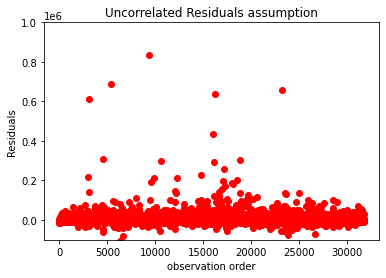

Assumption : No Autocorrelation

Performing Durbin-Watson Test
DW =  [1.99474954]
positive autocorrelation 

Assumption not satisfied 



In [41]:
autocorrelation_assumption()    

### Test for Linearity

In [42]:
def LinearityAssumption():
    print("-------------------------------------------------")
    plt.plot(Y_pred,Resi,'ro')
    plt.axhline(y=0, color='g', linestyle='-')
    plt.xlim((0, 2800))   # set the xlim to left, right
    plt.ylim((-10000,100000))
    plt.xlabel("Fitted values")
    plt.ylabel("Residuals")
    plt.title("Linearity assumption")
    plt.show()


-------------------------------------------------


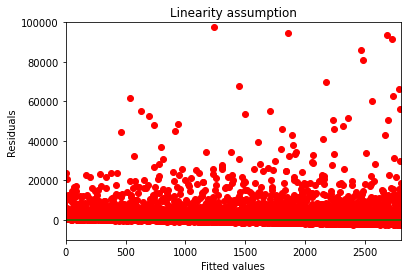

In [43]:
LinearityAssumption()

### Test for Homoscedasticity

In [134]:
def Homoscedasticity_assumption():
    print("\n\n-------------------------------------------------")
    fig, ax = plt.subplots(2,1, figsize=(8,10))

#     plt.scatter(x=Y_pred, y=Resi, color='red')

    sns.regplot(x=Y_pred[:, 0], y=Resi[:, 0], line_kws={'color':'red'}, ax=ax[0])
    ax[0].set_xlabel("Fitted values")
    ax[0].set_ylabel("Residuals")
    ax[0].set_title("Homoscedasticity assumption")

    sns.regplot(x=Y_pred[:, 0], y=Resi[:, 0], line_kws={'color':'red'}, ax=ax[1])
    ax[1].set_xlim(-50000, 50000)
    ax[1].set_ylim((-40000,100000))
    ax[1].set_xlabel("Fitted values")
    ax[1].set_ylabel("Residuals")
    ax[1].set_title("Zoomed in graph")
    plt.show()

    X_train = linear_regression_classifier.train_features
    X_train_mod = sm.add_constant(X_train)
    gg_test = pd.DataFrame(sms.het_goldfeldquandt(Resi, X_train_mod)[:-1],
                          columns=['value'],
                          index=['F statistic value', 'p-value'])

    print('\nGoldfeld-Quandt Test------------\n\n', gg_test)




-------------------------------------------------


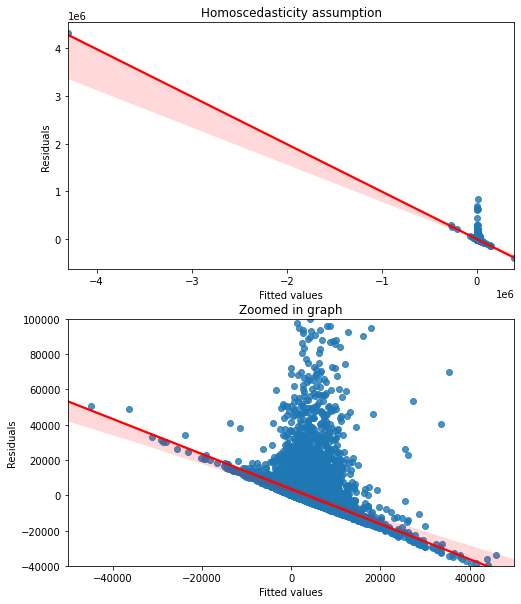


Goldfeld-Quandt Test------------

                       value
F statistic value  0.952206
p-value            0.998957


In [135]:
Homoscedasticity_assumption()

### Test for Normality of Residuals

In [136]:
def Normality_Residuals_Assumption():
    print("-------------------------------------------------")
    print("Normality of residuals assumptiontest by Q_Q plot")
    
    '''
    N = Resi.shape[0]
    Quantiles = np.zeros([N,1],dtype = float)
    mean = Resi.mean()
    S = (Resi.std())**2
    Dist = []Homoscedasticity_assumption
    for i in range(N):
        Quantiles[i] = scipy.stats.chi2.ppf((i - 1/2)/N, 1)
        Dist.append((Resi[i] - mean)*(1/S)*(Resi[i] - mean))
    '''
    sm.qqplot(Resi, line ='45') 
    #plt.ylim(-10,1000)
    #plt.plot(Quantiles,np.sort(Dist),'ro')
    plt.xlabel("Quantiles")
    plt.ylabel("ordered distances")
    plt.title("Normality test for residuals")
    plt.show()
    '''
    stats.probplot(Dist, dist="norm", plot=plt)
    plt.title("Normal Q-Q plot")
    plt.show()
    '''

-------------------------------------------------
Normality of residuals assumptiontest by Q_Q plot


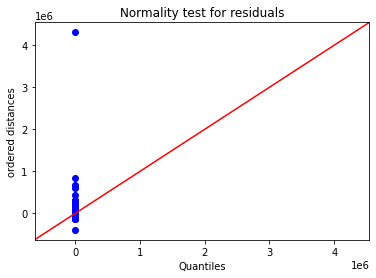

In [137]:
Normality_Residuals_Assumption()

## Diagnostic Test

### Test for Multicollinearity

In [138]:
def Multicollinearity_test(X_df):
    X_df=add_constant(X_df)
    vifs=pd.Series(
     [1 / (1. - OLS(X_df[col].values, 
                       X_df.loc[:, X_df.columns != col].values).fit().rsquared) 
         for col in X_df],
        index=X_df.columns,
        name='VIF'
    )
    return vifs

In [139]:
X = data_copy.iloc[:, :-1]
Multicollinearity_test(X)

const                            0.000000e+00
n_tokens_title                   1.101270e+00
n_tokens_content                 3.323491e+00
n_unique_tokens                  1.367674e+04
n_non_stop_words                 2.866072e+05
n_non_stop_unique_tokens         8.483534e+03
num_hrefs                        1.731147e+00
num_self_hrefs                   1.414355e+00
num_imgs                         1.654923e+00
num_videos                       1.254850e+00
average_token_length             1.260578e+01
num_keywords                     1.506761e+00
data_channel_is_lifestyle        2.341086e+00
data_channel_is_entertainment    2.856507e+00
data_channel_is_bus              5.836851e+00
data_channel_is_socmed           2.292952e+00
data_channel_is_tech             6.243049e+00
data_channel_is_world            7.107292e+00
kw_min_min                       3.830496e+00
kw_max_min                       1.120958e+01
kw_avg_min                       1.094507e+01
kw_min_max                       1

Here we can see that some of the features have very high variance inflation factor (VIF), and thus high Multicollinearity and thus are redundant. They should not be considered.

In order to solve this problem, we perform principle Component Analysis

## File Import for Further Analysis

In [210]:
data=pd.read_csv("OnlineNewsPopularity.csv", sep=r'\s*,\s')

In [148]:
y=data['shares'].copy()
X=data.iloc[:, 2:-1]

In [149]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)





## Principle Component Analysis

In [150]:
def scale(dataset):
    return (dataset-dataset.mean())

In [151]:
def scree_plot(variances):
    fig = plt.figure()
    ax = fig.add_axes([1,1,1,1])
    ax.bar([i for i in range(len(variances))], [i[0] for i in variances])

In [154]:
def calc_eigen_component(dataset):
    covariance_matrix = np.cov(dataset.T)
    eig_values, eig_vectors = np.linalg.eig(covariance_matrix)
    eig_values = eig_values.reshape((eig_values.shape[0], 1))
    variances = np.zeros((len(eig_values), 1))
    for i in range(len(eig_values)):
        variances[i] = eig_values[i]/np.sum(eig_values)
    scree_plot(variances)
    return eig_values, eig_vectors, variances

In [155]:
X_train = scale(X_train)
X_test = scale(X_test)

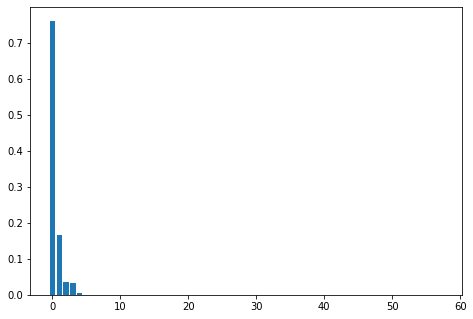

In [157]:
train_values, train_vectors, train_variances = calc_eigen_component(X_train)

In [158]:
train_variances[0] + train_variances[1]

array([0.9265245])

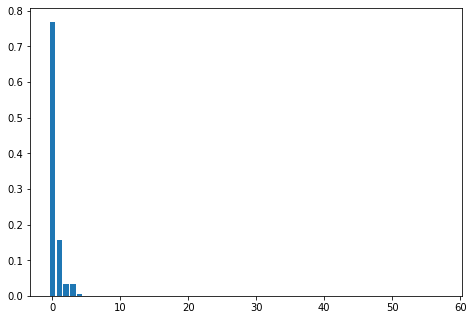

In [159]:
test_values, test_vectors, test_variances = calc_eigen_component(X_test)

In [160]:
test_variances[0] + test_variances[1]

array([0.92719457])

## Random Forests

### Random Forest Regressor

In [162]:
def reduce_dimensions_PCA(vectors, dataset):
    pca_dimensions = np.concatenate(([vectors[0]], [vectors[1]]))
    pca_dimensions = pca_dimensions.dot(dataset.T)
    pca1 = pca_dimensions[0]
    pca2 = pca_dimensions[1]
    dataset_reduced = pd.DataFrame({'pca1': pca1, 'pca2': pca2})
    return dataset_reduced

In [163]:
train_x_reduced = reduce_dimensions_PCA(train_vectors, X_train)
train_x_reduced.head()

pca1      pca2
0 -1655.823652 -3.766832
1   262.962825 -0.871043
2 -2921.978762 -4.233466
3 -3708.116656 -4.983881
4  -541.549102 -2.774937

In [164]:
test_x_reduced = reduce_dimensions_PCA(test_vectors, X_test)
test_x_reduced.head()

pca1      pca2
0  3162.559472 -5.100242
1 -5029.724320  3.684472
2  2953.018838 -0.780644
3  3764.529640 -4.529731
4   878.525954  4.874286

Finally, we put our model to use, using the reduced dataset.

In [165]:
def RFRegressor(X_train, X_test, y_train, y_test):
    regr=RandomForestRegressor(random_state=231)    
    regr.fit(X_train, y_train)
    y_pred=regr.predict(X_test)
    rmse=mean_squared_error(y_true=y_test, y_pred=y_pred,squared=False)
    mae=mean_absolute_error(y_true=y_test, y_pred=y_pred)
    print("Model: RandomForestRegressor\nRMSE\t\t\t\tMAE")
    print(f"{rmse}\t{mae}")
    print("Model feature importances:")
    print(regr.feature_importances_)
    print(f"Sum of feature importances: {sum(regr.feature_importances_)}")

In [166]:
RFRegressor(train_x_reduced, test_x_reduced, y_train, y_test)

Model: RandomForestRegressor
RMSE				MAE
14406.567475720483	4005.5139525791396
Model feature importances:
[0.42306711 0.57693289]
Sum of feature importances: 1.0


Here, we also compare results with the original dataset. This shows that there quite a bit of difference between the Test Root Mean Squared Error(RMSE) and Mean Absolute Error (MAE) of the two. 

This can be accounted for by the fact that we only considered the two most important features, and can be resolved by increasing the number of reduced (by PCA) features.

In [167]:
RFRegressor(X_train, X_test, y_train, y_test)

Model: RandomForestRegressor
RMSE				MAE
13735.542996558619	3739.9150422499683
Model feature importances:
[0.01572052 0.06852373 0.03328802 0.000277   0.02472748 0.01935932
 0.01012996 0.01832319 0.00930619 0.02673403 0.00557642 0.00179599
 0.00264084 0.00710953 0.00320437 0.00448062 0.00064216 0.00213517
 0.01351297 0.0196412  0.01873632 0.00478273 0.04342271 0.01416756
 0.06241486 0.08626567 0.01848927 0.02670366 0.05176109 0.00281946
 0.00329612 0.0033895  0.00197296 0.00153813 0.00616733 0.00090701
 0.00341873 0.03041865 0.02488278 0.02950168 0.02986668 0.02079125
 0.02508858 0.01811926 0.01524129 0.01406522 0.00986434 0.0076935
 0.01881325 0.00831901 0.00859997 0.01582575 0.01019826 0.01159889
 0.02865533 0.01773075 0.01140534 0.00593843]
Sum of feature importances: 1.0000000000000004


### Random Forest Classifier

In [168]:
data_class=data.copy()
data_class['shares']=(data['shares']>1400).astype(int)

In [169]:
y=data_class['shares'].copy()
X=data_class.iloc[:, 2:-1]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3)

In [170]:
X_train = scale(X_train)
X_test = scale(X_test)

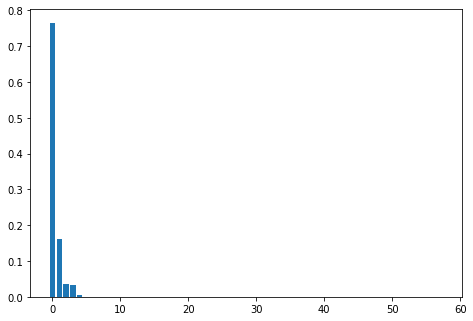

In [171]:
train_values, train_vectors, train_variances = calc_eigen_component(X_train)

In [172]:
train_variances[0] + train_variances[1]

array([0.92789163])

In [173]:
X_train = scale(X_train)
X_test = scale(X_test)

In [174]:
def scree_plot(variances):
    fig = plt.figure()
    ax = fig.add_axes([1,1,1,1])
    ax.bar([i for i in range(len(variances))], [i[0] for i in variances])

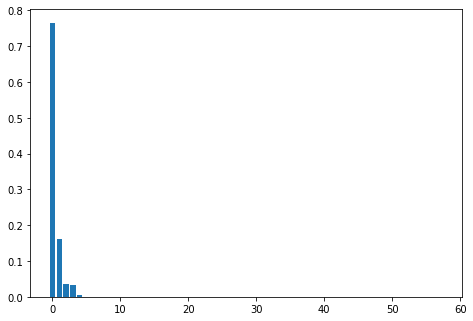

In [175]:
train_values, train_vectors, train_variances = calc_eigen_component(X_train)

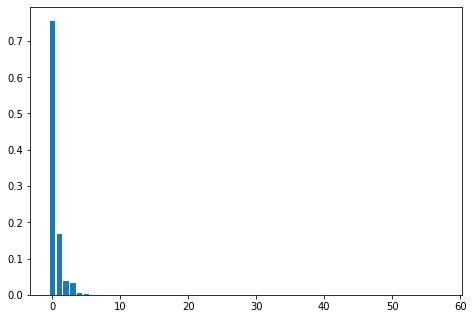

In [176]:
test_values, test_vectors, test_variances = calc_eigen_component(X_test)

In [177]:
test_variances[0] + test_variances[1]

array([0.92394656])

In [178]:
train_x_reduced = reduce_dimensions_PCA(train_vectors, X_train)
train_x_reduced.head()

pca1      pca2
0    -96.457834  1.655206
1 -11354.574733  1.376741
2  -1090.373061  2.732691
3   7209.221045  8.385990
4   3817.662510  1.422537

In [179]:
test_x_reduced = reduce_dimensions_PCA(test_vectors, X_test)
test_x_reduced.head()

pca1      pca2
0  2051.056189  4.547128
1  1951.612297  4.544476
2  1676.148413  3.407555
3   978.461884  1.943678
4  2127.421584  2.994194

In [180]:
def RFClassifier(X_train, X_test, y_train, y_test):
    regr=RandomForestClassifier(random_state=231)    
    regr.fit(X_train, y_train)
    y_pred=regr.predict(X_test)
    acc=regr.score(X_test, y_test)
    acc2=regr.score(X_train, y_train)
    print("Model: RandomForestClassifier")
    print(f"Train Accuracy: {acc2*100}%")
    print(f"Test Accuracy: {acc*100}%")
    print("Model feature importances:")
    print(regr.feature_importances_)
    print(f"Sum of feature importances: {sum(regr.feature_importances_)}")

In [181]:
RFClassifier(train_x_reduced, test_x_reduced, y_train, y_test)

Model: RandomForestClassifier
Train Accuracy: 99.99639639639639%
Test Accuracy: 51.24432486968219%
Model feature importances:
[0.50145718 0.49854282]
Sum of feature importances: 1.0


Here, we also compare results with the original dataset. This shows that there quite a bit of difference between the Test accuracies of the two. 

This can be accounted for by the fact that we only considered the two most important features, and can be resolved by increasing the number of reduced (by PCA) features.

In [182]:
RFClassifier(X_train, X_test, y_train, y_test)

Model: RandomForestClassifier
Train Accuracy: 100.0%
Test Accuracy: 65.50361526820245%
Model feature importances:
[0.01572228 0.02626162 0.0278224  0.00010183 0.02704747 0.02157775
 0.01302297 0.01424578 0.00800502 0.02757335 0.01013557 0.00167022
 0.00959064 0.00251284 0.00509743 0.00460073 0.00700656 0.0059153
 0.02593669 0.02924026 0.01689669 0.00723845 0.02935349 0.02416372
 0.03902451 0.04239295 0.0317481  0.02368093 0.0289122  0.00301421
 0.00331673 0.00352953 0.00314451 0.0029262  0.00354862 0.00220081
 0.01143626 0.02873928 0.02964759 0.03233357 0.02618892 0.02874296
 0.027845   0.0248231  0.02581554 0.02348277 0.02054343 0.02076224
 0.02532728 0.01238745 0.01025286 0.02356537 0.01438679 0.01353549
 0.01341328 0.01489734 0.01181207 0.01188307]
Sum of feature importances: 1.0000000000000004


We can see that we achieved results close to the ones achieved in the original research paper by Fernandez et al.

## Artificial Neural Networks


In [211]:
data_copy = data
urls = data_copy.pop('url')
train, test = train_test_split(data_copy, test_size=0.2, random_state=0)

In [212]:
data.head()

timedelta  n_tokens_title  n_tokens_content  n_unique_tokens  \
0      731.0            12.0             219.0         0.663594   
1      731.0             9.0             255.0         0.604743   
2      731.0             9.0             211.0         0.575130   
3      731.0             9.0             531.0         0.503788   
4      731.0            13.0            1072.0         0.415646   

   n_non_stop_words  n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  \
0               1.0                  0.815385        4.0             2.0   
1               1.0                  0.791946        3.0             1.0   
2               1.0                  0.663866        3.0             1.0   
3               1.0                  0.665635        9.0             0.0   
4               1.0                  0.540890       19.0            19.0   

   num_imgs  num_videos  ...  min_positive_polarity  max_positive_polarity  \
0       1.0         0.0  ...               0.100000                    0.7   
1       1.0         0.0  ...               0.033333                    0.7   
2       1.0         0.0  ...               0.100000                    1.0   
3       1.0         0.0  ...               0.136364                    0.8   
4      20.0         0.0  ...               0.033333                    1.0   

   avg_negative_polarity  min_negative_polarity  max_negative_polarity  \
0              -0.350000                 -0.600              -0.200000   
1              -0.118750                 -0.125              -0.100000   
2              -0.466667                 -0.800              -0.133333   
3              -0.369697                 -0.600              -0.166667   
4              -0.220192                 -0.500              -0.050000   

   title_subjectivity  title_sentiment_polarity  abs_title_subjectivity  \
0            0.500000                 -0.187500                0.000000   
1            0.000000                  0.000000                0.500000   
2            0.000000                  0.000000                0.500000   
3            0.000000                  0.000000                0.500000   
4            0.454545                  0.136364                0.045455   

   abs_title_sentiment_polarity  shares  
0                      0.187500     593  
1                      0.000000     711  
2                      0.000000    1500  
3                      0.000000    1200  
4                      0.136364     505  

[5 rows x 60 columns]

In [213]:
X_train = train.iloc[:, :-1].values
y_train = train.iloc[:, -1].values
X_test = test.iloc[:, :-1].values
y_test = test.iloc[:, -1].values

In [214]:
X_train = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
y_train = (y_train > 1400).astype('int')

X_test = (X_test - np.mean(X_test, axis=0)) / np.std(X_test, axis=0)
y_test = (y_test > 1400).astype('int')

In [216]:
nn = NeuralNetwork(hidden_layer_sizes = (250, 1), activation='logistic', solver='adam', learning_rate_init=0.01, max_iter=1500)
history1 = nn.fit(X_train, y_train)
print('------------------------------------------------')
print('Training Set Accuracy for ANN: ', nn.score(X_train, y_train))
y_pred = nn.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Test Set Accuracy for ANN: ', acc)
print('Activation Function Used: ', nn.out_activation_)
print('Number of Layers in the Network: ', nn.n_layers_)
print('Number of Iterations: ', nn.n_iter_)
print('Classes: ', nn.classes_)

------------------------------------------------
Training Set Accuracy for ANN:  0.9412265489516002
Test Set Accuracy for ANN:  0.6025980577626434
Activation Function Used:  logistic
Number of Layers in the Network:  4
Number of Iterations:  231
Classes:  [0 1]


## k Nearest Neighbours

In [217]:
knn = KNeighborsClassifier(n_neighbors=11)
knnchist = knn.fit(X_train, y_train)
print('------------------------------------------------')
print('Training Set Accuracy for kNN: ', knn.score(X_train, y_train))
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Test Set Accuracy for kNN: ', acc)
print('Metric Used: ', knn.effective_metric_)

------------------------------------------------
Training Set Accuracy for kNN:  0.6925429607441274
Test Set Accuracy for kNN:  0.6230293857989658
Metric Used:  euclidean


## Naive Bayes Classifier

In [206]:
X = data.loc[:,:"abs_title_sentiment_polarity"]
Y = data["shares"]

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train,y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points: %d"%(X_test.shape[0],(y_test != y_pred).sum()))
accuracy = ((y_test == y_pred).sum()/y_test.shape[0])*100
print("Accuracy obtained is "+str(accuracy)+" %")

Number of mislabeled points out of a total 7929 points: 7926
Accuracy obtained is 0.037835792659856225 %


## Logistic/Softmax regression classifier

In [203]:
class Logistic_Softmax_RegressionClassifier:
    
    def __init__(self,data_file):
        self.theta_matrix = None
        self.train_features = None
        self.train_labels = None
        self.test_features = None
        self.test_labels = None
        self.initialize(data_file)
        #self.learn_parameters_stochastic_gradient_descent()
        
        self.learn_parameters_plain_grad_descent()
        
    def initialize(self,file):
        
        #reading training features and labels
        data = read_data(file)
        features_lst = data[0]
        labels_lst = data[1]
        
        for i in range(len(features_lst)): #augmenting feature vectors to account for the bias term
            features_lst[i] = [1] + features_lst[i]
        

        for i in range(len(labels_lst)):
        	lab = int(labels_lst[i])
        	if lab >= 1400:
        		lab = 1
        	else:
        		lab = 0
        	labels_lst[i] = lab

        split = math.ceil(len(features_lst)*(0.8))

        train_features_lst = features_lst[0:split]
        train_labels_lst = labels_lst[0:split]
        
        #print("features:",train_features_lst[0:3])
        #print("labs:",train_labels_lst[0:3])
        test_features_lst = features_lst[split:]
        test_labels_lst = labels_lst[split:]

        train_features_mat = np.matrix(train_features_lst)
        self.train_features = train_features_mat.astype(np.float)
        
        self.train_labels = train_labels_lst
        #self.train_labels = [int(i) for i in train_labels_lst]
        
        test_features_mat = np.matrix(test_features_lst)
        self.test_features = test_features_mat.astype(np.float)
        
        self.test_labels = test_labels_lst
        #self.test_labels = [int(i) for i in test_labels_lst] #If some words etc. , take care to convert to 0-9.
        
        mean_mat = self.train_features.mean(0)
        std_mat = self.train_features.std(0)
        for j in range(self.train_features.shape[1]):
            for i in range(self.train_features.shape[0]):
                if std_mat[0,j] == 0: #1 is augemnted---> in 0th place for all feature vecs...
                    #print("mean:-i,j-",i,",",j, "   ",mean_mat[0,j])
                    pass
                else:
                    self.train_features[i,j] = (self.train_features[i,j] - mean_mat[0,j])/std_mat[0,j]


        for j in range(self.test_features.shape[1]):
            for i in range(self.test_features.shape[0]):
                if std_mat[0,j] == 0:
                    pass
                else:
                    self.test_features[i,j] = (self.test_features[i,j] - mean_mat[0,j])/std_mat[0,j]                     
       

        #initialize theta matrix with zeroes
        K = len(set(self.test_labels)) #total number of classes
        n = train_features_mat[0,:].shape[1] #length of the augemented feature vector
        self.theta_matrix = np.zeros([n,K],dtype = float)
        #print(n,K)
        
        
    def compute_score_vector(self,X): 
        score_vec =  np.matmul(self.theta_matrix.transpose(),X)
        return score_vec  #also a column vector
    
    def apply_softmax(self,X): #May have overflow etc.
        X = np.exp(X)
        X = X/np.sum(X)
        return X
    
    def compute_probability_vector(self,X):
        return self.apply_softmax(self.compute_score_vector(X))
    
    def classify(self,X): #X is a column vector
        prob_vec = self.compute_probability_vector(X) #find place with maximum prob.
        max_ind = 0
        max_prob = 0
        #print(prob_vec.shape)
        for i in range(prob_vec.shape[0]):
            if prob_vec[i,0] > max_prob:
                max_prob = prob_vec[i,0]
                max_ind = i
                
        return max_ind #and this is the predicted class
    
    def user_input(self):
        pass
    
    def accuracy_test(self):
        correct = 0
        for i in range(self.test_features.shape[0]):
            output_label = self.classify(self.test_features[i,:].transpose())
            test_label = self.test_labels[i]
            #print("Sno: ",i,"  output label:",output_label," test_label:",test_label)
            if test_label == output_label:
                #print("CORRECT")
                correct += 1
            else:
                pass            	
               #print("WRONG")
        acc = 100*correct/self.test_features.shape[0]
        return acc
    
    def accuracy_train(self):
        correct = 0
        for i in range(self.train_features.shape[0]):
            output_label = self.classify(self.train_features[i,:].transpose())
            train_label = self.train_labels[i]
            #print("Sno: ",i,"  output label:",output_label," test_label:",train_label)
            if train_label == output_label:
                #print("CORRECT")
                correct += 1
            else:
                pass            	
               #print("WRONG")
        acc = 100*correct/self.train_features.shape[0]
        return acc
    
    
    
    def Indicator_func(self,actual_label, Class):
        if actual_label == Class:
            return 1
        else:
            return 0
        
    def Probability(self,Xi,k): #Xi is column vector
        Nr = 1
        Dr = 0
        K = len(set(self.test_labels))
        #print("shape:",self.theta_matrix[:,k].ndim) #It is like a 1-D array
        for j in range(K):
            try:
                Dr = Dr + math.exp(np.matmul(self.theta_matrix[:,j] , Xi) - np.matmul(self.theta_matrix[:,k] , Xi))
            except OverflowError:
                return 0.0000000000001
        if(Nr/Dr == 0):
            print("Nr/Dr = ",Nr/Dr)
            return 0.00000000000001
        return Nr/Dr
        
        
    def Current_CrossEntropyLoss(self):
        cost = 0
        K = len(set(self.test_labels)) #total number of classes
        N = self.train_features.shape[0] # total number of training examples
        
        #print(self.theta_matrix)
        for i in range(N): #for each training example
            Xi = self.train_features[i,:].transpose() #A column vector
            cst = 0
            for k in range(K):
                if(self.Indicator_func(self.train_labels[i],k) == 1):
                    cst = cst + -1*self.Indicator_func(self.train_labels[i],k)*math.log(self.Probability(Xi,k))
            cost = cost + cst
        return cost        
                
        
    
    def learn_parameters_stochastic_gradient_descent(self,batchsize = 10, eta = 0.001,epsilon = 0.01,max_iter=500):
        cost_lst = []
        cost = self.Current_CrossEntropyLoss()
        print("Starting Loss fn value:",cost)
        cost_lst.append(cost)
        K = len(set(self.test_labels)) #total number of classes
        n = self.train_features[0,:].shape[1] #length of the augemented feature vector
        temp_theta_matrix = np.zeros([n,K],dtype = float)  
        
        bs = batchsize
    
        lst = []
        for i in range(self.train_features.shape[0]):
            lst.append(i)
        count_iter = 0
        
        while(count_iter < max_iter):
            update_vector = []
            rand_sample = random.sample(lst,bs)
            # Now considering a stochastic mini-batch i.e. start to stop-1,update theta_matrix
            for k in range(len(set(self.train_labels))): #For this mini-batch, update the theta_matrix, basically update theta_0, theta_1, ..., thtea_K-1.
                    
                Sum = np.zeros([self.train_features.shape[1],1],dtype = float)
                    
                for i in rand_sample:
                    Xi = self.train_features[i,:].transpose()
                    Sum = Sum +  -1*Xi*(self.Indicator_func(self.train_labels[i],k) - self.Probability(Xi,k))
                        
                Grad_cost_fn = Sum 
                    
                #print(Sum.shape)
                #print(self.theta_matrix[:,k].shape)
                    
                temp_theta_matrix[:,k] = self.theta_matrix[:,k] + -eta*Grad_cost_fn.transpose()
                #print(Grad_cost_fn)
                update_vector = update_vector + Grad_cost_fn.tolist()
                    
            self.theta_matrix = temp_theta_matrix
            #print(np.matrix(update_vector).shape)
                
                #print(self.theta_matrix)
            cost = self.Current_CrossEntropyLoss()
            cost_lst.append(cost)
            norm = np.linalg.norm(np.matrix(update_vector))
            count_iter += 1
            print("After ", count_iter ," updation, the cost fn value is ", cost, " and norm of update_vec is ", norm)
            
            
            if(norm < epsilon):
                break
                
            
        plt.plot(cost_lst)
        plt.show()
        
        
        
    def learn_parameters_plain_grad_descent(self,batchsize = 1, eta = 0.01,epochs_limit = 5):
        cost_lst = []
        cost = self.Current_CrossEntropyLoss()
        print("Starting Loss fn value:",cost)
        cost_lst.append(cost)
        K = len(set(self.test_labels)) #total number of classes
        n = self.train_features[0,:].shape[1] #length of the augemented feature vector
        temp_theta_matrix = np.zeros([n,K],dtype = float)  
        
        bs = batchsize
        num_minibatches = math.ceil(self.train_features.shape[0]/bs)
        
        count_epochs = 0
        while(count_epochs < epochs_limit):
            
            for j in range(num_minibatches):
                
                start = j*bs
                stop = (j + 1)*bs
                if(stop > self.train_features.shape[0]/bs):
                    stop = self.train_features.shape[0]
                
                # Now considering a mini-batch i.e. start to stop-1,update theta_matrix
                
                for k in range(len(set(self.train_labels))): #For this mini-batch, update the theta_matrix, basically update theta_0, theta_1, ..., thtea_K-1.
                    
                    Sum = np.zeros([self.train_features.shape[1],1],dtype = float)
                    
                    for i in range(start,stop):
                        Xi = self.train_features[i,:].transpose()
                        Sum = Sum +  -1*Xi*(self.Indicator_func(self.train_labels[i],k) - self.Probability(Xi,k))
                        
                    Grad_cost_fn = Sum 
                    
                    #print(Sum.shape)
                    #print(self.theta_matrix[:,k].shape)
                    
                    temp_theta_matrix[:,k] = self.theta_matrix[:,k] + -eta*Grad_cost_fn.transpose()
                    #print(Grad_cost_fn)
                    
                self.theta_matrix = temp_theta_matrix
                
                #print(self.theta_matrix)
                #cost = self.Current_CrossEntropyLoss()
                cost = "later"
                cost_lst.append(cost)
                print("After ", count_epochs*num_minibatches + j + 1 )
                
            count_epochs += 1
            
        #plt.plot(cost_lst)
        #plt.show()
                
                    
softmax_logis_classifier = Logistic_Softmax_RegressionClassifier("OnlineNewsPopularity.csv")
print("Accuracy over training set is:",softmax_logis_classifier.accuracy_train())
print("Accuarcy over test set is:",softmax_logis_classifier.accuracy_test())




Starting Loss fn value: 21983.855978629366
After  1
After  2
After  3
After  4
After  5
After  6
After  7
After  8
After  9
After  10
After  11
After  12
After  13
After  14
After  15
After  16
After  17
After  18
After  19
After  20
After  21
After  22
After  23
After  24
After  25
After  26
After  27
After  28
After  29
After  30
After  31
After  32
After  33
After  34
After  35
After  36
After  37
After  38
After  39
After  40
After  41
After  42
After  43
After  44
After  45
After  46
After  47
After  48
After  49
After  50
After  51
After  52
After  53
After  54
After  55
After  56
After  57
After  58
After  59
After  60
After  61
After  62
After  63
After  64
After  65
After  66
After  67
After  68
After  69
After  70
After  71
After  72
After  73
After  74
After  75
After  76
After  77
After  78
After  79
After  80
After  81
After  82
After  83
After  84
After  85
After  86
After  87
After  88
After  89
After  90
After  91
After  92
After  93
After  94
After  95
After  96
After 

After  801
After  802
After  803
After  804
After  805
After  806
After  807
After  808
After  809
After  810
After  811
After  812
After  813
After  814
After  815
After  816
After  817
After  818
After  819
After  820
After  821
After  822
After  823
After  824
After  825
After  826
After  827
After  828
After  829
After  830
After  831
After  832
After  833
After  834
After  835
After  836
After  837
After  838
After  839
After  840
After  841
After  842
After  843
After  844
After  845
After  846
After  847
After  848
After  849
After  850
After  851
After  852
After  853
After  854
After  855
After  856
After  857
After  858
After  859
After  860
After  861
After  862
After  863
After  864
After  865
After  866
After  867
After  868
After  869
After  870
After  871
After  872
After  873
After  874
After  875
After  876
After  877
After  878
After  879
After  880
After  881
After  882
After  883
After  884
After  885
After  886
After  887
After  888
After  889
After  890
After  891

After  1606
After  1607
After  1608
After  1609
After  1610
After  1611
After  1612
After  1613
After  1614
After  1615
After  1616
After  1617
After  1618
After  1619
After  1620
After  1621
After  1622
After  1623
After  1624
After  1625
After  1626
After  1627
After  1628
After  1629
After  1630
After  1631
After  1632
After  1633
After  1634
After  1635
After  1636
After  1637
After  1638
After  1639
After  1640
After  1641
After  1642
After  1643
After  1644
After  1645
After  1646
After  1647
After  1648
After  1649
After  1650
After  1651
After  1652
After  1653
After  1654
After  1655
After  1656
After  1657
After  1658
After  1659
After  1660
After  1661
After  1662
After  1663
After  1664
After  1665
After  1666
After  1667
After  1668
After  1669
After  1670
After  1671
After  1672
After  1673
After  1674
After  1675
After  1676
After  1677
After  1678
After  1679
After  1680
After  1681
After  1682
After  1683
After  1684
After  1685
After  1686
After  1687
After  1688
Afte

After  2309
After  2310
After  2311
After  2312
After  2313
After  2314
After  2315
After  2316
After  2317
After  2318
After  2319
After  2320
After  2321
After  2322
After  2323
After  2324
After  2325
After  2326
After  2327
After  2328
After  2329
After  2330
After  2331
After  2332
After  2333
After  2334
After  2335
After  2336
After  2337
After  2338
After  2339
After  2340
After  2341
After  2342
After  2343
After  2344
After  2345
After  2346
After  2347
After  2348
After  2349
After  2350
After  2351
After  2352
After  2353
After  2354
After  2355
After  2356
After  2357
After  2358
After  2359
After  2360
After  2361
After  2362
After  2363
After  2364
After  2365
After  2366
After  2367
After  2368
After  2369
After  2370
After  2371
After  2372
After  2373
After  2374
After  2375
After  2376
After  2377
After  2378
After  2379
After  2380
After  2381
After  2382
After  2383
After  2384
After  2385
After  2386
After  2387
After  2388
After  2389
After  2390
After  2391
Afte

After  3001
After  3002
After  3003
After  3004
After  3005
After  3006
After  3007
After  3008
After  3009
After  3010
After  3011
After  3012
After  3013
After  3014
After  3015
After  3016
After  3017
After  3018
After  3019
After  3020
After  3021
After  3022
After  3023
After  3024
After  3025
After  3026
After  3027
After  3028
After  3029
After  3030
After  3031
After  3032
After  3033
After  3034
After  3035
After  3036
After  3037
After  3038
After  3039
After  3040
After  3041
After  3042
After  3043
After  3044
After  3045
After  3046
After  3047
After  3048
After  3049
After  3050
After  3051
After  3052
After  3053
After  3054
After  3055
After  3056
After  3057
After  3058
After  3059
After  3060
After  3061
After  3062
After  3063
After  3064
After  3065
After  3066
After  3067
After  3068
After  3069
After  3070
After  3071
After  3072
After  3073
After  3074
After  3075
After  3076
After  3077
After  3078
After  3079
After  3080
After  3081
After  3082
After  3083
Afte

After  3700
After  3701
After  3702
After  3703
After  3704
After  3705
After  3706
After  3707
After  3708
After  3709
After  3710
After  3711
After  3712
After  3713
After  3714
After  3715
After  3716
After  3717
After  3718
After  3719
After  3720
After  3721
After  3722
After  3723
After  3724
After  3725
After  3726
After  3727
After  3728
After  3729
After  3730
After  3731
After  3732
After  3733
After  3734
After  3735
After  3736
After  3737
After  3738
After  3739
After  3740
After  3741
After  3742
After  3743
After  3744
After  3745
After  3746
After  3747
After  3748
After  3749
After  3750
After  3751
After  3752
After  3753
After  3754
After  3755
After  3756
After  3757
After  3758
After  3759
After  3760
After  3761
After  3762
After  3763
After  3764
After  3765
After  3766
After  3767
After  3768
After  3769
After  3770
After  3771
After  3772
After  3773
After  3774
After  3775
After  3776
After  3777
After  3778
After  3779
After  3780
After  3781
After  3782
Afte

After  4392
After  4393
After  4394
After  4395
After  4396
After  4397
After  4398
After  4399
After  4400
After  4401
After  4402
After  4403
After  4404
After  4405
After  4406
After  4407
After  4408
After  4409
After  4410
After  4411
After  4412
After  4413
After  4414
After  4415
After  4416
After  4417
After  4418
After  4419
After  4420
After  4421
After  4422
After  4423
After  4424
After  4425
After  4426
After  4427
After  4428
After  4429
After  4430
After  4431
After  4432
After  4433
After  4434
After  4435
After  4436
After  4437
After  4438
After  4439
After  4440
After  4441
After  4442
After  4443
After  4444
After  4445
After  4446
After  4447
After  4448
After  4449
After  4450
After  4451
After  4452
After  4453
After  4454
After  4455
After  4456
After  4457
After  4458
After  4459
After  4460
After  4461
After  4462
After  4463
After  4464
After  4465
After  4466
After  4467
After  4468
After  4469
After  4470
After  4471
After  4472
After  4473
After  4474
Afte

After  5076
After  5077
After  5078
After  5079
After  5080
After  5081
After  5082
After  5083
After  5084
After  5085
After  5086
After  5087
After  5088
After  5089
After  5090
After  5091
After  5092
After  5093
After  5094
After  5095
After  5096
After  5097
After  5098
After  5099
After  5100
After  5101
After  5102
After  5103
After  5104
After  5105
After  5106
After  5107
After  5108
After  5109
After  5110
After  5111
After  5112
After  5113
After  5114
After  5115
After  5116
After  5117
After  5118
After  5119
After  5120
After  5121
After  5122
After  5123
After  5124
After  5125
After  5126
After  5127
After  5128
After  5129
After  5130
After  5131
After  5132
After  5133
After  5134
After  5135
After  5136
After  5137
After  5138
After  5139
After  5140
After  5141
After  5142
After  5143
After  5144
After  5145
After  5146
After  5147
After  5148
After  5149
After  5150
After  5151
After  5152
After  5153
After  5154
After  5155
After  5156
After  5157
After  5158
Afte

After  5859
After  5860
After  5861
After  5862
After  5863
After  5864
After  5865
After  5866
After  5867
After  5868
After  5869
After  5870
After  5871
After  5872
After  5873
After  5874
After  5875
After  5876
After  5877
After  5878
After  5879
After  5880
After  5881
After  5882
After  5883
After  5884
After  5885
After  5886
After  5887
After  5888
After  5889
After  5890
After  5891
After  5892
After  5893
After  5894
After  5895
After  5896
After  5897
After  5898
After  5899
After  5900
After  5901
After  5902
After  5903
After  5904
After  5905
After  5906
After  5907
After  5908
After  5909
After  5910
After  5911
After  5912
After  5913
After  5914
After  5915
After  5916
After  5917
After  5918
After  5919
After  5920
After  5921
After  5922
After  5923
After  5924
After  5925
After  5926
After  5927
After  5928
After  5929
After  5930
After  5931
After  5932
After  5933
After  5934
After  5935
After  5936
After  5937
After  5938
After  5939
After  5940
After  5941
Afte

After  6633
After  6634
After  6635
After  6636
After  6637
After  6638
After  6639
After  6640
After  6641
After  6642
After  6643
After  6644
After  6645
After  6646
After  6647
After  6648
After  6649
After  6650
After  6651
After  6652
After  6653
After  6654
After  6655
After  6656
After  6657
After  6658
After  6659
After  6660
After  6661
After  6662
After  6663
After  6664
After  6665
After  6666
After  6667
After  6668
After  6669
After  6670
After  6671
After  6672
After  6673
After  6674
After  6675
After  6676
After  6677
After  6678
After  6679
After  6680
After  6681
After  6682
After  6683
After  6684
After  6685
After  6686
After  6687
After  6688
After  6689
After  6690
After  6691
After  6692
After  6693
After  6694
After  6695
After  6696
After  6697
After  6698
After  6699
After  6700
After  6701
After  6702
After  6703
After  6704
After  6705
After  6706
After  6707
After  6708
After  6709
After  6710
After  6711
After  6712
After  6713
After  6714
After  6715
Afte

After  7443
After  7444
After  7445
After  7446
After  7447
After  7448
After  7449
After  7450
After  7451
After  7452
After  7453
After  7454
After  7455
After  7456
After  7457
After  7458
After  7459
After  7460
After  7461
After  7462
After  7463
After  7464
After  7465
After  7466
After  7467
After  7468
After  7469
After  7470
After  7471
After  7472
After  7473
After  7474
After  7475
After  7476
After  7477
After  7478
After  7479
After  7480
After  7481
After  7482
After  7483
After  7484
After  7485
After  7486
After  7487
After  7488
After  7489
After  7490
After  7491
After  7492
After  7493
After  7494
After  7495
After  7496
After  7497
After  7498
After  7499
After  7500
After  7501
After  7502
After  7503
After  7504
After  7505
After  7506
After  7507
After  7508
After  7509
After  7510
After  7511
After  7512
After  7513
After  7514
After  7515
After  7516
After  7517
After  7518
After  7519
After  7520
After  7521
After  7522
After  7523
After  7524
After  7525
Afte

After  8166
After  8167
After  8168
After  8169
After  8170
After  8171
After  8172
After  8173
After  8174
After  8175
After  8176
After  8177
After  8178
After  8179
After  8180
After  8181
After  8182
After  8183
After  8184
After  8185
After  8186
After  8187
After  8188
After  8189
After  8190
After  8191
After  8192
After  8193
After  8194
After  8195
After  8196
After  8197
After  8198
After  8199
After  8200
After  8201
After  8202
After  8203
After  8204
After  8205
After  8206
After  8207
After  8208
After  8209
After  8210
After  8211
After  8212
After  8213
After  8214
After  8215
After  8216
After  8217
After  8218
After  8219
After  8220
After  8221
After  8222
After  8223
After  8224
After  8225
After  8226
After  8227
After  8228
After  8229
After  8230
After  8231
After  8232
After  8233
After  8234
After  8235
After  8236
After  8237
After  8238
After  8239
After  8240
After  8241
After  8242
After  8243
After  8244
After  8245
After  8246
After  8247
After  8248
Afte

After  8873
After  8874
After  8875
After  8876
After  8877
After  8878
After  8879
After  8880
After  8881
After  8882
After  8883
After  8884
After  8885
After  8886
After  8887
After  8888
After  8889
After  8890
After  8891
After  8892
After  8893
After  8894
After  8895
After  8896
After  8897
After  8898
After  8899
After  8900
After  8901
After  8902
After  8903
After  8904
After  8905
After  8906
After  8907
After  8908
After  8909
After  8910
After  8911
After  8912
After  8913
After  8914
After  8915
After  8916
After  8917
After  8918
After  8919
After  8920
After  8921
After  8922
After  8923
After  8924
After  8925
After  8926
After  8927
After  8928
After  8929
After  8930
After  8931
After  8932
After  8933
After  8934
After  8935
After  8936
After  8937
After  8938
After  8939
After  8940
After  8941
After  8942
After  8943
After  8944
After  8945
After  8946
After  8947
After  8948
After  8949
After  8950
After  8951
After  8952
After  8953
After  8954
After  8955
Afte

After  9561
After  9562
After  9563
After  9564
After  9565
After  9566
After  9567
After  9568
After  9569
After  9570
After  9571
After  9572
After  9573
After  9574
After  9575
After  9576
After  9577
After  9578
After  9579
After  9580
After  9581
After  9582
After  9583
After  9584
After  9585
After  9586
After  9587
After  9588
After  9589
After  9590
After  9591
After  9592
After  9593
After  9594
After  9595
After  9596
After  9597
After  9598
After  9599
After  9600
After  9601
After  9602
After  9603
After  9604
After  9605
After  9606
After  9607
After  9608
After  9609
After  9610
After  9611
After  9612
After  9613
After  9614
After  9615
After  9616
After  9617
After  9618
After  9619
After  9620
After  9621
After  9622
After  9623
After  9624
After  9625
After  9626
After  9627
After  9628
After  9629
After  9630
After  9631
After  9632
After  9633
After  9634
After  9635
After  9636
After  9637
After  9638
After  9639
After  9640
After  9641
After  9642
After  9643
Afte

After  10265
After  10266
After  10267
After  10268
After  10269
After  10270
After  10271
After  10272
After  10273
After  10274
After  10275
After  10276
After  10277
After  10278
After  10279
After  10280
After  10281
After  10282
After  10283
After  10284
After  10285
After  10286
After  10287
After  10288
After  10289
After  10290
After  10291
After  10292
After  10293
After  10294
After  10295
After  10296
After  10297
After  10298
After  10299
After  10300
After  10301
After  10302
After  10303
After  10304
After  10305
After  10306
After  10307
After  10308
After  10309
After  10310
After  10311
After  10312
After  10313
After  10314
After  10315
After  10316
After  10317
After  10318
After  10319
After  10320
After  10321
After  10322
After  10323
After  10324
After  10325
After  10326
After  10327
After  10328
After  10329
After  10330
After  10331
After  10332
After  10333
After  10334
After  10335
After  10336
After  10337
After  10338
After  10339
After  10340
After  10341

After  10960
After  10961
After  10962
After  10963
After  10964
After  10965
After  10966
After  10967
After  10968
After  10969
After  10970
After  10971
After  10972
After  10973
After  10974
After  10975
After  10976
After  10977
After  10978
After  10979
After  10980
After  10981
After  10982
After  10983
After  10984
After  10985
After  10986
After  10987
After  10988
After  10989
After  10990
After  10991
After  10992
After  10993
After  10994
After  10995
After  10996
After  10997
After  10998
After  10999
After  11000
After  11001
After  11002
After  11003
After  11004
After  11005
After  11006
After  11007
After  11008
After  11009
After  11010
After  11011
After  11012
After  11013
After  11014
After  11015
After  11016
After  11017
After  11018
After  11019
After  11020
After  11021
After  11022
After  11023
After  11024
After  11025
After  11026
After  11027
After  11028
After  11029
After  11030
After  11031
After  11032
After  11033
After  11034
After  11035
After  11036

After  11610
After  11611
After  11612
After  11613
After  11614
After  11615
After  11616
After  11617
After  11618
After  11619
After  11620
After  11621
After  11622
After  11623
After  11624
After  11625
After  11626
After  11627
After  11628
After  11629
After  11630
After  11631
After  11632
After  11633
After  11634
After  11635
After  11636
After  11637
After  11638
After  11639
After  11640
After  11641
After  11642
After  11643
After  11644
After  11645
After  11646
After  11647
After  11648
After  11649
After  11650
After  11651
After  11652
After  11653
After  11654
After  11655
After  11656
After  11657
After  11658
After  11659
After  11660
After  11661
After  11662
After  11663
After  11664
After  11665
After  11666
After  11667
After  11668
After  11669
After  11670
After  11671
After  11672
After  11673
After  11674
After  11675
After  11676
After  11677
After  11678
After  11679
After  11680
After  11681
After  11682
After  11683
After  11684
After  11685
After  11686

After  12351
After  12352
After  12353
After  12354
After  12355
After  12356
After  12357
After  12358
After  12359
After  12360
After  12361
After  12362
After  12363
After  12364
After  12365
After  12366
After  12367
After  12368
After  12369
After  12370
After  12371
After  12372
After  12373
After  12374
After  12375
After  12376
After  12377
After  12378
After  12379
After  12380
After  12381
After  12382
After  12383
After  12384
After  12385
After  12386
After  12387
After  12388
After  12389
After  12390
After  12391
After  12392
After  12393
After  12394
After  12395
After  12396
After  12397
After  12398
After  12399
After  12400
After  12401
After  12402
After  12403
After  12404
After  12405
After  12406
After  12407
After  12408
After  12409
After  12410
After  12411
After  12412
After  12413
After  12414
After  12415
After  12416
After  12417
After  12418
After  12419
After  12420
After  12421
After  12422
After  12423
After  12424
After  12425
After  12426
After  12427

After  13058
After  13059
After  13060
After  13061
After  13062
After  13063
After  13064
After  13065
After  13066
After  13067
After  13068
After  13069
After  13070
After  13071
After  13072
After  13073
After  13074
After  13075
After  13076
After  13077
After  13078
After  13079
After  13080
After  13081
After  13082
After  13083
After  13084
After  13085
After  13086
After  13087
After  13088
After  13089
After  13090
After  13091
After  13092
After  13093
After  13094
After  13095
After  13096
After  13097
After  13098
After  13099
After  13100
After  13101
After  13102
After  13103
After  13104
After  13105
After  13106
After  13107
After  13108
After  13109
After  13110
After  13111
After  13112
After  13113
After  13114
After  13115
After  13116
After  13117
After  13118
After  13119
After  13120
After  13121
After  13122
After  13123
After  13124
After  13125
After  13126
After  13127
After  13128
After  13129
After  13130
After  13131
After  13132
After  13133
After  13134

After  13757
After  13758
After  13759
After  13760
After  13761
After  13762
After  13763
After  13764
After  13765
After  13766
After  13767
After  13768
After  13769
After  13770
After  13771
After  13772
After  13773
After  13774
After  13775
After  13776
After  13777
After  13778
After  13779
After  13780
After  13781
After  13782
After  13783
After  13784
After  13785
After  13786
After  13787
After  13788
After  13789
After  13790
After  13791
After  13792
After  13793
After  13794
After  13795
After  13796
After  13797
After  13798
After  13799
After  13800
After  13801
After  13802
After  13803
After  13804
After  13805
After  13806
After  13807
After  13808
After  13809
After  13810
After  13811
After  13812
After  13813
After  13814
After  13815
After  13816
After  13817
After  13818
After  13819
After  13820
After  13821
After  13822
After  13823
After  13824
After  13825
After  13826
After  13827
After  13828
After  13829
After  13830
After  13831
After  13832
After  13833

After  14453
After  14454
After  14455
After  14456
After  14457
After  14458
After  14459
After  14460
After  14461
After  14462
After  14463
After  14464
After  14465
After  14466
After  14467
After  14468
After  14469
After  14470
After  14471
After  14472
After  14473
After  14474
After  14475
After  14476
After  14477
After  14478
After  14479
After  14480
After  14481
After  14482
After  14483
After  14484
After  14485
After  14486
After  14487
After  14488
After  14489
After  14490
After  14491
After  14492
After  14493
After  14494
After  14495
After  14496
After  14497
After  14498
After  14499
After  14500
After  14501
After  14502
After  14503
After  14504
After  14505
After  14506
After  14507
After  14508
After  14509
After  14510
After  14511
After  14512
After  14513
After  14514
After  14515
After  14516
After  14517
After  14518
After  14519
After  14520
After  14521
After  14522
After  14523
After  14524
After  14525
After  14526
After  14527
After  14528
After  14529

After  15145
After  15146
After  15147
After  15148
After  15149
After  15150
After  15151
After  15152
After  15153
After  15154
After  15155
After  15156
After  15157
After  15158
After  15159
After  15160
After  15161
After  15162
After  15163
After  15164
After  15165
After  15166
After  15167
After  15168
After  15169
After  15170
After  15171
After  15172
After  15173
After  15174
After  15175
After  15176
After  15177
After  15178
After  15179
After  15180
After  15181
After  15182
After  15183
After  15184
After  15185
After  15186
After  15187
After  15188
After  15189
After  15190
After  15191
After  15192
After  15193
After  15194
After  15195
After  15196
After  15197
After  15198
After  15199
After  15200
After  15201
After  15202
After  15203
After  15204
After  15205
After  15206
After  15207
After  15208
After  15209
After  15210
After  15211
After  15212
After  15213
After  15214
After  15215
After  15216
After  15217
After  15218
After  15219
After  15220
After  15221

After  15892
After  15893
After  15894
After  15895
After  15896
After  15897
After  15898
After  15899
After  15900
After  15901
After  15902
After  15903
After  15904
After  15905
After  15906
After  15907
After  15908
After  15909
After  15910
After  15911
After  15912
After  15913
After  15914
After  15915
After  15916
After  15917
After  15918
After  15919
After  15920
After  15921
After  15922
After  15923
After  15924
After  15925
After  15926
After  15927
After  15928
After  15929
After  15930
After  15931
After  15932
After  15933
After  15934
After  15935
After  15936
After  15937
After  15938
After  15939
After  15940
After  15941
After  15942
After  15943
After  15944
After  15945
After  15946
After  15947
After  15948
After  15949
After  15950
After  15951
After  15952
After  15953
After  15954
After  15955
After  15956
After  15957
After  15958
After  15959
After  15960
After  15961
After  15962
After  15963
After  15964
After  15965
After  15966
After  15967
After  15968

After  16570
After  16571
After  16572
After  16573
After  16574
After  16575
After  16576
After  16577
After  16578
After  16579
After  16580
After  16581
After  16582
After  16583
After  16584
After  16585
After  16586
After  16587
After  16588
After  16589
After  16590
After  16591
After  16592
After  16593
After  16594
After  16595
After  16596
After  16597
After  16598
After  16599
After  16600
After  16601
After  16602
After  16603
After  16604
After  16605
After  16606
After  16607
After  16608
After  16609
After  16610
After  16611
After  16612
After  16613
After  16614
After  16615
After  16616
After  16617
After  16618
After  16619
After  16620
After  16621
After  16622
After  16623
After  16624
After  16625
After  16626
After  16627
After  16628
After  16629
After  16630
After  16631
After  16632
After  16633
After  16634
After  16635
After  16636
After  16637
After  16638
After  16639
After  16640
After  16641
After  16642
After  16643
After  16644
After  16645
After  16646

After  17228
After  17229
After  17230
After  17231
After  17232
After  17233
After  17234
After  17235
After  17236
After  17237
After  17238
After  17239
After  17240
After  17241
After  17242
After  17243
After  17244
After  17245
After  17246
After  17247
After  17248
After  17249
After  17250
After  17251
After  17252
After  17253
After  17254
After  17255
After  17256
After  17257
After  17258
After  17259
After  17260
After  17261
After  17262
After  17263
After  17264
After  17265
After  17266
After  17267
After  17268
After  17269
After  17270
After  17271
After  17272
After  17273
After  17274
After  17275
After  17276
After  17277
After  17278
After  17279
After  17280
After  17281
After  17282
After  17283
After  17284
After  17285
After  17286
After  17287
After  17288
After  17289
After  17290
After  17291
After  17292
After  17293
After  17294
After  17295
After  17296
After  17297
After  17298
After  17299
After  17300
After  17301
After  17302
After  17303
After  17304

After  17903
After  17904
After  17905
After  17906
After  17907
After  17908
After  17909
After  17910
After  17911
After  17912
After  17913
After  17914
After  17915
After  17916
After  17917
After  17918
After  17919
After  17920
After  17921
After  17922
After  17923
After  17924
After  17925
After  17926
After  17927
After  17928
After  17929
After  17930
After  17931
After  17932
After  17933
After  17934
After  17935
After  17936
After  17937
After  17938
After  17939
After  17940
After  17941
After  17942
After  17943
After  17944
After  17945
After  17946
After  17947
After  17948
After  17949
After  17950
After  17951
After  17952
After  17953
After  17954
After  17955
After  17956
After  17957
After  17958
After  17959
After  17960
After  17961
After  17962
After  17963
After  17964
After  17965
After  17966
After  17967
After  17968
After  17969
After  17970
After  17971
After  17972
After  17973
After  17974
After  17975
After  17976
After  17977
After  17978
After  17979

After  18545
After  18546
After  18547
After  18548
After  18549
After  18550
After  18551
After  18552
After  18553
After  18554
After  18555
After  18556
After  18557
After  18558
After  18559
After  18560
After  18561
After  18562
After  18563
After  18564
After  18565
After  18566
After  18567
After  18568
After  18569
After  18570
After  18571
After  18572
After  18573
After  18574
After  18575
After  18576
After  18577
After  18578
After  18579
After  18580
After  18581
After  18582
After  18583
After  18584
After  18585
After  18586
After  18587
After  18588
After  18589
After  18590
After  18591
After  18592
After  18593
After  18594
After  18595
After  18596
After  18597
After  18598
After  18599
After  18600
After  18601
After  18602
After  18603
After  18604
After  18605
After  18606
After  18607
After  18608
After  18609
After  18610
After  18611
After  18612
After  18613
After  18614
After  18615
After  18616
After  18617
After  18618
After  18619
After  18620
After  18621

After  19186
After  19187
After  19188
After  19189
After  19190
After  19191
After  19192
After  19193
After  19194
After  19195
After  19196
After  19197
After  19198
After  19199
After  19200
After  19201
After  19202
After  19203
After  19204
After  19205
After  19206
After  19207
After  19208
After  19209
After  19210
After  19211
After  19212
After  19213
After  19214
After  19215
After  19216
After  19217
After  19218
After  19219
After  19220
After  19221
After  19222
After  19223
After  19224
After  19225
After  19226
After  19227
After  19228
After  19229
After  19230
After  19231
After  19232
After  19233
After  19234
After  19235
After  19236
After  19237
After  19238
After  19239
After  19240
After  19241
After  19242
After  19243
After  19244
After  19245
After  19246
After  19247
After  19248
After  19249
After  19250
After  19251
After  19252
After  19253
After  19254
After  19255
After  19256
After  19257
After  19258
After  19259
After  19260
After  19261
After  19262

After  19863
After  19864
After  19865
After  19866
After  19867
After  19868
After  19869
After  19870
After  19871
After  19872
After  19873
After  19874
After  19875
After  19876
After  19877
After  19878
After  19879
After  19880
After  19881
After  19882
After  19883
After  19884
After  19885
After  19886
After  19887
After  19888
After  19889
After  19890
After  19891
After  19892
After  19893
After  19894
After  19895
After  19896
After  19897
After  19898
After  19899
After  19900
After  19901
After  19902
After  19903
After  19904
After  19905
After  19906
After  19907
After  19908
After  19909
After  19910
After  19911
After  19912
After  19913
After  19914
After  19915
After  19916
After  19917
After  19918
After  19919
After  19920
After  19921
After  19922
After  19923
After  19924
After  19925
After  19926
After  19927
After  19928
After  19929
After  19930
After  19931
After  19932
After  19933
After  19934
After  19935
After  19936
After  19937
After  19938
After  19939

After  20540
After  20541
After  20542
After  20543
After  20544
After  20545
After  20546
After  20547
After  20548
After  20549
After  20550
After  20551
After  20552
After  20553
After  20554
After  20555
After  20556
After  20557
After  20558
After  20559
After  20560
After  20561
After  20562
After  20563
After  20564
After  20565
After  20566
After  20567
After  20568
After  20569
After  20570
After  20571
After  20572
After  20573
After  20574
After  20575
After  20576
After  20577
After  20578
After  20579
After  20580
After  20581
After  20582
After  20583
After  20584
After  20585
After  20586
After  20587
After  20588
After  20589
After  20590
After  20591
After  20592
After  20593
After  20594
After  20595
After  20596
After  20597
After  20598
After  20599
After  20600
After  20601
After  20602
After  20603
After  20604
After  20605
After  20606
After  20607
After  20608
After  20609
After  20610
After  20611
After  20612
After  20613
After  20614
After  20615
After  20616

After  21223
After  21224
After  21225
After  21226
After  21227
After  21228
After  21229
After  21230
After  21231
After  21232
After  21233
After  21234
After  21235
After  21236
After  21237
After  21238
After  21239
After  21240
After  21241
After  21242
After  21243
After  21244
After  21245
After  21246
After  21247
After  21248
After  21249
After  21250
After  21251
After  21252
After  21253
After  21254
After  21255
After  21256
After  21257
After  21258
After  21259
After  21260
After  21261
After  21262
After  21263
After  21264
After  21265
After  21266
After  21267
After  21268
After  21269
After  21270
After  21271
After  21272
After  21273
After  21274
After  21275
After  21276
After  21277
After  21278
After  21279
After  21280
After  21281
After  21282
After  21283
After  21284
After  21285
After  21286
After  21287
After  21288
After  21289
After  21290
After  21291
After  21292
After  21293
After  21294
After  21295
After  21296
After  21297
After  21298
After  21299

After  21869
After  21870
After  21871
After  21872
After  21873
After  21874
After  21875
After  21876
After  21877
After  21878
After  21879
After  21880
After  21881
After  21882
After  21883
After  21884
After  21885
After  21886
After  21887
After  21888
After  21889
After  21890
After  21891
After  21892
After  21893
After  21894
After  21895
After  21896
After  21897
After  21898
After  21899
After  21900
After  21901
After  21902
After  21903
After  21904
After  21905
After  21906
After  21907
After  21908
After  21909
After  21910
After  21911
After  21912
After  21913
After  21914
After  21915
After  21916
After  21917
After  21918
After  21919
After  21920
After  21921
After  21922
After  21923
After  21924
After  21925
After  21926
After  21927
After  21928
After  21929
After  21930
After  21931
After  21932
After  21933
After  21934
After  21935
After  21936
After  21937
After  21938
After  21939
After  21940
After  21941
After  21942
After  21943
After  21944
After  21945

After  22510
After  22511
After  22512
After  22513
After  22514
After  22515
After  22516
After  22517
After  22518
After  22519
After  22520
After  22521
After  22522
After  22523
After  22524
After  22525
After  22526
After  22527
After  22528
After  22529
After  22530
After  22531
After  22532
After  22533
After  22534
After  22535
After  22536
After  22537
After  22538
After  22539
After  22540
After  22541
After  22542
After  22543
After  22544
After  22545
After  22546
After  22547
After  22548
After  22549
After  22550
After  22551
After  22552
After  22553
After  22554
After  22555
After  22556
After  22557
After  22558
After  22559
After  22560
After  22561
After  22562
After  22563
After  22564
After  22565
After  22566
After  22567
After  22568
After  22569
After  22570
After  22571
After  22572
After  22573
After  22574
After  22575
After  22576
After  22577
After  22578
After  22579
After  22580
After  22581
After  22582
After  22583
After  22584
After  22585
After  22586

After  23173
After  23174
After  23175
After  23176
After  23177
After  23178
After  23179
After  23180
After  23181
After  23182
After  23183
After  23184
After  23185
After  23186
After  23187
After  23188
After  23189
After  23190
After  23191
After  23192
After  23193
After  23194
After  23195
After  23196
After  23197
After  23198
After  23199
After  23200
After  23201
After  23202
After  23203
After  23204
After  23205
After  23206
After  23207
After  23208
After  23209
After  23210
After  23211
After  23212
After  23213
After  23214
After  23215
After  23216
After  23217
After  23218
After  23219
After  23220
After  23221
After  23222
After  23223
After  23224
After  23225
After  23226
After  23227
After  23228
After  23229
After  23230
After  23231
After  23232
After  23233
After  23234
After  23235
After  23236
After  23237
After  23238
After  23239
After  23240
After  23241
After  23242
After  23243
After  23244
After  23245
After  23246
After  23247
After  23248
After  23249

After  23818
After  23819
After  23820
After  23821
After  23822
After  23823
After  23824
After  23825
After  23826
After  23827
After  23828
After  23829
After  23830
After  23831
After  23832
After  23833
After  23834
After  23835
After  23836
After  23837
After  23838
After  23839
After  23840
After  23841
After  23842
After  23843
After  23844
After  23845
After  23846
After  23847
After  23848
After  23849
After  23850
After  23851
After  23852
After  23853
After  23854
After  23855
After  23856
After  23857
After  23858
After  23859
After  23860
After  23861
After  23862
After  23863
After  23864
After  23865
After  23866
After  23867
After  23868
After  23869
After  23870
After  23871
After  23872
After  23873
After  23874
After  23875
After  23876
After  23877
After  23878
After  23879
After  23880
After  23881
After  23882
After  23883
After  23884
After  23885
After  23886
After  23887
After  23888
After  23889
After  23890
After  23891
After  23892
After  23893
After  23894

After  24506
After  24507
After  24508
After  24509
After  24510
After  24511
After  24512
After  24513
After  24514
After  24515
After  24516
After  24517
After  24518
After  24519
After  24520
After  24521
After  24522
After  24523
After  24524
After  24525
After  24526
After  24527
After  24528
After  24529
After  24530
After  24531
After  24532
After  24533
After  24534
After  24535
After  24536
After  24537
After  24538
After  24539
After  24540
After  24541
After  24542
After  24543
After  24544
After  24545
After  24546
After  24547
After  24548
After  24549
After  24550
After  24551
After  24552
After  24553
After  24554
After  24555
After  24556
After  24557
After  24558
After  24559
After  24560
After  24561
After  24562
After  24563
After  24564
After  24565
After  24566
After  24567
After  24568
After  24569
After  24570
After  24571
After  24572
After  24573
After  24574
After  24575
After  24576
After  24577
After  24578
After  24579
After  24580
After  24581
After  24582

After  25248
After  25249
After  25250
After  25251
After  25252
After  25253
After  25254
After  25255
After  25256
After  25257
After  25258
After  25259
After  25260
After  25261
After  25262
After  25263
After  25264
After  25265
After  25266
After  25267
After  25268
After  25269
After  25270
After  25271
After  25272
After  25273
After  25274
After  25275
After  25276
After  25277
After  25278
After  25279
After  25280
After  25281
After  25282
After  25283
After  25284
After  25285
After  25286
After  25287
After  25288
After  25289
After  25290
After  25291
After  25292
After  25293
After  25294
After  25295
After  25296
After  25297
After  25298
After  25299
After  25300
After  25301
After  25302
After  25303
After  25304
After  25305
After  25306
After  25307
After  25308
After  25309
After  25310
After  25311
After  25312
After  25313
After  25314
After  25315
After  25316
After  25317
After  25318
After  25319
After  25320
After  25321
After  25322
After  25323
After  25324

After  25924
After  25925
After  25926
After  25927
After  25928
After  25929
After  25930
After  25931
After  25932
After  25933
After  25934
After  25935
After  25936
After  25937
After  25938
After  25939
After  25940
After  25941
After  25942
After  25943
After  25944
After  25945
After  25946
After  25947
After  25948
After  25949
After  25950
After  25951
After  25952
After  25953
After  25954
After  25955
After  25956
After  25957
After  25958
After  25959
After  25960
After  25961
After  25962
After  25963
After  25964
After  25965
After  25966
After  25967
After  25968
After  25969
After  25970
After  25971
After  25972
After  25973
After  25974
After  25975
After  25976
After  25977
After  25978
After  25979
After  25980
After  25981
After  25982
After  25983
After  25984
After  25985
After  25986
After  25987
After  25988
After  25989
After  25990
After  25991
After  25992
After  25993
After  25994
After  25995
After  25996
After  25997
After  25998
After  25999
After  26000

After  26577
After  26578
After  26579
After  26580
After  26581
After  26582
After  26583
After  26584
After  26585
After  26586
After  26587
After  26588
After  26589
After  26590
After  26591
After  26592
After  26593
After  26594
After  26595
After  26596
After  26597
After  26598
After  26599
After  26600
After  26601
After  26602
After  26603
After  26604
After  26605
After  26606
After  26607
After  26608
After  26609
After  26610
After  26611
After  26612
After  26613
After  26614
After  26615
After  26616
After  26617
After  26618
After  26619
After  26620
After  26621
After  26622
After  26623
After  26624
After  26625
After  26626
After  26627
After  26628
After  26629
After  26630
After  26631
After  26632
After  26633
After  26634
After  26635
After  26636
After  26637
After  26638
After  26639
After  26640
After  26641
After  26642
After  26643
After  26644
After  26645
After  26646
After  26647
After  26648
After  26649
After  26650
After  26651
After  26652
After  26653

After  27224
After  27225
After  27226
After  27227
After  27228
After  27229
After  27230
After  27231
After  27232
After  27233
After  27234
After  27235
After  27236
After  27237
After  27238
After  27239
After  27240
After  27241
After  27242
After  27243
After  27244
After  27245
After  27246
After  27247
After  27248
After  27249
After  27250
After  27251
After  27252
After  27253
After  27254
After  27255
After  27256
After  27257
After  27258
After  27259
After  27260
After  27261
After  27262
After  27263
After  27264
After  27265
After  27266
After  27267
After  27268
After  27269
After  27270
After  27271
After  27272
After  27273
After  27274
After  27275
After  27276
After  27277
After  27278
After  27279
After  27280
After  27281
After  27282
After  27283
After  27284
After  27285
After  27286
After  27287
After  27288
After  27289
After  27290
After  27291
After  27292
After  27293
After  27294
After  27295
After  27296
After  27297
After  27298
After  27299
After  27300

After  27888
After  27889
After  27890
After  27891
After  27892
After  27893
After  27894
After  27895
After  27896
After  27897
After  27898
After  27899
After  27900
After  27901
After  27902
After  27903
After  27904
After  27905
After  27906
After  27907
After  27908
After  27909
After  27910
After  27911
After  27912
After  27913
After  27914
After  27915
After  27916
After  27917
After  27918
After  27919
After  27920
After  27921
After  27922
After  27923
After  27924
After  27925
After  27926
After  27927
After  27928
After  27929
After  27930
After  27931
After  27932
After  27933
After  27934
After  27935
After  27936
After  27937
After  27938
After  27939
After  27940
After  27941
After  27942
After  27943
After  27944
After  27945
After  27946
After  27947
After  27948
After  27949
After  27950
After  27951
After  27952
After  27953
After  27954
After  27955
After  27956
After  27957
After  27958
After  27959
After  27960
After  27961
After  27962
After  27963
After  27964

After  28537
After  28538
After  28539
After  28540
After  28541
After  28542
After  28543
After  28544
After  28545
After  28546
After  28547
After  28548
After  28549
After  28550
After  28551
After  28552
After  28553
After  28554
After  28555
After  28556
After  28557
After  28558
After  28559
After  28560
After  28561
After  28562
After  28563
After  28564
After  28565
After  28566
After  28567
After  28568
After  28569
After  28570
After  28571
After  28572
After  28573
After  28574
After  28575
After  28576
After  28577
After  28578
After  28579
After  28580
After  28581
After  28582
After  28583
After  28584
After  28585
After  28586
After  28587
After  28588
After  28589
After  28590
After  28591
After  28592
After  28593
After  28594
After  28595
After  28596
After  28597
After  28598
After  28599
After  28600
After  28601
After  28602
After  28603
After  28604
After  28605
After  28606
After  28607
After  28608
After  28609
After  28610
After  28611
After  28612
After  28613

After  29167
After  29168
After  29169
After  29170
After  29171
After  29172
After  29173
After  29174
After  29175
After  29176
After  29177
After  29178
After  29179
After  29180
After  29181
After  29182
After  29183
After  29184
After  29185
After  29186
After  29187
After  29188
After  29189
After  29190
After  29191
After  29192
After  29193
After  29194
After  29195
After  29196
After  29197
After  29198
After  29199
After  29200
After  29201
After  29202
After  29203
After  29204
After  29205
After  29206
After  29207
After  29208
After  29209
After  29210
After  29211
After  29212
After  29213
After  29214
After  29215
After  29216
After  29217
After  29218
After  29219
After  29220
After  29221
After  29222
After  29223
After  29224
After  29225
After  29226
After  29227
After  29228
After  29229
After  29230
After  29231
After  29232
After  29233
After  29234
After  29235
After  29236
After  29237
After  29238
After  29239
After  29240
After  29241
After  29242
After  29243

After  29834
After  29835
After  29836
After  29837
After  29838
After  29839
After  29840
After  29841
After  29842
After  29843
After  29844
After  29845
After  29846
After  29847
After  29848
After  29849
After  29850
After  29851
After  29852
After  29853
After  29854
After  29855
After  29856
After  29857
After  29858
After  29859
After  29860
After  29861
After  29862
After  29863
After  29864
After  29865
After  29866
After  29867
After  29868
After  29869
After  29870
After  29871
After  29872
After  29873
After  29874
After  29875
After  29876
After  29877
After  29878
After  29879
After  29880
After  29881
After  29882
After  29883
After  29884
After  29885
After  29886
After  29887
After  29888
After  29889
After  29890
After  29891
After  29892
After  29893
After  29894
After  29895
After  29896
After  29897
After  29898
After  29899
After  29900
After  29901
After  29902
After  29903
After  29904
After  29905
After  29906
After  29907
After  29908
After  29909
After  29910

After  30507
After  30508
After  30509
After  30510
After  30511
After  30512
After  30513
After  30514
After  30515
After  30516
After  30517
After  30518
After  30519
After  30520
After  30521
After  30522
After  30523
After  30524
After  30525
After  30526
After  30527
After  30528
After  30529
After  30530
After  30531
After  30532
After  30533
After  30534
After  30535
After  30536
After  30537
After  30538
After  30539
After  30540
After  30541
After  30542
After  30543
After  30544
After  30545
After  30546
After  30547
After  30548
After  30549
After  30550
After  30551
After  30552
After  30553
After  30554
After  30555
After  30556
After  30557
After  30558
After  30559
After  30560
After  30561
After  30562
After  30563
After  30564
After  30565
After  30566
After  30567
After  30568
After  30569
After  30570
After  30571
After  30572
After  30573
After  30574
After  30575
After  30576
After  30577
After  30578
After  30579
After  30580
After  30581
After  30582
After  30583

After  31177
After  31178
After  31179
After  31180
After  31181
After  31182
After  31183
After  31184
After  31185
After  31186
After  31187
After  31188
After  31189
After  31190
After  31191
After  31192
After  31193
After  31194
After  31195
After  31196
After  31197
After  31198
After  31199
After  31200
After  31201
After  31202
After  31203
After  31204
After  31205
After  31206
After  31207
After  31208
After  31209
After  31210
After  31211
After  31212
After  31213
After  31214
After  31215
After  31216
After  31217
After  31218
After  31219
After  31220
After  31221
After  31222
After  31223
After  31224
After  31225
After  31226
After  31227
After  31228
After  31229
After  31230
After  31231
After  31232
After  31233
After  31234
After  31235
After  31236
After  31237
After  31238
After  31239
After  31240
After  31241
After  31242
After  31243
After  31244
After  31245
After  31246
After  31247
After  31248
After  31249
After  31250
After  31251
After  31252
After  31253

After  31888
After  31889
After  31890
After  31891
After  31892
After  31893
After  31894
After  31895
After  31896
After  31897
After  31898
After  31899
After  31900
After  31901
After  31902
After  31903
After  31904
After  31905
After  31906
After  31907
After  31908
After  31909
After  31910
After  31911
After  31912
After  31913
After  31914
After  31915
After  31916
After  31917
After  31918
After  31919
After  31920
After  31921
After  31922
After  31923
After  31924
After  31925
After  31926
After  31927
After  31928
After  31929
After  31930
After  31931
After  31932
After  31933
After  31934
After  31935
After  31936
After  31937
After  31938
After  31939
After  31940
After  31941
After  31942
After  31943
After  31944
After  31945
After  31946
After  31947
After  31948
After  31949
After  31950
After  31951
After  31952
After  31953
After  31954
After  31955
After  31956
After  31957
After  31958
After  31959
After  31960
After  31961
After  31962
After  31963
After  31964

After  32582
After  32583
After  32584
After  32585
After  32586
After  32587
After  32588
After  32589
After  32590
After  32591
After  32592
After  32593
After  32594
After  32595
After  32596
After  32597
After  32598
After  32599
After  32600
After  32601
After  32602
After  32603
After  32604
After  32605
After  32606
After  32607
After  32608
After  32609
After  32610
After  32611
After  32612
After  32613
After  32614
After  32615
After  32616
After  32617
After  32618
After  32619
After  32620
After  32621
After  32622
After  32623
After  32624
After  32625
After  32626
After  32627
After  32628
After  32629
After  32630
After  32631
After  32632
After  32633
After  32634
After  32635
After  32636
After  32637
After  32638
After  32639
After  32640
After  32641
After  32642
After  32643
After  32644
After  32645
After  32646
After  32647
After  32648
After  32649
After  32650
After  32651
After  32652
After  32653
After  32654
After  32655
After  32656
After  32657
After  32658

After  33272
After  33273
After  33274
After  33275
After  33276
After  33277
After  33278
After  33279
After  33280
After  33281
After  33282
After  33283
After  33284
After  33285
After  33286
After  33287
After  33288
After  33289
After  33290
After  33291
After  33292
After  33293
After  33294
After  33295
After  33296
After  33297
After  33298
After  33299
After  33300
After  33301
After  33302
After  33303
After  33304
After  33305
After  33306
After  33307
After  33308
After  33309
After  33310
After  33311
After  33312
After  33313
After  33314
After  33315
After  33316
After  33317
After  33318
After  33319
After  33320
After  33321
After  33322
After  33323
After  33324
After  33325
After  33326
After  33327
After  33328
After  33329
After  33330
After  33331
After  33332
After  33333
After  33334
After  33335
After  33336
After  33337
After  33338
After  33339
After  33340
After  33341
After  33342
After  33343
After  33344
After  33345
After  33346
After  33347
After  33348

After  33961
After  33962
After  33963
After  33964
After  33965
After  33966
After  33967
After  33968
After  33969
After  33970
After  33971
After  33972
After  33973
After  33974
After  33975
After  33976
After  33977
After  33978
After  33979
After  33980
After  33981
After  33982
After  33983
After  33984
After  33985
After  33986
After  33987
After  33988
After  33989
After  33990
After  33991
After  33992
After  33993
After  33994
After  33995
After  33996
After  33997
After  33998
After  33999
After  34000
After  34001
After  34002
After  34003
After  34004
After  34005
After  34006
After  34007
After  34008
After  34009
After  34010
After  34011
After  34012
After  34013
After  34014
After  34015
After  34016
After  34017
After  34018
After  34019
After  34020
After  34021
After  34022
After  34023
After  34024
After  34025
After  34026
After  34027
After  34028
After  34029
After  34030
After  34031
After  34032
After  34033
After  34034
After  34035
After  34036
After  34037

After  34603
After  34604
After  34605
After  34606
After  34607
After  34608
After  34609
After  34610
After  34611
After  34612
After  34613
After  34614
After  34615
After  34616
After  34617
After  34618
After  34619
After  34620
After  34621
After  34622
After  34623
After  34624
After  34625
After  34626
After  34627
After  34628
After  34629
After  34630
After  34631
After  34632
After  34633
After  34634
After  34635
After  34636
After  34637
After  34638
After  34639
After  34640
After  34641
After  34642
After  34643
After  34644
After  34645
After  34646
After  34647
After  34648
After  34649
After  34650
After  34651
After  34652
After  34653
After  34654
After  34655
After  34656
After  34657
After  34658
After  34659
After  34660
After  34661
After  34662
After  34663
After  34664
After  34665
After  34666
After  34667
After  34668
After  34669
After  34670
After  34671
After  34672
After  34673
After  34674
After  34675
After  34676
After  34677
After  34678
After  34679

After  35243
After  35244
After  35245
After  35246
After  35247
After  35248
After  35249
After  35250
After  35251
After  35252
After  35253
After  35254
After  35255
After  35256
After  35257
After  35258
After  35259
After  35260
After  35261
After  35262
After  35263
After  35264
After  35265
After  35266
After  35267
After  35268
After  35269
After  35270
After  35271
After  35272
After  35273
After  35274
After  35275
After  35276
After  35277
After  35278
After  35279
After  35280
After  35281
After  35282
After  35283
After  35284
After  35285
After  35286
After  35287
After  35288
After  35289
After  35290
After  35291
After  35292
After  35293
After  35294
After  35295
After  35296
After  35297
After  35298
After  35299
After  35300
After  35301
After  35302
After  35303
After  35304
After  35305
After  35306
After  35307
After  35308
After  35309
After  35310
After  35311
After  35312
After  35313
After  35314
After  35315
After  35316
After  35317
After  35318
After  35319

After  35925
After  35926
After  35927
After  35928
After  35929
After  35930
After  35931
After  35932
After  35933
After  35934
After  35935
After  35936
After  35937
After  35938
After  35939
After  35940
After  35941
After  35942
After  35943
After  35944
After  35945
After  35946
After  35947
After  35948
After  35949
After  35950
After  35951
After  35952
After  35953
After  35954
After  35955
After  35956
After  35957
After  35958
After  35959
After  35960
After  35961
After  35962
After  35963
After  35964
After  35965
After  35966
After  35967
After  35968
After  35969
After  35970
After  35971
After  35972
After  35973
After  35974
After  35975
After  35976
After  35977
After  35978
After  35979
After  35980
After  35981
After  35982
After  35983
After  35984
After  35985
After  35986
After  35987
After  35988
After  35989
After  35990
After  35991
After  35992
After  35993
After  35994
After  35995
After  35996
After  35997
After  35998
After  35999
After  36000
After  36001

After  36558
After  36559
After  36560
After  36561
After  36562
After  36563
After  36564
After  36565
After  36566
After  36567
After  36568
After  36569
After  36570
After  36571
After  36572
After  36573
After  36574
After  36575
After  36576
After  36577
After  36578
After  36579
After  36580
After  36581
After  36582
After  36583
After  36584
After  36585
After  36586
After  36587
After  36588
After  36589
After  36590
After  36591
After  36592
After  36593
After  36594
After  36595
After  36596
After  36597
After  36598
After  36599
After  36600
After  36601
After  36602
After  36603
After  36604
After  36605
After  36606
After  36607
After  36608
After  36609
After  36610
After  36611
After  36612
After  36613
After  36614
After  36615
After  36616
After  36617
After  36618
After  36619
After  36620
After  36621
After  36622
After  36623
After  36624
After  36625
After  36626
After  36627
After  36628
After  36629
After  36630
After  36631
After  36632
After  36633
After  36634

After  37188
After  37189
After  37190
After  37191
After  37192
After  37193
After  37194
After  37195
After  37196
After  37197
After  37198
After  37199
After  37200
After  37201
After  37202
After  37203
After  37204
After  37205
After  37206
After  37207
After  37208
After  37209
After  37210
After  37211
After  37212
After  37213
After  37214
After  37215
After  37216
After  37217
After  37218
After  37219
After  37220
After  37221
After  37222
After  37223
After  37224
After  37225
After  37226
After  37227
After  37228
After  37229
After  37230
After  37231
After  37232
After  37233
After  37234
After  37235
After  37236
After  37237
After  37238
After  37239
After  37240
After  37241
After  37242
After  37243
After  37244
After  37245
After  37246
After  37247
After  37248
After  37249
After  37250
After  37251
After  37252
After  37253
After  37254
After  37255
After  37256
After  37257
After  37258
After  37259
After  37260
After  37261
After  37262
After  37263
After  37264

After  37888
After  37889
After  37890
After  37891
After  37892
After  37893
After  37894
After  37895
After  37896
After  37897
After  37898
After  37899
After  37900
After  37901
After  37902
After  37903
After  37904
After  37905
After  37906
After  37907
After  37908
After  37909
After  37910
After  37911
After  37912
After  37913
After  37914
After  37915
After  37916
After  37917
After  37918
After  37919
After  37920
After  37921
After  37922
After  37923
After  37924
After  37925
After  37926
After  37927
After  37928
After  37929
After  37930
After  37931
After  37932
After  37933
After  37934
After  37935
After  37936
After  37937
After  37938
After  37939
After  37940
After  37941
After  37942
After  37943
After  37944
After  37945
After  37946
After  37947
After  37948
After  37949
After  37950
After  37951
After  37952
After  37953
After  37954
After  37955
After  37956
After  37957
After  37958
After  37959
After  37960
After  37961
After  37962
After  37963
After  37964

After  38583
After  38584
After  38585
After  38586
After  38587
After  38588
After  38589
After  38590
After  38591
After  38592
After  38593
After  38594
After  38595
After  38596
After  38597
After  38598
After  38599
After  38600
After  38601
After  38602
After  38603
After  38604
After  38605
After  38606
After  38607
After  38608
After  38609
After  38610
After  38611
After  38612
After  38613
After  38614
After  38615
After  38616
After  38617
After  38618
After  38619
After  38620
After  38621
After  38622
After  38623
After  38624
After  38625
After  38626
After  38627
After  38628
After  38629
After  38630
After  38631
After  38632
After  38633
After  38634
After  38635
After  38636
After  38637
After  38638
After  38639
After  38640
After  38641
After  38642
After  38643
After  38644
After  38645
After  38646
After  38647
After  38648
After  38649
After  38650
After  38651
After  38652
After  38653
After  38654
After  38655
After  38656
After  38657
After  38658
After  38659

After  39217
After  39218
After  39219
After  39220
After  39221
After  39222
After  39223
After  39224
After  39225
After  39226
After  39227
After  39228
After  39229
After  39230
After  39231
After  39232
After  39233
After  39234
After  39235
After  39236
After  39237
After  39238
After  39239
After  39240
After  39241
After  39242
After  39243
After  39244
After  39245
After  39246
After  39247
After  39248
After  39249
After  39250
After  39251
After  39252
After  39253
After  39254
After  39255
After  39256
After  39257
After  39258
After  39259
After  39260
After  39261
After  39262
After  39263
After  39264
After  39265
After  39266
After  39267
After  39268
After  39269
After  39270
After  39271
After  39272
After  39273
After  39274
After  39275
After  39276
After  39277
After  39278
After  39279
After  39280
After  39281
After  39282
After  39283
After  39284
After  39285
After  39286
After  39287
After  39288
After  39289
After  39290
After  39291
After  39292
After  39293

After  39877
After  39878
After  39879
After  39880
After  39881
After  39882
After  39883
After  39884
After  39885
After  39886
After  39887
After  39888
After  39889
After  39890
After  39891
After  39892
After  39893
After  39894
After  39895
After  39896
After  39897
After  39898
After  39899
After  39900
After  39901
After  39902
After  39903
After  39904
After  39905
After  39906
After  39907
After  39908
After  39909
After  39910
After  39911
After  39912
After  39913
After  39914
After  39915
After  39916
After  39917
After  39918
After  39919
After  39920
After  39921
After  39922
After  39923
After  39924
After  39925
After  39926
After  39927
After  39928
After  39929
After  39930
After  39931
After  39932
After  39933
After  39934
After  39935
After  39936
After  39937
After  39938
After  39939
After  39940
After  39941
After  39942
After  39943
After  39944
After  39945
After  39946
After  39947
After  39948
After  39949
After  39950
After  39951
After  39952
After  39953

After  40601
After  40602
After  40603
After  40604
After  40605
After  40606
After  40607
After  40608
After  40609
After  40610
After  40611
After  40612
After  40613
After  40614
After  40615
After  40616
After  40617
After  40618
After  40619
After  40620
After  40621
After  40622
After  40623
After  40624
After  40625
After  40626
After  40627
After  40628
After  40629
After  40630
After  40631
After  40632
After  40633
After  40634
After  40635
After  40636
After  40637
After  40638
After  40639
After  40640
After  40641
After  40642
After  40643
After  40644
After  40645
After  40646
After  40647
After  40648
After  40649
After  40650
After  40651
After  40652
After  40653
After  40654
After  40655
After  40656
After  40657
After  40658
After  40659
After  40660
After  40661
After  40662
After  40663
After  40664
After  40665
After  40666
After  40667
After  40668
After  40669
After  40670
After  40671
After  40672
After  40673
After  40674
After  40675
After  40676
After  40677

After  41236
After  41237
After  41238
After  41239
After  41240
After  41241
After  41242
After  41243
After  41244
After  41245
After  41246
After  41247
After  41248
After  41249
After  41250
After  41251
After  41252
After  41253
After  41254
After  41255
After  41256
After  41257
After  41258
After  41259
After  41260
After  41261
After  41262
After  41263
After  41264
After  41265
After  41266
After  41267
After  41268
After  41269
After  41270
After  41271
After  41272
After  41273
After  41274
After  41275
After  41276
After  41277
After  41278
After  41279
After  41280
After  41281
After  41282
After  41283
After  41284
After  41285
After  41286
After  41287
After  41288
After  41289
After  41290
After  41291
After  41292
After  41293
After  41294
After  41295
After  41296
After  41297
After  41298
After  41299
After  41300
After  41301
After  41302
After  41303
After  41304
After  41305
After  41306
After  41307
After  41308
After  41309
After  41310
After  41311
After  41312

After  41890
After  41891
After  41892
After  41893
After  41894
After  41895
After  41896
After  41897
After  41898
After  41899
After  41900
After  41901
After  41902
After  41903
After  41904
After  41905
After  41906
After  41907
After  41908
After  41909
After  41910
After  41911
After  41912
After  41913
After  41914
After  41915
After  41916
After  41917
After  41918
After  41919
After  41920
After  41921
After  41922
After  41923
After  41924
After  41925
After  41926
After  41927
After  41928
After  41929
After  41930
After  41931
After  41932
After  41933
After  41934
After  41935
After  41936
After  41937
After  41938
After  41939
After  41940
After  41941
After  41942
After  41943
After  41944
After  41945
After  41946
After  41947
After  41948
After  41949
After  41950
After  41951
After  41952
After  41953
After  41954
After  41955
After  41956
After  41957
After  41958
After  41959
After  41960
After  41961
After  41962
After  41963
After  41964
After  41965
After  41966

After  42533
After  42534
After  42535
After  42536
After  42537
After  42538
After  42539
After  42540
After  42541
After  42542
After  42543
After  42544
After  42545
After  42546
After  42547
After  42548
After  42549
After  42550
After  42551
After  42552
After  42553
After  42554
After  42555
After  42556
After  42557
After  42558
After  42559
After  42560
After  42561
After  42562
After  42563
After  42564
After  42565
After  42566
After  42567
After  42568
After  42569
After  42570
After  42571
After  42572
After  42573
After  42574
After  42575
After  42576
After  42577
After  42578
After  42579
After  42580
After  42581
After  42582
After  42583
After  42584
After  42585
After  42586
After  42587
After  42588
After  42589
After  42590
After  42591
After  42592
After  42593
After  42594
After  42595
After  42596
After  42597
After  42598
After  42599
After  42600
After  42601
After  42602
After  42603
After  42604
After  42605
After  42606
After  42607
After  42608
After  42609

After  43180
After  43181
After  43182
After  43183
After  43184
After  43185
After  43186
After  43187
After  43188
After  43189
After  43190
After  43191
After  43192
After  43193
After  43194
After  43195
After  43196
After  43197
After  43198
After  43199
After  43200
After  43201
After  43202
After  43203
After  43204
After  43205
After  43206
After  43207
After  43208
After  43209
After  43210
After  43211
After  43212
After  43213
After  43214
After  43215
After  43216
After  43217
After  43218
After  43219
After  43220
After  43221
After  43222
After  43223
After  43224
After  43225
After  43226
After  43227
After  43228
After  43229
After  43230
After  43231
After  43232
After  43233
After  43234
After  43235
After  43236
After  43237
After  43238
After  43239
After  43240
After  43241
After  43242
After  43243
After  43244
After  43245
After  43246
After  43247
After  43248
After  43249
After  43250
After  43251
After  43252
After  43253
After  43254
After  43255
After  43256

After  43837
After  43838
After  43839
After  43840
After  43841
After  43842
After  43843
After  43844
After  43845
After  43846
After  43847
After  43848
After  43849
After  43850
After  43851
After  43852
After  43853
After  43854
After  43855
After  43856
After  43857
After  43858
After  43859
After  43860
After  43861
After  43862
After  43863
After  43864
After  43865
After  43866
After  43867
After  43868
After  43869
After  43870
After  43871
After  43872
After  43873
After  43874
After  43875
After  43876
After  43877
After  43878
After  43879
After  43880
After  43881
After  43882
After  43883
After  43884
After  43885
After  43886
After  43887
After  43888
After  43889
After  43890
After  43891
After  43892
After  43893
After  43894
After  43895
After  43896
After  43897
After  43898
After  43899
After  43900
After  43901
After  43902
After  43903
After  43904
After  43905
After  43906
After  43907
After  43908
After  43909
After  43910
After  43911
After  43912
After  43913

After  44494
After  44495
After  44496
After  44497
After  44498
After  44499
After  44500
After  44501
After  44502
After  44503
After  44504
After  44505
After  44506
After  44507
After  44508
After  44509
After  44510
After  44511
After  44512
After  44513
After  44514
After  44515
After  44516
After  44517
After  44518
After  44519
After  44520
After  44521
After  44522
After  44523
After  44524
After  44525
After  44526
After  44527
After  44528
After  44529
After  44530
After  44531
After  44532
After  44533
After  44534
After  44535
After  44536
After  44537
After  44538
After  44539
After  44540
After  44541
After  44542
After  44543
After  44544
After  44545
After  44546
After  44547
After  44548
After  44549
After  44550
After  44551
After  44552
After  44553
After  44554
After  44555
After  44556
After  44557
After  44558
After  44559
After  44560
After  44561
After  44562
After  44563
After  44564
After  44565
After  44566
After  44567
After  44568
After  44569
After  44570

After  45235
After  45236
After  45237
After  45238
After  45239
After  45240
After  45241
After  45242
After  45243
After  45244
After  45245
After  45246
After  45247
After  45248
After  45249
After  45250
After  45251
After  45252
After  45253
After  45254
After  45255
After  45256
After  45257
After  45258
After  45259
After  45260
After  45261
After  45262
After  45263
After  45264
After  45265
After  45266
After  45267
After  45268
After  45269
After  45270
After  45271
After  45272
After  45273
After  45274
After  45275
After  45276
After  45277
After  45278
After  45279
After  45280
After  45281
After  45282
After  45283
After  45284
After  45285
After  45286
After  45287
After  45288
After  45289
After  45290
After  45291
After  45292
After  45293
After  45294
After  45295
After  45296
After  45297
After  45298
After  45299
After  45300
After  45301
After  45302
After  45303
After  45304
After  45305
After  45306
After  45307
After  45308
After  45309
After  45310
After  45311

After  45893
After  45894
After  45895
After  45896
After  45897
After  45898
After  45899
After  45900
After  45901
After  45902
After  45903
After  45904
After  45905
After  45906
After  45907
After  45908
After  45909
After  45910
After  45911
After  45912
After  45913
After  45914
After  45915
After  45916
After  45917
After  45918
After  45919
After  45920
After  45921
After  45922
After  45923
After  45924
After  45925
After  45926
After  45927
After  45928
After  45929
After  45930
After  45931
After  45932
After  45933
After  45934
After  45935
After  45936
After  45937
After  45938
After  45939
After  45940
After  45941
After  45942
After  45943
After  45944
After  45945
After  45946
After  45947
After  45948
After  45949
After  45950
After  45951
After  45952
After  45953
After  45954
After  45955
After  45956
After  45957
After  45958
After  45959
After  45960
After  45961
After  45962
After  45963
After  45964
After  45965
After  45966
After  45967
After  45968
After  45969

After  46566
After  46567
After  46568
After  46569
After  46570
After  46571
After  46572
After  46573
After  46574
After  46575
After  46576
After  46577
After  46578
After  46579
After  46580
After  46581
After  46582
After  46583
After  46584
After  46585
After  46586
After  46587
After  46588
After  46589
After  46590
After  46591
After  46592
After  46593
After  46594
After  46595
After  46596
After  46597
After  46598
After  46599
After  46600
After  46601
After  46602
After  46603
After  46604
After  46605
After  46606
After  46607
After  46608
After  46609
After  46610
After  46611
After  46612
After  46613
After  46614
After  46615
After  46616
After  46617
After  46618
After  46619
After  46620
After  46621
After  46622
After  46623
After  46624
After  46625
After  46626
After  46627
After  46628
After  46629
After  46630
After  46631
After  46632
After  46633
After  46634
After  46635
After  46636
After  46637
After  46638
After  46639
After  46640
After  46641
After  46642

After  47251
After  47252
After  47253
After  47254
After  47255
After  47256
After  47257
After  47258
After  47259
After  47260
After  47261
After  47262
After  47263
After  47264
After  47265
After  47266
After  47267
After  47268
After  47269
After  47270
After  47271
After  47272
After  47273
After  47274
After  47275
After  47276
After  47277
After  47278
After  47279
After  47280
After  47281
After  47282
After  47283
After  47284
After  47285
After  47286
After  47287
After  47288
After  47289
After  47290
After  47291
After  47292
After  47293
After  47294
After  47295
After  47296
After  47297
After  47298
After  47299
After  47300
After  47301
After  47302
After  47303
After  47304
After  47305
After  47306
After  47307
After  47308
After  47309
After  47310
After  47311
After  47312
After  47313
After  47314
After  47315
After  47316
After  47317
After  47318
After  47319
After  47320
After  47321
After  47322
After  47323
After  47324
After  47325
After  47326
After  47327

After  47892
After  47893
After  47894
After  47895
After  47896
After  47897
After  47898
After  47899
After  47900
After  47901
After  47902
After  47903
After  47904
After  47905
After  47906
After  47907
After  47908
After  47909
After  47910
After  47911
After  47912
After  47913
After  47914
After  47915
After  47916
After  47917
After  47918
After  47919
After  47920
After  47921
After  47922
After  47923
After  47924
After  47925
After  47926
After  47927
After  47928
After  47929
After  47930
After  47931
After  47932
After  47933
After  47934
After  47935
After  47936
After  47937
After  47938
After  47939
After  47940
After  47941
After  47942
After  47943
After  47944
After  47945
After  47946
After  47947
After  47948
After  47949
After  47950
After  47951
After  47952
After  47953
After  47954
After  47955
After  47956
After  47957
After  47958
After  47959
After  47960
After  47961
After  47962
After  47963
After  47964
After  47965
After  47966
After  47967
After  47968

After  48557
After  48558
After  48559
After  48560
After  48561
After  48562
After  48563
After  48564
After  48565
After  48566
After  48567
After  48568
After  48569
After  48570
After  48571
After  48572
After  48573
After  48574
After  48575
After  48576
After  48577
After  48578
After  48579
After  48580
After  48581
After  48582
After  48583
After  48584
After  48585
After  48586
After  48587
After  48588
After  48589
After  48590
After  48591
After  48592
After  48593
After  48594
After  48595
After  48596
After  48597
After  48598
After  48599
After  48600
After  48601
After  48602
After  48603
After  48604
After  48605
After  48606
After  48607
After  48608
After  48609
After  48610
After  48611
After  48612
After  48613
After  48614
After  48615
After  48616
After  48617
After  48618
After  48619
After  48620
After  48621
After  48622
After  48623
After  48624
After  48625
After  48626
After  48627
After  48628
After  48629
After  48630
After  48631
After  48632
After  48633

After  49226
After  49227
After  49228
After  49229
After  49230
After  49231
After  49232
After  49233
After  49234
After  49235
After  49236
After  49237
After  49238
After  49239
After  49240
After  49241
After  49242
After  49243
After  49244
After  49245
After  49246
After  49247
After  49248
After  49249
After  49250
After  49251
After  49252
After  49253
After  49254
After  49255
After  49256
After  49257
After  49258
After  49259
After  49260
After  49261
After  49262
After  49263
After  49264
After  49265
After  49266
After  49267
After  49268
After  49269
After  49270
After  49271
After  49272
After  49273
After  49274
After  49275
After  49276
After  49277
After  49278
After  49279
After  49280
After  49281
After  49282
After  49283
After  49284
After  49285
After  49286
After  49287
After  49288
After  49289
After  49290
After  49291
After  49292
After  49293
After  49294
After  49295
After  49296
After  49297
After  49298
After  49299
After  49300
After  49301
After  49302

After  49869
After  49870
After  49871
After  49872
After  49873
After  49874
After  49875
After  49876
After  49877
After  49878
After  49879
After  49880
After  49881
After  49882
After  49883
After  49884
After  49885
After  49886
After  49887
After  49888
After  49889
After  49890
After  49891
After  49892
After  49893
After  49894
After  49895
After  49896
After  49897
After  49898
After  49899
After  49900
After  49901
After  49902
After  49903
After  49904
After  49905
After  49906
After  49907
After  49908
After  49909
After  49910
After  49911
After  49912
After  49913
After  49914
After  49915
After  49916
After  49917
After  49918
After  49919
After  49920
After  49921
After  49922
After  49923
After  49924
After  49925
After  49926
After  49927
After  49928
After  49929
After  49930
After  49931
After  49932
After  49933
After  49934
After  49935
After  49936
After  49937
After  49938
After  49939
After  49940
After  49941
After  49942
After  49943
After  49944
After  49945

After  50526
After  50527
After  50528
After  50529
After  50530
After  50531
After  50532
After  50533
After  50534
After  50535
After  50536
After  50537
After  50538
After  50539
After  50540
After  50541
After  50542
After  50543
After  50544
After  50545
After  50546
After  50547
After  50548
After  50549
After  50550
After  50551
After  50552
After  50553
After  50554
After  50555
After  50556
After  50557
After  50558
After  50559
After  50560
After  50561
After  50562
After  50563
After  50564
After  50565
After  50566
After  50567
After  50568
After  50569
After  50570
After  50571
After  50572
After  50573
After  50574
After  50575
After  50576
After  50577
After  50578
After  50579
After  50580
After  50581
After  50582
After  50583
After  50584
After  50585
After  50586
After  50587
After  50588
After  50589
After  50590
After  50591
After  50592
After  50593
After  50594
After  50595
After  50596
After  50597
After  50598
After  50599
After  50600
After  50601
After  50602

After  51212
After  51213
After  51214
After  51215
After  51216
After  51217
After  51218
After  51219
After  51220
After  51221
After  51222
After  51223
After  51224
After  51225
After  51226
After  51227
After  51228
After  51229
After  51230
After  51231
After  51232
After  51233
After  51234
After  51235
After  51236
After  51237
After  51238
After  51239
After  51240
After  51241
After  51242
After  51243
After  51244
After  51245
After  51246
After  51247
After  51248
After  51249
After  51250
After  51251
After  51252
After  51253
After  51254
After  51255
After  51256
After  51257
After  51258
After  51259
After  51260
After  51261
After  51262
After  51263
After  51264
After  51265
After  51266
After  51267
After  51268
After  51269
After  51270
After  51271
After  51272
After  51273
After  51274
After  51275
After  51276
After  51277
After  51278
After  51279
After  51280
After  51281
After  51282
After  51283
After  51284
After  51285
After  51286
After  51287
After  51288

After  51898
After  51899
After  51900
After  51901
After  51902
After  51903
After  51904
After  51905
After  51906
After  51907
After  51908
After  51909
After  51910
After  51911
After  51912
After  51913
After  51914
After  51915
After  51916
After  51917
After  51918
After  51919
After  51920
After  51921
After  51922
After  51923
After  51924
After  51925
After  51926
After  51927
After  51928
After  51929
After  51930
After  51931
After  51932
After  51933
After  51934
After  51935
After  51936
After  51937
After  51938
After  51939
After  51940
After  51941
After  51942
After  51943
After  51944
After  51945
After  51946
After  51947
After  51948
After  51949
After  51950
After  51951
After  51952
After  51953
After  51954
After  51955
After  51956
After  51957
After  51958
After  51959
After  51960
After  51961
After  51962
After  51963
After  51964
After  51965
After  51966
After  51967
After  51968
After  51969
After  51970
After  51971
After  51972
After  51973
After  51974

After  52594
After  52595
After  52596
After  52597
After  52598
After  52599
After  52600
After  52601
After  52602
After  52603
After  52604
After  52605
After  52606
After  52607
After  52608
After  52609
After  52610
After  52611
After  52612
After  52613
After  52614
After  52615
After  52616
After  52617
After  52618
After  52619
After  52620
After  52621
After  52622
After  52623
After  52624
After  52625
After  52626
After  52627
After  52628
After  52629
After  52630
After  52631
After  52632
After  52633
After  52634
After  52635
After  52636
After  52637
After  52638
After  52639
After  52640
After  52641
After  52642
After  52643
After  52644
After  52645
After  52646
After  52647
After  52648
After  52649
After  52650
After  52651
After  52652
After  52653
After  52654
After  52655
After  52656
After  52657
After  52658
After  52659
After  52660
After  52661
After  52662
After  52663
After  52664
After  52665
After  52666
After  52667
After  52668
After  52669
After  52670

After  53224
After  53225
After  53226
After  53227
After  53228
After  53229
After  53230
After  53231
After  53232
After  53233
After  53234
After  53235
After  53236
After  53237
After  53238
After  53239
After  53240
After  53241
After  53242
After  53243
After  53244
After  53245
After  53246
After  53247
After  53248
After  53249
After  53250
After  53251
After  53252
After  53253
After  53254
After  53255
After  53256
After  53257
After  53258
After  53259
After  53260
After  53261
After  53262
After  53263
After  53264
After  53265
After  53266
After  53267
After  53268
After  53269
After  53270
After  53271
After  53272
After  53273
After  53274
After  53275
After  53276
After  53277
After  53278
After  53279
After  53280
After  53281
After  53282
After  53283
After  53284
After  53285
After  53286
After  53287
After  53288
After  53289
After  53290
After  53291
After  53292
After  53293
After  53294
After  53295
After  53296
After  53297
After  53298
After  53299
After  53300

After  53879
After  53880
After  53881
After  53882
After  53883
After  53884
After  53885
After  53886
After  53887
After  53888
After  53889
After  53890
After  53891
After  53892
After  53893
After  53894
After  53895
After  53896
After  53897
After  53898
After  53899
After  53900
After  53901
After  53902
After  53903
After  53904
After  53905
After  53906
After  53907
After  53908
After  53909
After  53910
After  53911
After  53912
After  53913
After  53914
After  53915
After  53916
After  53917
After  53918
After  53919
After  53920
After  53921
After  53922
After  53923
After  53924
After  53925
After  53926
After  53927
After  53928
After  53929
After  53930
After  53931
After  53932
After  53933
After  53934
After  53935
After  53936
After  53937
After  53938
After  53939
After  53940
After  53941
After  53942
After  53943
After  53944
After  53945
After  53946
After  53947
After  53948
After  53949
After  53950
After  53951
After  53952
After  53953
After  53954
After  53955

After  54595
After  54596
After  54597
After  54598
After  54599
After  54600
After  54601
After  54602
After  54603
After  54604
After  54605
After  54606
After  54607
After  54608
After  54609
After  54610
After  54611
After  54612
After  54613
After  54614
After  54615
After  54616
After  54617
After  54618
After  54619
After  54620
After  54621
After  54622
After  54623
After  54624
After  54625
After  54626
After  54627
After  54628
After  54629
After  54630
After  54631
After  54632
After  54633
After  54634
After  54635
After  54636
After  54637
After  54638
After  54639
After  54640
After  54641
After  54642
After  54643
After  54644
After  54645
After  54646
After  54647
After  54648
After  54649
After  54650
After  54651
After  54652
After  54653
After  54654
After  54655
After  54656
After  54657
After  54658
After  54659
After  54660
After  54661
After  54662
After  54663
After  54664
After  54665
After  54666
After  54667
After  54668
After  54669
After  54670
After  54671

After  55316
After  55317
After  55318
After  55319
After  55320
After  55321
After  55322
After  55323
After  55324
After  55325
After  55326
After  55327
After  55328
After  55329
After  55330
After  55331
After  55332
After  55333
After  55334
After  55335
After  55336
After  55337
After  55338
After  55339
After  55340
After  55341
After  55342
After  55343
After  55344
After  55345
After  55346
After  55347
After  55348
After  55349
After  55350
After  55351
After  55352
After  55353
After  55354
After  55355
After  55356
After  55357
After  55358
After  55359
After  55360
After  55361
After  55362
After  55363
After  55364
After  55365
After  55366
After  55367
After  55368
After  55369
After  55370
After  55371
After  55372
After  55373
After  55374
After  55375
After  55376
After  55377
After  55378
After  55379
After  55380
After  55381
After  55382
After  55383
After  55384
After  55385
After  55386
After  55387
After  55388
After  55389
After  55390
After  55391
After  55392

After  55991
After  55992
After  55993
After  55994
After  55995
After  55996
After  55997
After  55998
After  55999
After  56000
After  56001
After  56002
After  56003
After  56004
After  56005
After  56006
After  56007
After  56008
After  56009
After  56010
After  56011
After  56012
After  56013
After  56014
After  56015
After  56016
After  56017
After  56018
After  56019
After  56020
After  56021
After  56022
After  56023
After  56024
After  56025
After  56026
After  56027
After  56028
After  56029
After  56030
After  56031
After  56032
After  56033
After  56034
After  56035
After  56036
After  56037
After  56038
After  56039
After  56040
After  56041
After  56042
After  56043
After  56044
After  56045
After  56046
After  56047
After  56048
After  56049
After  56050
After  56051
After  56052
After  56053
After  56054
After  56055
After  56056
After  56057
After  56058
After  56059
After  56060
After  56061
After  56062
After  56063
After  56064
After  56065
After  56066
After  56067

After  56741
After  56742
After  56743
After  56744
After  56745
After  56746
After  56747
After  56748
After  56749
After  56750
After  56751
After  56752
After  56753
After  56754
After  56755
After  56756
After  56757
After  56758
After  56759
After  56760
After  56761
After  56762
After  56763
After  56764
After  56765
After  56766
After  56767
After  56768
After  56769
After  56770
After  56771
After  56772
After  56773
After  56774
After  56775
After  56776
After  56777
After  56778
After  56779
After  56780
After  56781
After  56782
After  56783
After  56784
After  56785
After  56786
After  56787
After  56788
After  56789
After  56790
After  56791
After  56792
After  56793
After  56794
After  56795
After  56796
After  56797
After  56798
After  56799
After  56800
After  56801
After  56802
After  56803
After  56804
After  56805
After  56806
After  56807
After  56808
After  56809
After  56810
After  56811
After  56812
After  56813
After  56814
After  56815
After  56816
After  56817

After  57441
After  57442
After  57443
After  57444
After  57445
After  57446
After  57447
After  57448
After  57449
After  57450
After  57451
After  57452
After  57453
After  57454
After  57455
After  57456
After  57457
After  57458
After  57459
After  57460
After  57461
After  57462
After  57463
After  57464
After  57465
After  57466
After  57467
After  57468
After  57469
After  57470
After  57471
After  57472
After  57473
After  57474
After  57475
After  57476
After  57477
After  57478
After  57479
After  57480
After  57481
After  57482
After  57483
After  57484
After  57485
After  57486
After  57487
After  57488
After  57489
After  57490
After  57491
After  57492
After  57493
After  57494
After  57495
After  57496
After  57497
After  57498
After  57499
After  57500
After  57501
After  57502
After  57503
After  57504
After  57505
After  57506
After  57507
After  57508
After  57509
After  57510
After  57511
After  57512
After  57513
After  57514
After  57515
After  57516
After  57517

After  58178
After  58179
After  58180
After  58181
After  58182
After  58183
After  58184
After  58185
After  58186
After  58187
After  58188
After  58189
After  58190
After  58191
After  58192
After  58193
After  58194
After  58195
After  58196
After  58197
After  58198
After  58199
After  58200
After  58201
After  58202
After  58203
After  58204
After  58205
After  58206
After  58207
After  58208
After  58209
After  58210
After  58211
After  58212
After  58213
After  58214
After  58215
After  58216
After  58217
After  58218
After  58219
After  58220
After  58221
After  58222
After  58223
After  58224
After  58225
After  58226
After  58227
After  58228
After  58229
After  58230
After  58231
After  58232
After  58233
After  58234
After  58235
After  58236
After  58237
After  58238
After  58239
After  58240
After  58241
After  58242
After  58243
After  58244
After  58245
After  58246
After  58247
After  58248
After  58249
After  58250
After  58251
After  58252
After  58253
After  58254

After  58825
After  58826
After  58827
After  58828
After  58829
After  58830
After  58831
After  58832
After  58833
After  58834
After  58835
After  58836
After  58837
After  58838
After  58839
After  58840
After  58841
After  58842
After  58843
After  58844
After  58845
After  58846
After  58847
After  58848
After  58849
After  58850
After  58851
After  58852
After  58853
After  58854
After  58855
After  58856
After  58857
After  58858
After  58859
After  58860
After  58861
After  58862
After  58863
After  58864
After  58865
After  58866
After  58867
After  58868
After  58869
After  58870
After  58871
After  58872
After  58873
After  58874
After  58875
After  58876
After  58877
After  58878
After  58879
After  58880
After  58881
After  58882
After  58883
After  58884
After  58885
After  58886
After  58887
After  58888
After  58889
After  58890
After  58891
After  58892
After  58893
After  58894
After  58895
After  58896
After  58897
After  58898
After  58899
After  58900
After  58901

After  59541
After  59542
After  59543
After  59544
After  59545
After  59546
After  59547
After  59548
After  59549
After  59550
After  59551
After  59552
After  59553
After  59554
After  59555
After  59556
After  59557
After  59558
After  59559
After  59560
After  59561
After  59562
After  59563
After  59564
After  59565
After  59566
After  59567
After  59568
After  59569
After  59570
After  59571
After  59572
After  59573
After  59574
After  59575
After  59576
After  59577
After  59578
After  59579
After  59580
After  59581
After  59582
After  59583
After  59584
After  59585
After  59586
After  59587
After  59588
After  59589
After  59590
After  59591
After  59592
After  59593
After  59594
After  59595
After  59596
After  59597
After  59598
After  59599
After  59600
After  59601
After  59602
After  59603
After  59604
After  59605
After  59606
After  59607
After  59608
After  59609
After  59610
After  59611
After  59612
After  59613
After  59614
After  59615
After  59616
After  59617

After  60269
After  60270
After  60271
After  60272
After  60273
After  60274
After  60275
After  60276
After  60277
After  60278
After  60279
After  60280
After  60281
After  60282
After  60283
After  60284
After  60285
After  60286
After  60287
After  60288
After  60289
After  60290
After  60291
After  60292
After  60293
After  60294
After  60295
After  60296
After  60297
After  60298
After  60299
After  60300
After  60301
After  60302
After  60303
After  60304
After  60305
After  60306
After  60307
After  60308
After  60309
After  60310
After  60311
After  60312
After  60313
After  60314
After  60315
After  60316
After  60317
After  60318
After  60319
After  60320
After  60321
After  60322
After  60323
After  60324
After  60325
After  60326
After  60327
After  60328
After  60329
After  60330
After  60331
After  60332
After  60333
After  60334
After  60335
After  60336
After  60337
After  60338
After  60339
After  60340
After  60341
After  60342
After  60343
After  60344
After  60345

After  60989
After  60990
After  60991
After  60992
After  60993
After  60994
After  60995
After  60996
After  60997
After  60998
After  60999
After  61000
After  61001
After  61002
After  61003
After  61004
After  61005
After  61006
After  61007
After  61008
After  61009
After  61010
After  61011
After  61012
After  61013
After  61014
After  61015
After  61016
After  61017
After  61018
After  61019
After  61020
After  61021
After  61022
After  61023
After  61024
After  61025
After  61026
After  61027
After  61028
After  61029
After  61030
After  61031
After  61032
After  61033
After  61034
After  61035
After  61036
After  61037
After  61038
After  61039
After  61040
After  61041
After  61042
After  61043
After  61044
After  61045
After  61046
After  61047
After  61048
After  61049
After  61050
After  61051
After  61052
After  61053
After  61054
After  61055
After  61056
After  61057
After  61058
After  61059
After  61060
After  61061
After  61062
After  61063
After  61064
After  61065

After  61688
After  61689
After  61690
After  61691
After  61692
After  61693
After  61694
After  61695
After  61696
After  61697
After  61698
After  61699
After  61700
After  61701
After  61702
After  61703
After  61704
After  61705
After  61706
After  61707
After  61708
After  61709
After  61710
After  61711
After  61712
After  61713
After  61714
After  61715
After  61716
After  61717
After  61718
After  61719
After  61720
After  61721
After  61722
After  61723
After  61724
After  61725
After  61726
After  61727
After  61728
After  61729
After  61730
After  61731
After  61732
After  61733
After  61734
After  61735
After  61736
After  61737
After  61738
After  61739
After  61740
After  61741
After  61742
After  61743
After  61744
After  61745
After  61746
After  61747
After  61748
After  61749
After  61750
After  61751
After  61752
After  61753
After  61754
After  61755
After  61756
After  61757
After  61758
After  61759
After  61760
After  61761
After  61762
After  61763
After  61764

After  62375
After  62376
After  62377
After  62378
After  62379
After  62380
After  62381
After  62382
After  62383
After  62384
After  62385
After  62386
After  62387
After  62388
After  62389
After  62390
After  62391
After  62392
After  62393
After  62394
After  62395
After  62396
After  62397
After  62398
After  62399
After  62400
After  62401
After  62402
After  62403
After  62404
After  62405
After  62406
After  62407
After  62408
After  62409
After  62410
After  62411
After  62412
After  62413
After  62414
After  62415
After  62416
After  62417
After  62418
After  62419
After  62420
After  62421
After  62422
After  62423
After  62424
After  62425
After  62426
After  62427
After  62428
After  62429
After  62430
After  62431
After  62432
After  62433
After  62434
After  62435
After  62436
After  62437
After  62438
After  62439
After  62440
After  62441
After  62442
After  62443
After  62444
After  62445
After  62446
After  62447
After  62448
After  62449
After  62450
After  62451

After  63008
After  63009
After  63010
After  63011
After  63012
After  63013
After  63014
After  63015
After  63016
After  63017
After  63018
After  63019
After  63020
After  63021
After  63022
After  63023
After  63024
After  63025
After  63026
After  63027
After  63028
After  63029
After  63030
After  63031
After  63032
After  63033
After  63034
After  63035
After  63036
After  63037
After  63038
After  63039
After  63040
After  63041
After  63042
After  63043
After  63044
After  63045
After  63046
After  63047
After  63048
After  63049
After  63050
After  63051
After  63052
After  63053
After  63054
After  63055
After  63056
After  63057
After  63058
After  63059
After  63060
After  63061
After  63062
After  63063
After  63064
After  63065
After  63066
After  63067
After  63068
After  63069
After  63070
After  63071
After  63072
After  63073
After  63074
After  63075
After  63076
After  63077
After  63078
After  63079
After  63080
After  63081
After  63082
After  63083
After  63084

After  63652
After  63653
After  63654
After  63655
After  63656
After  63657
After  63658
After  63659
After  63660
After  63661
After  63662
After  63663
After  63664
After  63665
After  63666
After  63667
After  63668
After  63669
After  63670
After  63671
After  63672
After  63673
After  63674
After  63675
After  63676
After  63677
After  63678
After  63679
After  63680
After  63681
After  63682
After  63683
After  63684
After  63685
After  63686
After  63687
After  63688
After  63689
After  63690
After  63691
After  63692
After  63693
After  63694
After  63695
After  63696
After  63697
After  63698
After  63699
After  63700
After  63701
After  63702
After  63703
After  63704
After  63705
After  63706
After  63707
After  63708
After  63709
After  63710
After  63711
After  63712
After  63713
After  63714
After  63715
After  63716
After  63717
After  63718
After  63719
After  63720
After  63721
After  63722
After  63723
After  63724
After  63725
After  63726
After  63727
After  63728

After  64328
After  64329
After  64330
After  64331
After  64332
After  64333
After  64334
After  64335
After  64336
After  64337
After  64338
After  64339
After  64340
After  64341
After  64342
After  64343
After  64344
After  64345
After  64346
After  64347
After  64348
After  64349
After  64350
After  64351
After  64352
After  64353
After  64354
After  64355
After  64356
After  64357
After  64358
After  64359
After  64360
After  64361
After  64362
After  64363
After  64364
After  64365
After  64366
After  64367
After  64368
After  64369
After  64370
After  64371
After  64372
After  64373
After  64374
After  64375
After  64376
After  64377
After  64378
After  64379
After  64380
After  64381
After  64382
After  64383
After  64384
After  64385
After  64386
After  64387
After  64388
After  64389
After  64390
After  64391
After  64392
After  64393
After  64394
After  64395
After  64396
After  64397
After  64398
After  64399
After  64400
After  64401
After  64402
After  64403
After  64404

After  65008
After  65009
After  65010
After  65011
After  65012
After  65013
After  65014
After  65015
After  65016
After  65017
After  65018
After  65019
After  65020
After  65021
After  65022
After  65023
After  65024
After  65025
After  65026
After  65027
After  65028
After  65029
After  65030
After  65031
After  65032
After  65033
After  65034
After  65035
After  65036
After  65037
After  65038
After  65039
After  65040
After  65041
After  65042
After  65043
After  65044
After  65045
After  65046
After  65047
After  65048
After  65049
After  65050
After  65051
After  65052
After  65053
After  65054
After  65055
After  65056
After  65057
After  65058
After  65059
After  65060
After  65061
After  65062
After  65063
After  65064
After  65065
After  65066
After  65067
After  65068
After  65069
After  65070
After  65071
After  65072
After  65073
After  65074
After  65075
After  65076
After  65077
After  65078
After  65079
After  65080
After  65081
After  65082
After  65083
After  65084

After  65665
After  65666
After  65667
After  65668
After  65669
After  65670
After  65671
After  65672
After  65673
After  65674
After  65675
After  65676
After  65677
After  65678
After  65679
After  65680
After  65681
After  65682
After  65683
After  65684
After  65685
After  65686
After  65687
After  65688
After  65689
After  65690
After  65691
After  65692
After  65693
After  65694
After  65695
After  65696
After  65697
After  65698
After  65699
After  65700
After  65701
After  65702
After  65703
After  65704
After  65705
After  65706
After  65707
After  65708
After  65709
After  65710
After  65711
After  65712
After  65713
After  65714
After  65715
After  65716
After  65717
After  65718
After  65719
After  65720
After  65721
After  65722
After  65723
After  65724
After  65725
After  65726
After  65727
After  65728
After  65729
After  65730
After  65731
After  65732
After  65733
After  65734
After  65735
After  65736
After  65737
After  65738
After  65739
After  65740
After  65741

After  66356
After  66357
After  66358
After  66359
After  66360
After  66361
After  66362
After  66363
After  66364
After  66365
After  66366
After  66367
After  66368
After  66369
After  66370
After  66371
After  66372
After  66373
After  66374
After  66375
After  66376
After  66377
After  66378
After  66379
After  66380
After  66381
After  66382
After  66383
After  66384
After  66385
After  66386
After  66387
After  66388
After  66389
After  66390
After  66391
After  66392
After  66393
After  66394
After  66395
After  66396
After  66397
After  66398
After  66399
After  66400
After  66401
After  66402
After  66403
After  66404
After  66405
After  66406
After  66407
After  66408
After  66409
After  66410
After  66411
After  66412
After  66413
After  66414
After  66415
After  66416
After  66417
After  66418
After  66419
After  66420
After  66421
After  66422
After  66423
After  66424
After  66425
After  66426
After  66427
After  66428
After  66429
After  66430
After  66431
After  66432

After  67083
After  67084
After  67085
After  67086
After  67087
After  67088
After  67089
After  67090
After  67091
After  67092
After  67093
After  67094
After  67095
After  67096
After  67097
After  67098
After  67099
After  67100
After  67101
After  67102
After  67103
After  67104
After  67105
After  67106
After  67107
After  67108
After  67109
After  67110
After  67111
After  67112
After  67113
After  67114
After  67115
After  67116
After  67117
After  67118
After  67119
After  67120
After  67121
After  67122
After  67123
After  67124
After  67125
After  67126
After  67127
After  67128
After  67129
After  67130
After  67131
After  67132
After  67133
After  67134
After  67135
After  67136
After  67137
After  67138
After  67139
After  67140
After  67141
After  67142
After  67143
After  67144
After  67145
After  67146
After  67147
After  67148
After  67149
After  67150
After  67151
After  67152
After  67153
After  67154
After  67155
After  67156
After  67157
After  67158
After  67159

After  67714
After  67715
After  67716
After  67717
After  67718
After  67719
After  67720
After  67721
After  67722
After  67723
After  67724
After  67725
After  67726
After  67727
After  67728
After  67729
After  67730
After  67731
After  67732
After  67733
After  67734
After  67735
After  67736
After  67737
After  67738
After  67739
After  67740
After  67741
After  67742
After  67743
After  67744
After  67745
After  67746
After  67747
After  67748
After  67749
After  67750
After  67751
After  67752
After  67753
After  67754
After  67755
After  67756
After  67757
After  67758
After  67759
After  67760
After  67761
After  67762
After  67763
After  67764
After  67765
After  67766
After  67767
After  67768
After  67769
After  67770
After  67771
After  67772
After  67773
After  67774
After  67775
After  67776
After  67777
After  67778
After  67779
After  67780
After  67781
After  67782
After  67783
After  67784
After  67785
After  67786
After  67787
After  67788
After  67789
After  67790

After  68432
After  68433
After  68434
After  68435
After  68436
After  68437
After  68438
After  68439
After  68440
After  68441
After  68442
After  68443
After  68444
After  68445
After  68446
After  68447
After  68448
After  68449
After  68450
After  68451
After  68452
After  68453
After  68454
After  68455
After  68456
After  68457
After  68458
After  68459
After  68460
After  68461
After  68462
After  68463
After  68464
After  68465
After  68466
After  68467
After  68468
After  68469
After  68470
After  68471
After  68472
After  68473
After  68474
After  68475
After  68476
After  68477
After  68478
After  68479
After  68480
After  68481
After  68482
After  68483
After  68484
After  68485
After  68486
After  68487
After  68488
After  68489
After  68490
After  68491
After  68492
After  68493
After  68494
After  68495
After  68496
After  68497
After  68498
After  68499
After  68500
After  68501
After  68502
After  68503
After  68504
After  68505
After  68506
After  68507
After  68508

After  69159
After  69160
After  69161
After  69162
After  69163
After  69164
After  69165
After  69166
After  69167
After  69168
After  69169
After  69170
After  69171
After  69172
After  69173
After  69174
After  69175
After  69176
After  69177
After  69178
After  69179
After  69180
After  69181
After  69182
After  69183
After  69184
After  69185
After  69186
After  69187
After  69188
After  69189
After  69190
After  69191
After  69192
After  69193
After  69194
After  69195
After  69196
After  69197
After  69198
After  69199
After  69200
After  69201
After  69202
After  69203
After  69204
After  69205
After  69206
After  69207
After  69208
After  69209
After  69210
After  69211
After  69212
After  69213
After  69214
After  69215
After  69216
After  69217
After  69218
After  69219
After  69220
After  69221
After  69222
After  69223
After  69224
After  69225
After  69226
After  69227
After  69228
After  69229
After  69230
After  69231
After  69232
After  69233
After  69234
After  69235

After  69825
After  69826
After  69827
After  69828
After  69829
After  69830
After  69831
After  69832
After  69833
After  69834
After  69835
After  69836
After  69837
After  69838
After  69839
After  69840
After  69841
After  69842
After  69843
After  69844
After  69845
After  69846
After  69847
After  69848
After  69849
After  69850
After  69851
After  69852
After  69853
After  69854
After  69855
After  69856
After  69857
After  69858
After  69859
After  69860
After  69861
After  69862
After  69863
After  69864
After  69865
After  69866
After  69867
After  69868
After  69869
After  69870
After  69871
After  69872
After  69873
After  69874
After  69875
After  69876
After  69877
After  69878
After  69879
After  69880
After  69881
After  69882
After  69883
After  69884
After  69885
After  69886
After  69887
After  69888
After  69889
After  69890
After  69891
After  69892
After  69893
After  69894
After  69895
After  69896
After  69897
After  69898
After  69899
After  69900
After  69901

After  70563
After  70564
After  70565
After  70566
After  70567
After  70568
After  70569
After  70570
After  70571
After  70572
After  70573
After  70574
After  70575
After  70576
After  70577
After  70578
After  70579
After  70580
After  70581
After  70582
After  70583
After  70584
After  70585
After  70586
After  70587
After  70588
After  70589
After  70590
After  70591
After  70592
After  70593
After  70594
After  70595
After  70596
After  70597
After  70598
After  70599
After  70600
After  70601
After  70602
After  70603
After  70604
After  70605
After  70606
After  70607
After  70608
After  70609
After  70610
After  70611
After  70612
After  70613
After  70614
After  70615
After  70616
After  70617
After  70618
After  70619
After  70620
After  70621
After  70622
After  70623
After  70624
After  70625
After  70626
After  70627
After  70628
After  70629
After  70630
After  70631
After  70632
After  70633
After  70634
After  70635
After  70636
After  70637
After  70638
After  70639

After  71217
After  71218
After  71219
After  71220
After  71221
After  71222
After  71223
After  71224
After  71225
After  71226
After  71227
After  71228
After  71229
After  71230
After  71231
After  71232
After  71233
After  71234
After  71235
After  71236
After  71237
After  71238
After  71239
After  71240
After  71241
After  71242
After  71243
After  71244
After  71245
After  71246
After  71247
After  71248
After  71249
After  71250
After  71251
After  71252
After  71253
After  71254
After  71255
After  71256
After  71257
After  71258
After  71259
After  71260
After  71261
After  71262
After  71263
After  71264
After  71265
After  71266
After  71267
After  71268
After  71269
After  71270
After  71271
After  71272
After  71273
After  71274
After  71275
After  71276
After  71277
After  71278
After  71279
After  71280
After  71281
After  71282
After  71283
After  71284
After  71285
After  71286
After  71287
After  71288
After  71289
After  71290
After  71291
After  71292
After  71293

After  71882
After  71883
After  71884
After  71885
After  71886
After  71887
After  71888
After  71889
After  71890
After  71891
After  71892
After  71893
After  71894
After  71895
After  71896
After  71897
After  71898
After  71899
After  71900
After  71901
After  71902
After  71903
After  71904
After  71905
After  71906
After  71907
After  71908
After  71909
After  71910
After  71911
After  71912
After  71913
After  71914
After  71915
After  71916
After  71917
After  71918
After  71919
After  71920
After  71921
After  71922
After  71923
After  71924
After  71925
After  71926
After  71927
After  71928
After  71929
After  71930
After  71931
After  71932
After  71933
After  71934
After  71935
After  71936
After  71937
After  71938
After  71939
After  71940
After  71941
After  71942
After  71943
After  71944
After  71945
After  71946
After  71947
After  71948
After  71949
After  71950
After  71951
After  71952
After  71953
After  71954
After  71955
After  71956
After  71957
After  71958

After  72575
After  72576
After  72577
After  72578
After  72579
After  72580
After  72581
After  72582
After  72583
After  72584
After  72585
After  72586
After  72587
After  72588
After  72589
After  72590
After  72591
After  72592
After  72593
After  72594
After  72595
After  72596
After  72597
After  72598
After  72599
After  72600
After  72601
After  72602
After  72603
After  72604
After  72605
After  72606
After  72607
After  72608
After  72609
After  72610
After  72611
After  72612
After  72613
After  72614
After  72615
After  72616
After  72617
After  72618
After  72619
After  72620
After  72621
After  72622
After  72623
After  72624
After  72625
After  72626
After  72627
After  72628
After  72629
After  72630
After  72631
After  72632
After  72633
After  72634
After  72635
After  72636
After  72637
After  72638
After  72639
After  72640
After  72641
After  72642
After  72643
After  72644
After  72645
After  72646
After  72647
After  72648
After  72649
After  72650
After  72651

After  73253
After  73254
After  73255
After  73256
After  73257
After  73258
After  73259
After  73260
After  73261
After  73262
After  73263
After  73264
After  73265
After  73266
After  73267
After  73268
After  73269
After  73270
After  73271
After  73272
After  73273
After  73274
After  73275
After  73276
After  73277
After  73278
After  73279
After  73280
After  73281
After  73282
After  73283
After  73284
After  73285
After  73286
After  73287
After  73288
After  73289
After  73290
After  73291
After  73292
After  73293
After  73294
After  73295
After  73296
After  73297
After  73298
After  73299
After  73300
After  73301
After  73302
After  73303
After  73304
After  73305
After  73306
After  73307
After  73308
After  73309
After  73310
After  73311
After  73312
After  73313
After  73314
After  73315
After  73316
After  73317
After  73318
After  73319
After  73320
After  73321
After  73322
After  73323
After  73324
After  73325
After  73326
After  73327
After  73328
After  73329

After  73914
After  73915
After  73916
After  73917
After  73918
After  73919
After  73920
After  73921
After  73922
After  73923
After  73924
After  73925
After  73926
After  73927
After  73928
After  73929
After  73930
After  73931
After  73932
After  73933
After  73934
After  73935
After  73936
After  73937
After  73938
After  73939
After  73940
After  73941
After  73942
After  73943
After  73944
After  73945
After  73946
After  73947
After  73948
After  73949
After  73950
After  73951
After  73952
After  73953
After  73954
After  73955
After  73956
After  73957
After  73958
After  73959
After  73960
After  73961
After  73962
After  73963
After  73964
After  73965
After  73966
After  73967
After  73968
After  73969
After  73970
After  73971
After  73972
After  73973
After  73974
After  73975
After  73976
After  73977
After  73978
After  73979
After  73980
After  73981
After  73982
After  73983
After  73984
After  73985
After  73986
After  73987
After  73988
After  73989
After  73990

After  74573
After  74574
After  74575
After  74576
After  74577
After  74578
After  74579
After  74580
After  74581
After  74582
After  74583
After  74584
After  74585
After  74586
After  74587
After  74588
After  74589
After  74590
After  74591
After  74592
After  74593
After  74594
After  74595
After  74596
After  74597
After  74598
After  74599
After  74600
After  74601
After  74602
After  74603
After  74604
After  74605
After  74606
After  74607
After  74608
After  74609
After  74610
After  74611
After  74612
After  74613
After  74614
After  74615
After  74616
After  74617
After  74618
After  74619
After  74620
After  74621
After  74622
After  74623
After  74624
After  74625
After  74626
After  74627
After  74628
After  74629
After  74630
After  74631
After  74632
After  74633
After  74634
After  74635
After  74636
After  74637
After  74638
After  74639
After  74640
After  74641
After  74642
After  74643
After  74644
After  74645
After  74646
After  74647
After  74648
After  74649

After  75204
After  75205
After  75206
After  75207
After  75208
After  75209
After  75210
After  75211
After  75212
After  75213
After  75214
After  75215
After  75216
After  75217
After  75218
After  75219
After  75220
After  75221
After  75222
After  75223
After  75224
After  75225
After  75226
After  75227
After  75228
After  75229
After  75230
After  75231
After  75232
After  75233
After  75234
After  75235
After  75236
After  75237
After  75238
After  75239
After  75240
After  75241
After  75242
After  75243
After  75244
After  75245
After  75246
After  75247
After  75248
After  75249
After  75250
After  75251
After  75252
After  75253
After  75254
After  75255
After  75256
After  75257
After  75258
After  75259
After  75260
After  75261
After  75262
After  75263
After  75264
After  75265
After  75266
After  75267
After  75268
After  75269
After  75270
After  75271
After  75272
After  75273
After  75274
After  75275
After  75276
After  75277
After  75278
After  75279
After  75280

After  75891
After  75892
After  75893
After  75894
After  75895
After  75896
After  75897
After  75898
After  75899
After  75900
After  75901
After  75902
After  75903
After  75904
After  75905
After  75906
After  75907
After  75908
After  75909
After  75910
After  75911
After  75912
After  75913
After  75914
After  75915
After  75916
After  75917
After  75918
After  75919
After  75920
After  75921
After  75922
After  75923
After  75924
After  75925
After  75926
After  75927
After  75928
After  75929
After  75930
After  75931
After  75932
After  75933
After  75934
After  75935
After  75936
After  75937
After  75938
After  75939
After  75940
After  75941
After  75942
After  75943
After  75944
After  75945
After  75946
After  75947
After  75948
After  75949
After  75950
After  75951
After  75952
After  75953
After  75954
After  75955
After  75956
After  75957
After  75958
After  75959
After  75960
After  75961
After  75962
After  75963
After  75964
After  75965
After  75966
After  75967

After  76596
After  76597
After  76598
After  76599
After  76600
After  76601
After  76602
After  76603
After  76604
After  76605
After  76606
After  76607
After  76608
After  76609
After  76610
After  76611
After  76612
After  76613
After  76614
After  76615
After  76616
After  76617
After  76618
After  76619
After  76620
After  76621
After  76622
After  76623
After  76624
After  76625
After  76626
After  76627
After  76628
After  76629
After  76630
After  76631
After  76632
After  76633
After  76634
After  76635
After  76636
After  76637
After  76638
After  76639
After  76640
After  76641
After  76642
After  76643
After  76644
After  76645
After  76646
After  76647
After  76648
After  76649
After  76650
After  76651
After  76652
After  76653
After  76654
After  76655
After  76656
After  76657
After  76658
After  76659
After  76660
After  76661
After  76662
After  76663
After  76664
After  76665
After  76666
After  76667
After  76668
After  76669
After  76670
After  76671
After  76672

After  77249
After  77250
After  77251
After  77252
After  77253
After  77254
After  77255
After  77256
After  77257
After  77258
After  77259
After  77260
After  77261
After  77262
After  77263
After  77264
After  77265
After  77266
After  77267
After  77268
After  77269
After  77270
After  77271
After  77272
After  77273
After  77274
After  77275
After  77276
After  77277
After  77278
After  77279
After  77280
After  77281
After  77282
After  77283
After  77284
After  77285
After  77286
After  77287
After  77288
After  77289
After  77290
After  77291
After  77292
After  77293
After  77294
After  77295
After  77296
After  77297
After  77298
After  77299
After  77300
After  77301
After  77302
After  77303
After  77304
After  77305
After  77306
After  77307
After  77308
After  77309
After  77310
After  77311
After  77312
After  77313
After  77314
After  77315
After  77316
After  77317
After  77318
After  77319
After  77320
After  77321
After  77322
After  77323
After  77324
After  77325

After  77889
After  77890
After  77891
After  77892
After  77893
After  77894
After  77895
After  77896
After  77897
After  77898
After  77899
After  77900
After  77901
After  77902
After  77903
After  77904
After  77905
After  77906
After  77907
After  77908
After  77909
After  77910
After  77911
After  77912
After  77913
After  77914
After  77915
After  77916
After  77917
After  77918
After  77919
After  77920
After  77921
After  77922
After  77923
After  77924
After  77925
After  77926
After  77927
After  77928
After  77929
After  77930
After  77931
After  77932
After  77933
After  77934
After  77935
After  77936
After  77937
After  77938
After  77939
After  77940
After  77941
After  77942
After  77943
After  77944
After  77945
After  77946
After  77947
After  77948
After  77949
After  77950
After  77951
After  77952
After  77953
After  77954
After  77955
After  77956
After  77957
After  77958
After  77959
After  77960
After  77961
After  77962
After  77963
After  77964
After  77965

After  78545
After  78546
After  78547
After  78548
After  78549
After  78550
After  78551
After  78552
After  78553
After  78554
After  78555
After  78556
After  78557
After  78558
After  78559
After  78560
After  78561
After  78562
After  78563
After  78564
After  78565
After  78566
After  78567
After  78568
After  78569
After  78570
After  78571
After  78572
After  78573
After  78574
After  78575
After  78576
After  78577
After  78578
After  78579
After  78580
After  78581
After  78582
After  78583
After  78584
After  78585
After  78586
After  78587
After  78588
After  78589
After  78590
After  78591
After  78592
After  78593
After  78594
After  78595
After  78596
After  78597
After  78598
After  78599
After  78600
After  78601
After  78602
After  78603
After  78604
After  78605
After  78606
After  78607
After  78608
After  78609
After  78610
After  78611
After  78612
After  78613
After  78614
After  78615
After  78616
After  78617
After  78618
After  78619
After  78620
After  78621

After  79244
After  79245
After  79246
After  79247
After  79248
After  79249
After  79250
After  79251
After  79252
After  79253
After  79254
After  79255
After  79256
After  79257
After  79258
After  79259
After  79260
After  79261
After  79262
After  79263
After  79264
After  79265
After  79266
After  79267
After  79268
After  79269
After  79270
After  79271
After  79272
After  79273
After  79274
After  79275
After  79276
After  79277
After  79278
After  79279
After  79280
After  79281
After  79282
After  79283
After  79284
After  79285
After  79286
After  79287
After  79288
After  79289
After  79290
After  79291
After  79292
After  79293
After  79294
After  79295
After  79296
After  79297
After  79298
After  79299
After  79300
After  79301
After  79302
After  79303
After  79304
After  79305
After  79306
After  79307
After  79308
After  79309
After  79310
After  79311
After  79312
After  79313
After  79314
After  79315
After  79316
After  79317
After  79318
After  79319
After  79320

After  79936
After  79937
After  79938
After  79939
After  79940
After  79941
After  79942
After  79943
After  79944
After  79945
After  79946
After  79947
After  79948
After  79949
After  79950
After  79951
After  79952
After  79953
After  79954
After  79955
After  79956
After  79957
After  79958
After  79959
After  79960
After  79961
After  79962
After  79963
After  79964
After  79965
After  79966
After  79967
After  79968
After  79969
After  79970
After  79971
After  79972
After  79973
After  79974
After  79975
After  79976
After  79977
After  79978
After  79979
After  79980
After  79981
After  79982
After  79983
After  79984
After  79985
After  79986
After  79987
After  79988
After  79989
After  79990
After  79991
After  79992
After  79993
After  79994
After  79995
After  79996
After  79997
After  79998
After  79999
After  80000
After  80001
After  80002
After  80003
After  80004
After  80005
After  80006
After  80007
After  80008
After  80009
After  80010
After  80011
After  80012

After  80651
After  80652
After  80653
After  80654
After  80655
After  80656
After  80657
After  80658
After  80659
After  80660
After  80661
After  80662
After  80663
After  80664
After  80665
After  80666
After  80667
After  80668
After  80669
After  80670
After  80671
After  80672
After  80673
After  80674
After  80675
After  80676
After  80677
After  80678
After  80679
After  80680
After  80681
After  80682
After  80683
After  80684
After  80685
After  80686
After  80687
After  80688
After  80689
After  80690
After  80691
After  80692
After  80693
After  80694
After  80695
After  80696
After  80697
After  80698
After  80699
After  80700
After  80701
After  80702
After  80703
After  80704
After  80705
After  80706
After  80707
After  80708
After  80709
After  80710
After  80711
After  80712
After  80713
After  80714
After  80715
After  80716
After  80717
After  80718
After  80719
After  80720
After  80721
After  80722
After  80723
After  80724
After  80725
After  80726
After  80727

After  81320
After  81321
After  81322
After  81323
After  81324
After  81325
After  81326
After  81327
After  81328
After  81329
After  81330
After  81331
After  81332
After  81333
After  81334
After  81335
After  81336
After  81337
After  81338
After  81339
After  81340
After  81341
After  81342
After  81343
After  81344
After  81345
After  81346
After  81347
After  81348
After  81349
After  81350
After  81351
After  81352
After  81353
After  81354
After  81355
After  81356
After  81357
After  81358
After  81359
After  81360
After  81361
After  81362
After  81363
After  81364
After  81365
After  81366
After  81367
After  81368
After  81369
After  81370
After  81371
After  81372
After  81373
After  81374
After  81375
After  81376
After  81377
After  81378
After  81379
After  81380
After  81381
After  81382
After  81383
After  81384
After  81385
After  81386
After  81387
After  81388
After  81389
After  81390
After  81391
After  81392
After  81393
After  81394
After  81395
After  81396

After  82004
After  82005
After  82006
After  82007
After  82008
After  82009
After  82010
After  82011
After  82012
After  82013
After  82014
After  82015
After  82016
After  82017
After  82018
After  82019
After  82020
After  82021
After  82022
After  82023
After  82024
After  82025
After  82026
After  82027
After  82028
After  82029
After  82030
After  82031
After  82032
After  82033
After  82034
After  82035
After  82036
After  82037
After  82038
After  82039
After  82040
After  82041
After  82042
After  82043
After  82044
After  82045
After  82046
After  82047
After  82048
After  82049
After  82050
After  82051
After  82052
After  82053
After  82054
After  82055
After  82056
After  82057
After  82058
After  82059
After  82060
After  82061
After  82062
After  82063
After  82064
After  82065
After  82066
After  82067
After  82068
After  82069
After  82070
After  82071
After  82072
After  82073
After  82074
After  82075
After  82076
After  82077
After  82078
After  82079
After  82080

After  82721
After  82722
After  82723
After  82724
After  82725
After  82726
After  82727
After  82728
After  82729
After  82730
After  82731
After  82732
After  82733
After  82734
After  82735
After  82736
After  82737
After  82738
After  82739
After  82740
After  82741
After  82742
After  82743
After  82744
After  82745
After  82746
After  82747
After  82748
After  82749
After  82750
After  82751
After  82752
After  82753
After  82754
After  82755
After  82756
After  82757
After  82758
After  82759
After  82760
After  82761
After  82762
After  82763
After  82764
After  82765
After  82766
After  82767
After  82768
After  82769
After  82770
After  82771
After  82772
After  82773
After  82774
After  82775
After  82776
After  82777
After  82778
After  82779
After  82780
After  82781
After  82782
After  82783
After  82784
After  82785
After  82786
After  82787
After  82788
After  82789
After  82790
After  82791
After  82792
After  82793
After  82794
After  82795
After  82796
After  82797

After  83411
After  83412
After  83413
After  83414
After  83415
After  83416
After  83417
After  83418
After  83419
After  83420
After  83421
After  83422
After  83423
After  83424
After  83425
After  83426
After  83427
After  83428
After  83429
After  83430
After  83431
After  83432
After  83433
After  83434
After  83435
After  83436
After  83437
After  83438
After  83439
After  83440
After  83441
After  83442
After  83443
After  83444
After  83445
After  83446
After  83447
After  83448
After  83449
After  83450
After  83451
After  83452
After  83453
After  83454
After  83455
After  83456
After  83457
After  83458
After  83459
After  83460
After  83461
After  83462
After  83463
After  83464
After  83465
After  83466
After  83467
After  83468
After  83469
After  83470
After  83471
After  83472
After  83473
After  83474
After  83475
After  83476
After  83477
After  83478
After  83479
After  83480
After  83481
After  83482
After  83483
After  83484
After  83485
After  83486
After  83487

After  84074
After  84075
After  84076
After  84077
After  84078
After  84079
After  84080
After  84081
After  84082
After  84083
After  84084
After  84085
After  84086
After  84087
After  84088
After  84089
After  84090
After  84091
After  84092
After  84093
After  84094
After  84095
After  84096
After  84097
After  84098
After  84099
After  84100
After  84101
After  84102
After  84103
After  84104
After  84105
After  84106
After  84107
After  84108
After  84109
After  84110
After  84111
After  84112
After  84113
After  84114
After  84115
After  84116
After  84117
After  84118
After  84119
After  84120
After  84121
After  84122
After  84123
After  84124
After  84125
After  84126
After  84127
After  84128
After  84129
After  84130
After  84131
After  84132
After  84133
After  84134
After  84135
After  84136
After  84137
After  84138
After  84139
After  84140
After  84141
After  84142
After  84143
After  84144
After  84145
After  84146
After  84147
After  84148
After  84149
After  84150

After  84742
After  84743
After  84744
After  84745
After  84746
After  84747
After  84748
After  84749
After  84750
After  84751
After  84752
After  84753
After  84754
After  84755
After  84756
After  84757
After  84758
After  84759
After  84760
After  84761
After  84762
After  84763
After  84764
After  84765
After  84766
After  84767
After  84768
After  84769
After  84770
After  84771
After  84772
After  84773
After  84774
After  84775
After  84776
After  84777
After  84778
After  84779
After  84780
After  84781
After  84782
After  84783
After  84784
After  84785
After  84786
After  84787
After  84788
After  84789
After  84790
After  84791
After  84792
After  84793
After  84794
After  84795
After  84796
After  84797
After  84798
After  84799
After  84800
After  84801
After  84802
After  84803
After  84804
After  84805
After  84806
After  84807
After  84808
After  84809
After  84810
After  84811
After  84812
After  84813
After  84814
After  84815
After  84816
After  84817
After  84818

After  85469
After  85470
After  85471
After  85472
After  85473
After  85474
After  85475
After  85476
After  85477
After  85478
After  85479
After  85480
After  85481
After  85482
After  85483
After  85484
After  85485
After  85486
After  85487
After  85488
After  85489
After  85490
After  85491
After  85492
After  85493
After  85494
After  85495
After  85496
After  85497
After  85498
After  85499
After  85500
After  85501
After  85502
After  85503
After  85504
After  85505
After  85506
After  85507
After  85508
After  85509
After  85510
After  85511
After  85512
After  85513
After  85514
After  85515
After  85516
After  85517
After  85518
After  85519
After  85520
After  85521
After  85522
After  85523
After  85524
After  85525
After  85526
After  85527
After  85528
After  85529
After  85530
After  85531
After  85532
After  85533
After  85534
After  85535
After  85536
After  85537
After  85538
After  85539
After  85540
After  85541
After  85542
After  85543
After  85544
After  85545

After  86136
After  86137
After  86138
After  86139
After  86140
After  86141
After  86142
After  86143
After  86144
After  86145
After  86146
After  86147
After  86148
After  86149
After  86150
After  86151
After  86152
After  86153
After  86154
After  86155
After  86156
After  86157
After  86158
After  86159
After  86160
After  86161
After  86162
After  86163
After  86164
After  86165
After  86166
After  86167
After  86168
After  86169
After  86170
After  86171
After  86172
After  86173
After  86174
After  86175
After  86176
After  86177
After  86178
After  86179
After  86180
After  86181
After  86182
After  86183
After  86184
After  86185
After  86186
After  86187
After  86188
After  86189
After  86190
After  86191
After  86192
After  86193
After  86194
After  86195
After  86196
After  86197
After  86198
After  86199
After  86200
After  86201
After  86202
After  86203
After  86204
After  86205
After  86206
After  86207
After  86208
After  86209
After  86210
After  86211
After  86212

After  86822
After  86823
After  86824
After  86825
After  86826
After  86827
After  86828
After  86829
After  86830
After  86831
After  86832
After  86833
After  86834
After  86835
After  86836
After  86837
After  86838
After  86839
After  86840
After  86841
After  86842
After  86843
After  86844
After  86845
After  86846
After  86847
After  86848
After  86849
After  86850
After  86851
After  86852
After  86853
After  86854
After  86855
After  86856
After  86857
After  86858
After  86859
After  86860
After  86861
After  86862
After  86863
After  86864
After  86865
After  86866
After  86867
After  86868
After  86869
After  86870
After  86871
After  86872
After  86873
After  86874
After  86875
After  86876
After  86877
After  86878
After  86879
After  86880
After  86881
After  86882
After  86883
After  86884
After  86885
After  86886
After  86887
After  86888
After  86889
After  86890
After  86891
After  86892
After  86893
After  86894
After  86895
After  86896
After  86897
After  86898

After  87572
After  87573
After  87574
After  87575
After  87576
After  87577
After  87578
After  87579
After  87580
After  87581
After  87582
After  87583
After  87584
After  87585
After  87586
After  87587
After  87588
After  87589
After  87590
After  87591
After  87592
After  87593
After  87594
After  87595
After  87596
After  87597
After  87598
After  87599
After  87600
After  87601
After  87602
After  87603
After  87604
After  87605
After  87606
After  87607
After  87608
After  87609
After  87610
After  87611
After  87612
After  87613
After  87614
After  87615
After  87616
After  87617
After  87618
After  87619
After  87620
After  87621
After  87622
After  87623
After  87624
After  87625
After  87626
After  87627
After  87628
After  87629
After  87630
After  87631
After  87632
After  87633
After  87634
After  87635
After  87636
After  87637
After  87638
After  87639
After  87640
After  87641
After  87642
After  87643
After  87644
After  87645
After  87646
After  87647
After  87648

After  88278
After  88279
After  88280
After  88281
After  88282
After  88283
After  88284
After  88285
After  88286
After  88287
After  88288
After  88289
After  88290
After  88291
After  88292
After  88293
After  88294
After  88295
After  88296
After  88297
After  88298
After  88299
After  88300
After  88301
After  88302
After  88303
After  88304
After  88305
After  88306
After  88307
After  88308
After  88309
After  88310
After  88311
After  88312
After  88313
After  88314
After  88315
After  88316
After  88317
After  88318
After  88319
After  88320
After  88321
After  88322
After  88323
After  88324
After  88325
After  88326
After  88327
After  88328
After  88329
After  88330
After  88331
After  88332
After  88333
After  88334
After  88335
After  88336
After  88337
After  88338
After  88339
After  88340
After  88341
After  88342
After  88343
After  88344
After  88345
After  88346
After  88347
After  88348
After  88349
After  88350
After  88351
After  88352
After  88353
After  88354

After  88980
After  88981
After  88982
After  88983
After  88984
After  88985
After  88986
After  88987
After  88988
After  88989
After  88990
After  88991
After  88992
After  88993
After  88994
After  88995
After  88996
After  88997
After  88998
After  88999
After  89000
After  89001
After  89002
After  89003
After  89004
After  89005
After  89006
After  89007
After  89008
After  89009
After  89010
After  89011
After  89012
After  89013
After  89014
After  89015
After  89016
After  89017
After  89018
After  89019
After  89020
After  89021
After  89022
After  89023
After  89024
After  89025
After  89026
After  89027
After  89028
After  89029
After  89030
After  89031
After  89032
After  89033
After  89034
After  89035
After  89036
After  89037
After  89038
After  89039
After  89040
After  89041
After  89042
After  89043
After  89044
After  89045
After  89046
After  89047
After  89048
After  89049
After  89050
After  89051
After  89052
After  89053
After  89054
After  89055
After  89056

After  89663
After  89664
After  89665
After  89666
After  89667
After  89668
After  89669
After  89670
After  89671
After  89672
After  89673
After  89674
After  89675
After  89676
After  89677
After  89678
After  89679
After  89680
After  89681
After  89682
After  89683
After  89684
After  89685
After  89686
After  89687
After  89688
After  89689
After  89690
After  89691
After  89692
After  89693
After  89694
After  89695
After  89696
After  89697
After  89698
After  89699
After  89700
After  89701
After  89702
After  89703
After  89704
After  89705
After  89706
After  89707
After  89708
After  89709
After  89710
After  89711
After  89712
After  89713
After  89714
After  89715
After  89716
After  89717
After  89718
After  89719
After  89720
After  89721
After  89722
After  89723
After  89724
After  89725
After  89726
After  89727
After  89728
After  89729
After  89730
After  89731
After  89732
After  89733
After  89734
After  89735
After  89736
After  89737
After  89738
After  89739

After  90319
After  90320
After  90321
After  90322
After  90323
After  90324
After  90325
After  90326
After  90327
After  90328
After  90329
After  90330
After  90331
After  90332
After  90333
After  90334
After  90335
After  90336
After  90337
After  90338
After  90339
After  90340
After  90341
After  90342
After  90343
After  90344
After  90345
After  90346
After  90347
After  90348
After  90349
After  90350
After  90351
After  90352
After  90353
After  90354
After  90355
After  90356
After  90357
After  90358
After  90359
After  90360
After  90361
After  90362
After  90363
After  90364
After  90365
After  90366
After  90367
After  90368
After  90369
After  90370
After  90371
After  90372
After  90373
After  90374
After  90375
After  90376
After  90377
After  90378
After  90379
After  90380
After  90381
After  90382
After  90383
After  90384
After  90385
After  90386
After  90387
After  90388
After  90389
After  90390
After  90391
After  90392
After  90393
After  90394
After  90395

After  91045
After  91046
After  91047
After  91048
After  91049
After  91050
After  91051
After  91052
After  91053
After  91054
After  91055
After  91056
After  91057
After  91058
After  91059
After  91060
After  91061
After  91062
After  91063
After  91064
After  91065
After  91066
After  91067
After  91068
After  91069
After  91070
After  91071
After  91072
After  91073
After  91074
After  91075
After  91076
After  91077
After  91078
After  91079
After  91080
After  91081
After  91082
After  91083
After  91084
After  91085
After  91086
After  91087
After  91088
After  91089
After  91090
After  91091
After  91092
After  91093
After  91094
After  91095
After  91096
After  91097
After  91098
After  91099
After  91100
After  91101
After  91102
After  91103
After  91104
After  91105
After  91106
After  91107
After  91108
After  91109
After  91110
After  91111
After  91112
After  91113
After  91114
After  91115
After  91116
After  91117
After  91118
After  91119
After  91120
After  91121

After  91769
After  91770
After  91771
After  91772
After  91773
After  91774
After  91775
After  91776
After  91777
After  91778
After  91779
After  91780
After  91781
After  91782
After  91783
After  91784
After  91785
After  91786
After  91787
After  91788
After  91789
After  91790
After  91791
After  91792
After  91793
After  91794
After  91795
After  91796
After  91797
After  91798
After  91799
After  91800
After  91801
After  91802
After  91803
After  91804
After  91805
After  91806
After  91807
After  91808
After  91809
After  91810
After  91811
After  91812
After  91813
After  91814
After  91815
After  91816
After  91817
After  91818
After  91819
After  91820
After  91821
After  91822
After  91823
After  91824
After  91825
After  91826
After  91827
After  91828
After  91829
After  91830
After  91831
After  91832
After  91833
After  91834
After  91835
After  91836
After  91837
After  91838
After  91839
After  91840
After  91841
After  91842
After  91843
After  91844
After  91845

After  92471
After  92472
After  92473
After  92474
After  92475
After  92476
After  92477
After  92478
After  92479
After  92480
After  92481
After  92482
After  92483
After  92484
After  92485
After  92486
After  92487
After  92488
After  92489
After  92490
After  92491
After  92492
After  92493
After  92494
After  92495
After  92496
After  92497
After  92498
After  92499
After  92500
After  92501
After  92502
After  92503
After  92504
After  92505
After  92506
After  92507
After  92508
After  92509
After  92510
After  92511
After  92512
After  92513
After  92514
After  92515
After  92516
After  92517
After  92518
After  92519
After  92520
After  92521
After  92522
After  92523
After  92524
After  92525
After  92526
After  92527
After  92528
After  92529
After  92530
After  92531
After  92532
After  92533
After  92534
After  92535
After  92536
After  92537
After  92538
After  92539
After  92540
After  92541
After  92542
After  92543
After  92544
After  92545
After  92546
After  92547

After  93140
After  93141
After  93142
After  93143
After  93144
After  93145
After  93146
After  93147
After  93148
After  93149
After  93150
After  93151
After  93152
After  93153
After  93154
After  93155
After  93156
After  93157
After  93158
After  93159
After  93160
After  93161
After  93162
After  93163
After  93164
After  93165
After  93166
After  93167
After  93168
After  93169
After  93170
After  93171
After  93172
After  93173
After  93174
After  93175
After  93176
After  93177
After  93178
After  93179
After  93180
After  93181
After  93182
After  93183
After  93184
After  93185
After  93186
After  93187
After  93188
After  93189
After  93190
After  93191
After  93192
After  93193
After  93194
After  93195
After  93196
After  93197
After  93198
After  93199
After  93200
After  93201
After  93202
After  93203
After  93204
After  93205
After  93206
After  93207
After  93208
After  93209
After  93210
After  93211
After  93212
After  93213
After  93214
After  93215
After  93216

After  93828
After  93829
After  93830
After  93831
After  93832
After  93833
After  93834
After  93835
After  93836
After  93837
After  93838
After  93839
After  93840
After  93841
After  93842
After  93843
After  93844
After  93845
After  93846
After  93847
After  93848
After  93849
After  93850
After  93851
After  93852
After  93853
After  93854
After  93855
After  93856
After  93857
After  93858
After  93859
After  93860
After  93861
After  93862
After  93863
After  93864
After  93865
After  93866
After  93867
After  93868
After  93869
After  93870
After  93871
After  93872
After  93873
After  93874
After  93875
After  93876
After  93877
After  93878
After  93879
After  93880
After  93881
After  93882
After  93883
After  93884
After  93885
After  93886
After  93887
After  93888
After  93889
After  93890
After  93891
After  93892
After  93893
After  93894
After  93895
After  93896
After  93897
After  93898
After  93899
After  93900
After  93901
After  93902
After  93903
After  93904

After  94552
After  94553
After  94554
After  94555
After  94556
After  94557
After  94558
After  94559
After  94560
After  94561
After  94562
After  94563
After  94564
After  94565
After  94566
After  94567
After  94568
After  94569
After  94570
After  94571
After  94572
After  94573
After  94574
After  94575
After  94576
After  94577
After  94578
After  94579
After  94580
After  94581
After  94582
After  94583
After  94584
After  94585
After  94586
After  94587
After  94588
After  94589
After  94590
After  94591
After  94592
After  94593
After  94594
After  94595
After  94596
After  94597
After  94598
After  94599
After  94600
After  94601
After  94602
After  94603
After  94604
After  94605
After  94606
After  94607
After  94608
After  94609
After  94610
After  94611
After  94612
After  94613
After  94614
After  94615
After  94616
After  94617
After  94618
After  94619
After  94620
After  94621
After  94622
After  94623
After  94624
After  94625
After  94626
After  94627
After  94628

After  95240
After  95241
After  95242
After  95243
After  95244
After  95245
After  95246
After  95247
After  95248
After  95249
After  95250
After  95251
After  95252
After  95253
After  95254
After  95255
After  95256
After  95257
After  95258
After  95259
After  95260
After  95261
After  95262
After  95263
After  95264
After  95265
After  95266
After  95267
After  95268
After  95269
After  95270
After  95271
After  95272
After  95273
After  95274
After  95275
After  95276
After  95277
After  95278
After  95279
After  95280
After  95281
After  95282
After  95283
After  95284
After  95285
After  95286
After  95287
After  95288
After  95289
After  95290
After  95291
After  95292
After  95293
After  95294
After  95295
After  95296
After  95297
After  95298
After  95299
After  95300
After  95301
After  95302
After  95303
After  95304
After  95305
After  95306
After  95307
After  95308
After  95309
After  95310
After  95311
After  95312
After  95313
After  95314
After  95315
After  95316

After  95902
After  95903
After  95904
After  95905
After  95906
After  95907
After  95908
After  95909
After  95910
After  95911
After  95912
After  95913
After  95914
After  95915
After  95916
After  95917
After  95918
After  95919
After  95920
After  95921
After  95922
After  95923
After  95924
After  95925
After  95926
After  95927
After  95928
After  95929
After  95930
After  95931
After  95932
After  95933
After  95934
After  95935
After  95936
After  95937
After  95938
After  95939
After  95940
After  95941
After  95942
After  95943
After  95944
After  95945
After  95946
After  95947
After  95948
After  95949
After  95950
After  95951
After  95952
After  95953
After  95954
After  95955
After  95956
After  95957
After  95958
After  95959
After  95960
After  95961
After  95962
After  95963
After  95964
After  95965
After  95966
After  95967
After  95968
After  95969
After  95970
After  95971
After  95972
After  95973
After  95974
After  95975
After  95976
After  95977
After  95978

After  96606
After  96607
After  96608
After  96609
After  96610
After  96611
After  96612
After  96613
After  96614
After  96615
After  96616
After  96617
After  96618
After  96619
After  96620
After  96621
After  96622
After  96623
After  96624
After  96625
After  96626
After  96627
After  96628
After  96629
After  96630
After  96631
After  96632
After  96633
After  96634
After  96635
After  96636
After  96637
After  96638
After  96639
After  96640
After  96641
After  96642
After  96643
After  96644
After  96645
After  96646
After  96647
After  96648
After  96649
After  96650
After  96651
After  96652
After  96653
After  96654
After  96655
After  96656
After  96657
After  96658
After  96659
After  96660
After  96661
After  96662
After  96663
After  96664
After  96665
After  96666
After  96667
After  96668
After  96669
After  96670
After  96671
After  96672
After  96673
After  96674
After  96675
After  96676
After  96677
After  96678
After  96679
After  96680
After  96681
After  96682

After  97323
After  97324
After  97325
After  97326
After  97327
After  97328
After  97329
After  97330
After  97331
After  97332
After  97333
After  97334
After  97335
After  97336
After  97337
After  97338
After  97339
After  97340
After  97341
After  97342
After  97343
After  97344
After  97345
After  97346
After  97347
After  97348
After  97349
After  97350
After  97351
After  97352
After  97353
After  97354
After  97355
After  97356
After  97357
After  97358
After  97359
After  97360
After  97361
After  97362
After  97363
After  97364
After  97365
After  97366
After  97367
After  97368
After  97369
After  97370
After  97371
After  97372
After  97373
After  97374
After  97375
After  97376
After  97377
After  97378
After  97379
After  97380
After  97381
After  97382
After  97383
After  97384
After  97385
After  97386
After  97387
After  97388
After  97389
After  97390
After  97391
After  97392
After  97393
After  97394
After  97395
After  97396
After  97397
After  97398
After  97399

After  98037
After  98038
After  98039
After  98040
After  98041
After  98042
After  98043
After  98044
After  98045
After  98046
After  98047
After  98048
After  98049
After  98050
After  98051
After  98052
After  98053
After  98054
After  98055
After  98056
After  98057
After  98058
After  98059
After  98060
After  98061
After  98062
After  98063
After  98064
After  98065
After  98066
After  98067
After  98068
After  98069
After  98070
After  98071
After  98072
After  98073
After  98074
After  98075
After  98076
After  98077
After  98078
After  98079
After  98080
After  98081
After  98082
After  98083
After  98084
After  98085
After  98086
After  98087
After  98088
After  98089
After  98090
After  98091
After  98092
After  98093
After  98094
After  98095
After  98096
After  98097
After  98098
After  98099
After  98100
After  98101
After  98102
After  98103
After  98104
After  98105
After  98106
After  98107
After  98108
After  98109
After  98110
After  98111
After  98112
After  98113

After  98733
After  98734
After  98735
After  98736
After  98737
After  98738
After  98739
After  98740
After  98741
After  98742
After  98743
After  98744
After  98745
After  98746
After  98747
After  98748
After  98749
After  98750
After  98751
After  98752
After  98753
After  98754
After  98755
After  98756
After  98757
After  98758
After  98759
After  98760
After  98761
After  98762
After  98763
After  98764
After  98765
After  98766
After  98767
After  98768
After  98769
After  98770
After  98771
After  98772
After  98773
After  98774
After  98775
After  98776
After  98777
After  98778
After  98779
After  98780
After  98781
After  98782
After  98783
After  98784
After  98785
After  98786
After  98787
After  98788
After  98789
After  98790
After  98791
After  98792
After  98793
After  98794
After  98795
After  98796
After  98797
After  98798
After  98799
After  98800
After  98801
After  98802
After  98803
After  98804
After  98805
After  98806
After  98807
After  98808
After  98809

After  99422
After  99423
After  99424
After  99425
After  99426
After  99427
After  99428
After  99429
After  99430
After  99431
After  99432
After  99433
After  99434
After  99435
After  99436
After  99437
After  99438
After  99439
After  99440
After  99441
After  99442
After  99443
After  99444
After  99445
After  99446
After  99447
After  99448
After  99449
After  99450
After  99451
After  99452
After  99453
After  99454
After  99455
After  99456
After  99457
After  99458
After  99459
After  99460
After  99461
After  99462
After  99463
After  99464
After  99465
After  99466
After  99467
After  99468
After  99469
After  99470
After  99471
After  99472
After  99473
After  99474
After  99475
After  99476
After  99477
After  99478
After  99479
After  99480
After  99481
After  99482
After  99483
After  99484
After  99485
After  99486
After  99487
After  99488
After  99489
After  99490
After  99491
After  99492
After  99493
After  99494
After  99495
After  99496
After  99497
After  99498

After  100137
After  100138
After  100139
After  100140
After  100141
After  100142
After  100143
After  100144
After  100145
After  100146
After  100147
After  100148
After  100149
After  100150
After  100151
After  100152
After  100153
After  100154
After  100155
After  100156
After  100157
After  100158
After  100159
After  100160
After  100161
After  100162
After  100163
After  100164
After  100165
After  100166
After  100167
After  100168
After  100169
After  100170
After  100171
After  100172
After  100173
After  100174
After  100175
After  100176
After  100177
After  100178
After  100179
After  100180
After  100181
After  100182
After  100183
After  100184
After  100185
After  100186
After  100187
After  100188
After  100189
After  100190
After  100191
After  100192
After  100193
After  100194
After  100195
After  100196
After  100197
After  100198
After  100199
After  100200
After  100201
After  100202
After  100203
After  100204
After  100205
After  100206
After  100207
After 

After  100837
After  100838
After  100839
After  100840
After  100841
After  100842
After  100843
After  100844
After  100845
After  100846
After  100847
After  100848
After  100849
After  100850
After  100851
After  100852
After  100853
After  100854
After  100855
After  100856
After  100857
After  100858
After  100859
After  100860
After  100861
After  100862
After  100863
After  100864
After  100865
After  100866
After  100867
After  100868
After  100869
After  100870
After  100871
After  100872
After  100873
After  100874
After  100875
After  100876
After  100877
After  100878
After  100879
After  100880
After  100881
After  100882
After  100883
After  100884
After  100885
After  100886
After  100887
After  100888
After  100889
After  100890
After  100891
After  100892
After  100893
After  100894
After  100895
After  100896
After  100897
After  100898
After  100899
After  100900
After  100901
After  100902
After  100903
After  100904
After  100905
After  100906
After  100907
After 

After  101495
After  101496
After  101497
After  101498
After  101499
After  101500
After  101501
After  101502
After  101503
After  101504
After  101505
After  101506
After  101507
After  101508
After  101509
After  101510
After  101511
After  101512
After  101513
After  101514
After  101515
After  101516
After  101517
After  101518
After  101519
After  101520
After  101521
After  101522
After  101523
After  101524
After  101525
After  101526
After  101527
After  101528
After  101529
After  101530
After  101531
After  101532
After  101533
After  101534
After  101535
After  101536
After  101537
After  101538
After  101539
After  101540
After  101541
After  101542
After  101543
After  101544
After  101545
After  101546
After  101547
After  101548
After  101549
After  101550
After  101551
After  101552
After  101553
After  101554
After  101555
After  101556
After  101557
After  101558
After  101559
After  101560
After  101561
After  101562
After  101563
After  101564
After  101565
After 

After  102203
After  102204
After  102205
After  102206
After  102207
After  102208
After  102209
After  102210
After  102211
After  102212
After  102213
After  102214
After  102215
After  102216
After  102217
After  102218
After  102219
After  102220
After  102221
After  102222
After  102223
After  102224
After  102225
After  102226
After  102227
After  102228
After  102229
After  102230
After  102231
After  102232
After  102233
After  102234
After  102235
After  102236
After  102237
After  102238
After  102239
After  102240
After  102241
After  102242
After  102243
After  102244
After  102245
After  102246
After  102247
After  102248
After  102249
After  102250
After  102251
After  102252
After  102253
After  102254
After  102255
After  102256
After  102257
After  102258
After  102259
After  102260
After  102261
After  102262
After  102263
After  102264
After  102265
After  102266
After  102267
After  102268
After  102269
After  102270
After  102271
After  102272
After  102273
After 

After  102903
After  102904
After  102905
After  102906
After  102907
After  102908
After  102909
After  102910
After  102911
After  102912
After  102913
After  102914
After  102915
After  102916
After  102917
After  102918
After  102919
After  102920
After  102921
After  102922
After  102923
After  102924
After  102925
After  102926
After  102927
After  102928
After  102929
After  102930
After  102931
After  102932
After  102933
After  102934
After  102935
After  102936
After  102937
After  102938
After  102939
After  102940
After  102941
After  102942
After  102943
After  102944
After  102945
After  102946
After  102947
After  102948
After  102949
After  102950
After  102951
After  102952
After  102953
After  102954
After  102955
After  102956
After  102957
After  102958
After  102959
After  102960
After  102961
After  102962
After  102963
After  102964
After  102965
After  102966
After  102967
After  102968
After  102969
After  102970
After  102971
After  102972
After  102973
After 

After  103607
After  103608
After  103609
After  103610
After  103611
After  103612
After  103613
After  103614
After  103615
After  103616
After  103617
After  103618
After  103619
After  103620
After  103621
After  103622
After  103623
After  103624
After  103625
After  103626
After  103627
After  103628
After  103629
After  103630
After  103631
After  103632
After  103633
After  103634
After  103635
After  103636
After  103637
After  103638
After  103639
After  103640
After  103641
After  103642
After  103643
After  103644
After  103645
After  103646
After  103647
After  103648
After  103649
After  103650
After  103651
After  103652
After  103653
After  103654
After  103655
After  103656
After  103657
After  103658
After  103659
After  103660
After  103661
After  103662
After  103663
After  103664
After  103665
After  103666
After  103667
After  103668
After  103669
After  103670
After  103671
After  103672
After  103673
After  103674
After  103675
After  103676
After  103677
After 

After  104209
After  104210
After  104211
After  104212
After  104213
After  104214
After  104215
After  104216
After  104217
After  104218
After  104219
After  104220
After  104221
After  104222
After  104223
After  104224
After  104225
After  104226
After  104227
After  104228
After  104229
After  104230
After  104231
After  104232
After  104233
After  104234
After  104235
After  104236
After  104237
After  104238
After  104239
After  104240
After  104241
After  104242
After  104243
After  104244
After  104245
After  104246
After  104247
After  104248
After  104249
After  104250
After  104251
After  104252
After  104253
After  104254
After  104255
After  104256
After  104257
After  104258
After  104259
After  104260
After  104261
After  104262
After  104263
After  104264
After  104265
After  104266
After  104267
After  104268
After  104269
After  104270
After  104271
After  104272
After  104273
After  104274
After  104275
After  104276
After  104277
After  104278
After  104279
After 

After  104899
After  104900
After  104901
After  104902
After  104903
After  104904
After  104905
After  104906
After  104907
After  104908
After  104909
After  104910
After  104911
After  104912
After  104913
After  104914
After  104915
After  104916
After  104917
After  104918
After  104919
After  104920
After  104921
After  104922
After  104923
After  104924
After  104925
After  104926
After  104927
After  104928
After  104929
After  104930
After  104931
After  104932
After  104933
After  104934
After  104935
After  104936
After  104937
After  104938
After  104939
After  104940
After  104941
After  104942
After  104943
After  104944
After  104945
After  104946
After  104947
After  104948
After  104949
After  104950
After  104951
After  104952
After  104953
After  104954
After  104955
After  104956
After  104957
After  104958
After  104959
After  104960
After  104961
After  104962
After  104963
After  104964
After  104965
After  104966
After  104967
After  104968
After  104969
After 

After  105484
After  105485
After  105486
After  105487
After  105488
After  105489
After  105490
After  105491
After  105492
After  105493
After  105494
After  105495
After  105496
After  105497
After  105498
After  105499
After  105500
After  105501
After  105502
After  105503
After  105504
After  105505
After  105506
After  105507
After  105508
After  105509
After  105510
After  105511
After  105512
After  105513
After  105514
After  105515
After  105516
After  105517
After  105518
After  105519
After  105520
After  105521
After  105522
After  105523
After  105524
After  105525
After  105526
After  105527
After  105528
After  105529
After  105530
After  105531
After  105532
After  105533
After  105534
After  105535
After  105536
After  105537
After  105538
After  105539
After  105540
After  105541
After  105542
After  105543
After  105544
After  105545
After  105546
After  105547
After  105548
After  105549
After  105550
After  105551
After  105552
After  105553
After  105554
After 

After  106080
After  106081
After  106082
After  106083
After  106084
After  106085
After  106086
After  106087
After  106088
After  106089
After  106090
After  106091
After  106092
After  106093
After  106094
After  106095
After  106096
After  106097
After  106098
After  106099
After  106100
After  106101
After  106102
After  106103
After  106104
After  106105
After  106106
After  106107
After  106108
After  106109
After  106110
After  106111
After  106112
After  106113
After  106114
After  106115
After  106116
After  106117
After  106118
After  106119
After  106120
After  106121
After  106122
After  106123
After  106124
After  106125
After  106126
After  106127
After  106128
After  106129
After  106130
After  106131
After  106132
After  106133
After  106134
After  106135
After  106136
After  106137
After  106138
After  106139
After  106140
After  106141
After  106142
After  106143
After  106144
After  106145
After  106146
After  106147
After  106148
After  106149
After  106150
After 

After  106761
After  106762
After  106763
After  106764
After  106765
After  106766
After  106767
After  106768
After  106769
After  106770
After  106771
After  106772
After  106773
After  106774
After  106775
After  106776
After  106777
After  106778
After  106779
After  106780
After  106781
After  106782
After  106783
After  106784
After  106785
After  106786
After  106787
After  106788
After  106789
After  106790
After  106791
After  106792
After  106793
After  106794
After  106795
After  106796
After  106797
After  106798
After  106799
After  106800
After  106801
After  106802
After  106803
After  106804
After  106805
After  106806
After  106807
After  106808
After  106809
After  106810
After  106811
After  106812
After  106813
After  106814
After  106815
After  106816
After  106817
After  106818
After  106819
After  106820
After  106821
After  106822
After  106823
After  106824
After  106825
After  106826
After  106827
After  106828
After  106829
After  106830
After  106831
After 

After  107459
After  107460
After  107461
After  107462
After  107463
After  107464
After  107465
After  107466
After  107467
After  107468
After  107469
After  107470
After  107471
After  107472
After  107473
After  107474
After  107475
After  107476
After  107477
After  107478
After  107479
After  107480
After  107481
After  107482
After  107483
After  107484
After  107485
After  107486
After  107487
After  107488
After  107489
After  107490
After  107491
After  107492
After  107493
After  107494
After  107495
After  107496
After  107497
After  107498
After  107499
After  107500
After  107501
After  107502
After  107503
After  107504
After  107505
After  107506
After  107507
After  107508
After  107509
After  107510
After  107511
After  107512
After  107513
After  107514
After  107515
After  107516
After  107517
After  107518
After  107519
After  107520
After  107521
After  107522
After  107523
After  107524
After  107525
After  107526
After  107527
After  107528
After  107529
After 

After  108166
After  108167
After  108168
After  108169
After  108170
After  108171
After  108172
After  108173
After  108174
After  108175
After  108176
After  108177
After  108178
After  108179
After  108180
After  108181
After  108182
After  108183
After  108184
After  108185
After  108186
After  108187
After  108188
After  108189
After  108190
After  108191
After  108192
After  108193
After  108194
After  108195
After  108196
After  108197
After  108198
After  108199
After  108200
After  108201
After  108202
After  108203
After  108204
After  108205
After  108206
After  108207
After  108208
After  108209
After  108210
After  108211
After  108212
After  108213
After  108214
After  108215
After  108216
After  108217
After  108218
After  108219
After  108220
After  108221
After  108222
After  108223
After  108224
After  108225
After  108226
After  108227
After  108228
After  108229
After  108230
After  108231
After  108232
After  108233
After  108234
After  108235
After  108236
After 

After  108851
After  108852
After  108853
After  108854
After  108855
After  108856
After  108857
After  108858
After  108859
After  108860
After  108861
After  108862
After  108863
After  108864
After  108865
After  108866
After  108867
After  108868
After  108869
After  108870
After  108871
After  108872
After  108873
After  108874
After  108875
After  108876
After  108877
After  108878
After  108879
After  108880
After  108881
After  108882
After  108883
After  108884
After  108885
After  108886
After  108887
After  108888
After  108889
After  108890
After  108891
After  108892
After  108893
After  108894
After  108895
After  108896
After  108897
After  108898
After  108899
After  108900
After  108901
After  108902
After  108903
After  108904
After  108905
After  108906
After  108907
After  108908
After  108909
After  108910
After  108911
After  108912
After  108913
After  108914
After  108915
After  108916
After  108917
After  108918
After  108919
After  108920
After  108921
After 

After  109476
After  109477
After  109478
After  109479
After  109480
After  109481
After  109482
After  109483
After  109484
After  109485
After  109486
After  109487
After  109488
After  109489
After  109490
After  109491
After  109492
After  109493
After  109494
After  109495
After  109496
After  109497
After  109498
After  109499
After  109500
After  109501
After  109502
After  109503
After  109504
After  109505
After  109506
After  109507
After  109508
After  109509
After  109510
After  109511
After  109512
After  109513
After  109514
After  109515
After  109516
After  109517
After  109518
After  109519
After  109520
After  109521
After  109522
After  109523
After  109524
After  109525
After  109526
After  109527
After  109528
After  109529
After  109530
After  109531
After  109532
After  109533
After  109534
After  109535
After  109536
After  109537
After  109538
After  109539
After  109540
After  109541
After  109542
After  109543
After  109544
After  109545
After  109546
After 

After  110064
After  110065
After  110066
After  110067
After  110068
After  110069
After  110070
After  110071
After  110072
After  110073
After  110074
After  110075
After  110076
After  110077
After  110078
After  110079
After  110080
After  110081
After  110082
After  110083
After  110084
After  110085
After  110086
After  110087
After  110088
After  110089
After  110090
After  110091
After  110092
After  110093
After  110094
After  110095
After  110096
After  110097
After  110098
After  110099
After  110100
After  110101
After  110102
After  110103
After  110104
After  110105
After  110106
After  110107
After  110108
After  110109
After  110110
After  110111
After  110112
After  110113
After  110114
After  110115
After  110116
After  110117
After  110118
After  110119
After  110120
After  110121
After  110122
After  110123
After  110124
After  110125
After  110126
After  110127
After  110128
After  110129
After  110130
After  110131
After  110132
After  110133
After  110134
After 

After  110759
After  110760
After  110761
After  110762
After  110763
After  110764
After  110765
After  110766
After  110767
After  110768
After  110769
After  110770
After  110771
After  110772
After  110773
After  110774
After  110775
After  110776
After  110777
After  110778
After  110779
After  110780
After  110781
After  110782
After  110783
After  110784
After  110785
After  110786
After  110787
After  110788
After  110789
After  110790
After  110791
After  110792
After  110793
After  110794
After  110795
After  110796
After  110797
After  110798
After  110799
After  110800
After  110801
After  110802
After  110803
After  110804
After  110805
After  110806
After  110807
After  110808
After  110809
After  110810
After  110811
After  110812
After  110813
After  110814
After  110815
After  110816
After  110817
After  110818
After  110819
After  110820
After  110821
After  110822
After  110823
After  110824
After  110825
After  110826
After  110827
After  110828
After  110829
After 

After  111444
After  111445
After  111446
After  111447
After  111448
After  111449
After  111450
After  111451
After  111452
After  111453
After  111454
After  111455
After  111456
After  111457
After  111458
After  111459
After  111460
After  111461
After  111462
After  111463
After  111464
After  111465
After  111466
After  111467
After  111468
After  111469
After  111470
After  111471
After  111472
After  111473
After  111474
After  111475
After  111476
After  111477
After  111478
After  111479
After  111480
After  111481
After  111482
After  111483
After  111484
After  111485
After  111486
After  111487
After  111488
After  111489
After  111490
After  111491
After  111492
After  111493
After  111494
After  111495
After  111496
After  111497
After  111498
After  111499
After  111500
After  111501
After  111502
After  111503
After  111504
After  111505
After  111506
After  111507
After  111508
After  111509
After  111510
After  111511
After  111512
After  111513
After  111514
After 

After  112114
After  112115
After  112116
After  112117
After  112118
After  112119
After  112120
After  112121
After  112122
After  112123
After  112124
After  112125
After  112126
After  112127
After  112128
After  112129
After  112130
After  112131
After  112132
After  112133
After  112134
After  112135
After  112136
After  112137
After  112138
After  112139
After  112140
After  112141
After  112142
After  112143
After  112144
After  112145
After  112146
After  112147
After  112148
After  112149
After  112150
After  112151
After  112152
After  112153
After  112154
After  112155
After  112156
After  112157
After  112158
After  112159
After  112160
After  112161
After  112162
After  112163
After  112164
After  112165
After  112166
After  112167
After  112168
After  112169
After  112170
After  112171
After  112172
After  112173
After  112174
After  112175
After  112176
After  112177
After  112178
After  112179
After  112180
After  112181
After  112182
After  112183
After  112184
After 

After  112702
After  112703
After  112704
After  112705
After  112706
After  112707
After  112708
After  112709
After  112710
After  112711
After  112712
After  112713
After  112714
After  112715
After  112716
After  112717
After  112718
After  112719
After  112720
After  112721
After  112722
After  112723
After  112724
After  112725
After  112726
After  112727
After  112728
After  112729
After  112730
After  112731
After  112732
After  112733
After  112734
After  112735
After  112736
After  112737
After  112738
After  112739
After  112740
After  112741
After  112742
After  112743
After  112744
After  112745
After  112746
After  112747
After  112748
After  112749
After  112750
After  112751
After  112752
After  112753
After  112754
After  112755
After  112756
After  112757
After  112758
After  112759
After  112760
After  112761
After  112762
After  112763
After  112764
After  112765
After  112766
After  112767
After  112768
After  112769
After  112770
After  112771
After  112772
After 

After  113384
After  113385
After  113386
After  113387
After  113388
After  113389
After  113390
After  113391
After  113392
After  113393
After  113394
After  113395
After  113396
After  113397
After  113398
After  113399
After  113400
After  113401
After  113402
After  113403
After  113404
After  113405
After  113406
After  113407
After  113408
After  113409
After  113410
After  113411
After  113412
After  113413
After  113414
After  113415
After  113416
After  113417
After  113418
After  113419
After  113420
After  113421
After  113422
After  113423
After  113424
After  113425
After  113426
After  113427
After  113428
After  113429
After  113430
After  113431
After  113432
After  113433
After  113434
After  113435
After  113436
After  113437
After  113438
After  113439
After  113440
After  113441
After  113442
After  113443
After  113444
After  113445
After  113446
After  113447
After  113448
After  113449
After  113450
After  113451
After  113452
After  113453
After  113454
After 

After  113971
After  113972
After  113973
After  113974
After  113975
After  113976
After  113977
After  113978
After  113979
After  113980
After  113981
After  113982
After  113983
After  113984
After  113985
After  113986
After  113987
After  113988
After  113989
After  113990
After  113991
After  113992
After  113993
After  113994
After  113995
After  113996
After  113997
After  113998
After  113999
After  114000
After  114001
After  114002
After  114003
After  114004
After  114005
After  114006
After  114007
After  114008
After  114009
After  114010
After  114011
After  114012
After  114013
After  114014
After  114015
After  114016
After  114017
After  114018
After  114019
After  114020
After  114021
After  114022
After  114023
After  114024
After  114025
After  114026
After  114027
After  114028
After  114029
After  114030
After  114031
After  114032
After  114033
After  114034
After  114035
After  114036
After  114037
After  114038
After  114039
After  114040
After  114041
After 

After  114655
After  114656
After  114657
After  114658
After  114659
After  114660
After  114661
After  114662
After  114663
After  114664
After  114665
After  114666
After  114667
After  114668
After  114669
After  114670
After  114671
After  114672
After  114673
After  114674
After  114675
After  114676
After  114677
After  114678
After  114679
After  114680
After  114681
After  114682
After  114683
After  114684
After  114685
After  114686
After  114687
After  114688
After  114689
After  114690
After  114691
After  114692
After  114693
After  114694
After  114695
After  114696
After  114697
After  114698
After  114699
After  114700
After  114701
After  114702
After  114703
After  114704
After  114705
After  114706
After  114707
After  114708
After  114709
After  114710
After  114711
After  114712
After  114713
After  114714
After  114715
After  114716
After  114717
After  114718
After  114719
After  114720
After  114721
After  114722
After  114723
After  114724
After  114725
After 

After  115358
After  115359
After  115360
After  115361
After  115362
After  115363
After  115364
After  115365
After  115366
After  115367
After  115368
After  115369
After  115370
After  115371
After  115372
After  115373
After  115374
After  115375
After  115376
After  115377
After  115378
After  115379
After  115380
After  115381
After  115382
After  115383
After  115384
After  115385
After  115386
After  115387
After  115388
After  115389
After  115390
After  115391
After  115392
After  115393
After  115394
After  115395
After  115396
After  115397
After  115398
After  115399
After  115400
After  115401
After  115402
After  115403
After  115404
After  115405
After  115406
After  115407
After  115408
After  115409
After  115410
After  115411
After  115412
After  115413
After  115414
After  115415
After  115416
After  115417
After  115418
After  115419
After  115420
After  115421
After  115422
After  115423
After  115424
After  115425
After  115426
After  115427
After  115428
After 

After  115946
After  115947
After  115948
After  115949
After  115950
After  115951
After  115952
After  115953
After  115954
After  115955
After  115956
After  115957
After  115958
After  115959
After  115960
After  115961
After  115962
After  115963
After  115964
After  115965
After  115966
After  115967
After  115968
After  115969
After  115970
After  115971
After  115972
After  115973
After  115974
After  115975
After  115976
After  115977
After  115978
After  115979
After  115980
After  115981
After  115982
After  115983
After  115984
After  115985
After  115986
After  115987
After  115988
After  115989
After  115990
After  115991
After  115992
After  115993
After  115994
After  115995
After  115996
After  115997
After  115998
After  115999
After  116000
After  116001
After  116002
After  116003
After  116004
After  116005
After  116006
After  116007
After  116008
After  116009
After  116010
After  116011
After  116012
After  116013
After  116014
After  116015
After  116016
After 

After  116545
After  116546
After  116547
After  116548
After  116549
After  116550
After  116551
After  116552
After  116553
After  116554
After  116555
After  116556
After  116557
After  116558
After  116559
After  116560
After  116561
After  116562
After  116563
After  116564
After  116565
After  116566
After  116567
After  116568
After  116569
After  116570
After  116571
After  116572
After  116573
After  116574
After  116575
After  116576
After  116577
After  116578
After  116579
After  116580
After  116581
After  116582
After  116583
After  116584
After  116585
After  116586
After  116587
After  116588
After  116589
After  116590
After  116591
After  116592
After  116593
After  116594
After  116595
After  116596
After  116597
After  116598
After  116599
After  116600
After  116601
After  116602
After  116603
After  116604
After  116605
After  116606
After  116607
After  116608
After  116609
After  116610
After  116611
After  116612
After  116613
After  116614
After  116615
After 

After  117142
After  117143
After  117144
After  117145
After  117146
After  117147
After  117148
After  117149
After  117150
After  117151
After  117152
After  117153
After  117154
After  117155
After  117156
After  117157
After  117158
After  117159
After  117160
After  117161
After  117162
After  117163
After  117164
After  117165
After  117166
After  117167
After  117168
After  117169
After  117170
After  117171
After  117172
After  117173
After  117174
After  117175
After  117176
After  117177
After  117178
After  117179
After  117180
After  117181
After  117182
After  117183
After  117184
After  117185
After  117186
After  117187
After  117188
After  117189
After  117190
After  117191
After  117192
After  117193
After  117194
After  117195
After  117196
After  117197
After  117198
After  117199
After  117200
After  117201
After  117202
After  117203
After  117204
After  117205
After  117206
After  117207
After  117208
After  117209
After  117210
After  117211
After  117212
After 

After  117835
After  117836
After  117837
After  117838
After  117839
After  117840
After  117841
After  117842
After  117843
After  117844
After  117845
After  117846
After  117847
After  117848
After  117849
After  117850
After  117851
After  117852
After  117853
After  117854
After  117855
After  117856
After  117857
After  117858
After  117859
After  117860
After  117861
After  117862
After  117863
After  117864
After  117865
After  117866
After  117867
After  117868
After  117869
After  117870
After  117871
After  117872
After  117873
After  117874
After  117875
After  117876
After  117877
After  117878
After  117879
After  117880
After  117881
After  117882
After  117883
After  117884
After  117885
After  117886
After  117887
After  117888
After  117889
After  117890
After  117891
After  117892
After  117893
After  117894
After  117895
After  117896
After  117897
After  117898
After  117899
After  117900
After  117901
After  117902
After  117903
After  117904
After  117905
After 

After  118434
After  118435
After  118436
After  118437
After  118438
After  118439
After  118440
After  118441
After  118442
After  118443
After  118444
After  118445
After  118446
After  118447
After  118448
After  118449
After  118450
After  118451
After  118452
After  118453
After  118454
After  118455
After  118456
After  118457
After  118458
After  118459
After  118460
After  118461
After  118462
After  118463
After  118464
After  118465
After  118466
After  118467
After  118468
After  118469
After  118470
After  118471
After  118472
After  118473
After  118474
After  118475
After  118476
After  118477
After  118478
After  118479
After  118480
After  118481
After  118482
After  118483
After  118484
After  118485
After  118486
After  118487
After  118488
After  118489
After  118490
After  118491
After  118492
After  118493
After  118494
After  118495
After  118496
After  118497
After  118498
After  118499
After  118500
After  118501
After  118502
After  118503
After  118504
After 

After  119140
After  119141
After  119142
After  119143
After  119144
After  119145
After  119146
After  119147
After  119148
After  119149
After  119150
After  119151
After  119152
After  119153
After  119154
After  119155
After  119156
After  119157
After  119158
After  119159
After  119160
After  119161
After  119162
After  119163
After  119164
After  119165
After  119166
After  119167
After  119168
After  119169
After  119170
After  119171
After  119172
After  119173
After  119174
After  119175
After  119176
After  119177
After  119178
After  119179
After  119180
After  119181
After  119182
After  119183
After  119184
After  119185
After  119186
After  119187
After  119188
After  119189
After  119190
After  119191
After  119192
After  119193
After  119194
After  119195
After  119196
After  119197
After  119198
After  119199
After  119200
After  119201
After  119202
After  119203
After  119204
After  119205
After  119206
After  119207
After  119208
After  119209
After  119210
After 

After  119836
After  119837
After  119838
After  119839
After  119840
After  119841
After  119842
After  119843
After  119844
After  119845
After  119846
After  119847
After  119848
After  119849
After  119850
After  119851
After  119852
After  119853
After  119854
After  119855
After  119856
After  119857
After  119858
After  119859
After  119860
After  119861
After  119862
After  119863
After  119864
After  119865
After  119866
After  119867
After  119868
After  119869
After  119870
After  119871
After  119872
After  119873
After  119874
After  119875
After  119876
After  119877
After  119878
After  119879
After  119880
After  119881
After  119882
After  119883
After  119884
After  119885
After  119886
After  119887
After  119888
After  119889
After  119890
After  119891
After  119892
After  119893
After  119894
After  119895
After  119896
After  119897
After  119898
After  119899
After  119900
After  119901
After  119902
After  119903
After  119904
After  119905
After  119906
After 

After  120538
After  120539
After  120540
After  120541
After  120542
After  120543
After  120544
After  120545
After  120546
After  120547
After  120548
After  120549
After  120550
After  120551
After  120552
After  120553
After  120554
After  120555
After  120556
After  120557
After  120558
After  120559
After  120560
After  120561
After  120562
After  120563
After  120564
After  120565
After  120566
After  120567
After  120568
After  120569
After  120570
After  120571
After  120572
After  120573
After  120574
After  120575
After  120576
After  120577
After  120578
After  120579
After  120580
After  120581
After  120582
After  120583
After  120584
After  120585
After  120586
After  120587
After  120588
After  120589
After  120590
After  120591
After  120592
After  120593
After  120594
After  120595
After  120596
After  120597
After  120598
After  120599
After  120600
After  120601
After  120602
After  120603
After  120604
After  120605
After  120606
After  120607
After  120608
After 

After  121157
After  121158
After  121159
After  121160
After  121161
After  121162
After  121163
After  121164
After  121165
After  121166
After  121167
After  121168
After  121169
After  121170
After  121171
After  121172
After  121173
After  121174
After  121175
After  121176
After  121177
After  121178
After  121179
After  121180
After  121181
After  121182
After  121183
After  121184
After  121185
After  121186
After  121187
After  121188
After  121189
After  121190
After  121191
After  121192
After  121193
After  121194
After  121195
After  121196
After  121197
After  121198
After  121199
After  121200
After  121201
After  121202
After  121203
After  121204
After  121205
After  121206
After  121207
After  121208
After  121209
After  121210
After  121211
After  121212
After  121213
After  121214
After  121215
After  121216
After  121217
After  121218
After  121219
After  121220
After  121221
After  121222
After  121223
After  121224
After  121225
After  121226
After  121227
After 

After  121745
After  121746
After  121747
After  121748
After  121749
After  121750
After  121751
After  121752
After  121753
After  121754
After  121755
After  121756
After  121757
After  121758
After  121759
After  121760
After  121761
After  121762
After  121763
After  121764
After  121765
After  121766
After  121767
After  121768
After  121769
After  121770
After  121771
After  121772
After  121773
After  121774
After  121775
After  121776
After  121777
After  121778
After  121779
After  121780
After  121781
After  121782
After  121783
After  121784
After  121785
After  121786
After  121787
After  121788
After  121789
After  121790
After  121791
After  121792
After  121793
After  121794
After  121795
After  121796
After  121797
After  121798
After  121799
After  121800
After  121801
After  121802
After  121803
After  121804
After  121805
After  121806
After  121807
After  121808
After  121809
After  121810
After  121811
After  121812
After  121813
After  121814
After  121815
After 

After  122335
After  122336
After  122337
After  122338
After  122339
After  122340
After  122341
After  122342
After  122343
After  122344
After  122345
After  122346
After  122347
After  122348
After  122349
After  122350
After  122351
After  122352
After  122353
After  122354
After  122355
After  122356
After  122357
After  122358
After  122359
After  122360
After  122361
After  122362
After  122363
After  122364
After  122365
After  122366
After  122367
After  122368
After  122369
After  122370
After  122371
After  122372
After  122373
After  122374
After  122375
After  122376
After  122377
After  122378
After  122379
After  122380
After  122381
After  122382
After  122383
After  122384
After  122385
After  122386
After  122387
After  122388
After  122389
After  122390
After  122391
After  122392
After  122393
After  122394
After  122395
After  122396
After  122397
After  122398
After  122399
After  122400
After  122401
After  122402
After  122403
After  122404
After  122405
After 

After  123026
After  123027
After  123028
After  123029
After  123030
After  123031
After  123032
After  123033
After  123034
After  123035
After  123036
After  123037
After  123038
After  123039
After  123040
After  123041
After  123042
After  123043
After  123044
After  123045
After  123046
After  123047
After  123048
After  123049
After  123050
After  123051
After  123052
After  123053
After  123054
After  123055
After  123056
After  123057
After  123058
After  123059
After  123060
After  123061
After  123062
After  123063
After  123064
After  123065
After  123066
After  123067
After  123068
After  123069
After  123070
After  123071
After  123072
After  123073
After  123074
After  123075
After  123076
After  123077
After  123078
After  123079
After  123080
After  123081
After  123082
After  123083
After  123084
After  123085
After  123086
After  123087
After  123088
After  123089
After  123090
After  123091
After  123092
After  123093
After  123094
After  123095
After  123096
After 

After  123699
After  123700
After  123701
After  123702
After  123703
After  123704
After  123705
After  123706
After  123707
After  123708
After  123709
After  123710
After  123711
After  123712
After  123713
After  123714
After  123715
After  123716
After  123717
After  123718
After  123719
After  123720
After  123721
After  123722
After  123723
After  123724
After  123725
After  123726
After  123727
After  123728
After  123729
After  123730
After  123731
After  123732
After  123733
After  123734
After  123735
After  123736
After  123737
After  123738
After  123739
After  123740
After  123741
After  123742
After  123743
After  123744
After  123745
After  123746
After  123747
After  123748
After  123749
After  123750
After  123751
After  123752
After  123753
After  123754
After  123755
After  123756
After  123757
After  123758
After  123759
After  123760
After  123761
After  123762
After  123763
After  123764
After  123765
After  123766
After  123767
After  123768
After  123769
After 

After  124381
After  124382
After  124383
After  124384
After  124385
After  124386
After  124387
After  124388
After  124389
After  124390
After  124391
After  124392
After  124393
After  124394
After  124395
After  124396
After  124397
After  124398
After  124399
After  124400
After  124401
After  124402
After  124403
After  124404
After  124405
After  124406
After  124407
After  124408
After  124409
After  124410
After  124411
After  124412
After  124413
After  124414
After  124415
After  124416
After  124417
After  124418
After  124419
After  124420
After  124421
After  124422
After  124423
After  124424
After  124425
After  124426
After  124427
After  124428
After  124429
After  124430
After  124431
After  124432
After  124433
After  124434
After  124435
After  124436
After  124437
After  124438
After  124439
After  124440
After  124441
After  124442
After  124443
After  124444
After  124445
After  124446
After  124447
After  124448
After  124449
After  124450
After  124451
After 

After  125008
After  125009
After  125010
After  125011
After  125012
After  125013
After  125014
After  125015
After  125016
After  125017
After  125018
After  125019
After  125020
After  125021
After  125022
After  125023
After  125024
After  125025
After  125026
After  125027
After  125028
After  125029
After  125030
After  125031
After  125032
After  125033
After  125034
After  125035
After  125036
After  125037
After  125038
After  125039
After  125040
After  125041
After  125042
After  125043
After  125044
After  125045
After  125046
After  125047
After  125048
After  125049
After  125050
After  125051
After  125052
After  125053
After  125054
After  125055
After  125056
After  125057
After  125058
After  125059
After  125060
After  125061
After  125062
After  125063
After  125064
After  125065
After  125066
After  125067
After  125068
After  125069
After  125070
After  125071
After  125072
After  125073
After  125074
After  125075
After  125076
After  125077
After  125078
After 

After  125635
After  125636
After  125637
After  125638
After  125639
After  125640
After  125641
After  125642
After  125643
After  125644
After  125645
After  125646
After  125647
After  125648
After  125649
After  125650
After  125651
After  125652
After  125653
After  125654
After  125655
After  125656
After  125657
After  125658
After  125659
After  125660
After  125661
After  125662
After  125663
After  125664
After  125665
After  125666
After  125667
After  125668
After  125669
After  125670
After  125671
After  125672
After  125673
After  125674
After  125675
After  125676
After  125677
After  125678
After  125679
After  125680
After  125681
After  125682
After  125683
After  125684
After  125685
After  125686
After  125687
After  125688
After  125689
After  125690
After  125691
After  125692
After  125693
After  125694
After  125695
After  125696
After  125697
After  125698
After  125699
After  125700
After  125701
After  125702
After  125703
After  125704
After  125705
After 

After  126261
After  126262
After  126263
After  126264
After  126265
After  126266
After  126267
After  126268
After  126269
After  126270
After  126271
After  126272
After  126273
After  126274
After  126275
After  126276
After  126277
After  126278
After  126279
After  126280
After  126281
After  126282
After  126283
After  126284
After  126285
After  126286
After  126287
After  126288
After  126289
After  126290
After  126291
After  126292
After  126293
After  126294
After  126295
After  126296
After  126297
After  126298
After  126299
After  126300
After  126301
After  126302
After  126303
After  126304
After  126305
After  126306
After  126307
After  126308
After  126309
After  126310
After  126311
After  126312
After  126313
After  126314
After  126315
After  126316
After  126317
After  126318
After  126319
After  126320
After  126321
After  126322
After  126323
After  126324
After  126325
After  126326
After  126327
After  126328
After  126329
After  126330
After  126331
After 

After  126957
After  126958
After  126959
After  126960
After  126961
After  126962
After  126963
After  126964
After  126965
After  126966
After  126967
After  126968
After  126969
After  126970
After  126971
After  126972
After  126973
After  126974
After  126975
After  126976
After  126977
After  126978
After  126979
After  126980
After  126981
After  126982
After  126983
After  126984
After  126985
After  126986
After  126987
After  126988
After  126989
After  126990
After  126991
After  126992
After  126993
After  126994
After  126995
After  126996
After  126997
After  126998
After  126999
After  127000
After  127001
After  127002
After  127003
After  127004
After  127005
After  127006
After  127007
After  127008
After  127009
After  127010
After  127011
After  127012
After  127013
After  127014
After  127015
After  127016
After  127017
After  127018
After  127019
After  127020
After  127021
After  127022
After  127023
After  127024
After  127025
After  127026
After  127027
After 

After  127609
After  127610
After  127611
After  127612
After  127613
After  127614
After  127615
After  127616
After  127617
After  127618
After  127619
After  127620
After  127621
After  127622
After  127623
After  127624
After  127625
After  127626
After  127627
After  127628
After  127629
After  127630
After  127631
After  127632
After  127633
After  127634
After  127635
After  127636
After  127637
After  127638
After  127639
After  127640
After  127641
After  127642
After  127643
After  127644
After  127645
After  127646
After  127647
After  127648
After  127649
After  127650
After  127651
After  127652
After  127653
After  127654
After  127655
After  127656
After  127657
After  127658
After  127659
After  127660
After  127661
After  127662
After  127663
After  127664
After  127665
After  127666
After  127667
After  127668
After  127669
After  127670
After  127671
After  127672
After  127673
After  127674
After  127675
After  127676
After  127677
After  127678
After  127679
After 

After  128308
After  128309
After  128310
After  128311
After  128312
After  128313
After  128314
After  128315
After  128316
After  128317
After  128318
After  128319
After  128320
After  128321
After  128322
After  128323
After  128324
After  128325
After  128326
After  128327
After  128328
After  128329
After  128330
After  128331
After  128332
After  128333
After  128334
After  128335
After  128336
After  128337
After  128338
After  128339
After  128340
After  128341
After  128342
After  128343
After  128344
After  128345
After  128346
After  128347
After  128348
After  128349
After  128350
After  128351
After  128352
After  128353
After  128354
After  128355
After  128356
After  128357
After  128358
After  128359
After  128360
After  128361
After  128362
After  128363
After  128364
After  128365
After  128366
After  128367
After  128368
After  128369
After  128370
After  128371
After  128372
After  128373
After  128374
After  128375
After  128376
After  128377
After  128378
After 

After  128964
After  128965
After  128966
After  128967
After  128968
After  128969
After  128970
After  128971
After  128972
After  128973
After  128974
After  128975
After  128976
After  128977
After  128978
After  128979
After  128980
After  128981
After  128982
After  128983
After  128984
After  128985
After  128986
After  128987
After  128988
After  128989
After  128990
After  128991
After  128992
After  128993
After  128994
After  128995
After  128996
After  128997
After  128998
After  128999
After  129000
After  129001
After  129002
After  129003
After  129004
After  129005
After  129006
After  129007
After  129008
After  129009
After  129010
After  129011
After  129012
After  129013
After  129014
After  129015
After  129016
After  129017
After  129018
After  129019
After  129020
After  129021
After  129022
After  129023
After  129024
After  129025
After  129026
After  129027
After  129028
After  129029
After  129030
After  129031
After  129032
After  129033
After  129034
After 

After  129636
After  129637
After  129638
After  129639
After  129640
After  129641
After  129642
After  129643
After  129644
After  129645
After  129646
After  129647
After  129648
After  129649
After  129650
After  129651
After  129652
After  129653
After  129654
After  129655
After  129656
After  129657
After  129658
After  129659
After  129660
After  129661
After  129662
After  129663
After  129664
After  129665
After  129666
After  129667
After  129668
After  129669
After  129670
After  129671
After  129672
After  129673
After  129674
After  129675
After  129676
After  129677
After  129678
After  129679
After  129680
After  129681
After  129682
After  129683
After  129684
After  129685
After  129686
After  129687
After  129688
After  129689
After  129690
After  129691
After  129692
After  129693
After  129694
After  129695
After  129696
After  129697
After  129698
After  129699
After  129700
After  129701
After  129702
After  129703
After  129704
After  129705
After  129706
After 

After  130314
After  130315
After  130316
After  130317
After  130318
After  130319
After  130320
After  130321
After  130322
After  130323
After  130324
After  130325
After  130326
After  130327
After  130328
After  130329
After  130330
After  130331
After  130332
After  130333
After  130334
After  130335
After  130336
After  130337
After  130338
After  130339
After  130340
After  130341
After  130342
After  130343
After  130344
After  130345
After  130346
After  130347
After  130348
After  130349
After  130350
After  130351
After  130352
After  130353
After  130354
After  130355
After  130356
After  130357
After  130358
After  130359
After  130360
After  130361
After  130362
After  130363
After  130364
After  130365
After  130366
After  130367
After  130368
After  130369
After  130370
After  130371
After  130372
After  130373
After  130374
After  130375
After  130376
After  130377
After  130378
After  130379
After  130380
After  130381
After  130382
After  130383
After  130384
After 

After  130999
After  131000
After  131001
After  131002
After  131003
After  131004
After  131005
After  131006
After  131007
After  131008
After  131009
After  131010
After  131011
After  131012
After  131013
After  131014
After  131015
After  131016
After  131017
After  131018
After  131019
After  131020
After  131021
After  131022
After  131023
After  131024
After  131025
After  131026
After  131027
After  131028
After  131029
After  131030
After  131031
After  131032
After  131033
After  131034
After  131035
After  131036
After  131037
After  131038
After  131039
After  131040
After  131041
After  131042
After  131043
After  131044
After  131045
After  131046
After  131047
After  131048
After  131049
After  131050
After  131051
After  131052
After  131053
After  131054
After  131055
After  131056
After  131057
After  131058
After  131059
After  131060
After  131061
After  131062
After  131063
After  131064
After  131065
After  131066
After  131067
After  131068
After  131069
After 

After  131658
After  131659
After  131660
After  131661
After  131662
After  131663
After  131664
After  131665
After  131666
After  131667
After  131668
After  131669
After  131670
After  131671
After  131672
After  131673
After  131674
After  131675
After  131676
After  131677
After  131678
After  131679
After  131680
After  131681
After  131682
After  131683
After  131684
After  131685
After  131686
After  131687
After  131688
After  131689
After  131690
After  131691
After  131692
After  131693
After  131694
After  131695
After  131696
After  131697
After  131698
After  131699
After  131700
After  131701
After  131702
After  131703
After  131704
After  131705
After  131706
After  131707
After  131708
After  131709
After  131710
After  131711
After  131712
After  131713
After  131714
After  131715
After  131716
After  131717
After  131718
After  131719
After  131720
After  131721
After  131722
After  131723
After  131724
After  131725
After  131726
After  131727
After  131728
After 

After  132269
After  132270
After  132271
After  132272
After  132273
After  132274
After  132275
After  132276
After  132277
After  132278
After  132279
After  132280
After  132281
After  132282
After  132283
After  132284
After  132285
After  132286
After  132287
After  132288
After  132289
After  132290
After  132291
After  132292
After  132293
After  132294
After  132295
After  132296
After  132297
After  132298
After  132299
After  132300
After  132301
After  132302
After  132303
After  132304
After  132305
After  132306
After  132307
After  132308
After  132309
After  132310
After  132311
After  132312
After  132313
After  132314
After  132315
After  132316
After  132317
After  132318
After  132319
After  132320
After  132321
After  132322
After  132323
After  132324
After  132325
After  132326
After  132327
After  132328
After  132329
After  132330
After  132331
After  132332
After  132333
After  132334
After  132335
After  132336
After  132337
After  132338
After  132339
After 

After  132892
After  132893
After  132894
After  132895
After  132896
After  132897
After  132898
After  132899
After  132900
After  132901
After  132902
After  132903
After  132904
After  132905
After  132906
After  132907
After  132908
After  132909
After  132910
After  132911
After  132912
After  132913
After  132914
After  132915
After  132916
After  132917
After  132918
After  132919
After  132920
After  132921
After  132922
After  132923
After  132924
After  132925
After  132926
After  132927
After  132928
After  132929
After  132930
After  132931
After  132932
After  132933
After  132934
After  132935
After  132936
After  132937
After  132938
After  132939
After  132940
After  132941
After  132942
After  132943
After  132944
After  132945
After  132946
After  132947
After  132948
After  132949
After  132950
After  132951
After  132952
After  132953
After  132954
After  132955
After  132956
After  132957
After  132958
After  132959
After  132960
After  132961
After  132962
After 

After  133576
After  133577
After  133578
After  133579
After  133580
After  133581
After  133582
After  133583
After  133584
After  133585
After  133586
After  133587
After  133588
After  133589
After  133590
After  133591
After  133592
After  133593
After  133594
After  133595
After  133596
After  133597
After  133598
After  133599
After  133600
After  133601
After  133602
After  133603
After  133604
After  133605
After  133606
After  133607
After  133608
After  133609
After  133610
After  133611
After  133612
After  133613
After  133614
After  133615
After  133616
After  133617
After  133618
After  133619
After  133620
After  133621
After  133622
After  133623
After  133624
After  133625
After  133626
After  133627
After  133628
After  133629
After  133630
After  133631
After  133632
After  133633
After  133634
After  133635
After  133636
After  133637
After  133638
After  133639
After  133640
After  133641
After  133642
After  133643
After  133644
After  133645
After  133646
After 

After  134225
After  134226
After  134227
After  134228
After  134229
After  134230
After  134231
After  134232
After  134233
After  134234
After  134235
After  134236
After  134237
After  134238
After  134239
After  134240
After  134241
After  134242
After  134243
After  134244
After  134245
After  134246
After  134247
After  134248
After  134249
After  134250
After  134251
After  134252
After  134253
After  134254
After  134255
After  134256
After  134257
After  134258
After  134259
After  134260
After  134261
After  134262
After  134263
After  134264
After  134265
After  134266
After  134267
After  134268
After  134269
After  134270
After  134271
After  134272
After  134273
After  134274
After  134275
After  134276
After  134277
After  134278
After  134279
After  134280
After  134281
After  134282
After  134283
After  134284
After  134285
After  134286
After  134287
After  134288
After  134289
After  134290
After  134291
After  134292
After  134293
After  134294
After  134295
After 

After  134833
After  134834
After  134835
After  134836
After  134837
After  134838
After  134839
After  134840
After  134841
After  134842
After  134843
After  134844
After  134845
After  134846
After  134847
After  134848
After  134849
After  134850
After  134851
After  134852
After  134853
After  134854
After  134855
After  134856
After  134857
After  134858
After  134859
After  134860
After  134861
After  134862
After  134863
After  134864
After  134865
After  134866
After  134867
After  134868
After  134869
After  134870
After  134871
After  134872
After  134873
After  134874
After  134875
After  134876
After  134877
After  134878
After  134879
After  134880
After  134881
After  134882
After  134883
After  134884
After  134885
After  134886
After  134887
After  134888
After  134889
After  134890
After  134891
After  134892
After  134893
After  134894
After  134895
After  134896
After  134897
After  134898
After  134899
After  134900
After  134901
After  134902
After  134903
After 

After  135449
After  135450
After  135451
After  135452
After  135453
After  135454
After  135455
After  135456
After  135457
After  135458
After  135459
After  135460
After  135461
After  135462
After  135463
After  135464
After  135465
After  135466
After  135467
After  135468
After  135469
After  135470
After  135471
After  135472
After  135473
After  135474
After  135475
After  135476
After  135477
After  135478
After  135479
After  135480
After  135481
After  135482
After  135483
After  135484
After  135485
After  135486
After  135487
After  135488
After  135489
After  135490
After  135491
After  135492
After  135493
After  135494
After  135495
After  135496
After  135497
After  135498
After  135499
After  135500
After  135501
After  135502
After  135503
After  135504
After  135505
After  135506
After  135507
After  135508
After  135509
After  135510
After  135511
After  135512
After  135513
After  135514
After  135515
After  135516
After  135517
After  135518
After  135519
After 

After  136112
After  136113
After  136114
After  136115
After  136116
After  136117
After  136118
After  136119
After  136120
After  136121
After  136122
After  136123
After  136124
After  136125
After  136126
After  136127
After  136128
After  136129
After  136130
After  136131
After  136132
After  136133
After  136134
After  136135
After  136136
After  136137
After  136138
After  136139
After  136140
After  136141
After  136142
After  136143
After  136144
After  136145
After  136146
After  136147
After  136148
After  136149
After  136150
After  136151
After  136152
After  136153
After  136154
After  136155
After  136156
After  136157
After  136158
After  136159
After  136160
After  136161
After  136162
After  136163
After  136164
After  136165
After  136166
After  136167
After  136168
After  136169
After  136170
After  136171
After  136172
After  136173
After  136174
After  136175
After  136176
After  136177
After  136178
After  136179
After  136180
After  136181
After  136182
After 

After  136775
After  136776
After  136777
After  136778
After  136779
After  136780
After  136781
After  136782
After  136783
After  136784
After  136785
After  136786
After  136787
After  136788
After  136789
After  136790
After  136791
After  136792
After  136793
After  136794
After  136795
After  136796
After  136797
After  136798
After  136799
After  136800
After  136801
After  136802
After  136803
After  136804
After  136805
After  136806
After  136807
After  136808
After  136809
After  136810
After  136811
After  136812
After  136813
After  136814
After  136815
After  136816
After  136817
After  136818
After  136819
After  136820
After  136821
After  136822
After  136823
After  136824
After  136825
After  136826
After  136827
After  136828
After  136829
After  136830
After  136831
After  136832
After  136833
After  136834
After  136835
After  136836
After  136837
After  136838
After  136839
After  136840
After  136841
After  136842
After  136843
After  136844
After  136845
After 

After  137386
After  137387
After  137388
After  137389
After  137390
After  137391
After  137392
After  137393
After  137394
After  137395
After  137396
After  137397
After  137398
After  137399
After  137400
After  137401
After  137402
After  137403
After  137404
After  137405
After  137406
After  137407
After  137408
After  137409
After  137410
After  137411
After  137412
After  137413
After  137414
After  137415
After  137416
After  137417
After  137418
After  137419
After  137420
After  137421
After  137422
After  137423
After  137424
After  137425
After  137426
After  137427
After  137428
After  137429
After  137430
After  137431
After  137432
After  137433
After  137434
After  137435
After  137436
After  137437
After  137438
After  137439
After  137440
After  137441
After  137442
After  137443
After  137444
After  137445
After  137446
After  137447
After  137448
After  137449
After  137450
After  137451
After  137452
After  137453
After  137454
After  137455
After  137456
After 

After  138024
After  138025
After  138026
After  138027
After  138028
After  138029
After  138030
After  138031
After  138032
After  138033
After  138034
After  138035
After  138036
After  138037
After  138038
After  138039
After  138040
After  138041
After  138042
After  138043
After  138044
After  138045
After  138046
After  138047
After  138048
After  138049
After  138050
After  138051
After  138052
After  138053
After  138054
After  138055
After  138056
After  138057
After  138058
After  138059
After  138060
After  138061
After  138062
After  138063
After  138064
After  138065
After  138066
After  138067
After  138068
After  138069
After  138070
After  138071
After  138072
After  138073
After  138074
After  138075
After  138076
After  138077
After  138078
After  138079
After  138080
After  138081
After  138082
After  138083
After  138084
After  138085
After  138086
After  138087
After  138088
After  138089
After  138090
After  138091
After  138092
After  138093
After  138094
After 

After  138631
After  138632
After  138633
After  138634
After  138635
After  138636
After  138637
After  138638
After  138639
After  138640
After  138641
After  138642
After  138643
After  138644
After  138645
After  138646
After  138647
After  138648
After  138649
After  138650
After  138651
After  138652
After  138653
After  138654
After  138655
After  138656
After  138657
After  138658
After  138659
After  138660
After  138661
After  138662
After  138663
After  138664
After  138665
After  138666
After  138667
After  138668
After  138669
After  138670
After  138671
After  138672
After  138673
After  138674
After  138675
After  138676
After  138677
After  138678
After  138679
After  138680
After  138681
After  138682
After  138683
After  138684
After  138685
After  138686
After  138687
After  138688
After  138689
After  138690
After  138691
After  138692
After  138693
After  138694
After  138695
After  138696
After  138697
After  138698
After  138699
After  138700
After  138701
After 

After  139281
After  139282
After  139283
After  139284
After  139285
After  139286
After  139287
After  139288
After  139289
After  139290
After  139291
After  139292
After  139293
After  139294
After  139295
After  139296
After  139297
After  139298
After  139299
After  139300
After  139301
After  139302
After  139303
After  139304
After  139305
After  139306
After  139307
After  139308
After  139309
After  139310
After  139311
After  139312
After  139313
After  139314
After  139315
After  139316
After  139317
After  139318
After  139319
After  139320
After  139321
After  139322
After  139323
After  139324
After  139325
After  139326
After  139327
After  139328
After  139329
After  139330
After  139331
After  139332
After  139333
After  139334
After  139335
After  139336
After  139337
After  139338
After  139339
After  139340
After  139341
After  139342
After  139343
After  139344
After  139345
After  139346
After  139347
After  139348
After  139349
After  139350
After  139351
After 

After  139931
After  139932
After  139933
After  139934
After  139935
After  139936
After  139937
After  139938
After  139939
After  139940
After  139941
After  139942
After  139943
After  139944
After  139945
After  139946
After  139947
After  139948
After  139949
After  139950
After  139951
After  139952
After  139953
After  139954
After  139955
After  139956
After  139957
After  139958
After  139959
After  139960
After  139961
After  139962
After  139963
After  139964
After  139965
After  139966
After  139967
After  139968
After  139969
After  139970
After  139971
After  139972
After  139973
After  139974
After  139975
After  139976
After  139977
After  139978
After  139979
After  139980
After  139981
After  139982
After  139983
After  139984
After  139985
After  139986
After  139987
After  139988
After  139989
After  139990
After  139991
After  139992
After  139993
After  139994
After  139995
After  139996
After  139997
After  139998
After  139999
After  140000
After  140001
After 

After  140527
After  140528
After  140529
After  140530
After  140531
After  140532
After  140533
After  140534
After  140535
After  140536
After  140537
After  140538
After  140539
After  140540
After  140541
After  140542
After  140543
After  140544
After  140545
After  140546
After  140547
After  140548
After  140549
After  140550
After  140551
After  140552
After  140553
After  140554
After  140555
After  140556
After  140557
After  140558
After  140559
After  140560
After  140561
After  140562
After  140563
After  140564
After  140565
After  140566
After  140567
After  140568
After  140569
After  140570
After  140571
After  140572
After  140573
After  140574
After  140575
After  140576
After  140577
After  140578
After  140579
After  140580
After  140581
After  140582
After  140583
After  140584
After  140585
After  140586
After  140587
After  140588
After  140589
After  140590
After  140591
After  140592
After  140593
After  140594
After  140595
After  140596
After  140597
After 

After  141141
After  141142
After  141143
After  141144
After  141145
After  141146
After  141147
After  141148
After  141149
After  141150
After  141151
After  141152
After  141153
After  141154
After  141155
After  141156
After  141157
After  141158
After  141159
After  141160
After  141161
After  141162
After  141163
After  141164
After  141165
After  141166
After  141167
After  141168
After  141169
After  141170
After  141171
After  141172
After  141173
After  141174
After  141175
After  141176
After  141177
After  141178
After  141179
After  141180
After  141181
After  141182
After  141183
After  141184
After  141185
After  141186
After  141187
After  141188
After  141189
After  141190
After  141191
After  141192
After  141193
After  141194
After  141195
After  141196
After  141197
After  141198
After  141199
After  141200
After  141201
After  141202
After  141203
After  141204
After  141205
After  141206
After  141207
After  141208
After  141209
After  141210
After  141211
After 

After  141824
After  141825
After  141826
After  141827
After  141828
After  141829
After  141830
After  141831
After  141832
After  141833
After  141834
After  141835
After  141836
After  141837
After  141838
After  141839
After  141840
After  141841
After  141842
After  141843
After  141844
After  141845
After  141846
After  141847
After  141848
After  141849
After  141850
After  141851
After  141852
After  141853
After  141854
After  141855
After  141856
After  141857
After  141858
After  141859
After  141860
After  141861
After  141862
After  141863
After  141864
After  141865
After  141866
After  141867
After  141868
After  141869
After  141870
After  141871
After  141872
After  141873
After  141874
After  141875
After  141876
After  141877
After  141878
After  141879
After  141880
After  141881
After  141882
After  141883
After  141884
After  141885
After  141886
After  141887
After  141888
After  141889
After  141890
After  141891
After  141892
After  141893
After  141894
After 

After  142502
After  142503
After  142504
After  142505
After  142506
After  142507
After  142508
After  142509
After  142510
After  142511
After  142512
After  142513
After  142514
After  142515
After  142516
After  142517
After  142518
After  142519
After  142520
After  142521
After  142522
After  142523
After  142524
After  142525
After  142526
After  142527
After  142528
After  142529
After  142530
After  142531
After  142532
After  142533
After  142534
After  142535
After  142536
After  142537
After  142538
After  142539
After  142540
After  142541
After  142542
After  142543
After  142544
After  142545
After  142546
After  142547
After  142548
After  142549
After  142550
After  142551
After  142552
After  142553
After  142554
After  142555
After  142556
After  142557
After  142558
After  142559
After  142560
After  142561
After  142562
After  142563
After  142564
After  142565
After  142566
After  142567
After  142568
After  142569
After  142570
After  142571
After  142572
After 

After  143088
After  143089
After  143090
After  143091
After  143092
After  143093
After  143094
After  143095
After  143096
After  143097
After  143098
After  143099
After  143100
After  143101
After  143102
After  143103
After  143104
After  143105
After  143106
After  143107
After  143108
After  143109
After  143110
After  143111
After  143112
After  143113
After  143114
After  143115
After  143116
After  143117
After  143118
After  143119
After  143120
After  143121
After  143122
After  143123
After  143124
After  143125
After  143126
After  143127
After  143128
After  143129
After  143130
After  143131
After  143132
After  143133
After  143134
After  143135
After  143136
After  143137
After  143138
After  143139
After  143140
After  143141
After  143142
After  143143
After  143144
After  143145
After  143146
After  143147
After  143148
After  143149
After  143150
After  143151
After  143152
After  143153
After  143154
After  143155
After  143156
After  143157
After  143158
After 

After  143767
After  143768
After  143769
After  143770
After  143771
After  143772
After  143773
After  143774
After  143775
After  143776
After  143777
After  143778
After  143779
After  143780
After  143781
After  143782
After  143783
After  143784
After  143785
After  143786
After  143787
After  143788
After  143789
After  143790
After  143791
After  143792
After  143793
After  143794
After  143795
After  143796
After  143797
After  143798
After  143799
After  143800
After  143801
After  143802
After  143803
After  143804
After  143805
After  143806
After  143807
After  143808
After  143809
After  143810
After  143811
After  143812
After  143813
After  143814
After  143815
After  143816
After  143817
After  143818
After  143819
After  143820
After  143821
After  143822
After  143823
After  143824
After  143825
After  143826
After  143827
After  143828
After  143829
After  143830
After  143831
After  143832
After  143833
After  143834
After  143835
After  143836
After  143837
After 

After  144388
After  144389
After  144390
After  144391
After  144392
After  144393
After  144394
After  144395
After  144396
After  144397
After  144398
After  144399
After  144400
After  144401
After  144402
After  144403
After  144404
After  144405
After  144406
After  144407
After  144408
After  144409
After  144410
After  144411
After  144412
After  144413
After  144414
After  144415
After  144416
After  144417
After  144418
After  144419
After  144420
After  144421
After  144422
After  144423
After  144424
After  144425
After  144426
After  144427
After  144428
After  144429
After  144430
After  144431
After  144432
After  144433
After  144434
After  144435
After  144436
After  144437
After  144438
After  144439
After  144440
After  144441
After  144442
After  144443
After  144444
After  144445
After  144446
After  144447
After  144448
After  144449
After  144450
After  144451
After  144452
After  144453
After  144454
After  144455
After  144456
After  144457
After  144458
After 

After  145052
After  145053
After  145054
After  145055
After  145056
After  145057
After  145058
After  145059
After  145060
After  145061
After  145062
After  145063
After  145064
After  145065
After  145066
After  145067
After  145068
After  145069
After  145070
After  145071
After  145072
After  145073
After  145074
After  145075
After  145076
After  145077
After  145078
After  145079
After  145080
After  145081
After  145082
After  145083
After  145084
After  145085
After  145086
After  145087
After  145088
After  145089
After  145090
After  145091
After  145092
After  145093
After  145094
After  145095
After  145096
After  145097
After  145098
After  145099
After  145100
After  145101
After  145102
After  145103
After  145104
After  145105
After  145106
After  145107
After  145108
After  145109
After  145110
After  145111
After  145112
After  145113
After  145114
After  145115
After  145116
After  145117
After  145118
After  145119
After  145120
After  145121
After  145122
After 

After  145717
After  145718
After  145719
After  145720
After  145721
After  145722
After  145723
After  145724
After  145725
After  145726
After  145727
After  145728
After  145729
After  145730
After  145731
After  145732
After  145733
After  145734
After  145735
After  145736
After  145737
After  145738
After  145739
After  145740
After  145741
After  145742
After  145743
After  145744
After  145745
After  145746
After  145747
After  145748
After  145749
After  145750
After  145751
After  145752
After  145753
After  145754
After  145755
After  145756
After  145757
After  145758
After  145759
After  145760
After  145761
After  145762
After  145763
After  145764
After  145765
After  145766
After  145767
After  145768
After  145769
After  145770
After  145771
After  145772
After  145773
After  145774
After  145775
After  145776
After  145777
After  145778
After  145779
After  145780
After  145781
After  145782
After  145783
After  145784
After  145785
After  145786
After  145787
After 

After  146386
After  146387
After  146388
After  146389
After  146390
After  146391
After  146392
After  146393
After  146394
After  146395
After  146396
After  146397
After  146398
After  146399
After  146400
After  146401
After  146402
After  146403
After  146404
After  146405
After  146406
After  146407
After  146408
After  146409
After  146410
After  146411
After  146412
After  146413
After  146414
After  146415
After  146416
After  146417
After  146418
After  146419
After  146420
After  146421
After  146422
After  146423
After  146424
After  146425
After  146426
After  146427
After  146428
After  146429
After  146430
After  146431
After  146432
After  146433
After  146434
After  146435
After  146436
After  146437
After  146438
After  146439
After  146440
After  146441
After  146442
After  146443
After  146444
After  146445
After  146446
After  146447
After  146448
After  146449
After  146450
After  146451
After  146452
After  146453
After  146454
After  146455
After  146456
After 

After  147073
After  147074
After  147075
After  147076
After  147077
After  147078
After  147079
After  147080
After  147081
After  147082
After  147083
After  147084
After  147085
After  147086
After  147087
After  147088
After  147089
After  147090
After  147091
After  147092
After  147093
After  147094
After  147095
After  147096
After  147097
After  147098
After  147099
After  147100
After  147101
After  147102
After  147103
After  147104
After  147105
After  147106
After  147107
After  147108
After  147109
After  147110
After  147111
After  147112
After  147113
After  147114
After  147115
After  147116
After  147117
After  147118
After  147119
After  147120
After  147121
After  147122
After  147123
After  147124
After  147125
After  147126
After  147127
After  147128
After  147129
After  147130
After  147131
After  147132
After  147133
After  147134
After  147135
After  147136
After  147137
After  147138
After  147139
After  147140
After  147141
After  147142
After  147143
After 

After  147746
After  147747
After  147748
After  147749
After  147750
After  147751
After  147752
After  147753
After  147754
After  147755
After  147756
After  147757
After  147758
After  147759
After  147760
After  147761
After  147762
After  147763
After  147764
After  147765
After  147766
After  147767
After  147768
After  147769
After  147770
After  147771
After  147772
After  147773
After  147774
After  147775
After  147776
After  147777
After  147778
After  147779
After  147780
After  147781
After  147782
After  147783
After  147784
After  147785
After  147786
After  147787
After  147788
After  147789
After  147790
After  147791
After  147792
After  147793
After  147794
After  147795
After  147796
After  147797
After  147798
After  147799
After  147800
After  147801
After  147802
After  147803
After  147804
After  147805
After  147806
After  147807
After  147808
After  147809
After  147810
After  147811
After  147812
After  147813
After  147814
After  147815
After  147816
After 

After  148456
After  148457
After  148458
After  148459
After  148460
After  148461
After  148462
After  148463
After  148464
After  148465
After  148466
After  148467
After  148468
After  148469
After  148470
After  148471
After  148472
After  148473
After  148474
After  148475
After  148476
After  148477
After  148478
After  148479
After  148480
After  148481
After  148482
After  148483
After  148484
After  148485
After  148486
After  148487
After  148488
After  148489
After  148490
After  148491
After  148492
After  148493
After  148494
After  148495
After  148496
After  148497
After  148498
After  148499
After  148500
After  148501
After  148502
After  148503
After  148504
After  148505
After  148506
After  148507
After  148508
After  148509
After  148510
After  148511
After  148512
After  148513
After  148514
After  148515
After  148516
After  148517
After  148518
After  148519
After  148520
After  148521
After  148522
After  148523
After  148524
After  148525
After  148526
After 

After  149046
After  149047
After  149048
After  149049
After  149050
After  149051
After  149052
After  149053
After  149054
After  149055
After  149056
After  149057
After  149058
After  149059
After  149060
After  149061
After  149062
After  149063
After  149064
After  149065
After  149066
After  149067
After  149068
After  149069
After  149070
After  149071
After  149072
After  149073
After  149074
After  149075
After  149076
After  149077
After  149078
After  149079
After  149080
After  149081
After  149082
After  149083
After  149084
After  149085
After  149086
After  149087
After  149088
After  149089
After  149090
After  149091
After  149092
After  149093
After  149094
After  149095
After  149096
After  149097
After  149098
After  149099
After  149100
After  149101
After  149102
After  149103
After  149104
After  149105
After  149106
After  149107
After  149108
After  149109
After  149110
After  149111
After  149112
After  149113
After  149114
After  149115
After  149116
After 

After  149634
After  149635
After  149636
After  149637
After  149638
After  149639
After  149640
After  149641
After  149642
After  149643
After  149644
After  149645
After  149646
After  149647
After  149648
After  149649
After  149650
After  149651
After  149652
After  149653
After  149654
After  149655
After  149656
After  149657
After  149658
After  149659
After  149660
After  149661
After  149662
After  149663
After  149664
After  149665
After  149666
After  149667
After  149668
After  149669
After  149670
After  149671
After  149672
After  149673
After  149674
After  149675
After  149676
After  149677
After  149678
After  149679
After  149680
After  149681
After  149682
After  149683
After  149684
After  149685
After  149686
After  149687
After  149688
After  149689
After  149690
After  149691
After  149692
After  149693
After  149694
After  149695
After  149696
After  149697
After  149698
After  149699
After  149700
After  149701
After  149702
After  149703
After  149704
After 

After  150319
After  150320
After  150321
After  150322
After  150323
After  150324
After  150325
After  150326
After  150327
After  150328
After  150329
After  150330
After  150331
After  150332
After  150333
After  150334
After  150335
After  150336
After  150337
After  150338
After  150339
After  150340
After  150341
After  150342
After  150343
After  150344
After  150345
After  150346
After  150347
After  150348
After  150349
After  150350
After  150351
After  150352
After  150353
After  150354
After  150355
After  150356
After  150357
After  150358
After  150359
After  150360
After  150361
After  150362
After  150363
After  150364
After  150365
After  150366
After  150367
After  150368
After  150369
After  150370
After  150371
After  150372
After  150373
After  150374
After  150375
After  150376
After  150377
After  150378
After  150379
After  150380
After  150381
After  150382
After  150383
After  150384
After  150385
After  150386
After  150387
After  150388
After  150389
After 

After  150974
After  150975
After  150976
After  150977
After  150978
After  150979
After  150980
After  150981
After  150982
After  150983
After  150984
After  150985
After  150986
After  150987
After  150988
After  150989
After  150990
After  150991
After  150992
After  150993
After  150994
After  150995
After  150996
After  150997
After  150998
After  150999
After  151000
After  151001
After  151002
After  151003
After  151004
After  151005
After  151006
After  151007
After  151008
After  151009
After  151010
After  151011
After  151012
After  151013
After  151014
After  151015
After  151016
After  151017
After  151018
After  151019
After  151020
After  151021
After  151022
After  151023
After  151024
After  151025
After  151026
After  151027
After  151028
After  151029
After  151030
After  151031
After  151032
After  151033
After  151034
After  151035
After  151036
After  151037
After  151038
After  151039
After  151040
After  151041
After  151042
After  151043
After  151044
After 

After  151645
After  151646
After  151647
After  151648
After  151649
After  151650
After  151651
After  151652
After  151653
After  151654
After  151655
After  151656
After  151657
After  151658
After  151659
After  151660
After  151661
After  151662
After  151663
After  151664
After  151665
After  151666
After  151667
After  151668
After  151669
After  151670
After  151671
After  151672
After  151673
After  151674
After  151675
After  151676
After  151677
After  151678
After  151679
After  151680
After  151681
After  151682
After  151683
After  151684
After  151685
After  151686
After  151687
After  151688
After  151689
After  151690
After  151691
After  151692
After  151693
After  151694
After  151695
After  151696
After  151697
After  151698
After  151699
After  151700
After  151701
After  151702
After  151703
After  151704
After  151705
After  151706
After  151707
After  151708
After  151709
After  151710
After  151711
After  151712
After  151713
After  151714
After  151715
After 

After  152321
After  152322
After  152323
After  152324
After  152325
After  152326
After  152327
After  152328
After  152329
After  152330
After  152331
After  152332
After  152333
After  152334
After  152335
After  152336
After  152337
After  152338
After  152339
After  152340
After  152341
After  152342
After  152343
After  152344
After  152345
After  152346
After  152347
After  152348
After  152349
After  152350
After  152351
After  152352
After  152353
After  152354
After  152355
After  152356
After  152357
After  152358
After  152359
After  152360
After  152361
After  152362
After  152363
After  152364
After  152365
After  152366
After  152367
After  152368
After  152369
After  152370
After  152371
After  152372
After  152373
After  152374
After  152375
After  152376
After  152377
After  152378
After  152379
After  152380
After  152381
After  152382
After  152383
After  152384
After  152385
After  152386
After  152387
After  152388
After  152389
After  152390
After  152391
After 

After  152983
After  152984
After  152985
After  152986
After  152987
After  152988
After  152989
After  152990
After  152991
After  152992
After  152993
After  152994
After  152995
After  152996
After  152997
After  152998
After  152999
After  153000
After  153001
After  153002
After  153003
After  153004
After  153005
After  153006
After  153007
After  153008
After  153009
After  153010
After  153011
After  153012
After  153013
After  153014
After  153015
After  153016
After  153017
After  153018
After  153019
After  153020
After  153021
After  153022
After  153023
After  153024
After  153025
After  153026
After  153027
After  153028
After  153029
After  153030
After  153031
After  153032
After  153033
After  153034
After  153035
After  153036
After  153037
After  153038
After  153039
After  153040
After  153041
After  153042
After  153043
After  153044
After  153045
After  153046
After  153047
After  153048
After  153049
After  153050
After  153051
After  153052
After  153053
After 

After  153676
After  153677
After  153678
After  153679
After  153680
After  153681
After  153682
After  153683
After  153684
After  153685
After  153686
After  153687
After  153688
After  153689
After  153690
After  153691
After  153692
After  153693
After  153694
After  153695
After  153696
After  153697
After  153698
After  153699
After  153700
After  153701
After  153702
After  153703
After  153704
After  153705
After  153706
After  153707
After  153708
After  153709
After  153710
After  153711
After  153712
After  153713
After  153714
After  153715
After  153716
After  153717
After  153718
After  153719
After  153720
After  153721
After  153722
After  153723
After  153724
After  153725
After  153726
After  153727
After  153728
After  153729
After  153730
After  153731
After  153732
After  153733
After  153734
After  153735
After  153736
After  153737
After  153738
After  153739
After  153740
After  153741
After  153742
After  153743
After  153744
After  153745
After  153746
After 

After  154363
After  154364
After  154365
After  154366
After  154367
After  154368
After  154369
After  154370
After  154371
After  154372
After  154373
After  154374
After  154375
After  154376
After  154377
After  154378
After  154379
After  154380
After  154381
After  154382
After  154383
After  154384
After  154385
After  154386
After  154387
After  154388
After  154389
After  154390
After  154391
After  154392
After  154393
After  154394
After  154395
After  154396
After  154397
After  154398
After  154399
After  154400
After  154401
After  154402
After  154403
After  154404
After  154405
After  154406
After  154407
After  154408
After  154409
After  154410
After  154411
After  154412
After  154413
After  154414
After  154415
After  154416
After  154417
After  154418
After  154419
After  154420
After  154421
After  154422
After  154423
After  154424
After  154425
After  154426
After  154427
After  154428
After  154429
After  154430
After  154431
After  154432
After  154433
After 

After  155059
After  155060
After  155061
After  155062
After  155063
After  155064
After  155065
After  155066
After  155067
After  155068
After  155069
After  155070
After  155071
After  155072
After  155073
After  155074
After  155075
After  155076
After  155077
After  155078
After  155079
After  155080
After  155081
After  155082
After  155083
After  155084
After  155085
After  155086
After  155087
After  155088
After  155089
After  155090
After  155091
After  155092
After  155093
After  155094
After  155095
After  155096
After  155097
After  155098
After  155099
After  155100
After  155101
After  155102
After  155103
After  155104
After  155105
After  155106
After  155107
After  155108
After  155109
After  155110
After  155111
After  155112
After  155113
After  155114
After  155115
After  155116
After  155117
After  155118
After  155119
After  155120
After  155121
After  155122
After  155123
After  155124
After  155125
After  155126
After  155127
After  155128
After  155129
After 

After  155668
After  155669
After  155670
After  155671
After  155672
After  155673
After  155674
After  155675
After  155676
After  155677
After  155678
After  155679
After  155680
After  155681
After  155682
After  155683
After  155684
After  155685
After  155686
After  155687
After  155688
After  155689
After  155690
After  155691
After  155692
After  155693
After  155694
After  155695
After  155696
After  155697
After  155698
After  155699
After  155700
After  155701
After  155702
After  155703
After  155704
After  155705
After  155706
After  155707
After  155708
After  155709
After  155710
After  155711
After  155712
After  155713
After  155714
After  155715
After  155716
After  155717
After  155718
After  155719
After  155720
After  155721
After  155722
After  155723
After  155724
After  155725
After  155726
After  155727
After  155728
After  155729
After  155730
After  155731
After  155732
After  155733
After  155734
After  155735
After  155736
After  155737
After  155738
After 

After  156365
After  156366
After  156367
After  156368
After  156369
After  156370
After  156371
After  156372
After  156373
After  156374
After  156375
After  156376
After  156377
After  156378
After  156379
After  156380
After  156381
After  156382
After  156383
After  156384
After  156385
After  156386
After  156387
After  156388
After  156389
After  156390
After  156391
After  156392
After  156393
After  156394
After  156395
After  156396
After  156397
After  156398
After  156399
After  156400
After  156401
After  156402
After  156403
After  156404
After  156405
After  156406
After  156407
After  156408
After  156409
After  156410
After  156411
After  156412
After  156413
After  156414
After  156415
After  156416
After  156417
After  156418
After  156419
After  156420
After  156421
After  156422
After  156423
After  156424
After  156425
After  156426
After  156427
After  156428
After  156429
After  156430
After  156431
After  156432
After  156433
After  156434
After  156435
After 

After  157041
After  157042
After  157043
After  157044
After  157045
After  157046
After  157047
After  157048
After  157049
After  157050
After  157051
After  157052
After  157053
After  157054
After  157055
After  157056
After  157057
After  157058
After  157059
After  157060
After  157061
After  157062
After  157063
After  157064
After  157065
After  157066
After  157067
After  157068
After  157069
After  157070
After  157071
After  157072
After  157073
After  157074
After  157075
After  157076
After  157077
After  157078
After  157079
After  157080
After  157081
After  157082
After  157083
After  157084
After  157085
After  157086
After  157087
After  157088
After  157089
After  157090
After  157091
After  157092
After  157093
After  157094
After  157095
After  157096
After  157097
After  157098
After  157099
After  157100
After  157101
After  157102
After  157103
After  157104
After  157105
After  157106
After  157107
After  157108
After  157109
After  157110
After  157111
After 

After  157634
After  157635
After  157636
After  157637
After  157638
After  157639
After  157640
After  157641
After  157642
After  157643
After  157644
After  157645
After  157646
After  157647
After  157648
After  157649
After  157650
After  157651
After  157652
After  157653
After  157654
After  157655
After  157656
After  157657
After  157658
After  157659
After  157660
After  157661
After  157662
After  157663
After  157664
After  157665
After  157666
After  157667
After  157668
After  157669
After  157670
After  157671
After  157672
After  157673
After  157674
After  157675
After  157676
After  157677
After  157678
After  157679
After  157680
After  157681
After  157682
After  157683
After  157684
After  157685
After  157686
After  157687
After  157688
After  157689
After  157690
After  157691
After  157692
After  157693
After  157694
After  157695
After  157696
After  157697
After  157698
After  157699
After  157700
After  157701
After  157702
After  157703
After  157704
After 

After  158329
After  158330
After  158331
After  158332
After  158333
After  158334
After  158335
After  158336
After  158337
After  158338
After  158339
After  158340
After  158341
After  158342
After  158343
After  158344
After  158345
After  158346
After  158347
After  158348
After  158349
After  158350
After  158351
After  158352
After  158353
After  158354
After  158355
After  158356
After  158357
After  158358
After  158359
After  158360
After  158361
After  158362
After  158363
After  158364
After  158365
After  158366
After  158367
After  158368
After  158369
After  158370
After  158371
After  158372
After  158373
After  158374
After  158375
After  158376
After  158377
After  158378
After  158379
After  158380
After  158381
After  158382
After  158383
After  158384
After  158385
After  158386
After  158387
After  158388
After  158389
After  158390
After  158391
After  158392
After  158393
After  158394
After  158395
After  158396
After  158397
After  158398
After  158399
After 